# Supervised Learning with scikit-learn

**Machine learning** is the field that teaches machines and computers to learn from existing data to make predictions on new data: Will a tumor be benign or malignant? Which of your customers will take their business elsewhere? Is a particular email spam? In this notebook, you'll learn how to use Python to perform **supervised learning**, an essential component of **machine learning**. You'll learn how to build predictive models, tune their parameters, and determine how well they will perform with unseen data—all while using real world datasets. You'll be using **scikit-learn**, one of the most popular and user-friendly machine learning libraries for Python.

## Which of these is a classification problem?

Once you decide to leverage supervised machine learning to solve a new problem, you need to identify whether your problem is better suited to **classification** or **regression**. This exercise will help you develop your intuition for distinguishing between the two.

Provided below are 4 example applications of machine learning. Which of them is a supervised classification problem?

- Using labeled financial data to predict whether the value of a stock will go up or go down next week. (correct)
- Using labeled housing price data to predict the price of a new house based on various features.
- Using unlabeled data to cluster the students of an online education company into different categories based on their learning styles.
- Using labeled financial data to predict what the value of a stock will be next week.

In this example, there are two discrete, qualitative outcomes: the stock market going up, and the stock market going down. This can be represented using a binary variable, and is an application perfectly suited for classification.

## Numerical EDA

In this chapter, you'll be working with a dataset obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) consisting of votes made by US House of Representatives Congressmen. Your goal will be to predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues. Here, it's worth noting that we have preprocessed this dataset to deal with missing values. This is so that your focus can be directed towards understanding how to train and evaluate supervised learning models. Once you have mastered these fundamentals, you will be introduced to preprocessing techniques and have the chance to apply them there yourself - including on this very same dataset!

Before thinking about what supervised learning models you can apply to this, however, you need to perform **Exploratory data analysis (EDA)** in order to understand the structure of the data.

Get started with your EDA now by exploring this voting records dataset numerically. It has been pre-loaded for you into a DataFrame called `df`. Use pandas' `.head()`, `.info()`, and `.describe()` methods in the IPython Shell to explore the DataFrame, and select the statement below that is not true.

- The DataFrame has a total of 435 rows and 17 columns.
- Except for 'party', all of the columns are of type int64.
- The first two rows of the DataFrame consist of votes made by Republicans and the next three rows consist of votes made by Democrats.
- There are 17 predictor variables, or features, in this DataFrame. (not true)
- The target variable in this DataFrame is 'party'.

The number of columns in the DataFrame is not equal to the number of features. One of the columns - 'party' is the target variable.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

path = 'data/dc18/'

In [2]:
df = pd.read_csv(path+'congres.csv', index_col=0)
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 434
Data columns (total 17 columns):
party                435 non-null object
infants              435 non-null int64
water                435 non-null int64
budget               435 non-null int64
physician            435 non-null int64
salvador             435 non-null int64
religious            435 non-null int64
satellite            435 non-null int64
aid                  435 non-null int64
missile              435 non-null int64
immigration          435 non-null int64
synfuels             435 non-null int64
education            435 non-null int64
superfund            435 non-null int64
crime                435 non-null int64
duty_free_exports    435 non-null int64
eaa_rsa              435 non-null int64
dtypes: int64(16), object(1)
memory usage: 61.2+ KB


In [4]:
df.describe()

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.429885,0.558621,0.606897,0.406897,0.521839,0.650575,0.581609,0.590805,0.526437,0.512644,0.344828,0.393103,0.537931,0.609195,0.400000,0.857471
std,0.495630,0.497123,0.489002,0.491821,0.500098,0.477337,0.493863,0.492252,0.499876,0.500416,0.475859,0.489002,0.499133,0.488493,0.490462,0.349994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Visual EDA

The **numerical EDA** you did in the previous exercise gave you some very important information, such as the names and data types of the columns, and the dimensions of the DataFrame. Following this with some **visual EDA** will give you an even better understanding of the data. You may have noticed in the previous exercise that all the features in this dataset are binary; that is, they are either 0 or 1. So a type of plot such as [Seaborn's countplot](http://seaborn.pydata.org/generated/seaborn.countplot.html) would be useful here.

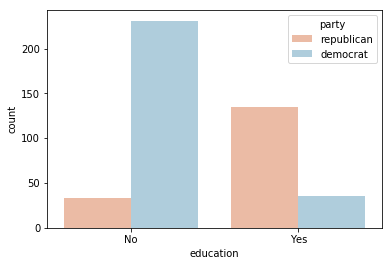

In [5]:
plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In `sns.countplot()`, we specify the x-axis data to be 'education', and hue to be 'party'. Recall that 'party' is also our **target variable**. So the resulting plot shows the difference in voting behavior between the two parties for the 'education' bill, with each party colored differently. We manually specified the color to be `'RdBu'`, as the Republican party has been traditionally associated with red, and the Democratic party with blue.

It seems like Democrats voted resoundingly against this bill, compared to Republicans. This is the kind of information that our machine learning model will seek to learn when we try to predict party affiliation solely based on voting behavior. An expert in U.S politics may be able to predict this without machine learning, but probably not instantaneously - and certainly not if we are dealing with hundreds of samples!

Explore the voting behavior further by generating countplots for the 'satellite' and 'missile' bills, and answer the following question: Of these two bills, for which ones do Democrats vote resoundingly in favor of, compared to Republicans? Be sure to begin your plotting statements for each figure with `plt.figure()` so that a new figure will be set up. Otherwise, your plots will be overlayed onto the same figure.

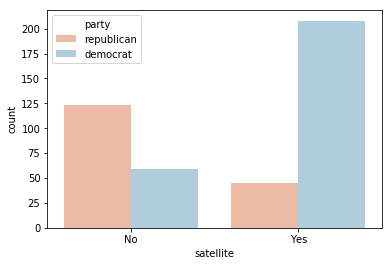

In [6]:
plt.figure()
sns.countplot(x='satellite', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

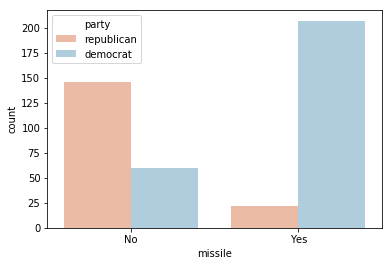

In [7]:
plt.figure()
sns.countplot(x='missile', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

Democrats voted in favor of both 'satellite' and 'missile'.

## k-Nearest Neighbors: Fit

Having explored the Congressional voting records dataset, it is time now to build your first **classifier**. In this exercise, you will fit a `k-Nearest Neighbors` classifier to the voting dataset, which has once again been pre-loaded for you into a DataFrame `df`.

For **scikit-learn** API, the features need to be in an array where each column is a **feature** and each row a different observation or data point - in this case, a Congressman's voting record. The **target** needs to be a single column with the same number of observations as the feature data. We have done this for you in this exercise. Notice we named the feature array `X` and response variable `y`: This is in accordance with the common scikit-learn practice.

Your job is to create an instance of a k-NN classifier with 6 neighbors (by specifying the `n_neighbors` parameter) and then fit it to the data. The data has been pre-loaded into a DataFrame called `df`.

In [8]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

Now that your k-NN classifier with 6 neighbors has been fit to the data, it can be used to predict the labels of new data points.

## k-Nearest Neighbors: Predict

Having `fit` a k-NN classifier, you can now use it to `predict` the label of a new data point. However, there is no unlabeled data available since all of it was used to fit the model! You can still use the `.predict()` method on the X that was used to fit the model, but it is not a good indicator of the model's ability to generalize to new, unseen data.

Will discuss a solution to this problem. For now, a random unlabeled data point has been generated and is available to you as `X_new`. You will use your classifier to predict the label for this new data point, as well as on the training data X that the model has already seen. Using `.predict()` on `X_new` will generate 1 prediction, while using it on X will generate 435 predictions: 1 for each sample.

The DataFrame has been pre-loaded as `df`. This time, you will create the feature array `X` and target variable array `y` yourself.

In [9]:
X_new = pd.read_csv(path+'X_new.csv', index_col=0)
X_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.696469,0.286139,0.226851,0.551315,0.719469,0.423106,0.980764,0.68483,0.480932,0.392118,0.343178,0.72905,0.438572,0.059678,0.398044,0.737995


In [10]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
y = df["party"].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: ['democrat']


Did your model predict 'democrat' or 'republican'? How sure can you be of its predictions? In other words, how can you measure its performance?

## The digits recognition dataset

Up until now, you have been performing **binary classification**, since the target variable had two possible outcomes. In **multi-class classification** the target variable could take on three or more possible outcomes. In the following exercises, you'll be working with the [MNIST](http://yann.lecun.com/exdb/mnist/) digits recognition dataset, which has 10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise.

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type `Bunch`, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an `'images'` key in addition to the `'data'` and `'target'` keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this `'images'` key is useful for visualizing the images, as you'll see in this exercise. On the other hand, the `'data'` key contains the feature array - that is, the images as a flattened array of 64 pixels.

Notice that you can access the keys of these Bunch objects in two different ways: By using the . notation, as in `digits.images`, or the [] notation, as in `digits['images']`.

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping b

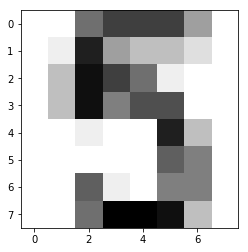

In [11]:
# Import necessary modules
from sklearn import datasets

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.data.shape)
print(digits.images.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

It looks like the image in question corresponds to the digit '5'. Now, can you build a classifier that can make this prediction not only for this image, but for all the other ones in the dataset? You'll do so in the next exercise!

## Train/Test Split + Fit/Predict/Accuracy

Now that you have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the digits dataset! After creating arrays for the features and target variable, you will split them into training and test sets, fit a k-NN classifier to the training data, and then compute its accuracy using the `.score()` method.

In [12]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


## Overfitting and underfitting

In this exercise, you will compute and plot the training and testing accuracy scores (**model complexity curve**) for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for **overfitting** and **underfitting**.

The training and testing sets are available to you in the workspace as `X_train`, `X_test`, `y_train`, `y_test`. In addition, KNeighborsClassifier has been imported from sklearn.neighbors.

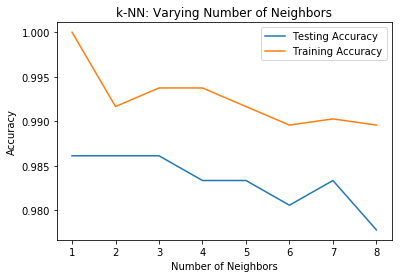

In [13]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

It looks like the test accuracy is highest when using 3 and 5 neighbors. Using 8 neighbors or more seems to result in a simple model that underfits the data.

## Which of the following is a regression problem?

Given below are four example applications of machine learning. Your job is to pick the one that is best framed as a **regression problem**.

- An e-commerce company using labeled customer data to predict whether or not a customer will purchase a particular item.
- A healthcare company using data about cancer tumors (such as their geometric measurements) to predict whether a new tumor is benign or malignant.
- A restaurant using review data to ascribe positive or negative sentiment to a given review.
- A bike share company using time and weather data to predict the number of bikes being rented at any given hour. (correct)

The target variable here - the number of bike rentals at any given hour - is quantitative, so this is best framed as a regression problem

## Importing data for supervised learning

In this chapter, you will work with [Gapminder](https://www.gapminder.org/data/) data that we have consolidated into one CSV file available in the workspace as `'gapminder.csv'`. Specifically, your goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population. 

Since the target variable here is quantitative, this is a **regression problem**. To begin, you will fit a linear regression with just one feature: `'fertility'`, which is the average number of children a woman in a given country gives birth to. In later exercises, you will use all the features to build regression models.

Before that, however, you need to import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy's `.reshape()` method. Don't worry too much about this reshaping right now, but it is something you will have to do occasionally when working with scikit-learn so it is useful to practice.

In [14]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv(path+'gapminder.csv')

# Create arrays for features and target variable
y = df.life.values
X = df.fertility.values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


Notice the differences in shape before and after applying the `.reshape()` method. Getting the feature and target variable arrays into the right format for scikit-learn is an important precursor to model building.

## Exploring the Gapminder data

As always, it is important to explore your data before building models. Below, we have constructed a heatmap showing the correlation between the different features of the Gapminder dataset, which has been pre-loaded into a DataFrame as `df`. Cells that are in green show positive correlation, while cells that are in red show negative correlation. Take a moment to explore this: Which features are positively correlated with life, and which ones are negatively correlated? Does this match your intuition?

In case you are curious, the heatmap was generated using [Seaborn's heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html) function and the following line of code, where `df.corr()` computes the pairwise correlation between columns:

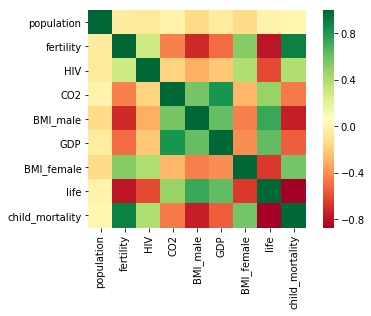

In [15]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [16]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 9 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
dtypes: float64(9)
memory usage: 9.9 KB


In [18]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


Once you have a feel for the data, consider the statements below and select the one that is not true.

- The DataFrame has 139 samples (or rows) and 9 columns.
- life and fertility are negatively correlated.
- The mean of life is 69.602878.
- fertility is of type int64. (not true)
- GDP and life are positively correlated.

## Fit & predict for regression

Now, you will fit a **linear regression** and predict life expectancy using just one feature. In this exercise, you will use the `'fertility'` feature of the Gapminder dataset. Since the goal is to predict life expectancy, the target variable here is `'life'`. The array for the target variable has been pre-loaded as `y` and the array for 'fertility' has been pre-loaded as `X_fertility`.

A scatter plot with 'fertility' on the x-axis and 'life' on the y-axis has been generated. As you can see, there is a strongly negative correlation, so a **linear regression** should be able to capture this trend. Your job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute and print the `R2 score` using sckit-learn's `.score()` method.

In [19]:
y = np.array(df.life)
X_fertility = np.array(df.fertility)

In [20]:
X_fertility = [[x] for x in X_fertility]

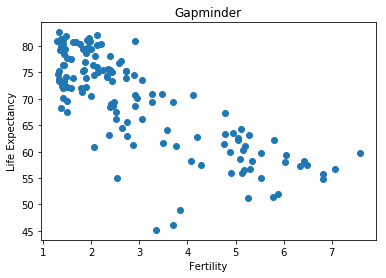

In [21]:
plt.scatter(X_fertility, y)
plt.title("Gapminder")
plt.xlabel("Fertility")
plt.ylabel("Life Expectancy")
plt.show();

0.6192442167740035


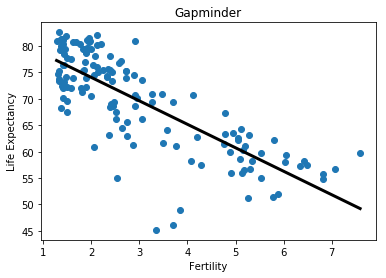

In [22]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
# Set up the prediction space to range from the minimum to the maximum of X_fertility
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1, 1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot observations
plt.scatter(X_fertility, y)
plt.title("Gapminder")
plt.xlabel("Fertility")
plt.ylabel("Life Expectancy")

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show();

Notice how the line captures the underlying trend in the data. And the performance is quite decent for this basic regression model with only one feature!

## Train/test split for regression

**Train and test sets** are vital to ensure that your supervised learning model is able to generalize well to new data. This was true for **classification models**, and is equally true for **linear regression models**.

In this exercise, you will split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over all features. In addition to computing the `R2 score`, you will also compute the `Root Mean Squared Error (RMSE)`, which is another commonly used metric to evaluate regression models. The feature array `X` and target variable array `y` have been pre-loaded for you from the DataFrame `df`.

In [23]:
y = np.array(df.life.values)
X = np.array(df.drop('life', axis=1).values)

In [24]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.838046873142936
Root Mean Squared Error: 3.2476010800377213


Using all features has improved the model score. This makes sense, as the model has more information to learn from. However, there is one potential pitfall to this process. Can you spot it?

## 5-fold cross-validation

**Cross-validation** is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data. It also solves the problem of arbitrary split of data to train and test datasets.

In this exercise, you will practice 5-fold cross validation on the Gapminder data. By default, scikit-learn's `cross_val_score()` function uses `R2` as the metric of choice for **regression**. Since you are performing 5-fold cross-validation, the function will return 5 scores. Your job is to compute these 5 scores and then take their average.

<img src="images/cross-validation.png" alt="" style="width: 600px;"/>


In [25]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {} <- R2 mean value".format(np.mean(cv_scores)))

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793232 <- R2 mean value


## K-Fold CV comparison

**Cross validation** is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes. In this exercise, you will explore this for yourself. Your job is to perform 3-fold cross-validation and then 10-fold cross-validation on the Gapminder dataset.

You can use `%timeit` to see how long each 3-fold CV takes compared to 10-fold CV.

In [26]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv=10)
print(np.mean(cvscores_10))

0.8718712782622108
0.8436128620131201


In [27]:
%timeit cross_val_score(reg, X, y, cv=3)

2.03 ms ± 40.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [28]:
%timeit cross_val_score(reg, X, y, cv=10)

6.07 ms ± 212 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Regularization I: Lasso

<img src="images/lasso-regression3.png" alt="" style="width: 600px;"/>

You see how Lasso selected out the 'RM' feature as being the most important for predicting Boston house prices, while shrinking the coefficients of certain other features to 0. Its ability to perform **feature selection** in this way becomes even more useful when you are dealing with data involving thousands of features.

In this exercise, you will fit a lasso regression to the Gapminder data you have been working with and plot the coefficients. Just as with the Boston data, you will find that the coefficients of some features are shrunk to 0, with only the most important ones remaining.

The feature and target variable arrays have been pre-loaded as X and y.

**Regularization** means penalizing large coefficients as large coefficients can lead to overfitting.

<img src="images/lasso-regression1.png" alt="" style="width: 400px;"/>

<img src="images/lasso-regression2.png" alt="" style="width: 600px;"/>


[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


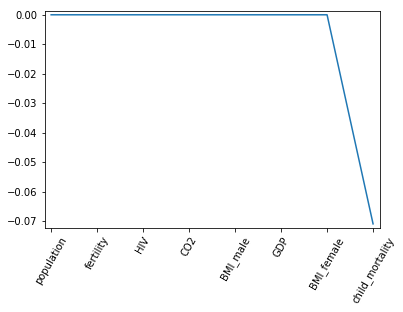

In [29]:
# Import Lasso
from sklearn.linear_model import Lasso

# Return a list of columns without the target column
df_columns = df.drop('life', axis=1).columns

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)  # should ne X_train, y_train

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show();

According to the lasso algorithm, it seems like 'child_mortality' is the most important feature when predicting life expectancy.

## Regularization II: Ridge

**Lasso is great for feature selection**, but when building regression models, **Ridge regression** should be your first choice.

Recall that lasso performs regularization by adding to the loss function a penalty term of the `absolute value` of each coefficient multiplied by some alpha. This is also known as **L1 regularization** because the regularization term is the `L1 norm` of the coefficients. This is not the only way to regularize, however.

<img src="images/ridge-regression.png" alt="" style="width: 400px;"/> 

If instead you took the `sum of the squared values` of the coefficients multiplied by some alpha - like in **Ridge regression** - you would be computing the `L2 norm`. In this exercise, you will practice fitting ridge regression models over a range of different alphas, and plot cross-validated `R2 scores` for each, using this function `display_plot`, which plots the `R2 score` as well as standard error for each alpha:

In [30]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show();

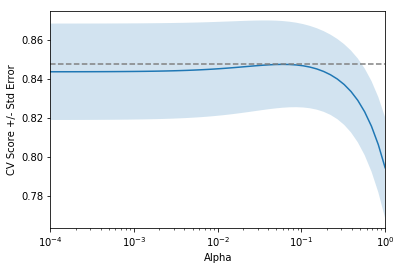

In [31]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

Notice how the cross-validation scores change with different alphas. Which alpha should you pick? How can you fine-tune your model? 

## Metrics for classification

So far, you evaluated the performance of your k-NN classifier based on its **accuracy**. However, **accuracy** is not always an informative metric. In this exercise, you will dive more deeply into evaluating the **performance of binary classifiers** by computing a **confusion matrix** and generating a **classification report**.

The **classification report** consists of three rows, and an additional **support** column. The support gives the number of samples of the true response that lie in that class. The precision, recall, and f1-score columns, then, gave the respective metrics for that particular class.

Here, you'll work with the [PIMA Indians dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) obtained from the UCI Machine Learning Repository. The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a **binary classification problem**. A target value of `0` indicates that the patient does not have diabetes, while a value of `1` indicates that the patient does have diabetes. The dataset has been preprocessed to deal with missing values.

The dataset has been loaded into a DataFrame `df` and the feature and target variable arrays `X` and `y` have been created for you. In addition, `sklearn.model_selection.train_test_split` and `sklearn.neighbors.KNeighborsClassifier` have already been imported.

Your job is to train a k-NN classifier to the data and evaluate its performance by generating a **confusion matrix** and **classification report**. 

<img src="images/confusion-matrix.png" alt="" style="width: 400px;"/>

<img src="images/classification-metrics.png" alt="" style="width: 400px;"/>

In [32]:
df = pd.read_csv(path+'pima.csv', index_col=0)
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35.00000,155.548223,33.6,0.627,50,1
1,1,85,66,29.00000,155.548223,26.6,0.351,31,0
2,8,183,64,29.15342,155.548223,23.3,0.672,32,1
3,1,89,66,23.00000,94.000000,28.1,0.167,21,0
4,0,137,40,35.00000,168.000000,43.1,2.288,33,1


In [33]:
X = np.array(df.drop('diabetes', axis=1).values)
y = np.array(df.diabetes.values)

In [34]:
# Import necessary modules
from sklearn.metrics import classification_report, confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 52  50]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       206
           1       0.62      0.49      0.55       102

   micro avg       0.73      0.73      0.73       308
   macro avg       0.70      0.67      0.68       308
weighted avg       0.72      0.73      0.72       308



## Building a logistic regression model

Time to build your first **logistic regression model**! scikit-learn makes it very easy to try different models, since the `Train-Test-Split/Instantiate/Fit/Predict` paradigm applies to all classifiers and regressors - which are known in scikit-learn as `'estimators'`. You'll see this now for yourself as you train a logistic regression model on exactly the same data as in the previous exercise. Will it outperform k-NN? There's only one way to find out!

In [35]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 35  67]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       206
           1       0.69      0.66      0.67       102

   micro avg       0.79      0.79      0.79       308
   macro avg       0.76      0.76      0.76       308
weighted avg       0.79      0.79      0.79       308



/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Plotting an ROC curve

**Classification reports** and **confusion matrices** are great methods to quantitatively evaluate model performance, while **ROC curves** provide a way to visually evaluate models. Most classifiers in scikit-learn have a `.predict_proba()` method which returns the probability of a given sample being in a particular class. Having built a logistic regression model, you'll now evaluate its performance by plotting an **ROC curve**. In doing so, you'll make use of the `.predict_proba()` method and become familiar with its functionality.

Here, you'll continue working with the PIMA Indians diabetes dataset. The classifier has already been fit to the training data and is available as `logreg`.

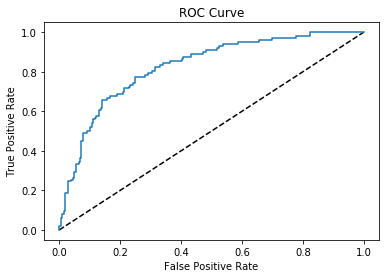

In [36]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

## Precision-recall Curve

When looking at your **ROC curve**, you may have noticed that the y-axis (True positive rate) is also known as **recall**. Indeed, in addition to the **ROC curve**, there are other ways to visually evaluate model performance. One such way is the **precision-recall curve**, which is generated by plotting the precision and recall for different thresholds. As a reminder, precision and recall are defined as:

<img src="images/precision-recall.png" alt="" style="width: 300px;"/>

Below, a **precision-recall curve** has been generated for the diabetes dataset.

<img src="images/precision-recall-curve.png" alt="" style="width: 400px;"/>

Study the precision-recall curve and then consider the statements given below. Choose the one statement that is not true. Note that here, the class is positive (1) if the individual has diabetes.

- A recall of 1 corresponds to a classifier with a low threshold in which all females who contract diabetes were correctly classified as such, at the expense of many misclassifications of those who did not have diabetes.
- Precision is undefined for a classifier which makes no positive predictions, that is, classifies everyone as not having diabetes.
- When the threshold is very close to 1, precision is also 1, because the classifier is absolutely certain about its predictions.
- Precision and recall take true negatives into consideration. (not true)

True negatives do not appear at all in the definitions of precision and recall.

## AUC computation

Say you have a binary classifier that in fact is just randomly making guesses. It would be correct approximately 50% of the time, and the resulting **ROC curve** would be a diagonal line in which the `True Positive Rate` and `False Positive Rate` are always equal. The **Area under this ROC curve** would be `0.5`. This is one way in which the **AUC** is an informative metric to evaluate a model. If the **AUC** is greater than 0.5, the model is better than random guessing. Always a good sign!

In this exercise, you'll calculate **AUC** scores using the `roc_auc_score()` function from sklearn.metrics as well as by performing cross-validation on the diabetes dataset.

X and y, along with training and test sets X_train, X_test, y_train, y_test, have been pre-loaded for you, and a logistic regression classifier logreg has been fit to the training data.

In [37]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score 

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
# Compute the AUC scores by performing 5-fold cross-validation
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8254806777079765
AUC scores computed using 5-fold cross-validation: [0.80185185 0.80648148 0.81481481 0.86245283 0.8554717 ]


/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

## Hyperparameter tuning with GridSearchCV

You will now practice how to tune the n_neighbors parameter of the KNeighborsClassifier() using **GridSearchCV** using logistic regression on the diabetes dataset.

Like the `alpha` parameter of **lasso and ridge regularization**, **logistic regression** also has a regularization parameter: `C`. `C` controls the inverse of the regularization strength, and this is what you will tune in this exercise. A large `C` can lead to an overfit model, while a small `C` can lead to an underfit model.

The hyperparameter space for `C` has been setup for you. Your job is to use **GridSearchCV** and logistic regression to find the optimal `C` in this hyperparameter space. The feature array is available as X and target variable array is available as y.

You may be wondering why you aren't asked to split the data into training and test sets. Good observation! Here, we want you to focus on the process of setting up the hyperparameter grid and performing grid-search cross-validation. In practice, you will indeed want to hold out a portion of your data for evaluation purposes, and you will learn all about this next!

In [38]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(solver='lbfgs', max_iter=240)

# Instantiate the GridSearchCV object: logreg_cv
# Use GridSearchCV with 5-fold cross-validation to tune C
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.7734375


## Hyperparameter tuning with RandomizedSearchCV

**GridSearchCV** can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use **RandomizedSearchCV**, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions. You'll practice using **RandomizedSearchCV** in this exercise and see how this works.

Here, you'll also be introduced to a new model: the **Decision Tree**. Don't worry about the specifics of how this model works. Just like k-NN, linear regression, and logistic regression, decision trees in scikit-learn have `.fit()` and `.predict()` methods that you can use in exactly the same way as before. **Decision trees** have many parameters that can be tuned, such as `max_features`, `max_depth`, and `min_samples_leaf`: This makes it an ideal use case for **RandomizedSearchCV**.

As before, the feature array X and target variable array y of the diabetes dataset have been pre-loaded. The hyperparameter settings have been specified for you. Your goal is to use **RandomizedSearchCV** to find the optimal hyperparameters. Go for it!

In [39]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 6}
Best score is 0.7526041666666666


You'll see a lot more of decision trees and RandomizedSearchCV as you continue your machine learning journey. `Note that RandomizedSearchCV will never outperform GridSearchCV`. Instead, it is valuable because it saves on computation time.

## Hold-out set reasoning

For which of the following reasons would you want to use a hold-out set for the very end?

- You want to maximize the amount of training data used.
- You want to be absolutely certain about your model's ability to generalize to unseen data. (correct)
- You want to tune the hyperparameters of your model.

The idea is to tune the model's hyperparameters on the training set, and then evaluate its performance on the hold-out set which it has never seen before.

## Hold-out set in practice I: Classification

You will now practice evaluating a model with tuned hyperparameters on a **hold-out set**. The feature array and target variable array from the diabetes dataset have been pre-loaded as `X` and `y`.

In addition to `C`, **logistic regression** has a `'penalty'` hyperparameter which specifies whether to use `'l1'` or `'l2'` regularization. Your job in this exercise is to create a hold-out set, tune the 'C' and 'penalty' hyperparameters of a logistic regression classifier using GridSearchCV on the training set.

In [40]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression(solver='liblinear', max_iter=240)

# Create train and test sets
# Create training and test sets. Use a test_size of 0.4 and random_state of 42. #  In practice, the test set here will function as the hold-out set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
# Tune the hyperparameters on the training set using GridSearchCV with 5-folds. 
#  This involves first instantiating the GridSearchCV object 
#  with the correct parameters and then fitting it to the training data.
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 0.4393970560760795, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.7652173913043478


/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Hold-out set in practice II: Regression

Remember **lasso and ridge regression**? **Lasso** used the L1 penalty to regularize, while **ridge** used the L2 penalty. There is another type of regularized regression known as the **elastic net**. In **elastic net regularization**, the penalty term is a linear combination of the L1 and L2 penalties:

a * L1 + b * L2

In scikit-learn, this term is represented by the `'l1_ratio'` parameter: An `'l1_ratio'` of 1 corresponds to an L1 penalty, and anything lower is a combination of L1 and L2.

In this exercise, you will GridSearchCV to tune the `'l1_ratio'` of an **elastic net model** trained on the Gapminder data. As in the previous exercise, use a hold-out set to evaluate your model's performance.

In [41]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio' : l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet(max_iter=2000)

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.034482758620689655}
Tuned ElasticNet R squared: 0.25110015989224854
Tuned ElasticNet MSE: 0.1658783462677525


/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective di

Now that you understand how to fine-tune your models, it's time to learn about preprocessing techniques and how to piece together all the different stages of the machine learning process into a pipeline!

## Exploring categorical features

The Gapminder dataset that you worked with in previous chapters also contained a categorical 'Region' feature, which we dropped in previous exercises since you did not have the tools to deal with it. Now however, you do, so we have added it back in!

Your job in this exercise is to explore this feature. Boxplots are particularly useful for visualizing categorical features such as this.

In [42]:
# Read 'gapminder.csv' into a DataFrame: df
df = pd.read_csv(path+'gapminder2.csv')
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


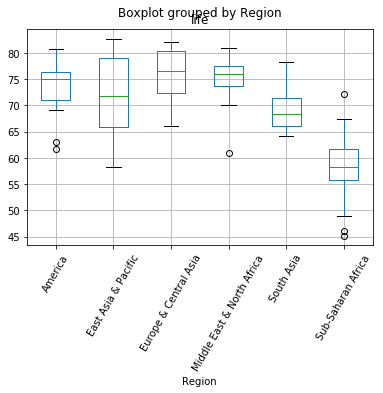

In [43]:
# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show();

Exploratory data analysis should always be the precursor to model building.

## Creating dummy variables

`scikit-learn does not accept non-numerical features`. You saw in the previous exercise that the 'Region' feature contains very useful information that can predict life expectancy. For example, Sub-Saharan Africa has a lower life expectancy compared to Europe and Central Asia. Therefore, if you are trying to predict life expectancy, it would be preferable to retain the 'Region' feature. To do this, you need to binarize it by creating dummy variables, which is what you will do in this exercise.

In [44]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
# Use the get_dummies() function again, this time specifying drop_first=True 
#  to drop the unneeded dummy variable (in this case, 'Region_America').
df_region = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


Now that you have created the dummy variables, you can use the 'Region' feature to predict life expectancy!

## Regression with categorical features

Having created the dummy variables from the 'Region' feature, you can build regression models as you did before. Here, you'll use ridge regression to perform 5-fold cross-validation.

The feature array X and target variable array y have been pre-loaded.

In [45]:
X = df_region.drop('life', axis='columns')
y = df_region.life

In [46]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv=5)

# Print the cross-validated scores
print(ridge_cv)

[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]


## Dropping missing data

The unprocessed dataset has been loaded into a DataFrame `df`. Explore it with the `.head()` method. You will see that there are certain data points labeled with a `'?'`. These denote missing values. Different datasets encode missing values in different ways. Sometimes it may be a '9999', other times a 0 - real-world data can be very messy! If you're lucky, the missing values will already be encoded as `NaN`. We use `NaN` because it is an efficient and simplified way of internally representing missing data, and it lets us take advantage of pandas methods such as `.dropna()` and `.fillna()`, as well as scikit-learn's Imputation transformer `Imputer()`.

In this exercise, your job is to convert the `'?'`s to `NaNs`, and then drop the rows that contain them from the DataFrame.

In [47]:
df = pd.read_csv(path+'congres2.csv', index_col=0)
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
2,democrat,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1


In [48]:
# Convert '?' to NaN
df[df=='?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64
Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


When many values in your dataset are **missing**, if you drop them, you may end up throwing away valuable information along with the missing data. It's better instead to develop an **imputation strategy**. This is where domain knowledge is useful, but in the absence of it, you can impute missing values with the `mean` or the `median` of the row or column that the missing value is in.

## Imputing missing data in a ML Pipeline I

As you've come to appreciate, there are many steps to building a model, from creating training and test sets, to fitting a classifier or regressor, to tuning its parameters, to evaluating its performance on new data. **Imputation** can be seen as the first step of this machine learning process, the entirety of which can be viewed within the context of a **pipeline**. Scikit-learn provides a pipeline constructor that allows you to piece together these steps into one process and thereby simplify your workflow.

You'll now practice setting up a **pipeline** with two steps: the **imputation step**, followed by the instantiation of a classifier. You've seen three classifiers in this course so far: k-NN, logistic regression, and the decision tree. You will now be introduced to a fourth one - the **Support Vector Machine**, or **SVM**. For now, do not worry about how it works under the hood. It works exactly as you would expect of the scikit-learn estimators that you have worked with previously, in that it has the same `.fit()` and `.predict()` methods as before.

In [49]:
# Import the Imputer module
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


## Imputing missing data in a ML Pipeline II

Having setup the steps of the pipeline in the previous exercise, you will now use it on the voting dataset to classify a Congressman's party affiliation. What makes pipelines so incredibly useful is the simple interface that they provide. You can use the `.fit()` and `.predict()` methods on **pipelines** just as you did with your classifiers and regressors!

Practice this for yourself now and generate a classification report of your predictions. The steps of the pipeline have been set up for you, and the feature array X and target variable array y have been pre-loaded. Additionally, train_test_split and classification_report have been imported from sklearn.model_selection and sklearn.metrics respectively.

In [50]:
X = pd.read_csv(path+'X2.csv', index_col=0)
X.head()

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [51]:
y = pd.read_csv(path+'y2.csv', index_col=0)
y.head()

,republican
0,
1,republican
2,democrat
3,democrat
4,democrat
5,democrat


In [52]:
# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    democrat       0.63      1.00      0.77        82
  republican       0.00      0.00      0.00        49

   micro avg       0.63      0.63      0.63       131
   macro avg       0.31      0.50      0.38       131
weighted avg       0.39      0.63      0.48       131



/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMet

## Centering and scaling your data

The performance of a model can improve if the features are **scaled**. Note that this is not always the case: In the Congressional voting records dataset, for example, all of the features are binary. In such a situation, scaling will have minimal impact.

You will now explore scaling for yourself on a new dataset - White Wine Quality! We have used the 'quality' feature of the wine to create a binary target variable: If 'quality' is less than 5, the target variable is 1, and otherwise, it is 0.

The DataFrame has been pre-loaded as `df`, along with the feature and target variable arrays `X` and `y`. Notice how some features seem to have different units of measurement. `'density'`, for instance, takes values between 0.98 and 1.04, while `'total sulfur dioxide'` ranges from 9 to 440. As a result, it may be worth scaling the features here. Your job in this exercise is to **scale the features** and compute the mean and standard deviation of the unscaled features compared to the scaled features.

In [53]:
df = pd.read_csv(path+'wine.csv', index_col=0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [63]:
# Create a new column called df.elderly where the value is yes
# if df.age is greater than 50 and no if not
# from: https://chrisalbon.com/python/data_wrangling/pandas_create_column_using_conditional/
df['target'] = np.where(df['quality'] < 5, 1, 0)

In [64]:
X = df.drop('target', axis=1)
y = df.target

In [66]:
df[df['target']==1].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
46,6.2,0.450,0.26,4.4,0.063,63.0,206.0,0.9940,3.27,0.52,9.8,4,1
98,9.8,0.360,0.46,10.5,0.038,4.0,83.0,0.9956,2.89,0.30,10.1,4,1
115,5.5,0.485,0.00,1.5,0.065,8.0,103.0,0.9940,3.63,0.40,9.7,4,1
147,6.4,0.595,0.14,5.2,0.058,15.0,97.0,0.9951,3.38,0.36,9.0,4,1
172,7.6,0.480,0.37,0.8,0.037,4.0,100.0,0.9902,3.03,0.39,11.4,4,1


In [67]:
# Import scale
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

Mean of Unscaled Features: fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
quality                   5.877909
dtype: float64
Standard Deviation of Unscaled Features: fixed acidity            0.843782
volatile acidity         0.100784
citric acid              0.121007
residual sugar           5.071540
chlorides                0.021846
free sulfur dioxide     17.005401
total sulfur dioxide    42.493726
density                  0.002991
pH                       0.150985
sulphates                0.114114
alcohol                  1.230495
quality                  0.885548
dtype: float64
Mean of Scaled Features: 2.5143899484609914e-15
Standard Deviation of Scal

/Users/ksatola/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """


Notice the difference in the mean and standard deviation of the scaled features compared to the unscaled features.

## Centering and scaling in a pipeline

With regard to whether or not scaling is effective, the proof is in the pudding! See for yourself whether or not scaling the features of the White Wine Quality dataset has any impact on its performance. You will use a k-NN classifier as part of a pipeline that includes scaling, and for the purposes of comparison, a k-NN classifier trained on the unscaled data has been provided.

The feature array and target variable array have been pre-loaded as X and y. Additionally, KNeighborsClassifier and train_test_split have been imported from sklearn.neighbors and sklearn.model_selection, respectively.

In [68]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.9789115646258504
Accuracy without Scaling: 0.9687074829931973


/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


It looks like scaling has significantly improved model performance!

## Bringing it all together I: Pipeline for classification

It is time now to piece together everything you have learned so far into a pipeline for classification! Your job in this exercise is to build a pipeline that includes scaling and hyperparameter tuning to classify wine quality.

You'll return to using the SVM classifier you were briefly introduced to earlier in this chapter. The hyperparameters you will tune are `C` and `gamma`. `C` controls the regularization strength. It is analogous to the C you tuned for logistic regression, while `gamma` controls the kernel coefficient: Do not worry about this now as it is beyond the scope of this course.

The following modules have been pre-loaded: Pipeline, svm, train_test_split, GridSearchCV, classification_report, accuracy_score. The feature and target variable arrays X and y have also been pre-loaded.

In [78]:
Xlist = [[7.0, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.001, 3.0, 0.45, 8.8], [6.3, 0.3, 0.34, 1.6, 0.049, 14.0, 132.0, 0.994, 3.3, 0.49, 9.5], [8.1, 0.28, 0.4, 6.9, 0.05, 30.0, 97.0, 0.9951, 3.26, 0.44, 10.1], [7.2, 0.23, 0.32, 8.5, 0.058, 47.0, 186.0, 0.9956, 3.19, 0.4, 9.9], [7.2, 0.23, 0.32, 8.5, 0.058, 47.0, 186.0, 0.9956, 3.19, 0.4, 9.9], [8.1, 0.28, 0.4, 6.9, 0.05, 30.0, 97.0, 0.9951, 3.26, 0.44, 10.1], [6.2, 0.32, 0.16, 7.0, 0.045, 30.0, 136.0, 0.9949, 3.18, 0.47, 9.6], [7.0, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.001, 3.0, 0.45, 8.8], [6.3, 0.3, 0.34, 1.6, 0.049, 14.0, 132.0, 0.994, 3.3, 0.49, 9.5], [8.1, 0.22, 0.43, 1.5, 0.044, 28.0, 129.0, 0.9938, 3.22, 0.45, 11.0], [8.1, 0.27, 0.41, 1.45, 0.033, 11.0, 63.0, 0.9908, 2.99, 0.56, 12.0], [8.6, 0.23, 0.4, 4.2, 0.035, 17.0, 109.0, 0.9947, 3.14, 0.53, 9.7], [7.9, 0.18, 0.37, 1.2, 0.04, 16.0, 75.0, 0.992, 3.18, 0.63, 10.8], [6.6, 0.16, 0.4, 1.5, 0.044, 48.0, 143.0, 0.9912, 3.54, 0.52, 12.4], [8.3, 0.42, 0.62, 19.25, 0.04, 41.0, 172.0, 1.0002, 2.98, 0.67, 9.7], [6.6, 0.17, 0.38, 1.5, 0.032, 28.0, 112.0, 0.9914, 3.25, 0.55, 11.4], [6.3, 0.48, 0.04, 1.1, 0.046, 30.0, 99.0, 0.9928, 3.24, 0.36, 9.6], [6.2, 0.66, 0.48, 1.2, 0.029, 29.0, 75.0, 0.9892, 3.33, 0.39, 12.8], [7.4, 0.34, 0.42, 1.1, 0.033, 17.0, 171.0, 0.9917, 3.12, 0.53, 11.3], [6.5, 0.31, 0.14, 7.5, 0.044, 34.0, 133.0, 0.9955, 3.22, 0.5, 9.5], [6.2, 0.66, 0.48, 1.2, 0.029, 29.0, 75.0, 0.9892, 3.33, 0.39, 12.8], [6.4, 0.31, 0.38, 2.9, 0.038, 19.0, 102.0, 0.9912, 3.17, 0.35, 11.0], [6.8, 0.26, 0.42, 1.7, 0.049, 41.0, 122.0, 0.993, 3.47, 0.48, 10.5], [7.6, 0.67, 0.14, 1.5, 0.07400000000000001, 25.0, 168.0, 0.9937, 3.05, 0.51, 9.3], [6.6, 0.27, 0.41, 1.3, 0.052000000000000005, 16.0, 142.0, 0.9951, 3.42, 0.47, 10.0], [7.0, 0.25, 0.32, 9.0, 0.046, 56.0, 245.0, 0.9955, 3.25, 0.5, 10.4], [6.9, 0.24, 0.35, 1.0, 0.052000000000000005, 35.0, 146.0, 0.993, 3.45, 0.44, 10.0], [7.0, 0.28, 0.39, 8.7, 0.051, 32.0, 141.0, 0.9961, 3.38, 0.53, 10.5], [7.4, 0.27, 0.48, 1.1, 0.047, 17.0, 132.0, 0.9914, 3.19, 0.49, 11.6], [7.2, 0.32, 0.36, 2.0, 0.033, 37.0, 114.0, 0.9906, 3.1, 0.71, 12.3], [8.5, 0.24, 0.39, 10.4, 0.044, 20.0, 142.0, 0.9974, 3.2, 0.53, 10.0], [8.3, 0.14, 0.34, 1.1, 0.042, 7.0, 47.0, 0.9934, 3.47, 0.4, 10.2], [7.4, 0.25, 0.36, 2.05, 0.05, 31.0, 100.0, 0.992, 3.19, 0.44, 10.8], [6.2, 0.12, 0.34, 1.5, 0.045, 43.0, 117.0, 0.9939, 3.42, 0.51, 9.0], [5.8, 0.27, 0.2, 14.95, 0.044, 22.0, 179.0, 0.9962, 3.37, 0.37, 10.2], [7.3, 0.28, 0.43, 1.7, 0.08, 21.0, 123.0, 0.9905, 3.19, 0.42, 12.8], [6.5, 0.39, 0.23, 5.4, 0.051, 25.0, 149.0, 0.9934, 3.24, 0.35, 10.0], [7.0, 0.33, 0.32, 1.2, 0.053, 38.0, 138.0, 0.9906, 3.13, 0.28, 11.2], [7.3, 0.24, 0.39, 17.95, 0.057, 45.0, 149.0, 0.9999, 3.21, 0.36, 8.6], [7.3, 0.24, 0.39, 17.95, 0.057, 45.0, 149.0, 0.9999, 3.21, 0.36, 8.6], [6.7, 0.23, 0.39, 2.5, 0.172, 63.0, 158.0, 0.9937, 3.11, 0.36, 9.4], [6.7, 0.24, 0.39, 2.9, 0.173, 63.0, 157.0, 0.9937, 3.1, 0.34, 9.4], [7.0, 0.31, 0.26, 7.4, 0.069, 28.0, 160.0, 0.9954, 3.13, 0.46, 9.8], [6.6, 0.24, 0.27, 1.4, 0.057, 33.0, 152.0, 0.9934, 3.22, 0.56, 9.5], [6.7, 0.23, 0.26, 1.4, 0.06, 33.0, 154.0, 0.9934, 3.24, 0.56, 9.5], [7.4, 0.18, 0.31, 1.4, 0.058, 38.0, 167.0, 0.9931, 3.16, 0.53, 10.0], [6.2, 0.45, 0.26, 4.4, 0.063, 63.0, 206.0, 0.994, 3.27, 0.52, 9.8], [6.2, 0.46, 0.25, 4.4, 0.066, 62.0, 207.0, 0.9939, 3.25, 0.52, 9.8], [7.0, 0.31, 0.26, 7.4, 0.069, 28.0, 160.0, 0.9954, 3.13, 0.46, 9.8], [6.9, 0.19, 0.35, 5.0, 0.067, 32.0, 150.0, 0.995, 3.36, 0.48, 9.8], [7.2, 0.19, 0.31, 1.6, 0.062, 31.0, 173.0, 0.9917, 3.35, 0.44, 11.7], [6.6, 0.25, 0.29, 1.1, 0.068, 39.0, 124.0, 0.9914, 3.34, 0.58, 11.0], [6.2, 0.16, 0.33, 1.1, 0.057, 21.0, 82.0, 0.991, 3.32, 0.46, 10.9], [6.4, 0.18, 0.35, 1.0, 0.045, 39.0, 108.0, 0.9911, 3.31, 0.35, 10.9], [6.8, 0.2, 0.59, 0.9, 0.147, 38.0, 132.0, 0.993, 3.05, 0.38, 9.1], [6.9, 0.25, 0.35, 1.3, 0.039, 29.0, 191.0, 0.9908, 3.13, 0.52, 11.0], [7.2, 0.21, 0.34, 11.9, 0.043, 37.0, 213.0, 0.9962, 3.09, 0.5, 9.6], [6.0, 0.19, 0.26, 12.4, 0.048, 50.0, 147.0, 0.9972, 3.3, 0.36, 8.9], [6.6, 0.38, 0.15, 4.6, 0.044, 25.0, 78.0, 0.9931, 3.11, 0.38, 10.2], [7.4, 0.2, 0.36, 1.2, 0.038, 44.0, 111.0, 0.9926, 3.36, 0.34, 9.9], [6.8, 0.22, 0.24, 4.9, 0.092, 30.0, 123.0, 0.9951, 3.03, 0.46, 8.6], [6.0, 0.19, 0.26, 12.4, 0.048, 50.0, 147.0, 0.9972, 3.3, 0.36, 8.9], [7.0, 0.47, 0.07, 1.1, 0.035, 17.0, 151.0, 0.991, 3.02, 0.34, 10.5], [6.6, 0.38, 0.15, 4.6, 0.044, 25.0, 78.0, 0.9931, 3.11, 0.38, 10.2], [7.2, 0.24, 0.27, 1.4, 0.038, 31.0, 122.0, 0.9927, 3.15, 0.46, 10.3], [6.2, 0.35, 0.03, 1.2, 0.064, 29.0, 120.0, 0.9934, 3.22, 0.54, 9.1], [6.4, 0.26, 0.24, 6.4, 0.04, 27.0, 124.0, 0.9903, 3.22, 0.49, 12.6], [6.7, 0.25, 0.13, 1.2, 0.041, 81.0, 174.0, 0.992, 3.14, 0.42, 9.8], [6.7, 0.23, 0.31, 2.1, 0.046, 30.0, 96.0, 0.9926, 3.33, 0.64, 10.7], [7.4, 0.24, 0.29, 10.1, 0.05, 21.0, 105.0, 0.9962, 3.13, 0.35, 9.5], [6.2, 0.27, 0.43, 7.8, 0.056, 48.0, 244.0, 0.9956, 3.1, 0.51, 9.0], [6.8, 0.3, 0.23, 4.6, 0.061, 50.5, 238.5, 0.9958, 3.32, 0.6, 9.5], [6.0, 0.27, 0.28, 4.8, 0.063, 31.0, 201.0, 0.9964, 3.69, 0.71, 10.0], [8.6, 0.23, 0.46, 1.0, 0.054000000000000006, 9.0, 72.0, 0.9941, 2.95, 0.49, 9.1], [6.7, 0.23, 0.31, 2.1, 0.046, 30.0, 96.0, 0.9926, 3.33, 0.64, 10.7], [7.4, 0.24, 0.29, 10.1, 0.05, 21.0, 105.0, 0.9962, 3.13, 0.35, 9.5], [7.1, 0.18, 0.36, 1.4, 0.043, 31.0, 87.0, 0.9898, 3.26, 0.37, 12.7], [7.0, 0.32, 0.34, 1.3, 0.042, 20.0, 69.0, 0.9912, 3.31, 0.65, 12.0], [7.4, 0.18, 0.3, 8.8, 0.064, 26.0, 103.0, 0.9961, 2.94, 0.56, 9.3], [6.7, 0.54, 0.28, 5.4, 0.06, 21.0, 105.0, 0.9949, 3.27, 0.37, 9.0], [6.8, 0.22, 0.31, 1.4, 0.053, 34.0, 114.0, 0.9929, 3.39, 0.77, 10.6], [7.1, 0.2, 0.34, 16.0, 0.05, 51.0, 166.0, 0.9985, 3.21, 0.6, 9.2], [7.1, 0.34, 0.2, 6.1, 0.063, 47.0, 164.0, 0.9946, 3.17, 0.42, 10.0], [7.3, 0.22, 0.3, 8.2, 0.047, 42.0, 207.0, 0.9966, 3.33, 0.46, 9.5], [7.1, 0.43, 0.61, 11.8, 0.045, 54.0, 155.0, 0.9974, 3.11, 0.45, 8.7], [7.1, 0.44, 0.62, 11.8, 0.044, 52.0, 152.0, 0.9975, 3.12, 0.46, 8.7], [7.2, 0.39, 0.63, 11.0, 0.044, 55.0, 156.0, 0.9974, 3.09, 0.44, 8.7], [6.8, 0.25, 0.31, 13.3, 0.05, 69.0, 202.0, 0.9972, 3.22, 0.48, 9.7], [7.1, 0.43, 0.61, 11.8, 0.045, 54.0, 155.0, 0.9974, 3.11, 0.45, 8.7], [7.1, 0.44, 0.62, 11.8, 0.044, 52.0, 152.0, 0.9975, 3.12, 0.46, 8.7], [7.2, 0.39, 0.63, 11.0, 0.044, 55.0, 156.0, 0.9974, 3.09, 0.44, 8.7], [6.1, 0.27, 0.43, 7.5, 0.049, 65.0, 243.0, 0.9957, 3.12, 0.47, 9.0], [6.9, 0.24, 0.33, 1.7, 0.035, 47.0, 136.0, 0.99, 3.26, 0.4, 12.6], [6.9, 0.21, 0.33, 1.8, 0.034, 48.0, 136.0, 0.9899, 3.25, 0.41, 12.6], [7.5, 0.17, 0.32, 1.7, 0.04, 51.0, 148.0, 0.9916, 3.21, 0.44, 11.5], [7.1, 0.26, 0.29, 12.4, 0.044, 62.0, 240.0, 0.9969, 3.04, 0.42, 9.2], [6.0, 0.34, 0.66, 15.9, 0.046, 26.0, 164.0, 0.9979, 3.14, 0.5, 8.8], [8.6, 0.265, 0.36, 1.2, 0.034, 15.0, 80.0, 0.9913, 2.95, 0.36, 11.4], [9.8, 0.36, 0.46, 10.5, 0.038, 4.0, 83.0, 0.9956, 2.89, 0.3, 10.1], [6.0, 0.34, 0.66, 15.9, 0.046, 26.0, 164.0, 0.9979, 3.14, 0.5, 8.8], [7.4, 0.25, 0.37, 13.5, 0.06, 52.0, 192.0, 0.9975, 3.0, 0.44, 9.1], [7.1, 0.12, 0.32, 9.6, 0.054000000000000006, 64.0, 162.0, 0.9962, 3.4, 0.41, 9.4], [6.0, 0.21, 0.24, 12.1, 0.05, 55.0, 164.0, 0.997, 3.34, 0.39, 9.4], [7.5, 0.305, 0.4, 18.9, 0.059, 44.0, 170.0, 1.0, 2.99, 0.46, 9.0], [7.4, 0.25, 0.37, 13.5, 0.06, 52.0, 192.0, 0.9975, 3.0, 0.44, 9.1], [7.3, 0.13, 0.32, 14.4, 0.051, 34.0, 109.0, 0.9974, 3.2, 0.35, 9.2], [7.1, 0.12, 0.32, 9.6, 0.054000000000000006, 64.0, 162.0, 0.9962, 3.4, 0.41, 9.4], [7.1, 0.23, 0.35, 16.5, 0.04, 60.0, 171.0, 0.999, 3.16, 0.59, 9.1], [7.1, 0.23, 0.35, 16.5, 0.04, 60.0, 171.0, 0.999, 3.16, 0.59, 9.1], [6.9, 0.33, 0.28, 1.3, 0.051, 37.0, 187.0, 0.9927, 3.27, 0.6, 10.3], [6.5, 0.17, 0.54, 8.5, 0.08199999999999999, 64.0, 163.0, 0.9959, 2.89, 0.39, 8.8], [7.2, 0.27, 0.46, 18.75, 0.052000000000000005, 45.0, 255.0, 1.0, 3.04, 0.52, 8.9], [7.2, 0.31, 0.5, 13.3, 0.056, 68.0, 195.0, 0.9982, 3.01, 0.47, 9.2], [6.7, 0.41, 0.34, 9.2, 0.049, 29.0, 150.0, 0.9968, 3.22, 0.51, 9.1], [6.7, 0.41, 0.34, 9.2, 0.049, 29.0, 150.0, 0.9968, 3.22, 0.51, 9.1], [5.5, 0.485, 0.0, 1.5, 0.065, 8.0, 103.0, 0.994, 3.63, 0.4, 9.7], [6.0, 0.31, 0.24, 3.3, 0.041, 25.0, 143.0, 0.9914, 3.31, 0.44, 11.3], [7.0, 0.14, 0.4, 1.7, 0.035, 16.0, 85.0, 0.9911, 3.19, 0.42, 11.8], [7.2, 0.31, 0.5, 13.3, 0.056, 68.0, 195.0, 0.9982, 3.01, 0.47, 9.2], [7.3, 0.32, 0.48, 13.3, 0.06, 57.0, 196.0, 0.9982, 3.04, 0.5, 9.2], [5.9, 0.36, 0.04, 5.7, 0.046, 21.0, 87.0, 0.9934, 3.22, 0.51, 10.2], [7.8, 0.24, 0.32, 12.2, 0.054000000000000006, 42.0, 138.0, 0.9984, 3.01, 0.54, 8.8], [7.4, 0.16, 0.31, 6.85, 0.059, 31.0, 131.0, 0.9952, 3.29, 0.34, 9.7], [6.9, 0.19, 0.28, 5.0, 0.058, 14.0, 146.0, 0.9952, 3.29, 0.36, 9.1], [6.4, 0.13, 0.47, 1.6, 0.092, 40.0, 158.0, 0.9928, 3.21, 0.36, 9.8], [6.7, 0.19, 0.36, 1.1, 0.026, 63.0, 143.0, 0.9912, 3.27, 0.48, 11.0], [7.4, 0.39, 0.23, 7.0, 0.033, 29.0, 126.0, 0.994, 3.14, 0.42, 10.5], [6.5, 0.24, 0.32, 7.6, 0.038, 48.0, 203.0, 0.9958, 3.45, 0.54, 9.7], [6.1, 0.3, 0.56, 2.8, 0.044, 47.0, 179.0, 0.9924, 3.3, 0.57, 10.9], [6.1, 0.3, 0.56, 2.7, 0.046, 46.0, 184.0, 0.9924, 3.31, 0.57, 10.9], [5.7, 0.26, 0.25, 10.4, 0.02, 7.0, 57.0, 0.994, 3.39, 0.37, 10.6], [6.5, 0.24, 0.32, 7.6, 0.038, 48.0, 203.0, 0.9958, 3.45, 0.54, 9.7], [6.5, 0.425, 0.4, 13.1, 0.038, 59.0, 241.0, 0.9979, 3.23, 0.57, 9.0], [6.6, 0.24, 0.27, 15.8, 0.035, 46.0, 188.0, 0.9982, 3.24, 0.51, 9.2], [6.8, 0.27, 0.22, 8.1, 0.034, 55.0, 203.0, 0.9961, 3.19, 0.52, 8.9], [6.7, 0.27, 0.31, 15.7, 0.036000000000000004, 44.0, 179.0, 0.9979, 3.26, 0.56, 9.6], [8.2, 0.23, 0.4, 1.2, 0.027000000000000003, 36.0, 121.0, 0.992, 3.12, 0.38, 10.7], [7.1, 0.37, 0.67, 10.5, 0.045, 49.0, 155.0, 0.9975, 3.16, 0.44, 8.7], [6.8, 0.19, 0.36, 1.9, 0.035, 30.0, 96.0, 0.9917, 3.15, 0.54, 10.8], [8.1, 0.28, 0.39, 1.9, 0.029, 18.0, 79.0, 0.9923, 3.23, 0.52, 11.8], [6.3, 0.31, 0.34, 2.2, 0.045, 20.0, 77.0, 0.9927, 3.3, 0.43, 10.2], [7.1, 0.37, 0.67, 10.5, 0.045, 49.0, 155.0, 0.9975, 3.16, 0.44, 8.7], [7.9, 0.21, 0.4, 1.2, 0.039, 38.0, 107.0, 0.992, 3.21, 0.54, 10.8], [8.5, 0.21, 0.41, 4.3, 0.036000000000000004, 24.0, 99.0, 0.9947, 3.18, 0.53, 9.7], [8.1, 0.2, 0.4, 2.0, 0.037000000000000005, 19.0, 87.0, 0.9921, 3.12, 0.54, 11.2], [6.3, 0.255, 0.37, 1.1, 0.04, 37.0, 114.0, 0.9905, 3.0, 0.39, 10.9], [5.6, 0.16, 0.27, 1.4, 0.044, 53.0, 168.0, 0.9918, 3.28, 0.37, 10.1], [6.4, 0.595, 0.14, 5.2, 0.058, 15.0, 97.0, 0.9951, 3.38, 0.36, 9.0], [6.3, 0.34, 0.33, 4.6, 0.034, 19.0, 80.0, 0.9917, 3.38, 0.58, 12.0], [6.9, 0.25, 0.3, 4.1, 0.054000000000000006, 23.0, 116.0, 0.994, 2.99, 0.38, 9.4], [7.9, 0.22, 0.38, 8.0, 0.043, 46.0, 152.0, 0.9934, 3.12, 0.32, 11.5], [7.6, 0.18, 0.46, 10.2, 0.055, 58.0, 135.0, 0.9968, 3.14, 0.43, 9.9], [6.9, 0.25, 0.3, 4.1, 0.054000000000000006, 23.0, 116.0, 0.994, 2.99, 0.38, 9.4], [7.2, 0.18, 0.41, 1.2, 0.048, 41.0, 97.0, 0.9919, 3.14, 0.45, 10.4], [8.2, 0.23, 0.4, 7.5, 0.049, 12.0, 76.0, 0.9966, 3.06, 0.84, 9.7], [7.4, 0.24, 0.42, 14.0, 0.066, 48.0, 198.0, 0.9979, 2.89, 0.42, 8.9], [7.4, 0.24, 0.42, 14.0, 0.066, 48.0, 198.0, 0.9979, 2.89, 0.42, 8.9], [6.1, 0.32, 0.24, 1.5, 0.036000000000000004, 38.0, 124.0, 0.9898, 3.29, 0.42, 12.4], [5.2, 0.44, 0.04, 1.4, 0.036000000000000004, 43.0, 119.0, 0.9894, 3.36, 0.33, 12.1], [5.2, 0.44, 0.04, 1.4, 0.036000000000000004, 43.0, 119.0, 0.9894, 3.36, 0.33, 12.1], [6.1, 0.32, 0.24, 1.5, 0.036000000000000004, 38.0, 124.0, 0.9898, 3.29, 0.42, 12.4], [6.4, 0.22, 0.56, 14.5, 0.055, 27.0, 159.0, 0.998, 2.98, 0.4, 9.1], [6.3, 0.36, 0.3, 4.8, 0.049, 14.0, 85.0, 0.9932, 3.28, 0.39, 10.6], [7.4, 0.24, 0.42, 14.0, 0.066, 48.0, 198.0, 0.9979, 2.89, 0.42, 8.9], [6.7, 0.24, 0.35, 13.1, 0.05, 64.0, 205.0, 0.997, 3.15, 0.5, 9.5], [7.0, 0.23, 0.36, 13.0, 0.051, 72.0, 177.0, 0.9972, 3.16, 0.49, 9.8], [8.4, 0.27, 0.46, 8.7, 0.048, 39.0, 197.0, 0.9974, 3.14, 0.59, 9.6], [6.7, 0.46, 0.18, 2.4, 0.034, 25.0, 98.0, 0.9896, 3.08, 0.44, 12.6], [7.5, 0.29, 0.31, 8.95, 0.055, 20.0, 151.0, 0.9968, 3.08, 0.54, 9.3], [9.8, 0.42, 0.48, 9.85, 0.034, 5.0, 110.0, 0.9958, 2.87, 0.29, 10.0], [7.1, 0.3, 0.46, 1.5, 0.066, 29.0, 133.0, 0.9906, 3.12, 0.54, 12.7], [7.9, 0.19, 0.45, 1.5, 0.045, 17.0, 96.0, 0.9917, 3.13, 0.39, 11.0], [7.6, 0.48, 0.37, 0.8, 0.037000000000000005, 4.0, 100.0, 0.9902, 3.03, 0.39, 11.4], [6.3, 0.22, 0.43, 4.55, 0.038, 31.0, 130.0, 0.9918, 3.35, 0.33, 11.5], [7.5, 0.27, 0.31, 17.7, 0.051, 33.0, 173.0, 0.999, 3.09, 0.64, 10.2], [6.9, 0.23, 0.4, 7.5, 0.04, 50.0, 151.0, 0.9927, 3.11, 0.27, 11.4], [7.2, 0.32, 0.47, 5.1, 0.044, 19.0, 65.0, 0.991, 3.03, 0.41, 12.6], [5.9, 0.23, 0.3, 12.9, 0.054000000000000006, 57.0, 170.0, 0.9972, 3.28, 0.39, 9.4], [6.0, 0.67, 0.07, 1.2, 0.06, 9.0, 108.0, 0.9931, 3.11, 0.35, 8.7], [6.4, 0.25, 0.32, 5.5, 0.049, 41.0, 176.0, 0.995, 3.19, 0.68, 9.2], [6.4, 0.33, 0.31, 5.5, 0.048, 42.0, 173.0, 0.9951, 3.19, 0.66, 9.3], [7.1, 0.34, 0.15, 1.2, 0.053, 61.0, 183.0, 0.9936, 3.09, 0.43, 9.2], [6.8, 0.28, 0.4, 22.0, 0.048, 48.0, 167.0, 1.001, 2.93, 0.5, 8.7], [6.9, 0.27, 0.4, 14.0, 0.05, 64.0, 227.0, 0.9979, 3.18, 0.58, 9.6], [6.8, 0.26, 0.56, 11.9, 0.043, 64.0, 226.0, 0.997, 3.02, 0.63, 9.3], [6.8, 0.29, 0.56, 11.9, 0.043, 66.0, 230.0, 0.9972, 3.02, 0.63, 9.3], [6.7, 0.24, 0.41, 9.4, 0.04, 49.0, 166.0, 0.9954, 3.12, 0.61, 9.9], [5.9, 0.3, 0.23, 4.2, 0.038, 42.0, 119.0, 0.9924, 3.15, 0.5, 11.0], [6.8, 0.53, 0.35, 3.8, 0.034, 26.0, 109.0, 0.9906, 3.26, 0.57, 12.7], [6.5, 0.28, 0.28, 8.5, 0.047, 54.0, 210.0, 0.9962, 3.09, 0.54, 8.9], [6.6, 0.28, 0.28, 8.5, 0.052000000000000005, 55.0, 211.0, 0.9962, 3.09, 0.55, 8.9], [6.8, 0.28, 0.4, 22.0, 0.048, 48.0, 167.0, 1.001, 2.93, 0.5, 8.7], [6.8, 0.28, 0.36, 8.0, 0.045, 28.0, 123.0, 0.9928, 3.02, 0.37, 11.4], [6.6, 0.15, 0.34, 5.1, 0.055, 34.0, 125.0, 0.9942, 3.36, 0.42, 9.6], [6.4, 0.29, 0.44, 3.6, 0.2, 75.0, 181.0, 0.9942, 3.02, 0.41, 9.1], [6.4, 0.3, 0.45, 3.5, 0.197, 76.0, 180.0, 0.9942, 3.02, 0.39, 9.1], [6.4, 0.29, 0.44, 3.6, 0.197, 75.0, 183.0, 0.9942, 3.01, 0.38, 9.1], [6.8, 0.26, 0.24, 7.8, 0.052000000000000005, 54.0, 214.0, 0.9961, 3.13, 0.47, 8.9], [7.1, 0.32, 0.24, 13.1, 0.05, 52.0, 204.0, 0.998, 3.1, 0.49, 8.8], [6.8, 0.26, 0.24, 7.8, 0.052000000000000005, 54.0, 214.0, 0.9961, 3.13, 0.47, 8.9], [6.8, 0.27, 0.26, 16.1, 0.049, 55.0, 196.0, 0.9984, 3.15, 0.5, 9.3], [7.1, 0.32, 0.24, 13.1, 0.05, 52.0, 204.0, 0.998, 3.1, 0.49, 8.8], [6.9, 0.54, 0.32, 13.2, 0.05, 53.0, 236.0, 0.9973, 3.2, 0.5, 9.6], [6.8, 0.26, 0.34, 13.9, 0.034, 39.0, 134.0, 0.9949, 3.33, 0.53, 12.0], [5.8, 0.28, 0.35, 2.3, 0.053, 36.0, 114.0, 0.9924, 3.28, 0.5, 10.2], [6.4, 0.21, 0.5, 11.6, 0.042, 45.0, 153.0, 0.9972, 3.15, 0.43, 8.8], [7.0, 0.16, 0.32, 8.3, 0.045, 38.0, 126.0, 0.9958, 3.21, 0.34, 9.2], [10.2, 0.44, 0.88, 6.2, 0.049, 20.0, 124.0, 0.9968, 2.99, 0.51, 9.9], [6.8, 0.57, 0.29, 2.2, 0.04, 15.0, 77.0, 0.9938, 3.32, 0.74, 10.2], [6.1, 0.4, 0.31, 0.9, 0.048, 23.0, 170.0, 0.993, 3.22, 0.77, 9.5], [5.6, 0.245, 0.25, 9.7, 0.032, 12.0, 68.0, 0.994, 3.31, 0.34, 10.5], [6.8, 0.18, 0.38, 1.4, 0.038, 35.0, 111.0, 0.9918, 3.32, 0.59, 11.2], [7.0, 0.16, 0.32, 8.3, 0.045, 38.0, 126.0, 0.9958, 3.21, 0.34, 9.2], [6.7, 0.13, 0.29, 5.3, 0.051, 31.0, 122.0, 0.9944, 3.44, 0.37, 9.7], [6.2, 0.25, 0.25, 1.4, 0.03, 35.0, 105.0, 0.9912, 3.3, 0.44, 11.1], [5.8, 0.26, 0.24, 9.2, 0.044, 55.0, 152.0, 0.9961, 3.31, 0.38, 9.4], [7.5, 0.27, 0.36, 7.0, 0.036000000000000004, 45.0, 164.0, 0.9939, 3.03, 0.33, 11.0], [5.8, 0.26, 0.24, 9.2, 0.044, 55.0, 152.0, 0.9961, 3.31, 0.38, 9.4], [5.7, 0.28, 0.24, 17.5, 0.044, 60.0, 167.0, 0.9989, 3.31, 0.44, 9.4], [7.5, 0.23, 0.36, 7.0, 0.036000000000000004, 43.0, 161.0, 0.9938, 3.04, 0.32, 11.0], [7.5, 0.27, 0.36, 7.0, 0.036000000000000004, 45.0, 164.0, 0.9939, 3.03, 0.33, 11.0], [7.2, 0.685, 0.21, 9.5, 0.07, 33.0, 172.0, 0.9971, 3.0, 0.55, 9.1], [6.2, 0.25, 0.25, 1.4, 0.03, 35.0, 105.0, 0.9912, 3.3, 0.44, 11.1], [6.5, 0.19, 0.3, 0.8, 0.043, 33.0, 144.0, 0.9936, 3.42, 0.39, 9.1], [6.3, 0.495, 0.22, 1.8, 0.046, 31.0, 140.0, 0.9929, 3.39, 0.54, 10.4], [7.1, 0.24, 0.41, 17.8, 0.046, 39.0, 145.0, 0.9998, 3.32, 0.39, 8.7], [6.4, 0.17, 0.32, 2.4, 0.048, 41.0, 200.0, 0.9938, 3.5, 0.5, 9.7], [7.1, 0.25, 0.32, 10.3, 0.041, 66.0, 272.0, 0.9969, 3.17, 0.52, 9.1], [6.4, 0.17, 0.32, 2.4, 0.048, 41.0, 200.0, 0.9938, 3.5, 0.5, 9.7], [7.1, 0.24, 0.41, 17.8, 0.046, 39.0, 145.0, 0.9998, 3.32, 0.39, 8.7], [6.8, 0.64, 0.08, 9.7, 0.062, 26.0, 142.0, 0.9972, 3.37, 0.46, 8.9], [8.3, 0.28, 0.4, 7.8, 0.041, 38.0, 194.0, 0.9976, 3.34, 0.51, 9.6], [8.2, 0.27, 0.39, 7.8, 0.039, 49.0, 208.0, 0.9976, 3.31, 0.51, 9.5], [7.2, 0.23, 0.38, 14.3, 0.058, 55.0, 194.0, 0.9979, 3.09, 0.44, 9.0], [7.2, 0.23, 0.38, 14.3, 0.058, 55.0, 194.0, 0.9979, 3.09, 0.44, 9.0], [7.2, 0.23, 0.38, 14.3, 0.058, 55.0, 194.0, 0.9979, 3.09, 0.44, 9.0], [7.2, 0.23, 0.38, 14.3, 0.058, 55.0, 194.0, 0.9979, 3.09, 0.44, 9.0], [6.8, 0.52, 0.32, 13.2, 0.044, 54.0, 221.0, 0.9972, 3.27, 0.5, 9.6], [7.0, 0.26, 0.59, 1.4, 0.037000000000000005, 40.0, 120.0, 0.9918, 3.34, 0.41, 11.1], [6.2, 0.25, 0.21, 15.55, 0.039, 28.0, 159.0, 0.9982, 3.48, 0.64, 9.6], [7.3, 0.32, 0.23, 13.7, 0.05, 49.0, 197.0, 0.9985, 3.2, 0.46, 8.7], [7.7, 0.31, 0.26, 7.8, 0.031, 23.0, 90.0, 0.9944, 3.13, 0.5, 10.4], [7.1, 0.21, 0.37, 2.4, 0.026, 23.0, 100.0, 0.9903, 3.15, 0.38, 11.4], [6.8, 0.24, 0.34, 2.7, 0.047, 64.5, 218.5, 0.9934, 3.3, 0.58, 9.7], [6.9, 0.4, 0.56, 11.2, 0.043, 40.0, 142.0, 0.9975, 3.14, 0.46, 8.7], [6.1, 0.18, 0.36, 2.0, 0.038, 20.0, 249.5, 0.9923, 3.37, 0.79, 11.3], [6.8, 0.21, 0.27, 2.1, 0.03, 26.0, 139.0, 0.99, 3.16, 0.61, 12.6], [5.8, 0.2, 0.27, 1.4, 0.031, 12.0, 77.0, 0.9905, 3.25, 0.36, 10.9], [5.6, 0.19, 0.26, 1.4, 0.03, 12.0, 76.0, 0.9905, 3.25, 0.37, 10.9], [6.1, 0.41, 0.14, 10.4, 0.037000000000000005, 18.0, 119.0, 0.996, 3.38, 0.45, 10.0], [5.9, 0.21, 0.28, 4.6, 0.053, 40.0, 199.0, 0.9964, 3.72, 0.7, 10.0], [8.5, 0.26, 0.21, 16.2, 0.07400000000000001, 41.0, 197.0, 0.998, 3.02, 0.5, 9.8], [6.9, 0.4, 0.56, 11.2, 0.043, 40.0, 142.0, 0.9975, 3.14, 0.46, 8.7], [5.8, 0.24, 0.44, 3.5, 0.029, 5.0, 109.0, 0.9913, 3.53, 0.43, 11.7], [5.8, 0.24, 0.39, 1.5, 0.054000000000000006, 37.0, 158.0, 0.9932, 3.21, 0.52, 9.3], [6.7, 0.26, 0.39, 1.1, 0.04, 45.0, 147.0, 0.9935, 3.32, 0.58, 9.6], [6.3, 0.35, 0.3, 5.7, 0.035, 8.0, 97.0, 0.9927, 3.27, 0.41, 11.0], [6.3, 0.35, 0.3, 5.7, 0.035, 8.0, 97.0, 0.9927, 3.27, 0.41, 11.0], [6.4, 0.23, 0.39, 1.8, 0.032, 23.0, 118.0, 0.9912, 3.32, 0.5, 11.8], [5.8, 0.36, 0.38, 0.9, 0.037000000000000005, 3.0, 75.0, 0.9904, 3.28, 0.34, 11.4], [6.9, 0.115, 0.35, 5.4, 0.048, 36.0, 108.0, 0.9939, 3.32, 0.42, 10.2], [6.9, 0.29, 0.4, 19.45, 0.043, 36.0, 156.0, 0.9996, 2.93, 0.47, 8.9], [6.9, 0.28, 0.4, 8.2, 0.036000000000000004, 15.0, 95.0, 0.9944, 3.17, 0.33, 10.2], [7.2, 0.29, 0.4, 13.6, 0.045, 66.0, 231.0, 0.9977, 3.08, 0.59, 9.6], [6.2, 0.24, 0.35, 1.2, 0.038, 22.0, 167.0, 0.9912, 3.1, 0.48, 10.6], [6.9, 0.29, 0.4, 19.45, 0.043, 36.0, 156.0, 0.9996, 2.93, 0.47, 8.9], [6.9, 0.32, 0.26, 8.3, 0.053, 32.0, 180.0, 0.9965, 3.25, 0.51, 9.2], [5.3, 0.58, 0.07, 6.9, 0.043, 34.0, 149.0, 0.9944, 3.34, 0.57, 9.7], [5.3, 0.585, 0.07, 7.1, 0.044, 34.0, 145.0, 0.9945, 3.34, 0.57, 9.7], [5.4, 0.59, 0.07, 7.0, 0.045, 36.0, 147.0, 0.9944, 3.34, 0.57, 9.7], [6.9, 0.32, 0.26, 8.3, 0.053, 32.0, 180.0, 0.9965, 3.25, 0.51, 9.2], [5.2, 0.6, 0.07, 7.0, 0.044, 33.0, 147.0, 0.9944, 3.33, 0.58, 9.7], [5.8, 0.25, 0.26, 13.1, 0.051, 44.0, 148.0, 0.9972, 3.29, 0.38, 9.3], [6.6, 0.58, 0.3, 5.1, 0.057, 30.0, 123.0, 0.9949, 3.24, 0.38, 9.0], [7.0, 0.29, 0.54, 10.7, 0.046, 59.0, 234.0, 0.9966, 3.05, 0.61, 9.5], [6.6, 0.19, 0.41, 8.9, 0.046, 51.0, 169.0, 0.9954, 3.14, 0.57, 9.8], [6.7, 0.2, 0.41, 9.1, 0.044, 50.0, 166.0, 0.9954, 3.14, 0.58, 9.8], [7.7, 0.26, 0.4, 1.1, 0.042, 9.0, 60.0, 0.9915, 2.89, 0.5, 10.6], [6.8, 0.32, 0.34, 1.2, 0.044, 14.0, 67.0, 0.9919, 3.05, 0.47, 10.6], [7.0, 0.3, 0.49, 4.7, 0.036000000000000004, 17.0, 105.0, 0.9916, 3.26, 0.68, 12.4], [7.0, 0.24, 0.36, 2.8, 0.034, 22.0, 112.0, 0.99, 3.19, 0.38, 12.6], [6.1, 0.31, 0.58, 5.0, 0.039, 36.0, 114.0, 0.9909, 3.3, 0.6, 12.3], [6.8, 0.44, 0.37, 5.1, 0.047, 46.0, 201.0, 0.9938, 3.08, 0.65, 10.5], [6.7, 0.34, 0.3, 15.6, 0.054000000000000006, 51.0, 196.0, 0.9982, 3.19, 0.49, 9.3], [7.1, 0.35, 0.24, 15.4, 0.055, 46.0, 198.0, 0.9988, 3.12, 0.49, 8.8], [7.3, 0.32, 0.25, 7.2, 0.056, 47.0, 180.0, 0.9961, 3.08, 0.47, 8.8], [6.5, 0.28, 0.33, 15.7, 0.053, 51.0, 190.0, 0.9978, 3.22, 0.51, 9.7], [7.2, 0.23, 0.39, 14.2, 0.058, 49.0, 192.0, 0.9979, 2.98, 0.48, 9.0], [7.2, 0.23, 0.39, 14.2, 0.058, 49.0, 192.0, 0.9979, 2.98, 0.48, 9.0], [7.2, 0.23, 0.39, 14.2, 0.058, 49.0, 192.0, 0.9979, 2.98, 0.48, 9.0], [7.2, 0.23, 0.39, 14.2, 0.058, 49.0, 192.0, 0.9979, 2.98, 0.48, 9.0], [5.9, 0.15, 0.31, 5.8, 0.041, 53.0, 155.0, 0.9945, 3.52, 0.46, 10.5], [7.4, 0.28, 0.42, 19.8, 0.066, 53.0, 195.0, 1.0, 2.96, 0.44, 9.1], [6.2, 0.28, 0.22, 7.3, 0.041, 26.0, 157.0, 0.9957, 3.44, 0.64, 9.8], [9.1, 0.59, 0.38, 1.6, 0.066, 34.0, 182.0, 0.9968, 3.23, 0.38, 8.5], [6.3, 0.33, 0.27, 1.2, 0.046, 34.0, 175.0, 0.9934, 3.37, 0.54, 9.4], [8.3, 0.39, 0.7, 10.6, 0.045, 33.0, 169.0, 0.9976, 3.09, 0.57, 9.4], [7.2, 0.19, 0.46, 3.8, 0.041, 82.0, 187.0, 0.9932, 3.19, 0.6, 11.2], [7.5, 0.17, 0.44, 11.3, 0.046, 65.0, 146.0, 0.997, 3.17, 0.45, 10.0], [6.7, 0.17, 0.5, 2.1, 0.043, 27.0, 122.0, 0.9923, 3.15, 0.45, 10.3], [6.1, 0.41, 0.0, 1.6, 0.063, 36.0, 87.0, 0.9914, 3.27, 0.67, 10.8], [8.3, 0.2, 0.35, 0.9, 0.05, 12.0, 74.0, 0.992, 3.13, 0.38, 10.5], [6.1, 0.41, 0.0, 1.6, 0.063, 36.0, 87.0, 0.9914, 3.27, 0.67, 10.8], [6.0, 0.29, 0.21, 1.3, 0.055, 42.0, 168.0, 0.9914, 3.32, 0.43, 11.1], [7.3, 0.41, 0.24, 6.8, 0.057, 41.0, 163.0, 0.9949, 3.2, 0.41, 9.9], [7.3, 0.41, 0.24, 6.8, 0.057, 41.0, 163.0, 0.9949, 3.2, 0.41, 9.9], [7.2, 0.43, 0.24, 6.7, 0.058, 40.0, 163.0, 0.995, 3.2, 0.41, 9.9], [7.3, 0.4, 0.24, 6.7, 0.058, 41.0, 166.0, 0.995, 3.2, 0.41, 9.9], [6.2, 0.33, 0.27, 4.9, 0.036000000000000004, 30.0, 134.0, 0.9927, 3.2, 0.42, 10.4], [6.2, 0.31, 0.26, 4.8, 0.037000000000000005, 36.0, 148.0, 0.9928, 3.21, 0.41, 10.4], [6.1, 0.36, 0.27, 2.1, 0.035, 16.0, 100.0, 0.9917, 3.4, 0.71, 11.5], [5.0, 0.55, 0.14, 8.3, 0.032, 35.0, 164.0, 0.9918, 3.53, 0.51, 12.5], [7.8, 0.25, 0.41, 3.7, 0.042, 37.0, 149.0, 0.9954, 3.36, 0.45, 10.0], [5.7, 0.36, 0.21, 6.7, 0.038, 51.0, 166.0, 0.9941, 3.29, 0.63, 10.0], [5.8, 0.34, 0.21, 6.6, 0.04, 50.0, 167.0, 0.9941, 3.29, 0.62, 10.0], [6.8, 0.28, 0.6, 1.1, 0.132, 42.0, 127.0, 0.9934, 3.09, 0.44, 9.1], [6.8, 0.25, 0.34, 4.7, 0.031, 34.0, 134.0, 0.9927, 3.21, 0.38, 10.6], [6.6, 0.24, 0.35, 7.7, 0.031, 36.0, 135.0, 0.9938, 3.19, 0.37, 10.5], [5.9, 0.3, 0.47, 7.85, 0.03, 19.0, 133.0, 0.9933, 3.52, 0.43, 11.5], [6.1, 0.125, 0.25, 3.3, 0.04, 10.0, 69.0, 0.9934, 3.54, 0.59, 10.1], [6.0, 0.1, 0.24, 1.1, 0.041, 15.0, 65.0, 0.9927, 3.61, 0.61, 10.3], [6.6, 0.24, 0.35, 7.7, 0.031, 36.0, 135.0, 0.9938, 3.19, 0.37, 10.5], [6.8, 0.25, 0.34, 4.7, 0.031, 34.0, 134.0, 0.9927, 3.21, 0.38, 10.6], [6.8, 0.28, 0.44, 9.3, 0.031, 35.0, 137.0, 0.9946, 3.16, 0.36, 10.4], [8.3, 0.41, 0.51, 2.0, 0.046, 11.0, 207.0, 0.993, 3.02, 0.55, 11.4], [7.5, 0.27, 0.31, 5.8, 0.057, 131.0, 313.0, 0.9946, 3.18, 0.59, 10.5], [7.9, 0.26, 0.41, 15.15, 0.04, 38.0, 216.0, 0.9976, 2.96, 0.6, 10.0], [6.4, 0.34, 0.23, 6.3, 0.039, 37.0, 143.0, 0.9944, 3.19, 0.65, 10.0], [6.5, 0.28, 0.35, 15.4, 0.042, 55.0, 195.0, 0.9978, 3.23, 0.5, 9.6], [7.2, 0.21, 0.41, 1.3, 0.036000000000000004, 33.0, 85.0, 0.992, 3.17, 0.51, 10.4], [6.4, 0.32, 0.35, 4.8, 0.03, 34.0, 101.0, 0.9912, 3.36, 0.6, 12.5], [6.8, 0.24, 0.34, 4.6, 0.032, 37.0, 135.0, 0.9927, 3.2, 0.39, 10.6], [6.3, 0.23, 0.3, 1.8, 0.033, 16.0, 91.0, 0.9906, 3.28, 0.4, 11.8], [6.5, 0.28, 0.34, 9.9, 0.038, 30.0, 133.0, 0.9954, 3.11, 0.44, 9.8], [5.6, 0.26, 0.26, 5.7, 0.031, 12.0, 80.0, 0.9923, 3.25, 0.38, 10.8], [6.3, 0.23, 0.3, 1.8, 0.033, 16.0, 91.0, 0.9906, 3.28, 0.4, 11.8], [6.3, 0.23, 0.33, 1.5, 0.036000000000000004, 15.0, 105.0, 0.991, 3.32, 0.42, 11.2], [5.8, 0.27, 0.27, 12.3, 0.045, 55.0, 170.0, 0.9972, 3.28, 0.42, 9.3], [5.9, 0.26, 0.4, 1.3, 0.047, 12.0, 139.0, 0.9945, 3.45, 0.53, 10.4], [6.6, 0.18, 0.35, 1.5, 0.049, 49.0, 141.0, 0.9934, 3.43, 0.85, 10.2], [7.4, 0.2, 0.43, 7.8, 0.045, 27.0, 153.0, 0.9964, 3.19, 0.55, 9.0], [8.0, 0.24, 0.36, 1.5, 0.047, 17.0, 129.0, 0.9948, 3.2, 0.54, 10.0], [6.4, 0.26, 0.42, 9.7, 0.044, 30.0, 140.0, 0.9962, 3.18, 0.47, 9.1], [5.4, 0.31, 0.47, 3.0, 0.053, 46.0, 144.0, 0.9931, 3.29, 0.76, 10.0], [5.4, 0.29, 0.47, 3.0, 0.052000000000000005, 47.0, 145.0, 0.993, 3.29, 0.75, 10.0], [7.1, 0.145, 0.33, 4.6, 0.05, 33.0, 131.0, 0.9942, 3.28, 0.4, 9.6], [5.6, 0.34, 0.1, 1.3, 0.031, 20.0, 68.0, 0.9906, 3.36, 0.51, 11.2], [6.7, 0.19, 0.41, 15.6, 0.056, 75.0, 155.0, 0.9995, 3.2, 0.44, 8.8], [7.8, 0.18, 0.46, 13.6, 0.052000000000000005, 38.0, 118.0, 0.998, 3.15, 0.5, 10.0], [7.6, 0.17, 0.45, 11.2, 0.054000000000000006, 56.0, 137.0, 0.997, 3.15, 0.47, 10.0], [6.3, 0.12, 0.36, 2.1, 0.044, 47.0, 146.0, 0.9914, 3.27, 0.74, 11.4], [7.3, 0.33, 0.4, 6.85, 0.038, 32.0, 138.0, 0.992, 3.03, 0.3, 11.9], [5.5, 0.335, 0.3, 2.5, 0.071, 27.0, 128.0, 0.9924, 3.14, 0.51, 9.6], [7.3, 0.33, 0.4, 6.85, 0.038, 32.0, 138.0, 0.992, 3.03, 0.3, 11.9], [5.8, 0.4, 0.42, 4.4, 0.047, 38.5, 245.0, 0.9937, 3.25, 0.57, 9.6], [7.3, 0.22, 0.37, 14.3, 0.063, 48.0, 191.0, 0.9978, 2.89, 0.38, 9.0], [7.3, 0.22, 0.37, 14.3, 0.063, 48.0, 191.0, 0.9978, 2.89, 0.38, 9.0], [6.1, 0.36, 0.33, 1.1, 0.05, 24.0, 169.0, 0.9927, 3.15, 0.78, 9.5], [10.0, 0.2, 0.39, 1.4, 0.05, 19.0, 152.0, 0.994, 3.0, 0.42, 10.4], [6.9, 0.24, 0.34, 4.7, 0.04, 43.0, 161.0, 0.9935, 3.2, 0.59, 10.6], [6.4, 0.24, 0.32, 14.9, 0.047, 54.0, 162.0, 0.9968, 3.28, 0.5, 10.2], [7.1, 0.365, 0.14, 1.2, 0.055, 24.0, 84.0, 0.9941, 3.15, 0.43, 8.9], [6.8, 0.15, 0.3, 5.3, 0.05, 40.0, 127.0, 0.9942, 3.4, 0.39, 9.7], [7.3, 0.22, 0.37, 14.3, 0.063, 48.0, 191.0, 0.9978, 2.89, 0.38, 9.0], [6.8, 0.16, 0.4, 2.3, 0.037000000000000005, 18.0, 102.0, 0.9923, 3.49, 0.42, 11.4], [6.0, 0.26, 0.32, 3.5, 0.028, 29.0, 113.0, 0.9912, 3.4, 0.71, 12.3], [6.0, 0.18, 0.27, 1.5, 0.08900000000000001, 40.0, 143.0, 0.9923, 3.49, 0.62, 10.8], [6.9, 0.33, 0.21, 1.0, 0.053, 39.0, 148.0, 0.9927, 3.12, 0.45, 9.4], [7.7, 0.29, 0.48, 2.3, 0.049, 36.0, 178.0, 0.9931, 3.17, 0.64, 10.6], [7.1, 0.39, 0.35, 12.5, 0.044, 26.0, 72.0, 0.9941, 3.17, 0.29, 11.6], [6.9, 0.33, 0.21, 1.0, 0.053, 39.0, 148.0, 0.9927, 3.12, 0.45, 9.4], [7.7, 0.29, 0.48, 2.3, 0.049, 36.0, 178.0, 0.9931, 3.17, 0.64, 10.6], [6.6, 0.905, 0.19, 0.8, 0.048, 17.0, 204.0, 0.9934, 3.34, 0.56, 10.0], [7.2, 0.27, 0.27, 2.4, 0.048, 30.0, 149.0, 0.9936, 3.1, 0.51, 9.2], [5.1, 0.33, 0.22, 1.6, 0.027000000000000003, 18.0, 89.0, 0.9893, 3.51, 0.38, 12.5], [5.1, 0.33, 0.22, 1.6, 0.027000000000000003, 18.0, 89.0, 0.9893, 3.51, 0.38, 12.5], [6.4, 0.31, 0.28, 1.5, 0.037000000000000005, 12.0, 119.0, 0.9919, 3.32, 0.51, 10.4], [7.3, 0.2, 0.44, 1.4, 0.045, 21.0, 98.0, 0.9924, 3.15, 0.46, 10.0], [5.7, 0.32, 0.5, 2.6, 0.049, 17.0, 155.0, 0.9927, 3.22, 0.64, 10.0], [6.4, 0.31, 0.28, 1.5, 0.037000000000000005, 12.0, 119.0, 0.9919, 3.32, 0.51, 10.4], [7.3, 0.2, 0.44, 1.4, 0.045, 21.0, 98.0, 0.9924, 3.15, 0.46, 10.0], [7.2, 0.28, 0.26, 12.5, 0.046, 48.0, 179.0, 0.9975, 3.1, 0.52, 9.0], [7.5, 0.35, 0.28, 9.6, 0.051, 26.0, 157.0, 0.9969, 3.12, 0.53, 9.2], [7.2, 0.27, 0.27, 2.4, 0.048, 30.0, 149.0, 0.9936, 3.1, 0.51, 9.2], [6.0, 0.36, 0.39, 3.2, 0.027000000000000003, 20.0, 125.0, 0.991, 3.38, 0.39, 11.3], [5.1, 0.33, 0.22, 1.6, 0.027000000000000003, 18.0, 89.0, 0.9893, 3.51, 0.38, 12.5], [5.0, 0.17, 0.56, 1.5, 0.026, 24.0, 115.0, 0.9906, 3.48, 0.39, 10.8], [6.3, 0.39, 0.35, 5.9, 0.04, 82.5, 260.0, 0.9941, 3.12, 0.66, 10.1], [6.7, 0.21, 0.32, 5.4, 0.047, 29.0, 140.0, 0.995, 3.39, 0.46, 9.7], [7.0, 0.3, 0.38, 14.9, 0.032, 60.0, 181.0, 0.9983, 3.18, 0.61, 9.3], [7.0, 0.3, 0.38, 14.9, 0.032, 60.0, 181.0, 0.9983, 3.18, 0.61, 9.3], [6.5, 0.36, 0.32, 1.1, 0.031, 13.0, 66.0, 0.9916, 3.1, 0.46, 10.6], [6.1, 0.55, 0.15, 9.8, 0.031, 19.0, 125.0, 0.9957, 3.36, 0.47, 10.2], [7.3, 0.24, 0.43, 2.0, 0.021, 20.0, 69.0, 0.99, 3.08, 0.56, 12.2], [6.8, 0.37, 0.51, 11.8, 0.044, 62.0, 163.0, 0.9976, 3.19, 0.44, 8.8], [6.8, 0.27, 0.12, 1.3, 0.04, 87.0, 168.0, 0.992, 3.18, 0.41, 10.0], [8.2, 0.28, 0.42, 1.8, 0.031, 30.0, 93.0, 0.9917, 3.09, 0.39, 11.4], [6.3, 0.2, 0.4, 1.5, 0.037000000000000005, 35.0, 107.0, 0.9917, 3.46, 0.5, 11.4], [5.9, 0.26, 0.27, 18.2, 0.048, 52.0, 168.0, 0.9993, 3.35, 0.44, 9.4], [6.4, 0.19, 0.42, 2.9, 0.032, 32.0, 83.0, 0.9908, 3.3, 0.41, 11.7], [6.3, 0.2, 0.4, 1.5, 0.037000000000000005, 35.0, 107.0, 0.9917, 3.46, 0.5, 11.4], [6.8, 0.37, 0.51, 11.8, 0.044, 62.0, 163.0, 0.9976, 3.19, 0.44, 8.8], [6.1, 0.35, 0.07, 1.4, 0.069, 22.0, 108.0, 0.9934, 3.23, 0.52, 9.2], [7.1, 0.27, 0.31, 18.2, 0.046, 55.0, 252.0, 1.0, 3.07, 0.56, 8.7], [6.8, 0.22, 0.31, 6.3, 0.035, 33.0, 170.0, 0.9918, 3.24, 0.66, 12.6], [6.8, 0.27, 0.12, 1.3, 0.04, 87.0, 168.0, 0.992, 3.18, 0.41, 10.0], [5.8, 0.28, 0.34, 4.0, 0.031, 40.0, 99.0, 0.9896, 3.39, 0.39, 12.8], [6.9, 0.49, 0.24, 1.2, 0.049, 13.0, 125.0, 0.9932, 3.17, 0.51, 9.4], [6.3, 0.14, 0.39, 1.2, 0.044, 26.0, 116.0, 0.992, 3.26, 0.53, 10.3], [8.2, 0.28, 0.42, 1.8, 0.031, 30.0, 93.0, 0.9917, 3.09, 0.39, 11.4], [7.2, 0.25, 0.39, 18.95, 0.038, 42.0, 155.0, 0.9999, 2.97, 0.47, 9.0], [7.3, 0.28, 0.36, 12.7, 0.04, 38.0, 140.0, 0.998, 3.3, 0.79, 9.6], [7.2, 0.19, 0.39, 1.2, 0.036000000000000004, 32.0, 85.0, 0.9918, 3.16, 0.5, 10.5], [7.2, 0.19, 0.39, 1.2, 0.036000000000000004, 32.0, 85.0, 0.9918, 3.16, 0.5, 10.5], [7.2, 0.25, 0.39, 18.95, 0.038, 42.0, 155.0, 0.9999, 2.97, 0.47, 9.0], [7.3, 0.28, 0.36, 12.7, 0.04, 38.0, 140.0, 0.998, 3.3, 0.79, 9.6], [7.4, 0.21, 0.27, 1.2, 0.041, 27.0, 99.0, 0.9927, 3.19, 0.33, 9.8], [6.8, 0.26, 0.22, 7.7, 0.047, 57.0, 210.0, 0.9959, 3.1, 0.47, 9.0], [7.4, 0.21, 0.27, 1.2, 0.041, 27.0, 99.0, 0.9927, 3.19, 0.33, 9.8], [7.4, 0.31, 0.28, 1.6, 0.05, 33.0, 137.0, 0.9929, 3.31, 0.56, 10.5], [7.0, 0.22, 0.31, 2.7, 0.03, 41.0, 136.0, 0.9898, 3.16, 0.37, 12.7], [7.0, 0.21, 0.28, 8.7, 0.045, 37.0, 222.0, 0.9954, 3.25, 0.54, 10.4], [7.0, 0.21, 0.28, 8.6, 0.045, 37.0, 221.0, 0.9954, 3.25, 0.54, 10.4], [7.0, 0.21, 0.28, 8.6, 0.045, 37.0, 221.0, 0.9954, 3.25, 0.54, 10.4], [6.9, 0.23, 0.38, 8.3, 0.047, 47.0, 162.0, 0.9954, 3.34, 0.52, 10.5], [7.0, 0.21, 0.28, 8.7, 0.045, 37.0, 222.0, 0.9954, 3.25, 0.54, 10.4], [7.0, 0.21, 0.28, 8.6, 0.045, 37.0, 221.0, 0.9954, 3.25, 0.54, 10.4], [6.8, 0.29, 0.5, 13.3, 0.053, 48.0, 194.0, 0.9974, 3.09, 0.45, 9.4], [7.8, 0.21, 0.27, 1.2, 0.051, 20.0, 89.0, 0.9936, 3.06, 0.46, 9.1], [7.1, 0.31, 0.47, 13.6, 0.056, 54.0, 197.0, 0.9978, 3.1, 0.49, 9.3], [6.8, 0.29, 0.5, 13.3, 0.053, 48.0, 194.0, 0.9974, 3.09, 0.45, 9.4], [6.4, 0.34, 0.1, 1.1, 0.048, 19.0, 84.0, 0.9927, 3.21, 0.38, 9.8], [7.4, 0.155, 0.34, 2.3, 0.045, 73.5, 214.0, 0.9934, 3.18, 0.61, 9.9], [7.2, 0.55, 0.09, 1.5, 0.108, 16.0, 151.0, 0.9938, 3.07, 0.57, 9.2], [7.0, 0.23, 0.36, 7.1, 0.028, 31.0, 104.0, 0.9922, 3.35, 0.47, 12.1], [6.9, 0.2, 0.37, 6.2, 0.027000000000000003, 24.0, 97.0, 0.992, 3.38, 0.49, 12.2], [6.1, 0.28, 0.32, 2.5, 0.042, 23.0, 218.5, 0.9935, 3.27, 0.6, 9.8], [6.6, 0.16, 0.32, 1.4, 0.035, 49.0, 186.0, 0.9906, 3.35, 0.64, 12.4], [7.4, 0.155, 0.34, 2.3, 0.045, 73.5, 214.0, 0.9934, 3.18, 0.61, 9.9], [6.2, 0.35, 0.04, 1.2, 0.06, 23.0, 108.0, 0.9934, 3.26, 0.54, 9.2], [6.7, 0.22, 0.37, 1.6, 0.028, 24.0, 102.0, 0.9913, 3.29, 0.59, 11.6], [6.1, 0.38, 0.2, 6.6, 0.033, 25.0, 137.0, 0.9938, 3.3, 0.69, 10.4], [6.0, 0.25, 0.28, 2.2, 0.026, 54.0, 126.0, 0.9898, 3.43, 0.65, 12.9], [6.6, 0.52, 0.44, 12.2, 0.048, 54.0, 245.0, 0.9975, 3.26, 0.54, 9.3], [6.9, 0.24, 0.36, 20.8, 0.031, 40.0, 139.0, 0.9975, 3.2, 0.33, 11.0], [7.1, 0.32, 0.32, 11.0, 0.038, 16.0, 66.0, 0.9937, 3.24, 0.4, 11.5], [5.8, 0.28, 0.27, 2.6, 0.054000000000000006, 30.0, 156.0, 0.9914, 3.53, 0.42, 12.4], [6.5, 0.41, 0.24, 14.0, 0.048, 24.0, 113.0, 0.9982, 3.44, 0.53, 9.8], [6.5, 0.41, 0.24, 14.0, 0.048, 24.0, 113.0, 0.9982, 3.44, 0.53, 9.8], [6.4, 0.28, 0.29, 1.6, 0.052000000000000005, 34.0, 127.0, 0.9929, 3.48, 0.56, 10.5], [7.2, 0.6, 0.2, 9.9, 0.07, 21.0, 174.0, 0.9971, 3.03, 0.54, 9.1], [6.1, 0.2, 0.25, 1.2, 0.038, 34.0, 128.0, 0.9921, 3.24, 0.44, 10.1], [5.9, 0.46, 0.14, 2.7, 0.042, 27.0, 160.0, 0.9931, 3.46, 0.51, 10.6], [6.0, 0.27, 0.27, 1.6, 0.046, 32.0, 113.0, 0.9924, 3.41, 0.51, 10.5], [6.4, 0.28, 0.29, 1.6, 0.052000000000000005, 34.0, 127.0, 0.9929, 3.48, 0.56, 10.5], [6.4, 0.41, 0.24, 14.0, 0.048, 24.0, 113.0, 0.9982, 3.44, 0.53, 9.8], [6.3, 0.23, 0.31, 1.5, 0.022, 11.0, 82.0, 0.9892, 3.3, 0.4, 12.9], [7.1, 0.21, 0.27, 8.6, 0.056, 26.0, 111.0, 0.9956, 2.95, 0.52, 9.5], [6.0, 0.37, 0.32, 1.0, 0.053, 31.0, 218.5, 0.9924, 3.29, 0.72, 9.8], [6.1, 0.43, 0.35, 9.1, 0.059, 83.0, 249.0, 0.9971, 3.37, 0.5, 8.5], [7.1, 0.21, 0.27, 8.6, 0.056, 26.0, 111.0, 0.9956, 2.95, 0.52, 9.5], [7.0, 0.25, 0.29, 15.2, 0.047, 40.0, 171.0, 0.9982, 3.22, 0.45, 9.3], [5.9, 0.25, 0.19, 12.4, 0.047, 50.0, 162.0, 0.9973, 3.35, 0.38, 9.5], [6.8, 0.32, 0.21, 2.2, 0.044, 15.0, 68.0, 0.9932, 3.17, 0.39, 9.4], [7.2, 0.39, 0.62, 11.0, 0.047, 66.0, 178.0, 0.9976, 3.16, 0.5, 8.7], [6.3, 0.21, 0.58, 10.0, 0.081, 34.0, 126.0, 0.9962, 2.95, 0.46, 8.9], [7.0, 0.14, 0.32, 9.0, 0.039, 54.0, 141.0, 0.9956, 3.22, 0.43, 9.4], [6.8, 0.32, 0.21, 2.2, 0.044, 15.0, 68.0, 0.9932, 3.17, 0.39, 9.4], [7.2, 0.39, 0.62, 11.0, 0.047, 66.0, 178.0, 0.9976, 3.16, 0.5, 8.7], [7.2, 0.29, 0.53, 18.15, 0.047, 59.0, 182.0, 0.9992, 3.09, 0.52, 9.6], [8.6, 0.37, 0.7, 12.15, 0.039, 21.0, 158.0, 0.9983, 3.0, 0.73, 9.3], [6.5, 0.38, 0.34, 3.4, 0.036000000000000004, 34.0, 200.0, 0.9937, 3.14, 0.76, 10.0], [6.6, 0.24, 0.29, 2.0, 0.023, 19.0, 86.0, 0.99, 3.25, 0.45, 12.5], [7.0, 0.17, 0.31, 4.8, 0.034, 34.0, 132.0, 0.9944, 3.36, 0.48, 9.6], [5.5, 0.16, 0.22, 4.5, 0.03, 30.0, 102.0, 0.9938, 3.24, 0.36, 9.4], [7.0, 0.24, 0.51, 11.0, 0.029, 55.0, 227.0, 0.9965, 3.03, 0.61, 9.5], [7.4, 0.28, 0.36, 1.1, 0.028, 42.0, 105.0, 0.9893, 2.99, 0.39, 12.4], [7.0, 0.22, 0.28, 1.5, 0.037000000000000005, 29.0, 115.0, 0.9927, 3.11, 0.55, 10.5], [7.1, 0.55, 0.13, 1.7, 0.073, 21.0, 165.0, 0.994, 2.97, 0.58, 9.2], [6.3, 0.22, 0.33, 1.7, 0.041, 67.0, 164.0, 0.9928, 3.32, 0.56, 10.4], [6.7, 0.47, 0.34, 8.9, 0.043, 31.0, 172.0, 0.9964, 3.22, 0.6, 9.2], [5.9, 0.36, 0.41, 1.3, 0.047, 45.0, 104.0, 0.9917, 3.33, 0.51, 10.6], [5.8, 0.25, 0.24, 13.3, 0.044, 41.0, 137.0, 0.9972, 3.34, 0.42, 9.5], [6.7, 0.47, 0.34, 8.9, 0.043, 31.0, 172.0, 0.9964, 3.22, 0.6, 9.2], [6.2, 0.37, 0.3, 6.6, 0.34600000000000003, 79.0, 200.0, 0.9954, 3.29, 0.58, 9.6], [6.2, 0.18, 0.38, 1.5, 0.028, 36.0, 117.0, 0.993, 3.47, 0.54, 9.7], [6.0, 0.16, 0.37, 1.5, 0.025, 43.0, 117.0, 0.9928, 3.46, 0.51, 9.7], [6.6, 0.34, 0.28, 1.3, 0.035, 32.0, 90.0, 0.9916, 3.1, 0.42, 10.7], [7.4, 0.29, 0.29, 1.6, 0.045, 53.0, 180.0, 0.9936, 3.34, 0.68, 10.5], [7.4, 0.26, 0.31, 7.6, 0.047, 52.0, 177.0, 0.9962, 3.13, 0.45, 8.9], [7.0, 0.28, 0.36, 1.0, 0.035, 8.0, 70.0, 0.9899, 3.09, 0.46, 12.1], [7.1, 0.23, 0.39, 1.6, 0.032, 12.0, 65.0, 0.9898, 3.25, 0.4, 12.7], [7.8, 0.19, 0.26, 8.9, 0.039, 42.0, 182.0, 0.996, 3.18, 0.46, 9.9], [6.3, 0.19, 0.28, 1.8, 0.022, 28.0, 158.0, 0.9907, 3.2, 0.64, 11.4], [6.8, 0.2, 0.38, 4.7, 0.04, 27.0, 103.0, 0.994, 3.37, 0.58, 10.7], [5.7, 0.44, 0.13, 7.0, 0.025, 28.0, 173.0, 0.9913, 3.33, 0.48, 12.5], [7.2, 0.4, 0.62, 10.8, 0.041, 70.0, 189.0, 0.9976, 3.08, 0.49, 8.6], [6.8, 0.23, 0.32, 1.6, 0.026, 43.0, 147.0, 0.9904, 3.29, 0.54, 12.5], [5.7, 0.335, 0.34, 1.0, 0.04, 13.0, 174.0, 0.992, 3.27, 0.66, 10.0], [7.2, 0.4, 0.62, 10.8, 0.041, 70.0, 189.0, 0.9976, 3.08, 0.49, 8.6], [7.2, 0.28, 0.54, 16.7, 0.045, 54.0, 200.0, 0.999, 3.08, 0.49, 9.5], [6.8, 0.19, 0.58, 14.2, 0.038, 51.0, 164.0, 0.9975, 3.12, 0.48, 9.6], [6.4, 0.3, 0.3, 2.25, 0.038, 8.0, 210.0, 0.9937, 3.2, 0.62, 9.9], [6.5, 0.3, 0.29, 2.25, 0.037000000000000005, 8.0, 210.0, 0.9937, 3.19, 0.62, 9.9], [7.8, 0.18, 0.31, 12.2, 0.053, 46.0, 140.0, 0.998, 3.06, 0.53, 8.9], [7.8, 0.18, 0.31, 12.2, 0.053, 46.0, 140.0, 0.998, 3.06, 0.53, 8.9], [7.3, 0.51, 0.26, 3.3, 0.09, 7.0, 135.0, 0.9944, 3.01, 0.52, 8.8], [6.0, 0.24, 0.27, 1.9, 0.048, 40.0, 170.0, 0.9938, 3.64, 0.54, 10.0], [5.9, 0.62, 0.28, 3.5, 0.039, 55.0, 152.0, 0.9907, 3.44, 0.44, 12.0], [6.0, 0.24, 0.27, 1.9, 0.048, 40.0, 170.0, 0.9938, 3.64, 0.54, 10.0], [6.7, 0.27, 0.12, 1.3, 0.041, 62.0, 138.0, 0.9921, 3.21, 0.42, 10.0], [7.8, 0.34, 0.35, 1.8, 0.042, 8.0, 167.0, 0.9908, 3.11, 0.41, 12.1], [7.3, 0.26, 0.36, 5.2, 0.04, 31.0, 141.0, 0.9931, 3.16, 0.59, 11.0], [7.4, 0.36, 0.33, 1.4, 0.025, 27.0, 55.0, 0.9915, 3.21, 0.33, 11.2], [7.8, 0.28, 0.32, 9.0, 0.036000000000000004, 34.0, 115.0, 0.9952, 3.17, 0.39, 10.3], [6.1, 0.31, 0.26, 2.2, 0.051, 28.0, 167.0, 0.9926, 3.37, 0.47, 10.4], [6.8, 0.18, 0.37, 1.6, 0.055, 47.0, 154.0, 0.9934, 3.08, 0.45, 9.1], [7.4, 0.15, 0.42, 1.7, 0.045, 49.0, 154.0, 0.992, 3.0, 0.6, 10.4], [5.9, 0.13, 0.28, 1.9, 0.05, 20.0, 78.0, 0.9918, 3.43, 0.64, 10.8], [7.2, 0.34, 0.34, 12.6, 0.048, 7.0, 41.0, 0.9942, 3.19, 0.4, 11.7], [7.9, 0.19, 0.26, 2.1, 0.039, 8.0, 143.0, 0.9942, 3.05, 0.74, 9.8], [7.9, 0.19, 0.26, 2.1, 0.039, 8.0, 143.0, 0.9942, 3.05, 0.74, 9.8], [6.9, 0.25, 0.4, 1.3, 0.038, 22.0, 101.0, 0.9901, 3.03, 0.39, 11.4], [5.8, 0.36, 0.32, 1.7, 0.033, 22.0, 96.0, 0.9898, 3.03, 0.38, 11.2], [5.6, 0.35, 0.37, 1.0, 0.038, 6.0, 72.0, 0.9902, 3.37, 0.34, 11.4], [5.9, 0.32, 0.39, 3.3, 0.114, 24.0, 140.0, 0.9934, 3.09, 0.45, 9.2], [7.2, 0.31, 0.46, 5.0, 0.04, 3.0, 29.0, 0.9906, 3.04, 0.53, 12.5], [6.1, 0.28, 0.22, 1.8, 0.034, 32.0, 116.0, 0.9898, 3.36, 0.44, 12.6], [5.2, 0.36, 0.02, 1.6, 0.031, 24.0, 104.0, 0.9896, 3.44, 0.35, 12.2], [5.6, 0.19, 0.47, 4.5, 0.03, 19.0, 112.0, 0.9922, 3.56, 0.45, 11.2], [6.4, 0.1, 0.35, 4.9, 0.048, 31.0, 103.0, 0.9947, 3.43, 0.79, 9.7], [6.4, 0.18, 0.48, 4.0, 0.18600000000000005, 64.0, 150.0, 0.9945, 3.06, 0.4, 9.3], [7.4, 0.25, 0.36, 13.2, 0.067, 53.0, 178.0, 0.9976, 3.01, 0.48, 9.0], [7.4, 0.25, 0.36, 13.2, 0.067, 53.0, 178.0, 0.9976, 3.01, 0.48, 9.0], [7.4, 0.25, 0.36, 13.2, 0.067, 53.0, 178.0, 0.9976, 3.01, 0.48, 9.0], [7.9, 0.345, 0.51, 15.3, 0.047, 54.0, 171.0, 0.9987, 3.09, 0.51, 9.1], [7.9, 0.345, 0.51, 15.3, 0.047, 54.0, 171.0, 0.9987, 3.09, 0.51, 9.1], [7.4, 0.25, 0.36, 13.2, 0.067, 53.0, 178.0, 0.9976, 3.01, 0.48, 9.0], [6.1, 0.24, 0.3, 1.5, 0.045, 22.0, 61.0, 0.992, 3.31, 0.54, 10.4], [6.8, 0.25, 0.24, 4.55, 0.053, 41.0, 211.0, 0.9955, 3.37, 0.67, 9.5], [6.7, 0.31, 0.31, 9.9, 0.04, 10.0, 175.0, 0.9953, 3.46, 0.55, 11.4], [7.2, 0.46, 0.65, 10.4, 0.05, 76.0, 192.0, 0.9976, 3.16, 0.42, 8.7], [5.5, 0.35, 0.35, 1.1, 0.045, 14.0, 167.0, 0.992, 3.34, 0.68, 9.9], [6.7, 0.24, 0.41, 8.7, 0.036000000000000004, 29.0, 148.0, 0.9952, 3.22, 0.62, 9.9], [6.8, 0.28, 0.17, 13.9, 0.047, 49.0, 162.0, 0.9983, 3.21, 0.51, 9.0], [6.4, 0.16, 0.22, 1.4, 0.04, 41.0, 149.0, 0.9933, 3.49, 0.58, 10.0], [6.3, 0.26, 0.24, 7.2, 0.039, 38.0, 172.0, 0.9958, 3.49, 0.64, 9.7], [7.7, 0.22, 0.42, 1.9, 0.052000000000000005, 10.0, 87.0, 0.9922, 3.3, 0.49, 11.8], [6.5, 0.18, 0.31, 1.7, 0.044, 30.0, 127.0, 0.9928, 3.49, 0.5, 10.2], [7.2, 0.46, 0.65, 10.4, 0.05, 76.0, 192.0, 0.9976, 3.16, 0.42, 8.7], [7.0, 0.3, 0.51, 13.6, 0.05, 40.0, 168.0, 0.9976, 3.07, 0.52, 9.6], [9.2, 0.25, 0.34, 1.2, 0.026, 31.0, 93.0, 0.9916, 2.93, 0.37, 11.3], [7.8, 0.28, 0.34, 1.6, 0.028, 32.0, 118.0, 0.9901, 3.0, 0.38, 12.1], [7.0, 0.3, 0.51, 13.6, 0.05, 40.0, 168.0, 0.9976, 3.07, 0.52, 9.6], [7.8, 0.28, 0.34, 1.6, 0.028, 32.0, 118.0, 0.9901, 3.0, 0.38, 12.1], [9.2, 0.25, 0.34, 1.2, 0.026, 31.0, 93.0, 0.9916, 2.93, 0.37, 11.3], [8.4, 0.35, 0.71, 12.2, 0.046, 22.0, 160.0, 0.9982, 2.98, 0.65, 9.4], [6.1, 0.41, 0.24, 1.6, 0.049, 16.0, 137.0, 0.993, 3.32, 0.5, 10.4], [5.9, 0.21, 0.24, 12.1, 0.044, 53.0, 165.0, 0.9969, 3.25, 0.39, 9.5], [7.2, 0.34, 0.44, 4.2, 0.047, 51.0, 144.0, 0.991, 3.01, 0.76, 12.3], [6.7, 0.21, 0.42, 9.1, 0.049, 31.0, 150.0, 0.9953, 3.12, 0.74, 9.9], [5.9, 0.37, 0.1, 1.6, 0.057, 39.0, 128.0, 0.9924, 3.24, 0.48, 10.1], [7.7, 0.34, 0.27, 8.8, 0.063, 39.0, 184.0, 0.9969, 3.09, 0.63, 9.2], [7.4, 0.3, 0.22, 1.4, 0.046, 16.0, 135.0, 0.9928, 3.08, 0.77, 10.4], [6.8, 0.51, 0.3, 4.2, 0.066, 38.0, 165.0, 0.9945, 3.2, 0.42, 9.1], [7.8, 0.22, 0.38, 10.3, 0.059, 28.0, 99.0, 0.9967, 3.12, 0.47, 10.0], [7.2, 0.35, 0.34, 12.4, 0.051, 6.0, 37.0, 0.9944, 3.13, 0.39, 11.5], [6.0, 0.26, 0.5, 2.2, 0.048, 59.0, 153.0, 0.9928, 3.08, 0.61, 9.8], [6.1, 0.26, 0.51, 2.2, 0.05, 61.0, 154.0, 0.9929, 3.08, 0.6, 9.8], [6.5, 0.28, 0.27, 5.2, 0.04, 44.0, 179.0, 0.9948, 3.19, 0.69, 9.4], [7.4, 0.41, 0.66, 10.8, 0.051, 77.0, 194.0, 0.9976, 3.05, 0.46, 8.7], [6.5, 0.28, 0.29, 2.7, 0.038, 26.0, 107.0, 0.9912, 3.32, 0.41, 11.6], [6.7, 0.34, 0.54, 16.3, 0.047, 44.0, 181.0, 0.9987, 3.04, 0.56, 8.8], [7.2, 0.2, 0.34, 2.7, 0.032, 49.0, 151.0, 0.99, 3.16, 0.39, 12.7], [7.4, 0.2, 0.33, 1.9, 0.035, 39.0, 138.0, 0.991, 3.17, 0.44, 11.7], [8.2, 0.22, 0.3, 1.8, 0.047, 47.0, 185.0, 0.9933, 3.13, 0.5, 10.2], [8.2, 0.23, 0.29, 1.8, 0.047, 47.0, 187.0, 0.9933, 3.13, 0.5, 10.2], [7.1, 0.22, 0.33, 2.8, 0.033, 48.0, 153.0, 0.9899, 3.15, 0.38, 12.7], [6.5, 0.28, 0.29, 2.7, 0.038, 26.0, 107.0, 0.9912, 3.32, 0.41, 11.6], [6.0, 0.38, 0.26, 6.0, 0.034, 42.0, 134.0, 0.9912, 3.38, 0.38, 12.3], [7.4, 0.41, 0.66, 10.8, 0.051, 77.0, 194.0, 0.9976, 3.05, 0.46, 8.7], [5.7, 0.18, 0.22, 4.2, 0.042, 25.0, 111.0, 0.994, 3.35, 0.39, 9.4], [7.3, 0.3, 0.22, 6.4, 0.056, 44.0, 168.0, 0.9947, 3.13, 0.35, 10.1], [7.4, 0.24, 0.22, 10.7, 0.042, 26.0, 81.0, 0.9954, 2.86, 0.36, 9.7], [6.6, 0.25, 0.3, 1.6, 0.046, 32.0, 134.0, 0.993, 3.42, 0.51, 10.1], [7.4, 0.24, 0.22, 10.7, 0.042, 26.0, 81.0, 0.9954, 2.86, 0.36, 9.7], [7.4, 0.26, 0.3, 7.9, 0.049, 38.0, 157.0, 0.9963, 3.13, 0.48, 8.9], [6.1, 0.32, 0.25, 1.7, 0.034, 37.0, 136.0, 0.992, 3.47, 0.5, 10.8], [6.9, 0.28, 0.27, 2.1, 0.036000000000000004, 42.0, 121.0, 0.9926, 3.42, 0.49, 10.8], [7.0, 0.23, 0.33, 5.8, 0.04, 25.0, 136.0, 0.995, 3.19, 0.58, 9.5], [7.1, 0.31, 0.5, 14.5, 0.059, 6.0, 148.0, 0.9983, 2.94, 0.44, 9.1], [7.3, 0.2, 0.37, 1.2, 0.037000000000000005, 48.0, 119.0, 0.992, 3.32, 0.49, 10.9], [6.9, 0.41, 0.33, 10.1, 0.043, 28.0, 152.0, 0.9968, 3.2, 0.52, 9.4], [6.4, 0.45, 0.07, 1.1, 0.03, 10.0, 131.0, 0.9905, 2.97, 0.28, 10.8], [6.4, 0.475, 0.06, 1.0, 0.03, 9.0, 131.0, 0.9904, 2.97, 0.29, 10.8], [6.3, 0.27, 0.38, 0.9, 0.051, 7.0, 140.0, 0.9926, 3.45, 0.5, 10.5], [6.9, 0.41, 0.33, 10.1, 0.043, 28.0, 152.0, 0.9968, 3.2, 0.52, 9.4], [7.0, 0.29, 0.37, 4.9, 0.034, 26.0, 127.0, 0.9928, 3.17, 0.44, 10.8], [5.9, 0.27, 0.29, 11.4, 0.036000000000000004, 31.0, 115.0, 0.9949, 3.35, 0.48, 10.5], [6.9, 0.19, 0.4, 1.4, 0.036000000000000004, 14.0, 55.0, 0.9909, 3.08, 0.68, 11.5], [6.7, 0.3, 0.35, 1.4, 0.18, 36.0, 160.0, 0.9937, 3.11, 0.54, 9.4], [7.2, 0.24, 0.4, 1.4, 0.045, 31.0, 106.0, 0.9914, 2.88, 0.38, 10.8], [6.4, 0.45, 0.07, 1.1, 0.03, 10.0, 131.0, 0.9905, 2.97, 0.28, 10.8], [6.4, 0.475, 0.06, 1.0, 0.03, 9.0, 131.0, 0.9904, 2.97, 0.29, 10.8], [6.3, 0.26, 0.49, 1.5, 0.052000000000000005, 34.0, 134.0, 0.9924, 2.99, 0.61, 9.8], [6.3, 0.26, 0.49, 1.5, 0.052000000000000005, 34.0, 134.0, 0.9924, 2.99, 0.61, 9.8], [7.3, 0.25, 0.29, 7.5, 0.049, 38.0, 158.0, 0.9965, 3.43, 0.38, 9.6], [7.3, 0.25, 0.29, 7.5, 0.049, 38.0, 158.0, 0.9965, 3.43, 0.38, 9.6], [6.1, 0.28, 0.25, 17.75, 0.044, 48.0, 161.0, 0.9993, 3.34, 0.48, 9.5], [7.4, 0.37, 0.35, 5.7, 0.061, 12.0, 94.0, 0.9965, 3.48, 0.69, 10.7], [6.5, 0.36, 0.28, 3.2, 0.037000000000000005, 29.0, 119.0, 0.9908, 3.25, 0.65, 12.4], [7.4, 0.24, 0.4, 4.3, 0.032, 9.0, 95.0, 0.992, 3.09, 0.39, 11.1], [7.5, 0.23, 0.68, 11.0, 0.047, 37.0, 133.0, 0.9978, 2.99, 0.38, 8.8], [7.5, 0.21, 0.68, 10.9, 0.045, 38.0, 133.0, 0.9978, 3.0, 0.36, 8.7], [7.5, 0.21, 0.68, 10.9, 0.045, 38.0, 133.0, 0.9978, 3.0, 0.36, 8.7], [7.5, 0.23, 0.68, 11.0, 0.047, 37.0, 133.0, 0.9978, 2.99, 0.38, 8.8], [7.8, 0.32, 0.33, 2.4, 0.037000000000000005, 18.0, 101.0, 0.9912, 3.21, 0.65, 11.7], [7.8, 0.26, 0.27, 1.9, 0.051, 52.0, 195.0, 0.9928, 3.23, 0.5, 10.9], [7.7, 0.24, 0.27, 1.8, 0.051, 52.0, 190.0, 0.9928, 3.23, 0.5, 10.8], [7.4, 0.19, 0.3, 1.4, 0.057, 33.0, 135.0, 0.993, 3.12, 0.5, 9.6], [6.5, 0.46, 0.41, 16.8, 0.084, 59.0, 222.0, 0.9993, 3.18, 0.58, 9.0], [6.5, 0.26, 0.43, 8.9, 0.083, 50.0, 171.0, 0.9965, 2.85, 0.5, 9.0], [5.3, 0.32, 0.12, 6.6, 0.043, 22.0, 141.0, 0.9937, 3.36, 0.6, 10.4], [7.2, 0.24, 0.34, 1.1, 0.045, 3.0, 64.0, 0.9913, 3.23, 0.51, 11.4], [6.0, 0.36, 0.06, 1.4, 0.066, 27.0, 128.0, 0.9934, 3.26, 0.55, 9.3], [6.2, 0.24, 0.29, 13.3, 0.039, 49.0, 130.0, 0.9952, 3.33, 0.46, 11.0], [7.6, 0.56, 0.12, 10.4, 0.096, 22.0, 177.0, 0.9983, 3.32, 0.45, 9.1], [7.0, 0.32, 0.24, 6.2, 0.048, 31.0, 228.0, 0.9957, 3.23, 0.62, 9.4], [7.0, 0.32, 0.24, 6.2, 0.048, 31.0, 228.0, 0.9957, 3.23, 0.62, 9.4], [5.8, 0.31, 0.33, 1.2, 0.036000000000000004, 23.0, 99.0, 0.9916, 3.18, 0.6, 10.5], [7.0, 0.23, 0.42, 18.05, 0.05, 35.0, 144.0, 0.9999, 3.22, 0.42, 8.8], [7.0, 0.23, 0.42, 18.05, 0.05, 35.0, 144.0, 0.9999, 3.22, 0.42, 8.8], [6.9, 0.24, 0.33, 4.8, 0.04, 16.0, 131.0, 0.9936, 3.26, 0.64, 10.7], [6.0, 0.29, 0.2, 12.6, 0.045, 45.0, 187.0, 0.9972, 3.33, 0.42, 9.5], [6.1, 0.17, 0.28, 4.5, 0.033, 46.0, 150.0, 0.9933, 3.43, 0.49, 10.9], [5.9, 0.14, 0.25, 4.5, 0.027000000000000003, 34.0, 140.0, 0.9934, 3.49, 0.51, 10.8], [6.2, 0.17, 0.28, 4.7, 0.037000000000000005, 39.0, 133.0, 0.9931, 3.41, 0.46, 10.8], [7.4, 0.28, 0.25, 11.9, 0.053, 25.0, 148.0, 0.9976, 3.1, 0.62, 9.2], [5.6, 0.35, 0.14, 5.0, 0.046, 48.0, 198.0, 0.9937, 3.3, 0.71, 10.3], [5.8, 0.335, 0.14, 5.8, 0.046, 49.0, 197.0, 0.9937, 3.3, 0.71, 10.3], [5.6, 0.235, 0.29, 1.2, 0.047, 33.0, 127.0, 0.991, 3.34, 0.5, 11.0], [6.1, 0.28, 0.25, 12.9, 0.054000000000000006, 34.0, 189.0, 0.9979, 3.25, 0.43, 9.0], [6.3, 0.21, 0.33, 13.9, 0.046, 68.0, 179.0, 0.9971, 3.36, 0.5, 10.4], [6.4, 0.24, 0.28, 11.5, 0.05, 34.0, 163.0, 0.9969, 3.31, 0.45, 9.5], [6.4, 0.24, 0.29, 11.4, 0.051, 32.0, 166.0, 0.9968, 3.31, 0.45, 9.5], [6.3, 0.26, 0.25, 7.8, 0.058, 44.0, 166.0, 0.9961, 3.24, 0.41, 9.0], [6.5, 0.33, 0.72, 1.1, 0.061, 7.0, 151.0, 0.993, 3.09, 0.57, 9.5], [7.4, 0.105, 0.34, 12.2, 0.05, 57.0, 146.0, 0.9973, 3.16, 0.37, 9.0], [6.0, 0.32, 0.12, 5.9, 0.041, 34.0, 190.0, 0.9944, 3.16, 0.72, 10.0], [7.1, 0.26, 0.34, 14.4, 0.067, 35.0, 189.0, 0.9986, 3.07, 0.53, 9.1], [7.1, 0.26, 0.34, 14.4, 0.067, 35.0, 189.0, 0.9986, 3.07, 0.53, 9.1], [7.1, 0.26, 0.34, 14.4, 0.067, 35.0, 189.0, 0.9986, 3.07, 0.53, 9.1], [7.1, 0.26, 0.34, 14.4, 0.067, 35.0, 189.0, 0.9986, 3.07, 0.53, 9.1], [5.9, 0.24, 0.26, 12.3, 0.053, 34.0, 134.0, 0.9972, 3.34, 0.45, 9.5], [6.5, 0.21, 0.37, 2.5, 0.048, 70.0, 138.0, 0.9917, 3.33, 0.75, 11.4], [7.7, 0.27, 0.35, 5.3, 0.03, 30.0, 117.0, 0.992, 3.11, 0.42, 12.2], [9.0, 0.27, 0.35, 4.9, 0.028, 27.0, 95.0, 0.9932, 3.04, 0.4, 11.3], [7.3, 0.34, 0.21, 3.2, 0.05, 14.0, 136.0, 0.9936, 3.25, 0.44, 10.2], [6.6, 0.27, 0.25, 3.1, 0.052000000000000005, 41.0, 188.0, 0.9915, 3.24, 0.4, 11.3], [6.8, 0.29, 0.16, 1.4, 0.038, 122.5, 234.5, 0.9922, 3.15, 0.47, 10.0], [7.1, 0.28, 0.26, 1.9, 0.049, 12.0, 86.0, 0.9934, 3.15, 0.38, 9.4], [6.8, 0.25, 0.34, 14.0, 0.032, 47.0, 133.0, 0.9952, 3.37, 0.5, 12.2], [7.0, 0.57, 0.1, 8.3, 0.094, 23.0, 188.0, 0.9972, 3.4, 0.47, 9.2], [7.1, 0.28, 0.26, 1.9, 0.049, 12.0, 86.0, 0.9934, 3.15, 0.38, 9.4], [7.1, 0.17, 0.38, 7.4, 0.052000000000000005, 49.0, 182.0, 0.9958, 3.35, 0.52, 9.6], [7.8, 0.28, 0.22, 1.4, 0.056, 24.0, 130.0, 0.9944, 3.28, 0.48, 9.5], [6.8, 0.22, 0.37, 1.7, 0.036000000000000004, 38.0, 195.0, 0.9908, 3.35, 0.72, 12.5], [7.1, 0.17, 0.38, 7.4, 0.052000000000000005, 49.0, 182.0, 0.9958, 3.35, 0.52, 9.6], [6.1, 0.14, 0.25, 1.3, 0.047, 37.0, 173.0, 0.9925, 3.35, 0.46, 10.0], [6.4, 0.24, 0.5, 11.6, 0.047, 60.0, 211.0, 0.9966, 3.18, 0.57, 9.3], [7.8, 0.42, 0.26, 9.2, 0.058, 34.0, 199.0, 0.9972, 3.14, 0.55, 9.3], [6.6, 0.28, 0.36, 1.7, 0.038, 22.0, 101.0, 0.9912, 3.29, 0.57, 11.6], [7.1, 0.32, 0.34, 14.5, 0.039, 46.0, 150.0, 0.995, 3.38, 0.5, 12.5], [6.7, 0.31, 0.3, 2.1, 0.038, 18.0, 130.0, 0.9928, 3.36, 0.63, 10.6], [6.4, 0.32, 0.5, 10.7, 0.047, 57.0, 206.0, 0.9968, 3.08, 0.6, 9.4], [6.1, 0.28, 0.25, 6.9, 0.056, 44.0, 201.0, 0.9955, 3.19, 0.4, 9.1], [5.9, 0.29, 0.25, 12.0, 0.057, 48.0, 224.0, 0.9981, 3.23, 0.41, 9.0], [5.8, 0.32, 0.38, 4.75, 0.033, 23.0, 94.0, 0.991, 3.42, 0.42, 11.8], [5.8, 0.32, 0.38, 4.75, 0.033, 23.0, 94.0, 0.991, 3.42, 0.42, 11.8], [5.7, 0.32, 0.38, 4.75, 0.033, 23.0, 94.0, 0.991, 3.42, 0.42, 11.8], [6.7, 0.28, 0.14, 1.4, 0.043, 64.0, 159.0, 0.992, 3.17, 0.39, 10.0], [6.8, 0.34, 0.69, 1.3, 0.058, 12.0, 171.0, 0.9931, 3.06, 0.47, 9.7], [5.9, 0.25, 0.25, 11.3, 0.052000000000000005, 30.0, 165.0, 0.997, 3.24, 0.44, 9.5], [6.4, 0.27, 0.32, 4.5, 0.24, 61.0, 174.0, 0.9948, 3.12, 0.48, 9.4], [8.1, 0.46, 0.31, 1.7, 0.052000000000000005, 50.0, 183.0, 0.9923, 3.03, 0.42, 11.2], [6.2, 0.36, 0.26, 13.2, 0.051, 54.0, 201.0, 0.9976, 3.25, 0.46, 9.0], [6.8, 0.22, 0.35, 5.5, 0.043, 21.0, 114.0, 0.9938, 3.3, 0.53, 10.7], [6.8, 0.67, 0.3, 13.0, 0.29, 22.0, 193.0, 0.9984, 3.08, 0.67, 9.0], [7.2, 0.28, 0.3, 10.7, 0.044, 61.0, 222.0, 0.9972, 3.14, 0.5, 9.1], [6.7, 0.17, 0.37, 2.0, 0.039, 34.0, 125.0, 0.9922, 3.26, 0.6, 10.8], [6.9, 0.2, 0.34, 1.9, 0.043, 25.0, 136.0, 0.9935, 3.31, 0.6, 10.1], [6.1, 0.36, 0.16, 6.4, 0.037000000000000005, 36.0, 198.0, 0.9944, 3.17, 0.62, 9.9], [6.0, 0.36, 0.16, 6.3, 0.036000000000000004, 36.0, 191.0, 0.9942, 3.17, 0.62, 9.8], [5.9, 0.37, 0.14, 6.3, 0.036000000000000004, 34.0, 185.0, 0.9944, 3.17, 0.63, 9.8], [7.6, 0.29, 0.58, 17.5, 0.041, 51.0, 225.0, 0.9997, 3.16, 0.66, 9.5], [6.3, 0.34, 0.28, 14.7, 0.047, 49.0, 198.0, 0.9977, 3.23, 0.46, 9.5], [6.7, 0.19, 0.34, 1.0, 0.022, 22.0, 94.0, 0.9912, 3.23, 0.57, 11.1], [7.5, 0.31, 0.51, 14.8, 0.039, 62.0, 204.0, 0.9982, 3.06, 0.6, 9.5], [7.5, 0.31, 0.51, 14.8, 0.039, 62.0, 204.0, 0.9982, 3.06, 0.6, 9.5], [7.4, 0.31, 0.48, 14.2, 0.042, 62.0, 204.0, 0.9983, 3.06, 0.59, 9.4], [8.4, 0.4, 0.7, 13.1, 0.042, 29.0, 197.0, 0.998, 3.06, 0.64, 9.7], [5.9, 0.34, 0.22, 2.4, 0.03, 19.0, 135.0, 0.9894, 3.41, 0.78, 13.9], [6.6, 0.38, 0.18, 1.2, 0.042, 20.0, 84.0, 0.9927, 3.22, 0.45, 10.1], [6.4, 0.33, 0.28, 1.1, 0.038, 30.0, 110.0, 0.9917, 3.12, 0.42, 10.5], [5.6, 0.25, 0.26, 3.6, 0.037000000000000005, 18.0, 115.0, 0.9904, 3.42, 0.5, 12.6], [8.6, 0.27, 0.46, 6.1, 0.032, 13.0, 41.0, 0.993, 2.89, 0.34, 10.9], [6.2, 0.31, 0.21, 6.3, 0.041, 50.0, 218.0, 0.9941, 3.15, 0.6, 10.0], [7.2, 0.18, 0.45, 4.4, 0.046, 57.0, 166.0, 0.9943, 3.13, 0.62, 11.2], [7.7, 0.2, 0.44, 13.9, 0.05, 44.0, 130.0, 0.99855, 3.11, 0.48, 10.0], [6.2, 0.47, 0.21, 1.0, 0.044, 13.0, 98.0, 0.99345, 3.14, 0.46, 9.2], [6.1, 0.25, 0.24, 12.1, 0.046, 51.0, 172.0, 0.998, 3.35, 0.45, 9.5], [8.2, 0.27, 0.43, 1.6, 0.035, 31.0, 128.0, 0.9916, 3.1, 0.5, 12.3], [8.2, 0.27, 0.43, 1.6, 0.035, 31.0, 128.0, 0.9916, 3.1, 0.5, 12.3], [6.4, 0.31, 0.39, 7.5, 0.04, 57.0, 213.0, 0.99475, 3.32, 0.43, 10.0], [6.0, 0.39, 0.26, 2.7, 0.038, 39.0, 187.0, 0.99325, 3.41, 0.5, 10.8], [6.2, 0.21, 0.27, 1.7, 0.038, 41.0, 150.0, 0.9933, 3.49, 0.71, 10.5], [7.7, 0.42, 0.31, 9.2, 0.048, 22.0, 221.0, 0.9969, 3.06, 0.61, 9.2], [7.0, 0.27, 0.41, 18.75, 0.042, 34.0, 157.0, 1.0002, 2.96, 0.5, 9.1], [6.2, 0.21, 0.27, 1.7, 0.038, 41.0, 150.0, 0.9933, 3.49, 0.71, 10.5], [7.4, 0.29, 0.5, 1.8, 0.042, 35.0, 127.0, 0.9937, 3.45, 0.5, 10.2], [6.6, 0.29, 0.44, 9.0, 0.053, 62.0, 178.0, 0.99685, 3.02, 0.45, 8.9], [6.0, 0.3, 0.44, 1.5, 0.046, 15.0, 182.0, 0.99455, 3.5, 0.52, 10.4], [6.9, 0.31, 0.34, 1.6, 0.032, 23.0, 128.0, 0.9917, 3.37, 0.47, 11.7], [6.6, 0.33, 0.31, 1.3, 0.02, 29.0, 89.0, 0.99035, 3.26, 0.44, 12.4], [7.8, 0.3, 0.4, 1.8, 0.028, 23.0, 122.0, 0.9914, 3.14, 0.39, 10.9], [6.4, 0.39, 0.21, 1.2, 0.041, 35.0, 136.0, 0.99225, 3.15, 0.46, 10.2], [6.4, 0.24, 0.31, 2.8, 0.038, 41.0, 114.0, 0.99155, 3.37, 0.66, 11.7], [7.0, 0.21, 0.34, 8.0, 0.057, 19.0, 101.0, 0.9954, 2.99, 0.59, 9.4], [6.4, 0.16, 0.31, 5.3, 0.043, 42.0, 157.0, 0.99455, 3.35, 0.47, 10.5], [6.0, 0.33, 0.27, 0.8, 0.185, 12.0, 188.0, 0.9924, 3.12, 0.62, 9.4], [6.5, 0.23, 0.33, 13.8, 0.042, 25.0, 139.0, 0.99695, 3.35, 0.56, 10.4], [6.2, 0.25, 0.48, 10.0, 0.044, 78.0, 240.0, 0.99655, 3.25, 0.47, 9.5], [8.8, 0.28, 0.45, 6.0, 0.022, 14.0, 49.0, 0.9934, 3.01, 0.33, 11.1], [6.6, 0.25, 0.3, 14.4, 0.052000000000000005, 40.0, 183.0, 0.998, 3.02, 0.5, 9.1], [6.9, 0.38, 0.25, 9.8, 0.04, 28.0, 191.0, 0.9971, 3.28, 0.61, 9.2], [6.4, 0.25, 0.3, 5.5, 0.038, 15.0, 129.0, 0.9948, 3.14, 0.49, 9.6], [6.6, 0.25, 0.3, 14.4, 0.052000000000000005, 40.0, 183.0, 0.998, 3.02, 0.5, 9.1], [6.9, 0.38, 0.25, 9.8, 0.04, 28.0, 191.0, 0.9971, 3.28, 0.61, 9.2], [7.1, 0.21, 0.31, 3.8, 0.021, 40.0, 142.0, 0.99215, 3.17, 0.39, 10.8], [6.4, 0.25, 0.3, 5.5, 0.038, 15.0, 129.0, 0.9948, 3.14, 0.49, 9.6], [6.9, 0.39, 0.4, 4.6, 0.022, 5.0, 19.0, 0.9915, 3.31, 0.37, 12.6], [5.8, 0.2, 0.3, 1.5, 0.031, 21.0, 57.0, 0.99115, 3.44, 0.55, 11.0], [7.0, 0.2, 0.37, 2.0, 0.03, 26.0, 136.0, 0.9932, 3.28, 0.61, 10.2], [5.9, 0.26, 0.25, 12.5, 0.034, 38.0, 152.0, 0.9977, 3.33, 0.43, 9.4], [7.4, 0.38, 0.27, 7.5, 0.041, 24.0, 160.0, 0.99535, 3.17, 0.43, 10.0], [7.4, 0.2, 1.66, 2.1, 0.022, 34.0, 113.0, 0.99165, 3.26, 0.55, 12.2], [7.0, 0.21, 0.34, 8.5, 0.033, 31.0, 253.0, 0.9953, 3.22, 0.56, 10.5], [7.2, 0.29, 0.4, 7.6, 0.024, 56.0, 177.0, 0.9928, 3.04, 0.32, 11.5], [6.9, 0.18, 0.38, 8.1, 0.049, 44.0, 176.0, 0.9958, 3.3, 0.54, 9.8], [7.3, 0.3, 0.42, 7.35, 0.025, 51.0, 175.0, 0.9928, 3.04, 0.32, 11.4], [7.2, 0.29, 0.4, 7.6, 0.024, 56.0, 177.0, 0.9928, 3.04, 0.32, 11.5], [6.9, 0.2, 0.5, 10.0, 0.036000000000000004, 78.0, 167.0, 0.9964, 3.15, 0.55, 10.2], [6.7, 0.2, 0.42, 14.0, 0.038, 83.0, 160.0, 0.9987, 3.16, 0.5, 9.4], [7.0, 0.21, 0.34, 8.5, 0.033, 31.0, 253.0, 0.9953, 3.22, 0.56, 10.5], [5.9, 0.35, 0.47, 2.2, 0.11, 14.0, 138.0, 0.9932, 3.09, 0.5, 9.1], [7.1, 0.28, 0.44, 1.8, 0.032, 32.0, 107.0, 0.9907, 3.25, 0.48, 12.2], [5.8, 0.25, 0.28, 11.1, 0.056, 45.0, 175.0, 0.99755, 3.42, 0.43, 9.5], [6.8, 0.22, 0.37, 15.2, 0.051, 68.0, 178.0, 0.99935, 3.4, 0.85, 9.3], [7.1, 0.14, 0.4, 1.2, 0.051, 55.0, 136.0, 0.9932, 3.3, 0.96, 9.8], [7.1, 0.13, 0.4, 1.2, 0.047, 54.0, 134.0, 0.9932, 3.3, 0.97, 9.8], [6.9, 0.18, 0.38, 8.1, 0.049, 44.0, 176.0, 0.9958, 3.3, 0.54, 9.8], [7.0, 0.2, 0.38, 8.1, 0.05, 42.0, 173.0, 0.99585, 3.3, 0.54, 9.8], [6.8, 0.24, 0.49, 19.3, 0.057, 55.0, 247.0, 1.00055, 3.0, 0.56, 8.7], [5.0, 0.44, 0.04, 18.6, 0.039, 38.0, 128.0, 0.9985, 3.37, 0.57, 10.2], [6.3, 0.3, 0.28, 5.0, 0.042, 36.0, 168.0, 0.99505, 3.22, 0.69, 9.5], [7.2, 0.27, 0.42, 1.6, 0.05, 35.0, 135.0, 0.992, 2.94, 0.46, 11.0], [6.7, 0.5, 0.63, 13.4, 0.078, 81.0, 238.0, 0.9988, 3.08, 0.44, 9.2], [6.8, 0.2, 0.36, 1.6, 0.028, 7.0, 46.0, 0.99175, 3.21, 0.6, 10.9], [6.7, 0.11, 0.34, 8.8, 0.043, 41.0, 113.0, 0.9962, 3.42, 0.4, 9.3], [6.7, 0.11, 0.34, 8.8, 0.043, 41.0, 113.0, 0.9962, 3.42, 0.4, 9.3], [6.8, 0.12, 0.31, 5.2, 0.045, 29.0, 120.0, 0.9942, 3.41, 0.46, 9.8], [6.6, 0.16, 0.57, 1.1, 0.13, 58.0, 140.0, 0.9927, 3.12, 0.39, 9.3], [6.6, 0.21, 0.6, 1.1, 0.135, 61.0, 144.0, 0.9927, 3.12, 0.39, 9.3], [6.1, 0.27, 0.3, 16.7, 0.039, 49.0, 172.0, 0.99985, 3.4, 0.45, 9.4], [9.1, 0.27, 0.45, 10.6, 0.035, 28.0, 124.0, 0.997, 3.2, 0.46, 10.4], [6.4, 0.225, 0.48, 2.2, 0.115, 29.0, 104.0, 0.9918, 3.24, 0.58, 12.1], [8.3, 0.14, 0.45, 1.5, 0.039, 18.0, 98.0, 0.99215, 3.02, 0.56, 11.0], [7.2, 0.23, 0.19, 13.7, 0.052000000000000005, 47.0, 197.0, 0.99865, 3.12, 0.53, 9.0], [6.9, 0.22, 0.37, 15.0, 0.053, 59.0, 178.0, 0.9992, 3.37, 0.82, 9.5], [8.1, 0.17, 0.44, 14.1, 0.053, 43.0, 145.0, 1.0006, 3.28, 0.75, 8.8], [6.0, 0.395, 0.0, 1.4, 0.042, 7.0, 55.0, 0.99135, 3.37, 0.38, 11.2], [7.8, 0.29, 0.22, 9.5, 0.056, 44.0, 213.0, 0.99715, 3.08, 0.61, 9.3], [6.9, 0.22, 0.37, 15.0, 0.053, 59.0, 178.0, 0.9992, 3.37, 0.82, 9.5], [8.1, 0.17, 0.44, 14.1, 0.053, 43.0, 145.0, 1.0006, 3.28, 0.75, 8.8], [7.2, 0.23, 0.19, 13.7, 0.052000000000000005, 47.0, 197.0, 0.99865, 3.12, 0.53, 9.0], [7.6, 0.3, 0.27, 10.6, 0.039, 31.0, 119.0, 0.99815, 3.27, 0.3, 9.3], [7.7, 0.34, 0.28, 11.0, 0.04, 31.0, 117.0, 0.99815, 3.27, 0.29, 9.2], [7.7, 0.34, 0.28, 11.0, 0.04, 31.0, 117.0, 0.99815, 3.27, 0.29, 9.2], [5.8, 0.34, 0.16, 7.0, 0.037000000000000005, 26.0, 116.0, 0.9949, 3.46, 0.45, 10.0], [7.6, 0.3, 0.27, 10.6, 0.039, 31.0, 119.0, 0.99815, 3.27, 0.3, 9.3], [7.7, 0.34, 0.28, 11.0, 0.04, 31.0, 117.0, 0.99815, 3.27, 0.29, 9.2], [5.9, 0.24, 0.3, 2.0, 0.033, 28.0, 92.0, 0.99225, 3.39, 0.69, 10.9], [6.4, 0.46, 0.08, 4.9, 0.046, 34.0, 144.0, 0.99445, 3.1, 0.56, 10.0], [5.9, 0.24, 0.3, 2.0, 0.033, 28.0, 92.0, 0.99225, 3.39, 0.69, 10.9], [7.4, 0.32, 0.27, 1.4, 0.049, 38.0, 173.0, 0.99335, 3.03, 0.52, 9.3], [7.2, 0.31, 0.26, 7.3, 0.05, 37.0, 157.0, 0.99625, 3.09, 0.43, 9.0], [7.8, 0.42, 0.23, 8.8, 0.054000000000000006, 42.0, 215.0, 0.9971, 3.02, 0.58, 9.2], [6.9, 0.24, 0.33, 12.5, 0.046, 47.0, 153.0, 0.9983, 3.28, 0.77, 9.6], [5.4, 0.18, 0.24, 4.8, 0.041, 30.0, 113.0, 0.99445, 3.42, 0.4, 9.4], [6.0, 0.18, 0.31, 1.4, 0.036000000000000004, 14.0, 75.0, 0.99085, 3.34, 0.58, 11.1], [7.8, 0.27, 0.58, 11.2, 0.036000000000000004, 44.0, 161.0, 0.9977, 3.06, 0.41, 8.9], [6.0, 0.28, 0.49, 6.8, 0.048, 61.0, 222.0, 0.9953, 3.19, 0.47, 9.3], [6.8, 0.39, 0.35, 11.6, 0.044, 57.0, 220.0, 0.99775, 3.07, 0.53, 9.3], [6.6, 0.21, 0.31, 11.4, 0.039, 46.0, 165.0, 0.99795, 3.41, 0.44, 9.8], [7.3, 0.32, 0.34, 6.6, 0.032, 24.0, 112.0, 0.99505, 3.22, 0.46, 9.8], [7.8, 0.27, 0.58, 11.2, 0.036000000000000004, 44.0, 161.0, 0.9977, 3.06, 0.41, 8.9], [6.4, 0.31, 0.26, 13.2, 0.046, 57.0, 205.0, 0.9975, 3.17, 0.41, 9.6], [6.2, 0.29, 0.26, 13.1, 0.046, 55.0, 204.0, 0.99745, 3.16, 0.41, 9.6], [6.0, 0.39, 0.17, 12.0, 0.046, 65.0, 246.0, 0.9976, 3.15, 0.38, 9.0], [6.2, 0.3, 0.26, 13.4, 0.046, 57.0, 206.0, 0.99775, 3.17, 0.43, 9.5], [6.0, 0.28, 0.49, 6.8, 0.048, 61.0, 222.0, 0.9953, 3.19, 0.47, 9.3], [6.0, 0.41, 0.05, 1.5, 0.063, 17.0, 120.0, 0.9932, 3.21, 0.56, 9.2], [6.4, 0.35, 0.28, 1.1, 0.055, 9.0, 160.0, 0.99405, 3.42, 0.5, 9.1], [6.5, 0.26, 0.32, 16.5, 0.045, 44.0, 166.0, 1.0, 3.38, 0.46, 9.5], [7.9, 0.35, 0.24, 15.6, 0.07200000000000001, 44.0, 229.0, 0.99785, 3.03, 0.59, 10.5], [6.2, 0.3, 0.17, 2.8, 0.04, 24.0, 125.0, 0.9939, 3.01, 0.46, 9.0], [8.4, 0.18, 0.42, 5.1, 0.036000000000000004, 7.0, 77.0, 0.9939, 3.16, 0.52, 11.7], [6.6, 0.56, 0.22, 8.9, 0.034, 27.0, 133.0, 0.99675, 3.2, 0.51, 9.1], [6.2, 0.3, 0.17, 2.8, 0.04, 24.0, 125.0, 0.9939, 3.01, 0.46, 9.0], [6.6, 0.56, 0.22, 8.9, 0.034, 27.0, 133.0, 0.99675, 3.2, 0.51, 9.1], [6.6, 0.36, 0.29, 1.6, 0.021, 24.0, 85.0, 0.98965, 3.41, 0.61, 12.4], [7.3, 0.655, 0.2, 10.2, 0.071, 28.0, 212.0, 0.9971, 2.96, 0.58, 9.2], [6.8, 0.18, 0.21, 5.4, 0.053, 34.0, 104.0, 0.99445, 3.3, 0.43, 9.4], [6.7, 0.19, 0.23, 6.2, 0.047, 36.0, 117.0, 0.9945, 3.34, 0.43, 9.6], [8.4, 0.18, 0.42, 5.1, 0.036000000000000004, 7.0, 77.0, 0.9939, 3.16, 0.52, 11.7], [7.0, 0.21, 0.37, 7.2, 0.042, 36.0, 167.0, 0.9958, 3.26, 0.56, 9.8], [6.8, 0.25, 0.38, 8.1, 0.046, 24.0, 155.0, 0.9956, 3.33, 0.59, 10.2], [7.4, 0.24, 0.36, 2.0, 0.031, 27.0, 139.0, 0.99055, 3.28, 0.48, 12.5], [7.1, 0.16, 0.36, 10.7, 0.044, 20.0, 90.0, 0.9959, 3.16, 0.44, 10.9], [7.1, 0.16, 0.36, 1.2, 0.043, 21.0, 90.0, 0.9925, 3.16, 0.42, 11.0], [7.3, 0.205, 0.31, 1.7, 0.06, 34.0, 110.0, 0.9963, 3.72, 0.69, 10.5], [7.4, 0.17, 0.4, 5.5, 0.037000000000000005, 34.0, 161.0, 0.9935, 3.05, 0.62, 11.5], [7.3, 0.3, 0.34, 2.7, 0.044, 34.0, 108.0, 0.99105, 3.36, 0.53, 12.8], [6.9, 0.25, 0.34, 1.3, 0.035, 27.0, 82.0, 0.99045, 3.18, 0.44, 12.2], [7.3, 0.205, 0.31, 1.7, 0.06, 34.0, 110.0, 0.9963, 3.72, 0.69, 10.5], [7.5, 0.42, 0.34, 4.3, 0.04, 34.0, 108.0, 0.99155, 3.14, 0.45, 12.8], [7.3, 0.25, 0.36, 2.1, 0.034, 30.0, 177.0, 0.99085, 3.25, 0.4, 11.9], [7.3, 0.25, 0.36, 2.1, 0.034, 30.0, 177.0, 0.99085, 3.25, 0.4, 11.9], [7.3, 0.25, 0.36, 2.1, 0.034, 30.0, 177.0, 0.99085, 3.25, 0.4, 11.9], [7.5, 0.34, 0.35, 6.0, 0.034, 12.0, 126.0, 0.9924, 3.16, 0.39, 12.0], [7.6, 0.33, 0.35, 6.3, 0.036000000000000004, 12.0, 126.0, 0.9924, 3.16, 0.39, 12.0], [8.7, 0.23, 0.32, 13.4, 0.044, 35.0, 169.0, 0.99975, 3.12, 0.47, 8.8], [8.7, 0.23, 0.32, 13.4, 0.044, 35.0, 169.0, 0.99975, 3.12, 0.47, 8.8], [6.9, 0.19, 0.35, 1.7, 0.036000000000000004, 33.0, 101.0, 0.99315, 3.21, 0.54, 10.8], [7.3, 0.21, 0.29, 1.6, 0.034, 29.0, 118.0, 0.9917, 3.3, 0.5, 11.0], [7.3, 0.21, 0.29, 1.6, 0.034, 29.0, 118.0, 0.9917, 3.3, 0.5, 11.0], [6.6, 0.22, 0.37, 15.4, 0.035, 62.0, 153.0, 0.99845, 3.02, 0.4, 9.3], [9.2, 0.34, 0.27, 1.2, 0.026, 17.0, 73.0, 0.9921, 3.08, 0.39, 10.8], [8.7, 0.23, 0.32, 13.4, 0.044, 35.0, 169.0, 0.99975, 3.12, 0.47, 8.8], [6.0, 0.2, 0.24, 1.8, 0.03, 30.0, 105.0, 0.9909, 3.31, 0.47, 11.5], [6.9, 0.19, 0.35, 1.7, 0.036000000000000004, 33.0, 101.0, 0.99315, 3.21, 0.54, 10.8], [8.2, 0.38, 0.49, 13.6, 0.042, 58.0, 166.0, 0.99855, 3.1, 0.54, 9.4], [6.9, 0.18, 0.36, 1.3, 0.036000000000000004, 40.0, 117.0, 0.9934, 3.27, 0.95, 9.5], [7.7, 0.34, 0.58, 11.1, 0.039, 41.0, 151.0, 0.9978, 3.06, 0.49, 8.6], [6.9, 0.18, 0.36, 1.3, 0.036000000000000004, 40.0, 117.0, 0.9934, 3.27, 0.95, 9.5], [7.4, 0.2, 0.35, 2.1, 0.038, 30.0, 116.0, 0.9949, 3.49, 0.77, 10.3], [8.2, 0.38, 0.49, 13.6, 0.042, 58.0, 166.0, 0.99855, 3.1, 0.54, 9.4], [8.2, 0.4, 0.48, 13.7, 0.042, 59.0, 169.0, 0.9986, 3.1, 0.52, 9.4], [6.7, 0.22, 0.39, 10.2, 0.038, 60.0, 149.0, 0.99725, 3.17, 0.54, 10.0], [6.6, 0.3, 0.3, 4.8, 0.17, 60.0, 166.0, 0.9946, 3.18, 0.47, 9.4], [8.1, 0.27, 0.35, 1.7, 0.03, 38.0, 103.0, 0.99255, 3.22, 0.63, 10.4], [7.3, 0.25, 0.42, 14.2, 0.041, 57.0, 182.0, 0.9996, 3.29, 0.75, 9.1], [4.8, 0.34, 0.0, 6.5, 0.028, 33.0, 163.0, 0.9939, 3.36, 0.61, 9.9], [6.2, 0.28, 0.33, 1.7, 0.029, 24.0, 111.0, 0.99, 3.24, 0.5, 12.1], [4.8, 0.33, 0.0, 6.5, 0.028, 34.0, 163.0, 0.9937, 3.35, 0.61, 9.9], [6.1, 0.27, 0.33, 2.2, 0.021, 26.0, 117.0, 0.9886, 3.12, 0.3, 12.5], [6.9, 0.18, 0.36, 1.3, 0.036000000000000004, 40.0, 117.0, 0.9934, 3.27, 0.95, 9.5], [7.8, 0.18, 0.46, 12.6, 0.042, 41.0, 143.0, 1.0, 3.24, 0.76, 8.5], [7.3, 0.28, 0.42, 14.4, 0.04, 49.0, 173.0, 0.9994, 3.28, 0.82, 9.0], [7.3, 0.24, 0.29, 1.2, 0.037000000000000005, 37.0, 97.0, 0.9926, 3.19, 0.7, 10.1], [6.0, 0.45, 0.65, 9.7, 0.08, 11.0, 159.0, 0.9956, 3.04, 0.48, 9.4], [7.7, 0.34, 0.58, 11.1, 0.039, 41.0, 151.0, 0.9978, 3.06, 0.49, 8.6], [6.3, 0.26, 0.21, 4.0, 0.03, 24.0, 125.0, 0.9915, 3.06, 0.34, 10.7], [10.3, 0.17, 0.47, 1.4, 0.037000000000000005, 5.0, 33.0, 0.9939, 2.89, 0.28, 9.6], [7.7, 0.15, 0.29, 1.3, 0.029, 10.0, 64.0, 0.9932, 3.35, 0.39, 10.1], [7.1, 0.21, 0.32, 2.2, 0.037000000000000005, 28.0, 141.0, 0.993, 3.2, 0.57, 10.0], [6.9, 0.36, 0.34, 4.2, 0.018000000000000002, 57.0, 119.0, 0.9898, 3.28, 0.36, 12.7], [6.0, 0.28, 0.34, 1.6, 0.119, 33.0, 104.0, 0.9921, 3.19, 0.38, 10.2], [6.2, 0.16, 0.54, 1.4, 0.126, 37.0, 110.0, 0.9932, 3.23, 0.37, 8.9], [6.9, 0.12, 0.36, 2.2, 0.037000000000000005, 18.0, 111.0, 0.9919, 3.41, 0.82, 11.9], [7.1, 0.21, 0.32, 2.2, 0.037000000000000005, 28.0, 141.0, 0.993, 3.2, 0.57, 10.0], [8.8, 0.36, 0.44, 1.9, 0.04, 9.0, 121.0, 0.9953, 3.19, 0.48, 9.9], [7.4, 0.26, 0.43, 6.0, 0.022, 22.0, 125.0, 0.9928, 3.13, 0.55, 11.5], [7.4, 0.26, 0.43, 6.0, 0.022, 22.0, 125.0, 0.9928, 3.13, 0.55, 11.5], [6.8, 0.23, 0.29, 12.2, 0.035, 38.0, 236.0, 0.9976, 3.35, 0.52, 9.8], [6.1, 0.34, 0.27, 2.6, 0.024, 20.0, 105.0, 0.9906, 3.4, 0.67, 12.2], [7.3, 0.26, 0.31, 1.6, 0.04, 39.0, 173.0, 0.9918, 3.19, 0.51, 11.4], [6.5, 0.3, 0.32, 2.0, 0.044, 34.0, 90.0, 0.99185, 3.37, 0.68, 11.0], [7.3, 0.26, 0.31, 1.6, 0.04, 39.0, 173.0, 0.9918, 3.19, 0.51, 11.4], [6.5, 0.3, 0.32, 2.0, 0.044, 34.0, 90.0, 0.99185, 3.37, 0.68, 11.0], [5.0, 0.31, 0.0, 6.4, 0.046, 43.0, 166.0, 0.994, 3.3, 0.63, 9.9], [5.8, 0.26, 0.18, 1.2, 0.031, 40.0, 114.0, 0.9908, 3.42, 0.4, 11.0], [5.9, 0.26, 0.3, 1.0, 0.036000000000000004, 38.0, 114.0, 0.9928, 3.58, 0.48, 9.4], [7.0, 0.31, 0.29, 1.4, 0.037000000000000005, 33.0, 128.0, 0.9896, 3.12, 0.36, 12.2], [5.8, 0.26, 0.18, 1.2, 0.031, 40.0, 114.0, 0.9908, 3.42, 0.4, 11.0], [5.6, 0.19, 0.39, 1.1, 0.043, 17.0, 67.0, 0.9918, 3.23, 0.53, 10.3], [6.8, 0.18, 0.28, 8.7, 0.047, 52.0, 242.0, 0.9952, 3.22, 0.53, 10.5], [7.0, 0.29, 0.26, 1.6, 0.044, 12.0, 87.0, 0.9923, 3.08, 0.46, 10.5], [6.6, 0.26, 0.29, 1.4, 0.039, 13.0, 67.0, 0.9915, 3.05, 0.49, 10.9], [6.8, 0.18, 0.28, 8.5, 0.047, 52.0, 242.0, 0.9952, 3.22, 0.53, 10.5], [6.6, 0.2, 0.38, 7.9, 0.052000000000000005, 30.0, 145.0, 0.9947, 3.32, 0.56, 11.0], [8.0, 0.29, 0.29, 13.2, 0.046, 26.0, 113.0, 0.9983, 3.25, 0.37, 9.7], [6.1, 0.28, 0.35, 12.8, 0.048, 63.0, 229.0, 0.9975, 3.08, 0.4, 8.9], [5.9, 0.31, 0.3, 7.7, 0.047, 60.0, 206.0, 0.995, 3.2, 0.39, 9.6], [6.9, 0.21, 0.28, 2.4, 0.056, 49.0, 159.0, 0.9944, 3.02, 0.47, 8.8], [8.4, 0.19, 0.42, 1.6, 0.047, 9.0, 101.0, 0.994, 3.06, 0.65, 11.1], [8.3, 0.27, 0.45, 1.3, 0.048, 8.0, 72.0, 0.9944, 3.08, 0.61, 10.3], [7.1, 0.25, 0.39, 2.1, 0.036000000000000004, 30.0, 124.0, 0.9908, 3.28, 0.43, 12.2], [8.0, 0.23, 0.37, 9.6, 0.054000000000000006, 23.0, 159.0, 0.99795, 3.32, 0.47, 9.8], [7.5, 0.24, 0.31, 13.0, 0.049, 46.0, 217.0, 0.9985, 3.08, 0.53, 8.8], [6.3, 0.33, 0.2, 5.8, 0.04, 24.0, 144.0, 0.99425, 3.15, 0.63, 9.9], [6.2, 0.33, 0.19, 5.6, 0.042, 22.0, 143.0, 0.99425, 3.15, 0.63, 9.9], [6.3, 0.34, 0.19, 5.8, 0.041, 22.0, 145.0, 0.9943, 3.15, 0.63, 9.9], [5.8, 0.29, 0.05, 0.8, 0.038, 11.0, 30.0, 0.9924, 3.36, 0.35, 9.2], [8.0, 0.32, 0.26, 1.2, 0.05, 11.5, 88.0, 0.9946, 3.24, 0.37, 9.5], [5.6, 0.29, 0.05, 0.8, 0.038, 11.0, 30.0, 0.9924, 3.36, 0.35, 9.2], [7.4, 0.13, 0.39, 4.7, 0.042, 36.0, 137.0, 0.995, 3.36, 0.56, 10.3], [7.7, 0.3, 0.32, 1.6, 0.037000000000000005, 23.0, 124.0, 0.9919, 2.93, 0.33, 11.0], [7.0, 0.24, 0.34, 1.4, 0.031, 27.0, 107.0, 0.99, 3.06, 0.39, 11.9], [8.6, 0.18, 0.4, 1.1, 0.04, 20.0, 107.0, 0.9923, 2.94, 0.32, 10.2], [7.0, 0.11, 0.32, 4.6, 0.057, 59.0, 144.0, 0.9956, 3.55, 0.44, 9.4], [7.7, 0.32, 0.62, 10.6, 0.036000000000000004, 56.0, 153.0, 0.9978, 3.13, 0.44, 8.9], [7.7, 0.32, 0.62, 10.6, 0.036000000000000004, 56.0, 153.0, 0.9978, 3.13, 0.44, 8.9], [6.5, 0.26, 0.27, 12.9, 0.044, 69.0, 215.0, 0.9967, 3.17, 0.43, 10.0], [7.9, 0.28, 0.41, 2.0, 0.044, 50.0, 152.0, 0.9934, 3.45, 0.49, 10.7], [6.3, 0.27, 0.23, 2.9, 0.047, 13.0, 100.0, 0.9936, 3.28, 0.43, 9.8], [5.4, 0.595, 0.1, 2.8, 0.042, 26.0, 80.0, 0.9932, 3.36, 0.38, 9.3], [6.7, 0.25, 0.33, 2.9, 0.057, 52.0, 173.0, 0.9934, 3.02, 0.48, 9.5], [6.5, 0.25, 0.35, 12.0, 0.055, 47.0, 179.0, 0.998, 3.58, 0.47, 10.0], [6.1, 0.36, 0.58, 15.0, 0.044, 42.0, 115.0, 0.9978, 3.15, 0.51, 9.0], [7.7, 0.17, 0.52, 5.9, 0.017, 21.0, 84.0, 0.9929, 3.14, 0.4, 11.9], [6.4, 0.26, 0.43, 12.6, 0.033, 64.0, 230.0, 0.9974, 3.08, 0.38, 8.9], [6.5, 0.26, 0.28, 12.5, 0.046, 80.0, 225.0, 0.99685, 3.18, 0.41, 10.0], [5.9, 0.29, 0.33, 7.4, 0.037000000000000005, 58.0, 205.0, 0.99495, 3.26, 0.41, 9.6], [6.2, 0.28, 0.43, 13.0, 0.039, 64.0, 233.0, 0.99745, 3.08, 0.38, 8.9], [6.1, 0.27, 0.44, 6.7, 0.041, 61.0, 230.0, 0.99505, 3.12, 0.4, 8.9], [6.4, 0.43, 0.32, 1.4, 0.048, 10.0, 67.0, 0.992, 3.08, 0.41, 11.4], [6.1, 0.36, 0.58, 15.0, 0.044, 42.0, 115.0, 0.9978, 3.15, 0.51, 9.0], [6.2, 0.35, 0.29, 7.3, 0.044, 56.0, 244.0, 0.9956, 3.36, 0.55, 10.0], [7.7, 0.24, 0.29, 15.3, 0.044, 39.0, 194.0, 0.9982, 3.06, 0.47, 9.6], [6.2, 0.34, 0.28, 7.5, 0.034, 40.0, 197.0, 0.99485, 3.14, 0.6, 9.7], [6.3, 0.27, 0.46, 11.75, 0.037000000000000005, 61.0, 212.0, 0.9971, 3.25, 0.53, 9.5], [5.4, 0.415, 0.19, 1.6, 0.039, 27.0, 88.0, 0.99265, 3.54, 0.41, 10.0], [6.9, 0.48, 0.36, 3.5, 0.03, 31.0, 135.0, 0.9904, 3.14, 0.38, 12.2], [6.5, 0.18, 0.33, 8.0, 0.051, 16.0, 131.0, 0.9965, 3.28, 0.44, 8.7], [6.7, 0.15, 0.29, 5.0, 0.058, 28.0, 105.0, 0.9946, 3.52, 0.44, 10.2], [8.2, 0.345, 1.0, 18.2, 0.047, 55.0, 205.0, 0.99965, 2.96, 0.43, 9.6], [8.5, 0.16, 0.35, 1.6, 0.039, 24.0, 147.0, 0.9935, 2.96, 0.36, 10.0], [6.8, 0.705, 0.25, 3.2, 0.048, 10.0, 57.0, 0.996, 3.36, 0.52, 9.5], [7.3, 0.25, 0.39, 6.4, 0.034, 8.0, 84.0, 0.9942, 3.18, 0.46, 11.5], [7.6, 0.345, 0.26, 1.9, 0.043, 15.0, 134.0, 0.9936, 3.08, 0.38, 9.5], [7.6, 0.22, 0.34, 9.7, 0.035, 26.0, 143.0, 0.9965, 3.08, 0.49, 9.8], [6.5, 0.17, 0.33, 1.4, 0.028, 14.0, 99.0, 0.9928, 3.23, 0.55, 10.1], [8.2, 0.23, 0.37, 1.3, 0.042, 39.0, 117.0, 0.9928, 2.99, 0.36, 10.0], [7.6, 0.22, 0.34, 9.7, 0.035, 26.0, 143.0, 0.9965, 3.08, 0.49, 9.8], [7.6, 0.345, 0.26, 1.9, 0.043, 15.0, 134.0, 0.9936, 3.08, 0.38, 9.5], [7.5, 0.32, 0.26, 1.8, 0.042, 13.0, 133.0, 0.9938, 3.07, 0.38, 9.5], [6.6, 0.23, 0.32, 0.9, 0.041, 25.0, 79.0, 0.9926, 3.39, 0.54, 10.2], [6.6, 0.2, 0.32, 1.1, 0.039, 25.0, 78.0, 0.9926, 3.39, 0.54, 10.2], [7.3, 0.24, 0.34, 15.4, 0.05, 38.0, 174.0, 0.9983, 3.03, 0.42, 9.0], [7.3, 0.24, 0.34, 15.4, 0.05, 38.0, 174.0, 0.9983, 3.03, 0.42, 9.0], [8.0, 0.42, 0.36, 5.0, 0.037000000000000005, 34.0, 101.0, 0.992, 3.13, 0.57, 12.3], [7.3, 0.24, 0.34, 15.4, 0.05, 38.0, 174.0, 0.9983, 3.03, 0.42, 9.0], [6.1, 0.19, 0.25, 4.0, 0.023, 23.0, 112.0, 0.9923, 3.37, 0.51, 11.6], [5.9, 0.26, 0.21, 12.5, 0.034, 36.0, 152.0, 0.9972, 3.28, 0.43, 9.5], [8.3, 0.23, 0.43, 3.2, 0.035, 14.0, 101.0, 0.9928, 3.15, 0.36, 11.5], [6.5, 0.34, 0.28, 1.8, 0.041, 43.0, 188.0, 0.9928, 3.13, 0.37, 9.6], [6.8, 0.22, 0.35, 17.5, 0.039, 38.0, 153.0, 0.9994, 3.24, 0.42, 9.0], [6.5, 0.08, 0.33, 1.9, 0.028, 23.0, 93.0, 0.991, 3.34, 0.7, 12.0], [5.5, 0.42, 0.09, 1.6, 0.019, 18.0, 68.0, 0.9906, 3.33, 0.51, 11.4], [5.1, 0.42, 0.01, 1.5, 0.017, 25.0, 102.0, 0.9894, 3.38, 0.36, 12.3], [6.0, 0.27, 0.19, 1.7, 0.02, 24.0, 110.0, 0.9898, 3.32, 0.47, 12.6], [6.8, 0.22, 0.35, 17.5, 0.039, 38.0, 153.0, 0.9994, 3.24, 0.42, 9.0], [6.5, 0.08, 0.33, 1.9, 0.028, 23.0, 93.0, 0.991, 3.34, 0.7, 12.0], [7.1, 0.13, 0.38, 1.8, 0.046, 14.0, 114.0, 0.9925, 3.32, 0.9, 11.7], [7.6, 0.3, 0.25, 4.3, 0.054000000000000006, 22.0, 111.0, 0.9956, 3.12, 0.49, 9.2], [6.6, 0.13, 0.3, 4.9, 0.058, 47.0, 131.0, 0.9946, 3.51, 0.45, 10.3], [6.5, 0.14, 0.33, 7.6, 0.05, 53.0, 189.0, 0.9966, 3.25, 0.49, 8.6], [7.7, 0.28, 0.33, 6.7, 0.037000000000000005, 32.0, 155.0, 0.9951, 3.39, 0.62, 10.7], [6.0, 0.2, 0.71, 1.6, 0.15, 10.0, 54.0, 0.9927, 3.12, 0.47, 9.8], [6.0, 0.19, 0.71, 1.5, 0.152, 9.0, 55.0, 0.9927, 3.12, 0.46, 9.8], [7.7, 0.28, 0.33, 6.7, 0.037000000000000005, 32.0, 155.0, 0.9951, 3.39, 0.62, 10.7], [5.1, 0.39, 0.21, 1.7, 0.027000000000000003, 15.0, 72.0, 0.9894, 3.5, 0.45, 12.5], [5.7, 0.36, 0.34, 4.2, 0.026, 21.0, 77.0, 0.9907, 3.41, 0.45, 11.9], [6.9, 0.19, 0.33, 1.6, 0.043, 63.0, 149.0, 0.9925, 3.44, 0.52, 10.8], [6.0, 0.41, 0.21, 1.9, 0.05, 29.0, 122.0, 0.9928, 3.42, 0.52, 10.5], [7.4, 0.28, 0.3, 5.3, 0.054000000000000006, 44.0, 161.0, 0.9941, 3.12, 0.48, 10.3], [7.4, 0.3, 0.3, 5.2, 0.053, 45.0, 163.0, 0.9941, 3.12, 0.45, 10.3], [6.9, 0.19, 0.33, 1.6, 0.043, 63.0, 149.0, 0.9925, 3.44, 0.52, 10.8], [7.7, 0.28, 0.39, 8.9, 0.036000000000000004, 8.0, 117.0, 0.9935, 3.06, 0.38, 12.0], [8.6, 0.16, 0.38, 3.4, 0.04, 41.0, 143.0, 0.9932, 2.95, 0.39, 10.2], [8.2, 0.26, 0.44, 1.3, 0.046, 7.0, 69.0, 0.9944, 3.14, 0.62, 10.2], [6.5, 0.25, 0.27, 15.2, 0.049, 75.0, 217.0, 0.9972, 3.19, 0.39, 9.9], [7.0, 0.24, 0.18, 1.3, 0.046, 9.0, 62.0, 0.994, 3.38, 0.47, 10.1], [8.6, 0.18, 0.36, 1.8, 0.04, 24.0, 187.0, 0.9956, 3.25, 0.55, 9.5], [7.8, 0.27, 0.34, 1.6, 0.046, 27.0, 154.0, 0.9927, 3.05, 0.45, 10.5], [6.0, 0.26, 0.34, 1.3, 0.046, 6.0, 29.0, 0.9924, 3.29, 0.63, 10.4], [6.1, 0.24, 0.27, 9.8, 0.062, 33.0, 152.0, 0.9966, 3.31, 0.47, 9.5], [8.0, 0.24, 0.3, 17.45, 0.056, 43.0, 184.0, 0.9997, 3.05, 0.5, 9.2], [7.6, 0.21, 0.6, 2.1, 0.046, 47.0, 165.0, 0.9936, 3.05, 0.54, 10.1], [8.0, 0.19, 0.36, 1.8, 0.05, 16.0, 84.0, 0.9936, 3.15, 0.45, 9.8], [6.4, 0.28, 0.41, 6.8, 0.045, 61.0, 216.0, 0.9952, 3.09, 0.46, 9.4], [6.4, 0.28, 0.43, 7.1, 0.045, 60.0, 221.0, 0.9952, 3.09, 0.45, 9.4], [6.9, 0.24, 0.39, 1.3, 0.063, 18.0, 136.0, 0.9928, 3.31, 0.48, 10.4], [5.8, 0.36, 0.26, 3.3, 0.038, 40.0, 153.0, 0.9911, 3.34, 0.55, 11.3], [6.6, 0.18, 0.28, 3.3, 0.044, 18.0, 91.0, 0.993, 3.42, 0.64, 10.8], [5.8, 0.36, 0.26, 3.3, 0.038, 40.0, 153.0, 0.9911, 3.34, 0.55, 11.3], [5.1, 0.52, 0.06, 2.7, 0.052000000000000005, 30.0, 79.0, 0.9932, 3.32, 0.43, 9.3], [6.6, 0.22, 0.37, 1.2, 0.059, 45.0, 199.0, 0.993, 3.37, 0.55, 10.3], [8.3, 0.15, 0.39, 1.3, 0.055, 32.0, 146.0, 0.993, 3.08, 0.39, 10.5], [7.6, 0.16, 0.44, 1.4, 0.043, 25.0, 109.0, 0.9932, 3.11, 0.75, 10.3], [7.7, 0.16, 0.41, 1.7, 0.048, 60.0, 173.0, 0.9932, 3.24, 0.66, 11.2], [8.3, 0.16, 0.48, 1.7, 0.057, 31.0, 98.0, 0.9943, 3.15, 0.41, 10.3], [6.2, 0.25, 0.47, 11.6, 0.048, 62.0, 210.0, 0.9968, 3.19, 0.5, 9.5], [6.1, 0.16, 0.27, 12.6, 0.064, 63.0, 162.0, 0.9994, 3.66, 0.43, 8.9], [7.6, 0.39, 0.22, 2.8, 0.036000000000000004, 19.0, 113.0, 0.9926, 3.03, 0.29, 10.2], [6.8, 0.37, 0.47, 11.2, 0.071, 44.0, 136.0, 0.9968, 2.98, 0.88, 9.2], [7.6, 0.16, 0.44, 1.4, 0.043, 25.0, 109.0, 0.9932, 3.11, 0.75, 10.3], [7.1, 0.18, 0.42, 1.4, 0.045, 47.0, 157.0, 0.9916, 2.95, 0.31, 10.5], [8.3, 0.14, 0.26, 1.5, 0.049, 56.0, 189.0, 0.9946, 3.21, 0.62, 9.5], [8.6, 0.2, 0.42, 1.5, 0.041, 35.0, 125.0, 0.9925, 3.11, 0.49, 11.4], [8.6, 0.2, 0.42, 1.5, 0.041, 35.0, 125.0, 0.9925, 3.11, 0.49, 11.4], [6.8, 0.19, 0.32, 7.05, 0.019, 54.0, 188.0, 0.9935, 3.25, 0.37, 11.1], [7.6, 0.19, 0.38, 10.6, 0.06, 48.0, 174.0, 0.9962, 3.13, 0.38, 10.5], [6.8, 0.34, 0.74, 2.8, 0.08800000000000001, 23.0, 185.0, 0.9928, 3.51, 0.7, 12.0], [6.2, 0.15, 0.46, 1.6, 0.039, 38.0, 123.0, 0.993, 3.38, 0.51, 9.7], [6.6, 0.14, 0.44, 1.6, 0.042, 47.0, 140.0, 0.993, 3.32, 0.51, 10.2], [8.0, 0.55, 0.17, 8.2, 0.04, 13.0, 60.0, 0.9956, 3.09, 0.3, 9.5], [7.0, 0.24, 0.35, 1.5, 0.052000000000000005, 51.0, 128.0, 0.9941, 3.41, 0.59, 10.4], [6.3, 0.6, 0.44, 11.0, 0.05, 50.0, 245.0, 0.9972, 3.19, 0.57, 9.3], [7.1, 0.2, 0.41, 2.1, 0.054000000000000006, 24.0, 166.0, 0.9948, 3.48, 0.62, 10.5], [6.2, 0.34, 0.29, 7.6, 0.047, 45.0, 232.0, 0.9955, 3.35, 0.62, 10.0], [7.1, 0.3, 0.36, 6.8, 0.055, 44.5, 234.0, 0.9972, 3.49, 0.64, 10.2], [7.1, 0.3, 0.36, 6.8, 0.055, 44.5, 234.0, 0.9972, 3.49, 0.64, 10.2], [7.9, 0.64, 0.46, 10.6, 0.244, 33.0, 227.0, 0.9983, 2.87, 0.74, 9.1], [8.8, 0.17, 0.38, 1.8, 0.04, 39.0, 148.0, 0.9942, 3.16, 0.67, 10.2], [7.5, 0.17, 0.37, 1.5, 0.06, 18.0, 75.0, 0.9936, 3.54, 0.88, 10.7], [7.1, 0.47, 0.24, 6.0, 0.044, 11.0, 77.0, 0.9956, 3.21, 0.56, 9.7], [7.1, 0.15, 0.34, 5.3, 0.034, 33.0, 104.0, 0.9953, 3.37, 0.52, 9.3], [7.5, 0.17, 0.34, 1.4, 0.035, 13.0, 102.0, 0.9918, 3.05, 0.74, 11.0], [8.2, 0.68, 0.3, 2.1, 0.047, 17.0, 138.0, 0.995, 3.22, 0.71, 10.8], [7.7, 0.275, 0.3, 1.0, 0.039, 19.0, 75.0, 0.992, 3.01, 0.56, 10.7], [7.3, 0.49, 0.32, 5.2, 0.043, 18.0, 104.0, 0.9952, 3.24, 0.45, 10.7], [7.5, 0.33, 0.48, 19.45, 0.048, 55.0, 243.0, 1.001, 2.95, 0.4, 8.8], [7.2, 0.21, 0.37, 1.6, 0.049, 23.0, 94.0, 0.9924, 3.16, 0.48, 10.9], [7.3, 0.15, 0.4, 2.0, 0.05, 24.0, 92.0, 0.9932, 3.14, 0.45, 10.5], [6.5, 0.19, 0.1, 1.3, 0.046, 23.0, 107.0, 0.9937, 3.29, 0.45, 10.0], [7.0, 0.31, 0.52, 1.7, 0.029, 5.0, 61.0, 0.9918, 3.07, 0.43, 10.4], [8.3, 0.4, 0.38, 1.1, 0.038, 15.0, 75.0, 0.9934, 3.03, 0.43, 9.2], [6.1, 0.37, 0.36, 4.7, 0.035, 36.0, 116.0, 0.991, 3.31, 0.62, 12.6], [7.3, 0.24, 0.34, 7.5, 0.048, 29.0, 152.0, 0.9962, 3.1, 0.54, 9.0], [6.9, 0.21, 0.81, 1.1, 0.13699999999999998, 52.0, 123.0, 0.9932, 3.03, 0.39, 9.2], [7.6, 0.29, 0.42, 1.3, 0.035, 18.0, 86.0, 0.9908, 2.99, 0.39, 11.3], [9.4, 0.29, 0.55, 2.2, 0.05, 17.0, 119.0, 0.9962, 3.12, 0.69, 10.3], [7.0, 0.31, 0.52, 1.7, 0.029, 5.0, 61.0, 0.9918, 3.07, 0.43, 10.4], [8.6, 0.26, 0.41, 2.2, 0.049, 29.0, 111.0, 0.9941, 2.96, 0.44, 10.0], [7.5, 0.21, 0.34, 1.2, 0.06, 26.0, 111.0, 0.9931, 3.51, 0.47, 10.7], [7.2, 0.51, 0.24, 10.0, 0.093, 35.0, 197.0, 0.9981, 3.41, 0.47, 9.0], [7.5, 0.21, 0.34, 1.2, 0.06, 26.0, 111.0, 0.9931, 3.51, 0.47, 10.7], [5.3, 0.3, 0.2, 1.1, 0.077, 48.0, 166.0, 0.9944, 3.3, 0.54, 8.7], [8.0, 0.26, 0.36, 2.0, 0.054000000000000006, 30.0, 121.0, 0.992, 3.09, 0.72, 11.6], [7.0, 0.21, 0.28, 7.5, 0.07, 45.0, 185.0, 0.9966, 3.34, 0.55, 9.4], [6.7, 0.26, 0.26, 4.0, 0.079, 35.5, 216.0, 0.9956, 3.31, 0.68, 9.5], [6.7, 0.26, 0.26, 4.1, 0.073, 36.0, 202.0, 0.9956, 3.3, 0.67, 9.5], [8.1, 0.26, 0.37, 1.9, 0.07200000000000001, 48.0, 159.0, 0.9949, 3.37, 0.7, 10.9], [8.3, 0.22, 0.38, 14.8, 0.054000000000000006, 32.0, 126.0, 1.0002, 3.22, 0.5, 9.7], [6.4, 0.3, 0.51, 5.5, 0.048, 62.0, 172.0, 0.9942, 3.08, 0.45, 9.1], [7.5, 0.19, 0.34, 2.6, 0.037000000000000005, 33.0, 125.0, 0.9923, 3.1, 0.49, 11.1], [8.8, 0.33, 0.44, 6.35, 0.024, 9.0, 87.0, 0.9917, 2.96, 0.4, 12.6], [6.9, 0.2, 0.36, 1.5, 0.031, 38.0, 147.0, 0.9931, 3.35, 0.56, 11.0], [8.0, 0.37, 0.32, 1.6, 0.04, 32.0, 166.0, 0.992, 3.0, 0.55, 11.3], [8.3, 0.22, 0.38, 14.8, 0.054000000000000006, 32.0, 126.0, 1.0002, 3.22, 0.5, 9.7], [8.2, 0.29, 0.33, 9.1, 0.036000000000000004, 28.0, 118.0, 0.9953, 2.96, 0.4, 10.9], [7.7, 0.34, 0.3, 8.0, 0.048, 25.0, 192.0, 0.9951, 2.97, 0.47, 10.9], [6.2, 0.55, 0.45, 12.0, 0.049, 27.0, 186.0, 0.9974, 3.17, 0.5, 9.3], [6.4, 0.4, 0.19, 3.2, 0.033, 28.0, 124.0, 0.9904, 3.22, 0.54, 12.7], [7.5, 0.28, 0.33, 7.7, 0.048, 42.0, 180.0, 0.9974, 3.37, 0.59, 10.1], [7.8, 0.26, 0.44, 1.3, 0.037000000000000005, 43.0, 132.0, 0.9944, 3.18, 0.65, 10.0], [6.5, 0.26, 0.34, 16.3, 0.051, 56.0, 197.0, 1.0004, 3.49, 0.42, 9.8], [6.3, 0.34, 0.29, 6.2, 0.046, 29.0, 227.0, 0.9952, 3.29, 0.53, 10.1], [6.8, 0.15, 0.33, 4.7, 0.059, 31.0, 118.0, 0.9956, 3.43, 0.39, 9.0], [6.3, 0.27, 0.25, 5.8, 0.038, 52.0, 155.0, 0.995, 3.28, 0.38, 9.4], [6.3, 0.27, 0.25, 5.8, 0.038, 52.0, 155.0, 0.995, 3.28, 0.38, 9.4], [7.4, 0.2, 0.37, 16.95, 0.048, 43.0, 190.0, 0.9995, 3.03, 0.42, 9.2], [6.3, 0.23, 0.21, 5.1, 0.035, 29.0, 142.0, 0.9942, 3.36, 0.33, 10.1], [7.3, 0.31, 0.69, 10.2, 0.041, 58.0, 160.0, 0.9977, 3.06, 0.45, 8.6], [5.2, 0.24, 0.45, 3.8, 0.027000000000000003, 21.0, 128.0, 0.992, 3.55, 0.49, 11.2], [7.0, 0.24, 0.32, 1.3, 0.037000000000000005, 39.0, 123.0, 0.992, 3.17, 0.42, 11.2], [7.4, 0.2, 0.37, 16.95, 0.048, 43.0, 190.0, 0.9995, 3.03, 0.42, 9.2], [7.0, 0.17, 0.33, 4.0, 0.034, 17.0, 127.0, 0.9934, 3.19, 0.39, 10.6], [8.3, 0.21, 0.58, 17.1, 0.049, 62.0, 213.0, 1.0006, 3.01, 0.51, 9.3], [7.2, 0.21, 0.35, 14.5, 0.048, 35.0, 178.0, 0.9982, 3.05, 0.47, 8.9], [7.1, 0.21, 0.4, 1.2, 0.069, 24.0, 156.0, 0.9928, 3.42, 0.43, 10.6], [8.4, 0.17, 0.31, 6.7, 0.038, 29.0, 132.0, 0.9945, 3.1, 0.32, 10.6], [7.4, 0.24, 0.31, 8.4, 0.045, 52.0, 183.0, 0.9963, 3.09, 0.32, 8.8], [5.3, 0.24, 0.33, 1.3, 0.033, 25.0, 97.0, 0.9906, 3.59, 0.38, 11.0], [6.5, 0.28, 0.26, 8.8, 0.04, 44.0, 139.0, 0.9956, 3.32, 0.37, 10.2], [6.3, 0.23, 0.21, 5.1, 0.035, 29.0, 142.0, 0.9942, 3.36, 0.33, 10.1], [6.5, 0.29, 0.25, 10.6, 0.039, 32.0, 120.0, 0.9962, 3.31, 0.34, 10.1], [5.8, 0.29, 0.21, 2.6, 0.025, 12.0, 120.0, 0.9894, 3.39, 0.79, 14.0], [6.3, 0.27, 0.25, 5.8, 0.038, 52.0, 155.0, 0.995, 3.28, 0.38, 9.4], [6.3, 0.17, 0.42, 2.8, 0.028, 45.0, 107.0, 0.9908, 3.27, 0.43, 11.8], [6.3, 0.16, 0.4, 1.6, 0.033, 59.0, 148.0, 0.9914, 3.44, 0.53, 11.4], [7.9, 0.29, 0.39, 6.7, 0.036000000000000004, 6.0, 117.0, 0.9938, 3.12, 0.42, 10.7], [7.3, 0.31, 0.69, 10.2, 0.041, 58.0, 160.0, 0.9977, 3.06, 0.45, 8.6], [5.5, 0.32, 0.45, 4.9, 0.028, 25.0, 191.0, 0.9922, 3.51, 0.49, 11.5], [5.2, 0.24, 0.45, 3.8, 0.027000000000000003, 21.0, 128.0, 0.992, 3.55, 0.49, 11.2], [7.2, 0.37, 0.15, 2.0, 0.029, 27.0, 87.0, 0.9903, 3.3, 0.59, 12.6], [6.1, 0.29, 0.27, 1.7, 0.024, 13.0, 76.0, 0.9893, 3.21, 0.51, 12.6], [9.2, 0.22, 0.4, 2.4, 0.054000000000000006, 18.0, 151.0, 0.9952, 3.04, 0.46, 9.3], [7.2, 0.37, 0.15, 2.0, 0.029, 27.0, 87.0, 0.9903, 3.3, 0.59, 12.6], [8.0, 0.18, 0.37, 1.3, 0.04, 15.0, 96.0, 0.9912, 3.06, 0.61, 12.1], [6.5, 0.22, 0.34, 12.0, 0.053, 55.0, 177.0, 0.9983, 3.52, 0.44, 9.9], [7.4, 0.18, 0.4, 1.6, 0.047, 22.0, 102.0, 0.9937, 3.28, 0.44, 10.7], [6.5, 0.52, 0.17, 1.4, 0.047, 5.0, 26.0, 0.9932, 3.26, 0.32, 10.0], [7.0, 0.15, 0.38, 2.2, 0.047, 33.0, 96.0, 0.9928, 3.13, 0.39, 10.4], [5.9, 0.415, 0.13, 1.4, 0.04, 11.0, 64.0, 0.9922, 3.29, 0.52, 10.5], [8.1, 0.45, 0.34, 8.3, 0.037000000000000005, 33.0, 216.0, 0.9976, 3.31, 0.64, 9.7], [5.8, 0.415, 0.13, 1.4, 0.04, 11.0, 64.0, 0.9922, 3.29, 0.52, 10.5], [6.4, 0.5, 0.16, 12.9, 0.042, 26.0, 138.0, 0.9974, 3.28, 0.33, 9.0], [6.7, 0.105, 0.32, 12.4, 0.051, 34.0, 106.0, 0.998, 3.54, 0.45, 9.2], [6.0, 0.4, 0.3, 1.6, 0.047, 30.0, 117.0, 0.9931, 3.17, 0.48, 10.1], [6.6, 0.25, 0.39, 1.45, 0.04, 40.0, 89.0, 0.9911, 3.35, 0.4, 11.4], [9.8, 0.36, 0.45, 1.6, 0.042, 11.0, 124.0, 0.9944, 2.93, 0.46, 10.8], [9.6, 0.23, 0.4, 1.5, 0.044, 19.0, 135.0, 0.9937, 2.96, 0.49, 10.9], [6.3, 0.55, 0.45, 13.0, 0.047, 33.0, 182.0, 0.9974, 3.2, 0.46, 9.2], [6.5, 0.115, 0.29, 1.95, 0.038, 73.0, 166.0, 0.989, 3.12, 0.25, 12.9], [6.4, 0.125, 0.29, 5.85, 0.042, 24.0, 99.0, 0.992, 3.23, 0.32, 12.0], [5.7, 0.1, 0.27, 1.3, 0.047, 21.0, 100.0, 0.9928, 3.27, 0.46, 9.5], [7.9, 0.25, 0.29, 5.3, 0.031, 33.0, 117.0, 0.9918, 3.06, 0.32, 11.8], [6.9, 0.2, 0.28, 1.2, 0.048, 36.0, 159.0, 0.9936, 3.19, 0.43, 9.1], [6.9, 0.23, 0.34, 4.0, 0.047, 24.0, 128.0, 0.9944, 3.2, 0.52, 9.7], [6.8, 0.39, 0.31, 14.35, 0.043, 28.0, 162.0, 0.9988, 3.17, 0.54, 9.1], [8.7, 0.22, 0.42, 2.3, 0.053, 27.0, 114.0, 0.994, 2.99, 0.43, 10.0], [7.4, 0.41, 0.34, 4.7, 0.042, 19.0, 127.0, 0.9953, 3.25, 0.42, 10.4], [6.7, 0.25, 0.34, 12.85, 0.048, 30.0, 161.0, 0.9986, 3.44, 0.47, 9.5], [6.0, 0.26, 0.42, 5.2, 0.027000000000000003, 70.0, 178.0, 0.9914, 3.4, 0.4, 12.3], [6.1, 0.31, 0.37, 8.4, 0.031, 70.0, 170.0, 0.9934, 3.42, 0.4, 11.7], [9.2, 0.28, 0.46, 3.2, 0.058, 39.0, 133.0, 0.996, 3.14, 0.58, 9.5], [9.0, 0.31, 0.49, 6.9, 0.034, 26.0, 91.0, 0.9937, 2.99, 0.34, 11.5], [8.5, 0.16, 0.33, 1.0, 0.076, 17.0, 57.0, 0.9921, 3.14, 0.46, 10.6], [9.3, 0.34, 0.49, 7.3, 0.052000000000000005, 30.0, 146.0, 0.998, 3.17, 0.61, 10.2], [9.2, 0.28, 0.46, 3.2, 0.058, 39.0, 133.0, 0.996, 3.14, 0.58, 9.5], [7.2, 0.24, 0.3, 1.6, 0.048, 27.0, 131.0, 0.9933, 3.25, 0.45, 10.5], [7.2, 0.25, 0.32, 1.5, 0.047, 27.0, 132.0, 0.9933, 3.26, 0.44, 10.5], [6.8, 0.32, 0.18, 7.5, 0.041, 71.0, 223.0, 0.9959, 3.14, 0.41, 8.9], [9.1, 0.27, 0.32, 1.1, 0.031, 15.0, 151.0, 0.9936, 3.03, 0.41, 10.6], [8.9, 0.34, 0.32, 1.3, 0.041, 12.0, 188.0, 0.9953, 3.17, 0.49, 9.5], [7.0, 0.17, 0.37, 5.7, 0.025, 29.0, 111.0, 0.9938, 3.2, 0.49, 10.8], [6.7, 0.25, 0.23, 7.2, 0.038, 61.0, 220.0, 0.9952, 3.14, 0.35, 9.5], [6.9, 0.32, 0.17, 7.6, 0.042, 69.0, 219.0, 0.9959, 3.13, 0.4, 8.9], [6.8, 0.32, 0.18, 7.5, 0.041, 71.0, 223.0, 0.9959, 3.14, 0.41, 8.9], [6.1, 0.6, 0.0, 1.3, 0.042, 24.0, 79.0, 0.9937, 3.31, 0.38, 9.4], [5.3, 0.395, 0.07, 1.3, 0.035, 26.0, 102.0, 0.992, 3.5, 0.35, 10.6], [7.9, 0.16, 0.3, 4.8, 0.037000000000000005, 37.0, 171.0, 0.9967, 3.47, 0.44, 9.0], [7.6, 0.33, 0.36, 2.1, 0.034, 26.0, 172.0, 0.9944, 3.42, 0.48, 10.5], [7.8, 0.3, 0.29, 16.85, 0.054000000000000006, 23.0, 135.0, 0.9998, 3.16, 0.38, 9.0], [7.8, 0.3, 0.29, 16.85, 0.054000000000000006, 23.0, 135.0, 0.9998, 3.16, 0.38, 9.0], [5.7, 0.26, 0.27, 4.1, 0.201, 73.5, 189.5, 0.9942, 3.27, 0.38, 9.4], [7.8, 0.3, 0.29, 16.85, 0.054000000000000006, 23.0, 135.0, 0.9998, 3.16, 0.38, 9.0], [7.5, 0.14, 0.34, 1.3, 0.055, 50.0, 153.0, 0.9945, 3.29, 0.8, 9.6], [7.8, 0.3, 0.29, 16.85, 0.054000000000000006, 23.0, 135.0, 0.9998, 3.16, 0.38, 9.0], [6.6, 0.25, 0.41, 7.4, 0.043, 29.0, 151.0, 0.9946, 3.15, 0.6, 10.2], [5.7, 0.26, 0.27, 4.1, 0.201, 73.5, 189.5, 0.9942, 3.27, 0.38, 9.4], [8.2, 0.23, 0.49, 0.9, 0.057, 15.0, 73.0, 0.9928, 3.07, 0.38, 10.4], [6.0, 0.24, 0.32, 6.3, 0.03, 34.0, 129.0, 0.9946, 3.52, 0.41, 10.4], [6.1, 0.45, 0.27, 0.8, 0.039, 13.0, 82.0, 0.9927, 3.23, 0.32, 9.5], [7.4, 0.23, 0.43, 1.4, 0.044, 22.0, 113.0, 0.9938, 3.22, 0.62, 10.6], [7.2, 0.2, 0.38, 1.0, 0.037000000000000005, 21.0, 74.0, 0.9918, 3.21, 0.37, 11.0], [7.5, 0.14, 0.34, 1.3, 0.055, 50.0, 153.0, 0.9945, 3.29, 0.8, 9.6], [7.7, 0.25, 0.43, 4.5, 0.062, 20.0, 115.0, 0.9966, 3.38, 0.5, 9.9], [8.2, 0.61, 0.45, 5.4, 0.03, 15.0, 118.0, 0.9954, 3.14, 0.34, 9.6], [7.6, 0.21, 0.44, 1.9, 0.036000000000000004, 10.0, 119.0, 0.9913, 3.01, 0.7, 12.8], [7.4, 0.22, 0.33, 2.0, 0.045, 31.0, 101.0, 0.9931, 3.42, 0.55, 11.4], [7.2, 0.26, 0.26, 12.7, 0.036000000000000004, 49.0, 214.0, 0.9986, 3.41, 0.5, 10.0], [6.4, 0.25, 0.41, 8.6, 0.042, 57.0, 173.0, 0.9965, 3.0, 0.44, 9.1], [6.3, 0.32, 0.35, 11.1, 0.039, 29.0, 198.0, 0.9984, 3.36, 0.5, 9.4], [6.8, 0.25, 0.29, 2.0, 0.042, 19.0, 189.0, 0.9952, 3.46, 0.54, 10.2], [9.8, 0.44, 0.4, 2.8, 0.036000000000000004, 35.0, 167.0, 0.9956, 2.97, 0.39, 9.2], [7.2, 0.2, 0.25, 4.5, 0.044, 31.0, 109.0, 0.9949, 3.23, 0.36, 9.4], [8.2, 0.61, 0.45, 5.4, 0.03, 15.0, 118.0, 0.9954, 3.14, 0.34, 9.6], [7.5, 0.42, 0.45, 9.1, 0.029, 20.0, 125.0, 0.996, 3.12, 0.36, 10.1], [7.4, 0.22, 0.33, 2.0, 0.045, 31.0, 101.0, 0.9931, 3.42, 0.55, 11.4], [6.4, 0.26, 0.3, 2.2, 0.025, 33.0, 134.0, 0.992, 3.21, 0.47, 10.6], [7.9, 0.46, 0.32, 4.1, 0.033, 40.0, 138.0, 0.9912, 3.18, 0.44, 12.8], [6.5, 0.41, 0.64, 11.8, 0.065, 65.0, 225.0, 0.9978, 3.12, 0.51, 8.9], [7.5, 0.32, 0.37, 1.2, 0.048, 22.0, 184.0, 0.9938, 3.09, 0.43, 9.3], [6.6, 0.21, 0.38, 2.2, 0.026, 40.0, 104.0, 0.9914, 3.25, 0.4, 11.1], [7.1, 0.21, 0.3, 1.4, 0.037000000000000005, 45.0, 143.0, 0.9932, 3.13, 0.33, 9.9], [7.6, 0.26, 0.47, 1.6, 0.068, 5.0, 55.0, 0.9944, 3.1, 0.45, 9.6], [7.6, 0.21, 0.44, 1.9, 0.036000000000000004, 10.0, 119.0, 0.9913, 3.01, 0.7, 12.8], [6.9, 0.25, 0.26, 5.2, 0.024, 36.0, 135.0, 0.9948, 3.16, 0.72, 10.7], [7.1, 0.26, 0.32, 14.45, 0.07400000000000001, 29.0, 107.0, 0.998, 2.96, 0.42, 9.2], [7.3, 0.22, 0.4, 14.75, 0.042, 44.5, 129.5, 0.9998, 3.36, 0.41, 9.1], [6.2, 0.37, 0.22, 8.3, 0.025, 36.0, 216.0, 0.9964, 3.33, 0.6, 9.6], [7.9, 0.22, 0.45, 14.2, 0.038, 53.0, 141.0, 0.9992, 3.03, 0.46, 9.2], [6.9, 0.25, 0.26, 5.2, 0.024, 36.0, 135.0, 0.9948, 3.16, 0.72, 10.7], [7.3, 0.22, 0.4, 14.75, 0.042, 44.5, 129.5, 0.9998, 3.36, 0.41, 9.1], [7.1, 0.26, 0.32, 14.45, 0.07400000000000001, 29.0, 107.0, 0.998, 2.96, 0.42, 9.2], [7.4, 0.25, 0.37, 6.9, 0.02, 14.0, 93.0, 0.9939, 3.0, 0.48, 10.7], [6.8, 0.18, 0.37, 1.5, 0.027000000000000003, 37.0, 93.0, 0.992, 3.3, 0.45, 10.8], [7.0, 0.17, 0.37, 1.5, 0.028, 26.0, 75.0, 0.9922, 3.3, 0.46, 10.8], [6.4, 0.3, 0.38, 7.8, 0.046, 35.0, 192.0, 0.9955, 3.1, 0.37, 9.0], [5.0, 0.33, 0.16, 1.5, 0.049, 10.0, 97.0, 0.9917, 3.48, 0.44, 10.7], [5.0, 0.33, 0.16, 1.5, 0.049, 10.0, 97.0, 0.9917, 3.48, 0.44, 10.7], [8.9, 0.33, 0.32, 1.5, 0.047, 11.0, 200.0, 0.9954, 3.19, 0.46, 9.4], [7.0, 0.26, 0.46, 15.55, 0.037000000000000005, 61.0, 171.0, 0.9986, 2.94, 0.35, 8.8], [6.4, 0.3, 0.38, 7.8, 0.046, 35.0, 192.0, 0.9955, 3.1, 0.37, 9.0], [6.3, 0.21, 0.4, 1.7, 0.031, 48.0, 134.0, 0.9917, 3.42, 0.49, 11.5], [8.0, 0.23, 0.46, 1.5, 0.03, 30.0, 125.0, 0.9907, 3.23, 0.47, 12.5], [9.2, 0.28, 0.41, 1.0, 0.042, 14.0, 59.0, 0.9922, 2.96, 0.25, 10.5], [7.3, 0.27, 0.39, 6.7, 0.064, 28.0, 188.0, 0.9958, 3.29, 0.3, 9.7], [7.6, 0.32, 0.36, 1.6, 0.04, 32.0, 155.0, 0.993, 3.23, 0.52, 11.3], [5.0, 0.33, 0.16, 1.5, 0.049, 10.0, 97.0, 0.9917, 3.48, 0.44, 10.7], [9.7, 0.24, 0.45, 1.2, 0.033, 11.0, 59.0, 0.9926, 2.74, 0.47, 10.8], [8.0, 0.28, 0.42, 7.1, 0.045, 41.0, 169.0, 0.9959, 3.17, 0.43, 10.6], [8.2, 0.37, 0.36, 1.0, 0.034, 17.0, 93.0, 0.9906, 3.04, 0.32, 11.7], [8.0, 0.61, 0.38, 12.1, 0.301, 24.0, 220.0, 0.9993, 2.94, 0.48, 9.2], [7.2, 0.26, 0.44, 7.1, 0.027000000000000003, 25.0, 126.0, 0.993, 3.02, 0.34, 11.1], [8.2, 0.37, 0.36, 1.0, 0.034, 17.0, 93.0, 0.9906, 3.04, 0.32, 11.7], [6.4, 0.23, 0.33, 1.15, 0.044, 15.5, 217.5, 0.992, 3.33, 0.44, 11.0], [5.9, 0.4, 0.32, 6.0, 0.034, 50.0, 127.0, 0.992, 3.51, 0.58, 12.5], [7.6, 0.28, 0.39, 1.2, 0.038, 21.0, 115.0, 0.994, 3.16, 0.67, 10.0], [8.0, 0.28, 0.42, 7.1, 0.045, 41.0, 169.0, 0.9959, 3.17, 0.43, 10.6], [7.2, 0.23, 0.39, 2.3, 0.033, 29.0, 102.0, 0.9908, 3.26, 0.54, 12.3], [6.8, 0.32, 0.37, 3.4, 0.023, 19.0, 87.0, 0.9902, 3.14, 0.53, 12.7], [7.2, 0.23, 0.39, 2.3, 0.033, 29.0, 102.0, 0.9908, 3.26, 0.54, 12.3], [6.9, 0.18, 0.38, 6.5, 0.039, 20.0, 110.0, 0.9943, 3.1, 0.42, 10.5], [9.4, 0.26, 0.53, 1.2, 0.047, 25.0, 109.0, 0.9921, 3.23, 0.28, 12.5], [8.3, 0.33, 0.42, 1.15, 0.033, 18.0, 96.0, 0.9911, 3.2, 0.32, 12.4], [7.3, 0.29, 0.3, 13.0, 0.043, 46.0, 238.0, 0.9986, 3.06, 0.41, 8.7], [7.9, 0.41, 0.37, 4.5, 0.03, 40.0, 114.0, 0.992, 3.17, 0.54, 12.4], [7.9, 0.44, 0.37, 5.85, 0.033, 27.0, 93.0, 0.992, 3.16, 0.54, 12.6], [7.7, 0.39, 0.3, 5.2, 0.037000000000000005, 29.0, 131.0, 0.9943, 3.38, 0.44, 11.0], [7.7, 0.26, 0.31, 1.3, 0.043, 47.0, 155.0, 0.9937, 3.42, 0.5, 10.1], [7.8, 0.32, 0.31, 1.7, 0.036000000000000004, 46.0, 195.0, 0.993, 3.03, 0.48, 10.5], [6.8, 0.32, 0.37, 3.4, 0.023, 19.0, 87.0, 0.9902, 3.14, 0.53, 12.7], [7.3, 0.24, 0.39, 3.6, 0.024, 35.0, 116.0, 0.9928, 3.17, 0.51, 10.9], [7.1, 0.44, 0.37, 2.7, 0.041, 35.0, 128.0, 0.9896, 3.07, 0.43, 13.5], [10.3, 0.25, 0.48, 2.2, 0.042, 28.0, 164.0, 0.998, 3.19, 0.59, 9.7], [7.9, 0.14, 0.28, 1.8, 0.041, 44.0, 178.0, 0.9954, 3.45, 0.43, 9.2], [7.4, 0.18, 0.42, 2.1, 0.036000000000000004, 33.0, 187.0, 0.9938, 3.4, 0.41, 10.6], [8.1, 0.43, 0.42, 6.6, 0.033, 36.0, 141.0, 0.9918, 2.98, 0.39, 13.3], [7.1, 0.44, 0.37, 2.7, 0.041, 35.0, 128.0, 0.9896, 3.07, 0.43, 13.5], [6.4, 0.26, 0.22, 5.1, 0.037000000000000005, 23.0, 131.0, 0.9944, 3.29, 0.32, 10.1], [8.0, 0.66, 0.72, 17.55, 0.042, 62.0, 233.0, 0.9999, 2.92, 0.68, 9.4], [8.0, 0.2, 0.4, 5.2, 0.055, 41.0, 167.0, 0.9953, 3.18, 0.4, 10.6], [7.2, 0.21, 0.34, 1.1, 0.046, 25.0, 80.0, 0.992, 3.25, 0.4, 11.3], [7.2, 0.18, 0.31, 1.1, 0.045, 20.0, 73.0, 0.9925, 3.32, 0.4, 10.8], [8.4, 0.57, 0.44, 10.7, 0.051, 46.0, 195.0, 0.9981, 3.15, 0.51, 10.4], [5.3, 0.26, 0.23, 5.15, 0.034, 48.0, 160.0, 0.9952, 3.82, 0.51, 10.5], [5.7, 0.245, 0.33, 1.1, 0.049, 28.0, 150.0, 0.9927, 3.13, 0.42, 9.3], [5.6, 0.245, 0.32, 1.1, 0.047, 24.0, 152.0, 0.9927, 3.12, 0.42, 9.3], [7.3, 0.25, 0.41, 1.8, 0.037000000000000005, 52.0, 165.0, 0.9911, 3.29, 0.39, 12.2], [7.0, 0.16, 0.73, 1.0, 0.138, 58.0, 150.0, 0.9936, 3.08, 0.3, 9.2], [6.4, 0.22, 0.34, 1.8, 0.057, 29.0, 104.0, 0.9959, 3.81, 0.57, 10.3], [7.3, 0.18, 0.65, 1.4, 0.046, 28.0, 157.0, 0.9946, 3.33, 0.62, 9.4], [6.4, 0.17, 0.27, 6.7, 0.036000000000000004, 88.0, 223.0, 0.9948, 3.28, 0.35, 10.2], [6.9, 0.29, 0.16, 6.8, 0.034, 65.0, 212.0, 0.9955, 3.08, 0.39, 9.0], [6.2, 0.21, 0.38, 6.8, 0.036000000000000004, 64.0, 245.0, 0.9951, 3.06, 0.36, 9.3], [6.4, 0.23, 0.3, 7.1, 0.037000000000000005, 63.0, 236.0, 0.9952, 3.06, 0.34, 9.2], [7.3, 0.19, 0.68, 1.5, 0.05, 31.0, 156.0, 0.9946, 3.32, 0.64, 9.4], [7.3, 0.18, 0.65, 1.4, 0.046, 28.0, 157.0, 0.9946, 3.33, 0.62, 9.4], [9.6, 0.29, 0.46, 1.45, 0.039, 77.5, 223.0, 0.9944, 2.92, 0.46, 9.5], [7.2, 0.14, 0.35, 1.2, 0.036000000000000004, 15.0, 73.0, 0.9938, 3.46, 0.39, 9.9], [6.9, 0.31, 0.34, 7.4, 0.059, 36.0, 174.0, 0.9963, 3.46, 0.62, 11.1], [7.5, 0.28, 0.34, 4.2, 0.028, 36.0, 116.0, 0.991, 2.99, 0.41, 12.3], [8.0, 0.22, 0.42, 14.6, 0.044, 45.0, 163.0, 1.0003, 3.21, 0.69, 8.6], [7.6, 0.31, 0.29, 10.5, 0.04, 21.0, 145.0, 0.9966, 3.04, 0.35, 9.4], [8.4, 0.35, 0.56, 13.8, 0.048, 55.0, 190.0, 0.9993, 3.07, 0.58, 9.4], [8.0, 0.22, 0.42, 14.6, 0.044, 45.0, 163.0, 1.0003, 3.21, 0.69, 8.6], [8.1, 0.5, 0.47, 1.1, 0.037000000000000005, 23.0, 126.0, 0.9938, 3.21, 0.42, 10.9], [7.0, 0.39, 0.31, 5.3, 0.16899999999999998, 32.0, 162.0, 0.9965, 3.2, 0.48, 9.4], [8.1, 0.5, 0.47, 1.1, 0.037000000000000005, 23.0, 126.0, 0.9938, 3.21, 0.42, 10.9], [8.4, 0.35, 0.56, 13.8, 0.048, 55.0, 190.0, 0.9993, 3.07, 0.58, 9.4], [6.2, 0.22, 0.27, 1.5, 0.064, 20.0, 132.0, 0.9938, 3.22, 0.46, 9.2], [8.0, 0.22, 0.42, 14.6, 0.044, 45.0, 163.0, 1.0003, 3.21, 0.69, 8.6], [7.6, 0.31, 0.29, 10.5, 0.04, 21.0, 145.0, 0.9966, 3.04, 0.35, 9.4], [7.0, 0.24, 0.36, 4.9, 0.083, 10.0, 133.0, 0.9942, 3.33, 0.37, 10.8], [6.6, 0.27, 0.3, 1.9, 0.025, 14.0, 153.0, 0.9928, 3.29, 0.62, 10.5], [7.8, 0.16, 0.41, 1.7, 0.026, 29.0, 140.0, 0.991, 3.02, 0.78, 12.5], [7.7, 0.27, 0.34, 1.8, 0.028, 26.0, 168.0, 0.9911, 2.99, 0.48, 12.1], [7.4, 0.31, 0.74, 10.7, 0.039, 51.0, 147.0, 0.9977, 3.02, 0.43, 8.7], [8.0, 0.45, 0.36, 8.8, 0.026, 50.0, 151.0, 0.9927, 3.07, 0.25, 12.7], [7.7, 0.27, 0.34, 1.8, 0.028, 26.0, 168.0, 0.9911, 2.99, 0.48, 12.1], [7.8, 0.16, 0.41, 1.7, 0.026, 29.0, 140.0, 0.991, 3.02, 0.78, 12.5], [6.6, 0.16, 0.29, 1.8, 0.05, 40.0, 147.0, 0.9912, 3.06, 0.44, 11.4], [8.3, 0.21, 0.4, 1.6, 0.032, 35.0, 110.0, 0.9907, 3.02, 0.6, 12.9], [7.2, 0.32, 0.33, 1.4, 0.029, 29.0, 109.0, 0.9902, 3.15, 0.51, 12.8], [6.6, 0.16, 0.3, 1.6, 0.034, 15.0, 78.0, 0.992, 3.38, 0.44, 11.2], [8.4, 0.16, 0.33, 1.5, 0.033, 16.0, 98.0, 0.994, 3.14, 0.42, 9.7], [7.5, 0.23, 0.32, 9.2, 0.038, 54.0, 191.0, 0.9966, 3.04, 0.56, 9.7], [6.2, 0.17, 0.3, 1.1, 0.037000000000000005, 14.0, 79.0, 0.993, 3.5, 0.54, 10.3], [6.9, 0.39, 0.22, 4.3, 0.03, 10.0, 102.0, 0.993, 3.0, 0.87, 11.6], [6.9, 0.41, 0.22, 4.2, 0.031, 10.0, 102.0, 0.993, 3.0, 0.86, 11.6], [7.5, 0.23, 0.32, 9.2, 0.038, 54.0, 191.0, 0.9966, 3.04, 0.56, 9.7], [7.5, 0.38, 0.33, 5.0, 0.045, 30.0, 131.0, 0.9942, 3.32, 0.44, 10.9], [7.3, 0.42, 0.38, 6.8, 0.045, 29.0, 122.0, 0.9925, 3.19, 0.37, 12.6], [7.3, 0.34, 0.39, 5.2, 0.04, 45.0, 163.0, 0.9925, 3.3, 0.47, 12.4], [7.8, 0.23, 0.28, 4.75, 0.042, 45.0, 166.0, 0.9928, 2.96, 0.4, 11.5], [9.0, 0.245, 0.38, 5.9, 0.045, 52.0, 159.0, 0.995, 2.93, 0.35, 10.2], [6.9, 0.2, 0.4, 7.7, 0.032, 51.0, 176.0, 0.9939, 3.22, 0.27, 11.4], [7.4, 0.19, 0.42, 6.4, 0.067, 39.0, 212.0, 0.9958, 3.3, 0.33, 9.6], [8.2, 0.2, 0.36, 8.1, 0.035, 60.0, 163.0, 0.9952, 3.05, 0.3, 10.3], [8.0, 0.59, 0.71, 17.35, 0.038, 61.0, 228.0, 1.0, 2.95, 0.75, 9.3], [7.9, 0.14, 0.45, 1.8, 0.05, 17.0, 114.0, 0.9948, 3.33, 0.49, 10.7], [6.8, 0.24, 0.4, 1.8, 0.047, 34.0, 105.0, 0.99, 3.13, 0.49, 12.8], [9.7, 0.14, 0.59, 1.5, 0.049, 23.0, 142.0, 0.9958, 2.98, 0.62, 9.5], [9.2, 0.15, 0.68, 1.6, 0.046, 22.0, 130.0, 0.9948, 3.02, 0.45, 10.4], [9.4, 0.17, 0.55, 1.6, 0.049, 14.0, 94.0, 0.9949, 3.02, 0.61, 10.3], [5.2, 0.365, 0.08, 13.5, 0.041, 37.0, 142.0, 0.997, 3.46, 0.39, 9.9], [6.3, 0.23, 0.22, 3.75, 0.039, 37.0, 116.0, 0.9927, 3.23, 0.5, 10.7], [9.6, 0.25, 0.54, 1.3, 0.04, 16.0, 160.0, 0.9938, 2.94, 0.43, 10.5], [9.2, 0.32, 0.42, 1.3, 0.046, 14.0, 186.0, 0.9949, 3.08, 0.48, 9.6], [6.4, 0.31, 0.4, 6.2, 0.04, 46.0, 169.0, 0.9953, 3.15, 0.46, 9.3], [8.1, 0.2, 0.36, 9.7, 0.044, 63.0, 162.0, 0.997, 3.1, 0.46, 10.0], [7.9, 0.255, 0.26, 2.0, 0.026, 40.0, 190.0, 0.9932, 3.04, 0.39, 11.2], [7.0, 0.15, 0.34, 1.4, 0.039, 21.0, 177.0, 0.9927, 3.32, 0.62, 10.8], [6.4, 0.15, 0.31, 1.1, 0.044, 25.0, 96.0, 0.9932, 3.54, 0.51, 10.3], [6.4, 0.25, 0.53, 6.6, 0.038, 59.0, 234.0, 0.9955, 3.03, 0.42, 8.8], [7.6, 0.19, 0.42, 1.5, 0.044, 6.0, 114.0, 0.9914, 3.04, 0.74, 12.8], [7.3, 0.43, 0.37, 4.6, 0.028, 17.0, 114.0, 0.991, 3.23, 0.43, 13.2], [5.1, 0.31, 0.3, 0.9, 0.037000000000000005, 28.0, 152.0, 0.992, 3.54, 0.56, 10.1], [6.2, 0.2, 0.26, 1.7, 0.093, 40.0, 161.0, 0.9924, 3.44, 0.66, 11.0], [6.9, 0.16, 0.35, 1.3, 0.043, 21.0, 182.0, 0.9927, 3.25, 0.62, 10.8], [7.7, 0.32, 0.48, 2.3, 0.04, 28.0, 114.0, 0.9911, 3.2, 0.52, 12.8], [6.5, 0.22, 0.72, 6.8, 0.042, 33.0, 168.0, 0.9958, 3.12, 0.36, 9.2], [6.8, 0.26, 0.33, 1.5, 0.047, 44.0, 167.0, 0.9928, 3.12, 0.44, 10.5], [5.2, 0.37, 0.33, 1.2, 0.028, 13.0, 81.0, 0.9902, 3.37, 0.38, 11.7], [8.4, 0.19, 0.43, 2.1, 0.052000000000000005, 20.0, 104.0, 0.994, 2.85, 0.46, 9.5], [8.3, 0.21, 0.41, 2.2, 0.05, 24.0, 108.0, 0.994, 2.85, 0.45, 9.5], [6.8, 0.15, 0.32, 8.8, 0.058, 24.0, 110.0, 0.9972, 3.4, 0.4, 8.8], [7.9, 0.16, 0.64, 17.0, 0.05, 69.0, 210.0, 1.0004, 3.15, 0.51, 9.3], [7.8, 0.21, 0.39, 1.8, 0.034, 62.0, 180.0, 0.991, 3.09, 0.75, 12.6], [9.0, 0.24, 0.5, 1.2, 0.048, 26.0, 107.0, 0.9918, 3.21, 0.34, 12.4], [5.7, 0.21, 0.24, 2.3, 0.047, 60.0, 189.0, 0.995, 3.65, 0.72, 10.1], [7.8, 0.29, 0.36, 7.0, 0.042, 38.0, 161.0, 0.9941, 3.26, 0.37, 11.2], [6.7, 0.18, 0.3, 6.4, 0.048, 40.0, 251.0, 0.9956, 3.29, 0.52, 10.0], [6.7, 0.18, 0.3, 6.4, 0.048, 40.0, 251.0, 0.9956, 3.29, 0.52, 10.0], [8.4, 0.58, 0.27, 12.15, 0.033, 37.0, 116.0, 0.9959, 2.99, 0.39, 10.8], [7.2, 0.16, 0.32, 0.8, 0.04, 50.0, 121.0, 0.9922, 3.27, 0.33, 10.0], [7.6, 0.54, 0.23, 2.0, 0.029, 13.0, 151.0, 0.9931, 3.04, 0.33, 10.4], [8.4, 0.58, 0.27, 12.15, 0.033, 37.0, 116.0, 0.9959, 2.99, 0.39, 10.8], [6.6, 0.25, 0.31, 12.4, 0.059, 52.0, 181.0, 0.9984, 3.51, 0.47, 9.8], [7.3, 0.23, 0.37, 1.9, 0.041, 51.0, 165.0, 0.9908, 3.26, 0.4, 12.2], [7.3, 0.39, 0.37, 1.1, 0.043, 36.0, 113.0, 0.991, 3.39, 0.48, 12.7], [7.0, 0.46, 0.39, 6.2, 0.039, 46.0, 163.0, 0.9928, 3.21, 0.35, 12.2], [8.2, 0.35, 0.4, 6.3, 0.039, 35.0, 162.0, 0.9936, 3.15, 0.34, 11.9], [7.8, 0.29, 0.36, 7.0, 0.042, 38.0, 161.0, 0.9941, 3.26, 0.37, 11.2], [9.2, 0.35, 0.39, 0.9, 0.042, 15.0, 61.0, 0.9924, 2.96, 0.28, 10.4], [8.0, 0.57, 0.39, 3.9, 0.034, 22.0, 122.0, 0.9917, 3.29, 0.67, 12.8], [6.5, 0.37, 0.33, 3.9, 0.027000000000000003, 40.0, 130.0, 0.9906, 3.28, 0.39, 12.7], [5.7, 0.21, 0.24, 2.3, 0.047, 60.0, 189.0, 0.995, 3.65, 0.72, 10.1], [6.7, 0.18, 0.3, 6.4, 0.048, 40.0, 251.0, 0.9956, 3.29, 0.52, 10.0], [7.8, 0.13, 0.3, 1.8, 0.04, 43.0, 179.0, 0.9955, 3.43, 0.41, 9.0], [7.6, 0.19, 0.41, 1.1, 0.04, 38.0, 143.0, 0.9907, 2.92, 0.42, 11.4], [7.3, 0.22, 0.41, 15.4, 0.05, 55.0, 191.0, 1.0, 3.32, 0.59, 8.9], [6.3, 0.29, 0.4, 6.5, 0.039, 43.0, 167.0, 0.9953, 3.15, 0.44, 9.3], [6.8, 0.35, 0.32, 2.4, 0.048, 35.0, 103.0, 0.9911, 3.28, 0.46, 12.0], [6.5, 0.19, 0.32, 1.4, 0.04, 31.0, 132.0, 0.9922, 3.36, 0.54, 10.8], [6.2, 0.12, 0.26, 5.7, 0.044, 56.0, 158.0, 0.9951, 3.52, 0.37, 10.5], [6.0, 0.13, 0.28, 5.7, 0.038, 56.0, 189.5, 0.9948, 3.59, 0.43, 10.6], [6.4, 0.25, 0.33, 1.4, 0.04, 42.0, 115.0, 0.9906, 3.19, 0.48, 11.3], [6.9, 0.32, 0.16, 1.4, 0.051, 15.0, 96.0, 0.994, 3.22, 0.38, 9.5], [7.6, 0.19, 0.41, 1.1, 0.04, 38.0, 143.0, 0.9907, 2.92, 0.42, 11.4], [6.7, 0.13, 0.28, 1.2, 0.046, 35.0, 140.0, 0.9927, 3.33, 0.33, 10.1], [7.0, 0.14, 0.41, 0.9, 0.037000000000000005, 22.0, 95.0, 0.9914, 3.25, 0.43, 10.9], [7.6, 0.27, 0.24, 3.8, 0.058, 19.0, 115.0, 0.9958, 3.15, 0.45, 8.9], [7.3, 0.22, 0.41, 15.4, 0.05, 55.0, 191.0, 1.0, 3.32, 0.59, 8.9], [7.4, 0.64, 0.47, 14.15, 0.168, 42.0, 185.0, 0.9984, 2.9, 0.49, 9.3], [7.6, 0.28, 0.39, 1.9, 0.052000000000000005, 23.0, 116.0, 0.9941, 3.25, 0.4, 10.4], [8.3, 0.26, 0.41, 9.2, 0.042, 41.0, 162.0, 0.9944, 3.1, 0.38, 12.0], [10.7, 0.22, 0.56, 8.2, 0.044, 37.0, 181.0, 0.998, 2.87, 0.68, 9.5], [10.7, 0.22, 0.56, 8.2, 0.044, 37.0, 181.0, 0.998, 2.87, 0.68, 9.5], [6.9, 0.23, 0.34, 2.7, 0.032, 24.0, 121.0, 0.9902, 3.14, 0.38, 12.4], [6.2, 0.3, 0.32, 1.7, 0.032, 30.0, 130.0, 0.9911, 3.28, 0.41, 11.2], [6.9, 0.27, 0.41, 1.7, 0.047, 6.0, 134.0, 0.9929, 3.15, 0.69, 11.4], [6.9, 0.28, 0.41, 1.7, 0.05, 10.0, 136.0, 0.993, 3.16, 0.71, 11.4], [6.9, 0.28, 0.3, 1.6, 0.047, 46.0, 132.0, 0.9918, 3.35, 0.38, 11.1], [6.9, 0.46, 0.2, 0.9, 0.054000000000000006, 5.0, 126.0, 0.992, 3.1, 0.42, 10.4], [6.9, 0.38, 0.32, 8.5, 0.044, 36.0, 152.0, 0.9932, 3.38, 0.35, 12.0], [5.7, 0.43, 0.3, 5.7, 0.039, 24.0, 98.0, 0.992, 3.54, 0.61, 12.3], [6.6, 0.56, 0.16, 3.1, 0.045, 28.0, 92.0, 0.994, 3.12, 0.35, 9.1], [7.1, 0.36, 0.56, 1.3, 0.046, 25.0, 102.0, 0.9923, 3.24, 0.33, 10.5], [6.8, 0.23, 0.4, 1.6, 0.047, 5.0, 133.0, 0.993, 3.23, 0.7, 11.4], [6.2, 0.33, 0.29, 1.3, 0.042, 26.0, 138.0, 0.9956, 3.77, 0.64, 9.5], [5.6, 0.49, 0.13, 4.5, 0.039, 17.0, 116.0, 0.9907, 3.42, 0.9, 13.7], [6.6, 0.42, 0.33, 2.8, 0.034, 15.0, 85.0, 0.99, 3.28, 0.51, 13.4], [7.3, 0.18, 0.29, 1.2, 0.044, 12.0, 143.0, 0.9918, 3.2, 0.48, 11.3], [8.1, 0.19, 0.4, 0.9, 0.037000000000000005, 73.0, 180.0, 0.9926, 3.06, 0.34, 10.0], [5.9, 0.19, 0.26, 7.4, 0.034, 33.0, 123.0, 0.995, 3.49, 0.42, 10.1], [6.2, 0.16, 0.47, 1.4, 0.029, 23.0, 81.0, 0.99, 3.26, 0.42, 12.2], [6.6, 0.42, 0.33, 2.8, 0.034, 15.0, 85.0, 0.99, 3.28, 0.51, 13.4], [5.7, 0.135, 0.3, 4.6, 0.042, 19.0, 101.0, 0.9946, 3.31, 0.42, 9.3], [5.6, 0.49, 0.13, 4.5, 0.039, 17.0, 116.0, 0.9907, 3.42, 0.9, 13.7], [6.9, 0.19, 0.33, 1.6, 0.039, 27.0, 98.0, 0.9898, 3.09, 0.46, 12.3], [7.3, 0.18, 0.29, 1.2, 0.044, 12.0, 143.0, 0.9918, 3.2, 0.48, 11.3], [7.3, 0.25, 0.36, 13.1, 0.05, 35.0, 200.0, 0.9986, 3.04, 0.46, 8.9], [7.3, 0.25, 0.36, 13.1, 0.05, 35.0, 200.0, 0.9986, 3.04, 0.46, 8.9], [7.0, 0.2, 0.34, 5.7, 0.035, 32.0, 83.0, 0.9928, 3.19, 0.46, 11.5], [7.3, 0.25, 0.36, 13.1, 0.05, 35.0, 200.0, 0.9986, 3.04, 0.46, 8.9], [6.3, 0.67, 0.48, 12.6, 0.052000000000000005, 57.0, 222.0, 0.9979, 3.17, 0.52, 9.3], [7.4, 0.4, 0.29, 5.4, 0.044, 31.0, 122.0, 0.994, 3.3, 0.5, 11.1], [7.1, 0.26, 0.31, 2.2, 0.044, 29.0, 128.0, 0.9937, 3.34, 0.64, 10.9], [9.0, 0.31, 0.48, 6.6, 0.043, 11.0, 73.0, 0.9938, 2.9, 0.38, 11.6], [6.3, 0.39, 0.24, 6.9, 0.069, 9.0, 117.0, 0.9942, 3.15, 0.35, 10.2], [8.2, 0.22, 0.36, 6.8, 0.034, 12.0, 90.0, 0.9944, 3.01, 0.38, 10.5], [7.1, 0.19, 0.28, 3.6, 0.033, 16.0, 78.0, 0.993, 2.91, 0.78, 11.4], [7.3, 0.25, 0.36, 13.1, 0.05, 35.0, 200.0, 0.9986, 3.04, 0.46, 8.9], [7.9, 0.2, 0.34, 1.2, 0.04, 29.0, 118.0, 0.9932, 3.14, 0.41, 10.6], [7.1, 0.26, 0.32, 5.9, 0.037000000000000005, 39.0, 97.0, 0.9934, 3.31, 0.4, 11.6], [7.0, 0.2, 0.34, 5.7, 0.035, 32.0, 83.0, 0.9928, 3.19, 0.46, 11.5], [6.9, 0.3, 0.33, 4.1, 0.035, 26.0, 155.0, 0.9925, 3.25, 0.79, 12.3], [8.1, 0.29, 0.49, 7.1, 0.042, 22.0, 124.0, 0.9944, 3.14, 0.41, 10.8], [5.8, 0.17, 0.3, 1.4, 0.037000000000000005, 55.0, 130.0, 0.9909, 3.29, 0.38, 11.3], [5.9, 0.415, 0.02, 0.8, 0.038, 22.0, 63.0, 0.9932, 3.36, 0.36, 9.3], [6.6, 0.23, 0.26, 1.3, 0.045, 16.0, 128.0, 0.9934, 3.36, 0.6, 10.0], [8.6, 0.55, 0.35, 15.55, 0.057, 35.5, 366.5, 1.0001, 3.04, 0.63, 11.0], [6.9, 0.35, 0.74, 1.0, 0.044, 18.0, 132.0, 0.992, 3.13, 0.55, 10.2], [7.6, 0.14, 0.74, 1.6, 0.04, 27.0, 103.0, 0.9916, 3.07, 0.4, 10.8], [9.2, 0.28, 0.49, 11.8, 0.042, 29.0, 137.0, 0.998, 3.1, 0.34, 10.1], [6.2, 0.18, 0.49, 4.5, 0.047, 17.0, 90.0, 0.9919, 3.27, 0.37, 11.6], [5.3, 0.165, 0.24, 1.1, 0.051, 25.0, 105.0, 0.9925, 3.32, 0.47, 9.1], [9.8, 0.25, 0.74, 10.0, 0.056, 36.0, 225.0, 0.9977, 3.06, 0.43, 10.0], [8.1, 0.29, 0.49, 7.1, 0.042, 22.0, 124.0, 0.9944, 3.14, 0.41, 10.8], [6.8, 0.22, 0.49, 0.9, 0.052000000000000005, 26.0, 128.0, 0.991, 3.25, 0.35, 11.4], [7.2, 0.22, 0.49, 1.0, 0.045, 34.0, 140.0, 0.99, 3.05, 0.34, 12.7], [7.4, 0.25, 0.49, 1.1, 0.042, 35.0, 156.0, 0.9917, 3.13, 0.55, 11.3], [8.2, 0.18, 0.49, 1.1, 0.033, 28.0, 81.0, 0.9923, 3.0, 0.68, 10.4], [6.1, 0.22, 0.49, 1.5, 0.051, 18.0, 87.0, 0.9928, 3.3, 0.46, 9.6], [7.0, 0.39, 0.24, 1.0, 0.048, 8.0, 119.0, 0.9923, 3.0, 0.31, 10.1], [6.1, 0.22, 0.49, 1.5, 0.051, 18.0, 87.0, 0.9928, 3.3, 0.46, 9.6], [6.5, 0.36, 0.49, 2.9, 0.03, 16.0, 94.0, 0.9902, 3.1, 0.49, 12.1], [7.1, 0.29, 0.49, 1.2, 0.031, 32.0, 99.0, 0.9893, 3.07, 0.33, 12.2], [7.4, 0.25, 0.49, 1.1, 0.042, 35.0, 156.0, 0.9917, 3.13, 0.55, 11.3], [6.9, 0.23, 0.24, 14.2, 0.053, 19.0, 94.0, 0.9982, 3.17, 0.5, 9.6], [8.5, 0.56, 0.74, 17.85, 0.051, 51.0, 243.0, 1.0005, 2.99, 0.7, 9.2], [8.2, 0.18, 0.49, 1.1, 0.033, 28.0, 81.0, 0.9923, 3.0, 0.68, 10.4], [6.3, 0.23, 0.49, 7.1, 0.05, 67.0, 210.0, 0.9951, 3.23, 0.34, 9.5], [6.1, 0.25, 0.49, 7.6, 0.052000000000000005, 67.0, 226.0, 0.9956, 3.16, 0.47, 8.9], [7.2, 0.26, 0.74, 13.6, 0.05, 56.0, 162.0, 0.998, 3.03, 0.44, 8.8], [7.2, 0.31, 0.24, 1.4, 0.057, 17.0, 117.0, 0.9928, 3.16, 0.35, 10.5], [8.0, 0.25, 0.49, 1.2, 0.061, 27.0, 117.0, 0.9938, 3.08, 0.34, 9.4], [7.0, 0.18, 0.49, 5.3, 0.04, 34.0, 125.0, 0.9914, 3.24, 0.4, 12.2], [7.8, 0.43, 0.49, 13.0, 0.033, 37.0, 158.0, 0.9955, 3.14, 0.35, 11.3], [8.3, 0.2, 0.74, 4.45, 0.044, 33.0, 130.0, 0.9924, 3.25, 0.42, 12.2], [6.3, 0.27, 0.49, 1.2, 0.063, 35.0, 92.0, 0.9911, 3.38, 0.42, 12.2], [7.4, 0.16, 0.49, 1.2, 0.055, 18.0, 150.0, 0.9917, 3.23, 0.47, 11.2], [7.4, 0.16, 0.49, 1.2, 0.055, 18.0, 150.0, 0.9917, 3.23, 0.47, 11.2], [6.9, 0.19, 0.49, 6.6, 0.036000000000000004, 49.0, 172.0, 0.9932, 3.2, 0.27, 11.5], [7.8, 0.43, 0.49, 13.0, 0.033, 37.0, 158.0, 0.9955, 3.14, 0.35, 11.3], [7.2, 0.4, 0.49, 1.1, 0.048, 11.0, 138.0, 0.9929, 3.01, 0.42, 9.3], [7.8, 0.43, 0.49, 13.0, 0.033, 37.0, 158.0, 0.9955, 3.14, 0.35, 11.3], [7.6, 0.52, 0.49, 14.0, 0.034, 37.0, 156.0, 0.9958, 3.14, 0.38, 11.8], [8.3, 0.21, 0.49, 19.8, 0.054000000000000006, 50.0, 231.0, 1.0012, 2.99, 0.54, 9.2], [6.9, 0.34, 0.74, 11.2, 0.069, 44.0, 150.0, 0.9968, 3.0, 0.81, 9.2], [6.3, 0.27, 0.49, 1.2, 0.063, 35.0, 92.0, 0.9911, 3.38, 0.42, 12.2], [8.3, 0.2, 0.74, 4.45, 0.044, 33.0, 130.0, 0.9924, 3.25, 0.42, 12.2], [7.1, 0.22, 0.74, 2.7, 0.044, 42.0, 144.0, 0.991, 3.31, 0.41, 12.2], [7.9, 0.11, 0.49, 4.5, 0.048, 27.0, 133.0, 0.9946, 3.24, 0.42, 10.6], [8.5, 0.17, 0.74, 3.6, 0.05, 29.0, 128.0, 0.9928, 3.28, 0.4, 12.4], [6.4, 0.145, 0.49, 5.4, 0.048, 54.0, 164.0, 0.9946, 3.56, 0.44, 10.8], [7.4, 0.16, 0.49, 1.2, 0.055, 18.0, 150.0, 0.9917, 3.23, 0.47, 11.2], [8.3, 0.19, 0.49, 1.2, 0.051, 11.0, 137.0, 0.9918, 3.06, 0.46, 11.0], [8.0, 0.44, 0.49, 9.1, 0.031, 46.0, 151.0, 0.9926, 3.16, 0.27, 12.7], [7.0, 0.2, 0.74, 0.8, 0.044, 19.0, 163.0, 0.9931, 3.46, 0.53, 10.2], [6.9, 0.19, 0.49, 6.6, 0.036000000000000004, 49.0, 172.0, 0.9932, 3.2, 0.27, 11.5], [7.1, 0.25, 0.49, 3.0, 0.03, 30.0, 96.0, 0.9903, 3.13, 0.39, 12.3], [6.5, 0.24, 0.24, 1.6, 0.046, 15.0, 60.0, 0.9928, 3.19, 0.39, 9.8], [7.2, 0.4, 0.49, 1.1, 0.048, 11.0, 138.0, 0.9929, 3.01, 0.42, 9.3], [7.6, 0.52, 0.49, 14.0, 0.034, 37.0, 156.0, 0.9958, 3.14, 0.38, 11.8], [7.8, 0.43, 0.49, 13.0, 0.033, 37.0, 158.0, 0.9955, 3.14, 0.35, 11.3], [7.8, 0.21, 0.49, 1.35, 0.052000000000000005, 6.0, 48.0, 0.9911, 3.15, 0.28, 11.4], [7.0, 0.2, 0.49, 5.9, 0.038, 39.0, 128.0, 0.9938, 3.21, 0.48, 10.8], [6.9, 0.25, 0.24, 3.6, 0.057, 13.0, 85.0, 0.9942, 2.99, 0.48, 9.5], [7.2, 0.08, 0.49, 1.3, 0.05, 18.0, 148.0, 0.9945, 3.46, 0.44, 10.2], [7.1, 0.85, 0.49, 8.7, 0.028, 40.0, 184.0, 0.9962, 3.22, 0.36, 10.7], [7.6, 0.51, 0.24, 1.2, 0.04, 10.0, 104.0, 0.992, 3.05, 0.29, 10.8], [7.9, 0.22, 0.24, 4.6, 0.044, 39.0, 159.0, 0.9927, 2.99, 0.28, 11.5], [7.7, 0.16, 0.49, 2.0, 0.056, 20.0, 124.0, 0.9948, 3.32, 0.49, 10.7], [7.2, 0.08, 0.49, 1.3, 0.05, 18.0, 148.0, 0.9945, 3.46, 0.44, 10.2], [6.6, 0.25, 0.24, 1.7, 0.048, 26.0, 124.0, 0.9942, 3.37, 0.6, 10.1], [6.7, 0.16, 0.49, 2.4, 0.046, 57.0, 187.0, 0.9952, 3.62, 0.81, 10.4], [6.9, 0.25, 0.24, 3.6, 0.057, 13.0, 85.0, 0.9942, 2.99, 0.48, 9.5], [7.5, 0.32, 0.24, 4.6, 0.053, 8.0, 134.0, 0.9958, 3.14, 0.5, 9.1], [7.4, 0.28, 0.49, 1.5, 0.034, 20.0, 126.0, 0.9918, 2.98, 0.39, 10.6], [6.2, 0.15, 0.49, 0.9, 0.033, 17.0, 51.0, 0.9932, 3.3, 0.7, 9.4], [6.7, 0.25, 0.74, 19.4, 0.054000000000000006, 44.0, 169.0, 1.0004, 3.51, 0.45, 9.8], [6.5, 0.26, 0.74, 13.3, 0.044, 68.0, 224.0, 0.9972, 3.18, 0.54, 9.5], [7.9, 0.16, 0.74, 17.85, 0.037000000000000005, 52.0, 187.0, 0.9998, 2.99, 0.41, 9.3], [5.6, 0.185, 0.49, 1.1, 0.03, 28.0, 117.0, 0.9918, 3.55, 0.45, 10.3], [7.5, 0.2, 0.49, 1.3, 0.031, 8.0, 97.0, 0.9918, 3.06, 0.62, 11.1], [8.0, 0.3, 0.49, 9.4, 0.046, 47.0, 188.0, 0.9964, 3.14, 0.48, 10.0], [8.0, 0.34, 0.49, 9.0, 0.033, 39.0, 180.0, 0.9936, 3.13, 0.38, 12.3], [7.7, 0.35, 0.49, 8.65, 0.033, 42.0, 186.0, 0.9931, 3.14, 0.38, 12.4], [7.6, 0.29, 0.49, 9.6, 0.03, 45.0, 197.0, 0.9938, 3.13, 0.38, 12.3], [6.7, 0.62, 0.24, 1.1, 0.039, 6.0, 62.0, 0.9934, 3.41, 0.32, 10.4], [6.8, 0.27, 0.49, 1.2, 0.044, 35.0, 126.0, 0.99, 3.13, 0.48, 12.1], [7.7, 0.27, 0.49, 1.8, 0.041, 23.0, 86.0, 0.9914, 3.16, 0.42, 12.5], [6.7, 0.51, 0.24, 2.1, 0.043, 14.0, 155.0, 0.9904, 3.22, 0.6, 13.0], [7.4, 0.19, 0.49, 9.3, 0.03, 26.0, 132.0, 0.994, 2.99, 0.32, 11.0], [8.3, 0.2, 0.49, 1.7, 0.04, 34.0, 169.0, 0.9938, 3.05, 0.37, 10.1], [6.6, 0.3, 0.24, 1.2, 0.034, 17.0, 121.0, 0.9933, 3.13, 0.36, 9.2], [6.8, 0.36, 0.24, 4.6, 0.039, 24.0, 124.0, 0.9909, 3.27, 0.34, 12.6], [7.0, 0.17, 0.74, 12.8, 0.045, 24.0, 126.0, 0.9942, 3.26, 0.38, 12.2], [9.2, 0.18, 0.49, 1.5, 0.041, 39.0, 130.0, 0.9945, 3.04, 0.49, 9.8], [8.1, 0.2, 0.49, 8.1, 0.051, 51.0, 205.0, 0.9954, 3.1, 0.52, 11.0], [7.8, 0.26, 0.74, 7.5, 0.044, 59.0, 160.0, 0.996, 3.22, 0.64, 10.0], [6.8, 0.21, 0.49, 14.5, 0.06, 50.0, 170.0, 0.9991, 3.55, 0.44, 9.8], [7.9, 0.2, 0.49, 1.6, 0.053, 15.0, 144.0, 0.993, 3.16, 0.47, 10.5], [8.0, 0.18, 0.49, 1.8, 0.061, 10.0, 145.0, 0.9942, 3.23, 0.48, 10.0], [8.8, 0.23, 0.74, 3.2, 0.042, 15.0, 126.0, 0.9934, 3.02, 0.51, 11.2], [7.3, 0.22, 0.49, 9.4, 0.034, 29.0, 134.0, 0.9939, 2.99, 0.32, 11.0], [7.3, 0.22, 0.49, 9.9, 0.031, 48.0, 161.0, 0.9937, 3.01, 0.28, 11.2], [7.4, 0.19, 0.49, 9.3, 0.03, 26.0, 132.0, 0.994, 2.99, 0.32, 11.0], [7.3, 0.155, 0.49, 1.3, 0.039, 34.0, 136.0, 0.9926, 3.14, 0.77, 10.5], [8.2, 0.22, 0.49, 9.6, 0.037000000000000005, 53.0, 154.0, 0.9951, 3.02, 0.33, 10.6], [8.2, 0.24, 0.49, 9.3, 0.038, 52.0, 163.0, 0.9952, 3.02, 0.33, 10.6], [8.4, 0.23, 0.49, 7.8, 0.035, 22.0, 95.0, 0.9935, 3.04, 0.34, 12.0], [8.3, 0.2, 0.49, 1.7, 0.04, 34.0, 169.0, 0.9938, 3.05, 0.37, 10.1], [8.3, 0.2, 0.49, 1.7, 0.038, 38.0, 167.0, 0.9939, 3.05, 0.37, 10.1], [6.6, 0.3, 0.24, 1.2, 0.034, 17.0, 121.0, 0.9933, 3.13, 0.36, 9.2], [6.9, 0.21, 0.49, 1.4, 0.041, 15.0, 164.0, 0.9927, 3.25, 0.63, 11.0], [8.0, 0.25, 0.49, 9.0, 0.044, 31.0, 185.0, 0.998, 3.34, 0.49, 10.0], [6.6, 0.21, 0.49, 18.15, 0.042, 41.0, 158.0, 0.9997, 3.28, 0.39, 8.7], [7.2, 0.27, 0.74, 12.5, 0.037000000000000005, 47.0, 156.0, 0.9981, 3.04, 0.44, 8.7], [14.2, 0.27, 0.49, 1.1, 0.037000000000000005, 33.0, 156.0, 0.992, 3.15, 0.54, 11.1], [7.9, 0.28, 0.49, 7.7, 0.045, 48.0, 195.0, 0.9954, 3.04, 0.55, 11.0], [7.4, 0.27, 0.49, 1.1, 0.037000000000000005, 33.0, 156.0, 0.992, 3.15, 0.54, 11.1], [6.6, 0.21, 0.49, 18.15, 0.042, 41.0, 158.0, 0.9997, 3.28, 0.39, 8.7], [7.2, 0.27, 0.74, 12.5, 0.037000000000000005, 47.0, 156.0, 0.9981, 3.04, 0.44, 8.7], [8.1, 0.3, 0.49, 8.1, 0.037000000000000005, 26.0, 174.0, 0.9943, 3.1, 0.3, 11.2], [7.5, 0.23, 0.49, 7.7, 0.049, 61.0, 209.0, 0.9941, 3.14, 0.3, 11.1], [7.3, 0.26, 0.49, 5.0, 0.028, 32.0, 107.0, 0.9936, 3.24, 0.54, 10.8], [7.1, 0.18, 0.74, 15.6, 0.044, 44.0, 176.0, 0.9996, 3.38, 0.67, 9.0], [8.5, 0.15, 0.49, 1.5, 0.031, 17.0, 122.0, 0.9932, 3.03, 0.4, 10.3], [8.9, 0.13, 0.49, 1.0, 0.028, 6.0, 24.0, 0.9926, 2.91, 0.32, 9.9], [8.1, 0.28, 0.49, 1.0, 0.04, 32.0, 148.0, 0.9936, 3.13, 0.41, 10.0], [6.0, 0.17, 0.49, 1.0, 0.034, 26.0, 106.0, 0.992, 3.21, 0.42, 9.8], [7.3, 0.26, 0.49, 5.0, 0.028, 32.0, 107.0, 0.9936, 3.24, 0.54, 10.8], [7.1, 0.18, 0.74, 15.6, 0.044, 44.0, 176.0, 0.9996, 3.38, 0.67, 9.0], [7.1, 0.53, 0.24, 0.8, 0.029, 29.0, 86.0, 0.993, 3.16, 0.32, 9.1], [7.2, 0.16, 0.49, 1.3, 0.037000000000000005, 27.0, 104.0, 0.9924, 3.23, 0.57, 10.6], [7.3, 0.14, 0.49, 1.1, 0.038, 28.0, 99.0, 0.9928, 3.2, 0.72, 10.6], [8.9, 0.13, 0.49, 1.0, 0.028, 6.0, 24.0, 0.9926, 2.91, 0.32, 9.9], [7.9, 0.12, 0.49, 5.2, 0.049, 33.0, 152.0, 0.9952, 3.18, 0.47, 10.6], [6.7, 0.29, 0.49, 4.7, 0.034, 35.0, 156.0, 0.9945, 3.13, 0.45, 9.9], [6.7, 0.3, 0.49, 4.8, 0.034, 36.0, 158.0, 0.9945, 3.12, 0.45, 9.9], [7.1, 0.36, 0.24, 1.8, 0.025, 32.0, 102.0, 0.9903, 3.34, 0.59, 12.8], [8.5, 0.15, 0.49, 1.5, 0.031, 17.0, 122.0, 0.9932, 3.03, 0.4, 10.3], [7.9, 0.18, 0.49, 5.2, 0.051, 36.0, 157.0, 0.9953, 3.18, 0.48, 10.6], [6.6, 0.19, 0.99, 1.2, 0.122, 45.0, 129.0, 0.9936, 3.09, 0.31, 8.7], [7.3, 0.21, 0.49, 1.8, 0.038, 44.0, 152.0, 0.9912, 3.32, 0.44, 12.6], [6.9, 0.3, 0.49, 7.6, 0.057, 25.0, 156.0, 0.9962, 3.43, 0.63, 11.0], [7.9, 0.42, 0.49, 8.2, 0.056, 32.0, 164.0, 0.9965, 3.29, 0.6, 11.2], [6.9, 0.24, 0.49, 1.3, 0.032, 35.0, 148.0, 0.9932, 3.45, 0.57, 10.7], [7.6, 0.23, 0.49, 10.0, 0.036000000000000004, 45.0, 182.0, 0.9967, 3.08, 0.58, 9.6], [7.9, 0.18, 0.49, 5.2, 0.051, 36.0, 157.0, 0.9953, 3.18, 0.48, 10.6], [6.2, 0.43, 0.49, 6.4, 0.045, 12.0, 115.0, 0.9963, 3.27, 0.57, 9.0], [8.8, 0.35, 0.49, 1.0, 0.036000000000000004, 14.0, 56.0, 0.992, 2.96, 0.33, 10.5], [7.8, 0.3, 0.74, 1.8, 0.033, 33.0, 156.0, 0.991, 3.29, 0.52, 12.8], [9.1, 0.28, 0.49, 2.0, 0.059, 10.0, 112.0, 0.9958, 3.15, 0.46, 10.1], [7.1, 0.34, 0.49, 1.5, 0.027000000000000003, 26.0, 126.0, 0.99, 3.3, 0.33, 12.2], [7.8, 0.3, 0.74, 1.8, 0.033, 33.0, 156.0, 0.991, 3.29, 0.52, 12.8], [9.1, 0.28, 0.49, 2.0, 0.059, 10.0, 112.0, 0.9958, 3.15, 0.46, 10.1], [8.5, 0.19, 0.49, 3.5, 0.044, 29.0, 117.0, 0.9938, 3.14, 0.51, 10.1], [7.6, 0.18, 0.49, 18.05, 0.046, 36.0, 158.0, 0.9996, 3.06, 0.41, 9.2], [7.5, 0.19, 0.49, 1.8, 0.055, 19.0, 110.0, 0.9946, 3.33, 0.44, 9.9], [7.4, 0.3, 0.49, 8.2, 0.055, 49.0, 188.0, 0.9974, 3.52, 0.58, 9.7], [6.7, 0.3, 0.74, 5.0, 0.038, 35.0, 157.0, 0.9945, 3.21, 0.46, 9.9], [6.6, 0.3, 0.74, 4.6, 0.041, 36.0, 159.0, 0.9946, 3.21, 0.45, 9.9], [7.4, 0.3, 0.49, 8.2, 0.055, 49.0, 188.0, 0.9974, 3.52, 0.58, 9.7], [6.9, 0.22, 0.49, 7.0, 0.063, 50.0, 168.0, 0.9957, 3.54, 0.5, 10.3], [7.8, 0.26, 0.49, 3.1, 0.045, 21.0, 116.0, 0.9931, 3.16, 0.35, 10.3], [8.5, 0.17, 0.49, 8.8, 0.048, 23.0, 108.0, 0.9947, 2.88, 0.34, 10.5], [6.8, 0.17, 0.74, 2.4, 0.053, 61.0, 182.0, 0.9953, 3.63, 0.76, 10.5], [6.2, 0.27, 0.49, 1.4, 0.05, 20.0, 74.0, 0.9931, 3.32, 0.44, 9.8], [7.1, 0.64, 0.49, 1.8, 0.05, 17.0, 128.0, 0.9946, 3.31, 0.58, 10.6], [6.4, 0.18, 0.74, 11.9, 0.046, 54.0, 168.0, 0.9978, 3.58, 0.68, 10.1], [7.6, 0.31, 0.49, 13.4, 0.062, 50.0, 191.0, 0.9989, 3.22, 0.53, 9.0], [9.8, 0.31, 0.49, 15.4, 0.046, 13.0, 119.0, 1.0004, 3.18, 0.45, 9.5], [9.0, 0.3, 0.49, 7.2, 0.039, 32.0, 84.0, 0.9938, 2.94, 0.32, 11.5], [8.4, 0.24, 0.49, 7.4, 0.039, 46.0, 108.0, 0.9934, 3.03, 0.33, 11.9], [6.4, 0.18, 0.74, 11.9, 0.046, 54.0, 168.0, 0.9978, 3.58, 0.68, 10.1], [6.4, 0.25, 0.74, 7.8, 0.045, 52.0, 209.0, 0.9956, 3.21, 0.42, 9.2], [7.3, 0.3, 0.74, 13.5, 0.039, 46.0, 165.0, 0.9982, 3.02, 0.4, 8.7], [9.3, 0.31, 0.49, 1.3, 0.042, 34.0, 147.0, 0.9948, 3.11, 0.46, 9.8], [6.4, 0.25, 0.74, 7.8, 0.045, 52.0, 209.0, 0.9956, 3.21, 0.42, 9.2], [7.3, 0.3, 0.74, 13.5, 0.039, 46.0, 165.0, 0.9982, 3.02, 0.4, 8.7], [7.0, 0.27, 0.74, 1.5, 0.036000000000000004, 27.0, 122.0, 0.9926, 3.35, 0.48, 11.2], [7.9, 0.14, 0.74, 1.2, 0.028, 30.0, 165.0, 0.991, 3.08, 0.82, 12.3], [6.4, 0.12, 0.49, 6.4, 0.042, 49.0, 161.0, 0.9945, 3.34, 0.44, 10.4], [6.8, 0.21, 0.74, 1.2, 0.047, 25.0, 111.0, 0.9916, 3.13, 0.41, 10.7], [8.6, 0.16, 0.49, 7.3, 0.043, 9.0, 63.0, 0.9953, 3.13, 0.59, 10.5], [7.0, 0.29, 0.49, 3.8, 0.047, 37.0, 136.0, 0.9938, 2.95, 0.4, 9.4], [6.4, 0.27, 0.49, 7.3, 0.046, 53.0, 206.0, 0.9956, 3.24, 0.43, 9.2], [6.6, 0.55, 0.01, 2.7, 0.034, 56.0, 122.0, 0.9906, 3.15, 0.3, 11.9], [6.4, 0.27, 0.49, 7.3, 0.046, 53.0, 206.0, 0.9956, 3.24, 0.43, 9.2], [6.3, 0.24, 0.74, 1.4, 0.172, 24.0, 108.0, 0.9932, 3.27, 0.39, 9.9], [6.7, 0.33, 0.49, 1.6, 0.16699999999999998, 20.0, 94.0, 0.9914, 3.11, 0.5, 11.4], [7.0, 0.29, 0.49, 3.8, 0.047, 37.0, 136.0, 0.9938, 2.95, 0.4, 9.4], [8.2, 0.34, 0.49, 8.0, 0.046, 55.0, 223.0, 0.996, 3.08, 0.52, 10.7], [5.6, 0.39, 0.24, 4.7, 0.034, 27.0, 77.0, 0.9906, 3.28, 0.36, 12.7], [5.6, 0.41, 0.24, 1.9, 0.034, 10.0, 53.0, 0.98815, 3.32, 0.5, 13.5], [6.7, 0.41, 0.01, 2.8, 0.048, 39.0, 137.0, 0.9942, 3.24, 0.35, 9.5], [7.1, 0.26, 0.49, 2.2, 0.032, 31.0, 113.0, 0.9903, 3.37, 0.42, 12.9], [7.5, 0.32, 0.49, 1.7, 0.031, 44.0, 109.0, 0.9906, 3.07, 0.46, 12.5], [5.8, 0.19, 0.49, 4.9, 0.04, 44.0, 118.0, 0.9935, 3.34, 0.38, 9.5], [6.9, 0.27, 0.49, 23.5, 0.057, 59.0, 235.0, 1.0024, 2.98, 0.47, 8.6], [8.1, 0.2, 0.49, 11.8, 0.048, 46.0, 212.0, 0.9968, 3.09, 0.46, 10.0], [7.5, 0.32, 0.49, 1.7, 0.031, 44.0, 109.0, 0.9906, 3.07, 0.46, 12.5], [8.2, 0.26, 0.49, 5.2, 0.04, 19.0, 100.0, 0.9941, 3.12, 0.34, 10.1], [7.8, 0.26, 0.49, 3.2, 0.027000000000000003, 28.0, 87.0, 0.9919, 3.03, 0.32, 11.3], [8.0, 0.14, 0.49, 1.5, 0.035, 42.0, 120.0, 0.9928, 3.26, 0.4, 10.6], [8.0, 0.29, 0.49, 11.7, 0.035, 40.0, 131.0, 0.9958, 3.14, 0.34, 10.8], [7.5, 0.19, 0.49, 1.6, 0.047, 42.0, 140.0, 0.9932, 3.4, 0.47, 10.7], [6.9, 0.34, 0.49, 7.3, 0.045, 61.0, 206.0, 0.9957, 3.09, 0.4, 9.0], [6.2, 0.2, 0.49, 1.6, 0.065, 17.0, 143.0, 0.9937, 3.22, 0.52, 9.2], [6.4, 0.37, 0.49, 13.3, 0.045, 53.0, 243.0, 0.9982, 3.14, 0.48, 8.5], [6.2, 0.22, 0.49, 6.0, 0.029, 31.0, 128.0, 0.9928, 3.41, 0.36, 11.3], [7.8, 0.26, 0.49, 3.2, 0.027000000000000003, 28.0, 87.0, 0.9919, 3.03, 0.32, 11.3], [8.9, 0.32, 0.49, 1.6, 0.05, 17.0, 131.0, 0.9956, 3.13, 0.34, 9.4], [6.5, 0.44, 0.49, 7.7, 0.045, 16.0, 169.0, 0.9957, 3.11, 0.37, 8.7], [7.0, 0.14, 0.49, 5.9, 0.053, 22.0, 118.0, 0.9954, 3.36, 0.36, 9.4], [9.0, 0.17, 0.49, 1.0, 0.039, 46.0, 131.0, 0.993, 3.09, 0.51, 10.5], [6.4, 0.26, 0.49, 6.4, 0.037000000000000005, 37.0, 161.0, 0.9954, 3.38, 0.53, 9.7], [9.0, 0.22, 0.49, 10.4, 0.048, 52.0, 195.0, 0.9987, 3.31, 0.44, 10.2], [8.9, 0.32, 0.49, 1.6, 0.05, 17.0, 131.0, 0.9956, 3.13, 0.34, 9.4], [8.2, 0.2, 0.49, 3.5, 0.057, 14.0, 108.0, 0.9928, 3.19, 0.35, 11.5], [7.8, 0.15, 0.24, 7.7, 0.047, 21.0, 98.0, 0.9951, 2.94, 0.31, 9.6], [6.9, 0.25, 0.24, 1.8, 0.053, 6.0, 121.0, 0.993, 3.23, 0.7, 11.4], [8.2, 0.2, 0.49, 3.5, 0.057, 14.0, 108.0, 0.9928, 3.19, 0.35, 11.5], [7.1, 0.28, 0.49, 6.5, 0.041, 28.0, 111.0, 0.9926, 3.41, 0.58, 12.2], [7.4, 0.19, 0.49, 6.7, 0.037000000000000005, 15.0, 110.0, 0.9938, 3.2, 0.38, 11.0], [8.3, 0.25, 0.49, 16.8, 0.048, 50.0, 228.0, 1.0001, 3.03, 0.52, 9.2], [7.5, 0.14, 0.74, 1.6, 0.035, 21.0, 126.0, 0.9933, 3.26, 0.45, 10.2], [7.8, 0.49, 0.49, 7.0, 0.043, 29.0, 149.0, 0.9952, 3.21, 0.33, 10.0], [8.1, 0.12, 0.49, 1.2, 0.042, 43.0, 160.0, 0.9934, 3.13, 0.48, 9.7], [7.6, 0.47, 0.49, 13.0, 0.239, 42.0, 220.0, 0.9988, 2.96, 0.51, 9.2], [7.9, 0.22, 0.49, 3.8, 0.042, 26.0, 105.0, 0.993, 3.1, 0.39, 10.5], [7.8, 0.49, 0.49, 7.0, 0.043, 29.0, 149.0, 0.9952, 3.21, 0.33, 10.0], [6.4, 0.22, 0.49, 7.5, 0.054000000000000006, 42.0, 151.0, 0.9948, 3.27, 0.52, 10.1], [7.3, 0.19, 0.49, 15.55, 0.058, 50.0, 134.0, 0.9998, 3.42, 0.36, 9.1], [8.1, 0.3, 0.49, 12.3, 0.049, 50.0, 144.0, 0.9971, 3.09, 0.57, 10.2], [7.3, 0.19, 0.49, 15.55, 0.058, 50.0, 134.0, 0.9998, 3.42, 0.36, 9.1], [7.5, 0.24, 0.49, 9.4, 0.048, 50.0, 149.0, 0.9962, 3.17, 0.59, 10.5], [6.4, 0.22, 0.49, 7.5, 0.054000000000000006, 42.0, 151.0, 0.9948, 3.27, 0.52, 10.1], [7.8, 0.21, 0.49, 1.2, 0.036000000000000004, 20.0, 99.0, 0.99, 3.05, 0.28, 12.1], [7.1, 0.3, 0.49, 1.6, 0.045, 31.0, 100.0, 0.9942, 3.4, 0.59, 10.2], [6.9, 0.26, 0.49, 1.6, 0.058, 39.0, 166.0, 0.9965, 3.65, 0.52, 9.4], [7.6, 0.31, 0.49, 3.95, 0.044, 27.0, 131.0, 0.9912, 3.08, 0.67, 12.8], [6.4, 0.42, 0.74, 12.8, 0.076, 48.0, 209.0, 0.9978, 3.12, 0.58, 9.0], [8.2, 0.29, 0.49, 1.0, 0.044, 29.0, 118.0, 0.9928, 3.24, 0.36, 10.9], [7.9, 0.33, 0.28, 31.6, 0.053, 35.0, 176.0, 1.0103, 3.15, 0.38, 8.8], [6.6, 0.46, 0.49, 7.4, 0.052000000000000005, 19.0, 184.0, 0.9956, 3.11, 0.38, 9.0], [7.8, 0.28, 0.49, 1.3, 0.046, 27.0, 142.0, 0.9936, 3.09, 0.59, 10.2], [5.8, 0.15, 0.49, 1.1, 0.048, 21.0, 98.0, 0.9929, 3.19, 0.48, 9.2], [7.8, 0.4, 0.49, 7.8, 0.06, 34.0, 162.0, 0.9966, 3.26, 0.58, 11.3], [6.6, 0.31, 0.49, 7.7, 0.05, 52.0, 220.0, 0.9964, 3.12, 0.45, 8.8], [6.6, 0.325, 0.49, 7.7, 0.049, 53.0, 217.0, 0.996, 3.16, 0.4, 9.3], [6.6, 0.27, 0.49, 7.8, 0.049, 62.0, 217.0, 0.9959, 3.17, 0.45, 9.4], [6.7, 0.26, 0.49, 8.3, 0.047, 54.0, 191.0, 0.9954, 3.23, 0.4, 10.3], [6.7, 0.21, 0.49, 1.4, 0.047, 30.0, 114.0, 0.9914, 2.92, 0.42, 10.8], [7.9, 0.33, 0.28, 31.6, 0.053, 35.0, 176.0, 1.0103, 3.15, 0.38, 8.8], [8.1, 0.28, 0.46, 15.4, 0.059, 32.0, 177.0, 1.0004, 3.27, 0.58, 9.0], [6.5, 0.13, 0.37, 1.0, 0.036000000000000004, 48.0, 114.0, 0.9911, 3.41, 0.51, 11.5], [7.8, 0.445, 0.56, 1.0, 0.04, 8.0, 84.0, 0.9938, 3.25, 0.43, 10.8], [8.8, 0.39, 0.34, 5.9, 0.055, 33.0, 128.0, 0.9927, 2.95, 0.51, 11.8], [7.9, 0.18, 0.33, 1.2, 0.033, 20.0, 72.0, 0.9922, 3.12, 0.38, 10.5], [7.1, 0.31, 0.38, 1.2, 0.036000000000000004, 10.0, 124.0, 0.9924, 3.14, 0.44, 9.9], [7.8, 0.24, 0.18, 6.7, 0.046, 33.0, 160.0, 0.9963, 3.2, 0.56, 9.8], [7.0, 0.35, 0.3, 6.5, 0.028, 27.0, 87.0, 0.9936, 3.4, 0.42, 11.4], [6.6, 0.26, 0.31, 4.8, 0.138, 41.0, 168.0, 0.9951, 3.2, 0.38, 9.3], [6.6, 0.27, 0.31, 5.3, 0.13699999999999998, 35.0, 163.0, 0.9951, 3.2, 0.38, 9.3], [6.8, 0.22, 0.29, 8.9, 0.046, 82.0, 188.0, 0.9955, 3.3, 0.44, 10.3], [6.2, 0.27, 0.32, 8.8, 0.047, 65.0, 224.0, 0.9961, 3.17, 0.47, 8.9], [7.0, 0.35, 0.3, 6.5, 0.028, 27.0, 87.0, 0.9936, 3.4, 0.42, 11.4], [7.3, 0.23, 0.37, 1.8, 0.032, 60.0, 156.0, 0.992, 3.11, 0.35, 11.1], [6.2, 0.3, 0.2, 6.6, 0.045, 42.0, 170.0, 0.9944, 3.36, 0.45, 10.4], [6.4, 0.35, 0.2, 5.7, 0.034, 18.0, 117.0, 0.9944, 3.33, 0.43, 10.1], [7.6, 0.32, 0.34, 18.35, 0.054000000000000006, 44.0, 197.0, 1.0008, 3.22, 0.55, 9.0], [6.3, 0.31, 0.3, 10.0, 0.046, 49.0, 212.0, 0.9962, 3.74, 0.55, 11.9], [7.2, 0.25, 0.28, 14.4, 0.055, 55.0, 205.0, 0.9986, 3.12, 0.38, 9.0], [7.2, 0.25, 0.28, 14.4, 0.055, 55.0, 205.0, 0.9986, 3.12, 0.38, 9.0], [7.3, 0.26, 0.33, 17.85, 0.049, 41.5, 195.0, 1.0, 3.06, 0.44, 9.1], [7.2, 0.25, 0.28, 14.4, 0.055, 55.0, 205.0, 0.9986, 3.12, 0.38, 9.0], [7.4, 0.26, 0.37, 9.4, 0.047, 42.0, 147.0, 0.9982, 3.46, 0.72, 10.0], [7.3, 0.26, 0.33, 17.85, 0.049, 41.5, 195.0, 1.0, 3.06, 0.44, 9.1], [6.7, 0.25, 0.26, 1.55, 0.041, 118.5, 216.0, 0.9949, 3.55, 0.63, 9.4], [7.1, 0.16, 0.25, 1.3, 0.034, 28.0, 123.0, 0.9915, 3.27, 0.55, 11.4], [9.0, 0.43, 0.3, 1.5, 0.05, 7.0, 175.0, 0.9951, 3.11, 0.45, 9.7], [7.2, 0.25, 0.28, 14.4, 0.055, 55.0, 205.0, 0.9986, 3.12, 0.38, 9.0], [7.0, 0.24, 0.3, 4.2, 0.04, 41.0, 213.0, 0.9927, 3.28, 0.49, 11.8], [6.7, 0.265, 0.22, 8.6, 0.048, 54.0, 198.0, 0.9955, 3.25, 0.41, 10.2], [7.7, 0.12, 0.32, 1.4, 0.06, 47.0, 150.0, 0.9952, 3.37, 0.42, 9.2], [7.2, 0.21, 0.33, 3.0, 0.036000000000000004, 35.0, 132.0, 0.9928, 3.25, 0.4, 11.0], [8.5, 0.32, 0.36, 14.9, 0.041, 47.0, 190.0, 0.9982, 3.08, 0.31, 10.0], [6.9, 0.18, 0.3, 2.0, 0.038, 39.0, 190.0, 0.9914, 3.32, 0.37, 12.2], [7.0, 0.24, 0.3, 4.2, 0.04, 41.0, 213.0, 0.9927, 3.28, 0.49, 11.8], [6.3, 0.26, 0.29, 2.2, 0.043, 35.0, 175.0, 0.9918, 3.38, 0.43, 11.6], [6.7, 0.26, 0.3, 1.8, 0.043, 25.0, 121.0, 0.9944, 3.44, 0.61, 10.2], [7.9, 0.29, 0.36, 11.1, 0.033, 43.0, 208.0, 0.9969, 3.14, 0.46, 10.3], [6.5, 0.27, 0.19, 4.2, 0.046, 6.0, 114.0, 0.9955, 3.25, 0.35, 8.6], [6.7, 0.33, 0.42, 6.4, 0.058, 27.0, 151.0, 0.9954, 3.16, 0.44, 9.6], [6.7, 0.31, 0.42, 6.4, 0.057, 25.0, 148.0, 0.9955, 3.16, 0.45, 9.6], [6.6, 0.25, 0.31, 1.5, 0.035, 32.0, 127.0, 0.9921, 3.41, 0.47, 11.3], [6.4, 0.24, 0.22, 1.5, 0.038, 38.0, 157.0, 0.9934, 3.41, 0.55, 9.9], [6.8, 0.26, 0.29, 16.95, 0.056, 48.0, 179.0, 0.9998, 3.45, 0.4, 9.6], [7.0, 0.61, 0.26, 1.7, 0.051, 25.0, 161.0, 0.9946, 3.36, 0.6, 10.6], [6.8, 0.22, 0.3, 13.6, 0.055, 50.0, 180.0, 0.9984, 3.44, 0.39, 9.8], [8.1, 0.31, 0.24, 1.6, 0.032, 10.0, 67.0, 0.9924, 3.08, 0.47, 10.5], [7.0, 0.2, 0.3, 6.1, 0.037000000000000005, 31.0, 120.0, 0.9939, 3.24, 0.51, 10.8], [7.9, 0.18, 0.37, 3.0, 0.061, 25.0, 178.0, 0.995, 3.22, 0.51, 10.0], [6.6, 0.34, 0.27, 6.2, 0.059, 23.0, 136.0, 0.9957, 3.3, 0.49, 10.1], [6.8, 0.3, 0.24, 6.6, 0.123, 35.0, 116.0, 0.9953, 3.07, 0.48, 9.4], [6.5, 0.18, 0.34, 1.6, 0.04, 43.0, 148.0, 0.9912, 3.32, 0.59, 11.5], [7.0, 0.21, 0.31, 6.0, 0.046, 29.0, 108.0, 0.9939, 3.26, 0.5, 10.8], [6.8, 0.27, 0.32, 1.5, 0.044, 19.0, 142.0, 0.9921, 3.1, 0.43, 9.9], [9.3, 0.2, 0.33, 1.7, 0.05, 28.0, 178.0, 0.9954, 3.16, 0.43, 9.0], [5.8, 0.23, 0.27, 1.8, 0.043, 24.0, 69.0, 0.9933, 3.38, 0.31, 9.4], [7.6, 0.2, 0.39, 2.6, 0.044, 30.0, 180.0, 0.9941, 3.46, 0.44, 10.8], [8.2, 0.15, 0.48, 2.7, 0.052000000000000005, 24.0, 190.0, 0.995, 3.5, 0.45, 10.9], [7.5, 0.4, 1.0, 19.5, 0.041, 33.0, 148.0, 0.9977, 3.24, 0.38, 12.0], [6.5, 0.18, 0.34, 1.6, 0.04, 43.0, 148.0, 0.9912, 3.32, 0.59, 11.5], [7.0, 0.13, 0.3, 5.0, 0.056, 31.0, 122.0, 0.9945, 3.47, 0.42, 10.5], [6.9, 0.17, 0.22, 4.6, 0.064, 55.0, 152.0, 0.9952, 3.29, 0.37, 9.3], [7.0, 0.3, 0.32, 6.4, 0.034, 28.0, 97.0, 0.9924, 3.23, 0.44, 11.8], [7.6, 0.445, 0.44, 14.5, 0.045, 68.0, 212.0, 0.9986, 3.48, 0.36, 10.0], [6.8, 0.3, 0.24, 6.6, 0.123, 35.0, 116.0, 0.9953, 3.07, 0.48, 9.4], [7.5, 0.22, 0.33, 6.7, 0.036000000000000004, 45.0, 138.0, 0.9939, 3.2, 0.68, 11.4], [9.2, 0.23, 0.3, 1.1, 0.031, 40.0, 99.0, 0.9929, 2.94, 0.3, 10.4], [8.7, 0.34, 0.46, 13.8, 0.055, 68.0, 198.0, 0.9988, 3.36, 0.37, 9.5], [6.6, 0.545, 0.04, 2.5, 0.031, 48.0, 111.0, 0.9906, 3.14, 0.32, 11.9], [8.1, 0.3, 0.31, 1.1, 0.041, 49.0, 123.0, 0.9914, 2.99, 0.45, 11.1], [6.9, 0.16, 0.3, 9.6, 0.057, 50.0, 185.0, 0.9978, 3.39, 0.38, 9.6], [8.0, 0.32, 0.36, 4.6, 0.042, 56.0, 178.0, 0.9928, 3.29, 0.47, 12.0], [6.1, 0.22, 0.23, 3.1, 0.052000000000000005, 15.0, 104.0, 0.9948, 3.14, 0.42, 8.7], [6.9, 0.16, 0.3, 9.6, 0.057, 50.0, 185.0, 0.9978, 3.39, 0.38, 9.6], [7.5, 0.15, 0.38, 1.8, 0.054000000000000006, 19.0, 101.0, 0.9946, 3.24, 0.44, 10.0], [8.4, 0.29, 0.29, 1.05, 0.032, 4.0, 55.0, 0.9908, 2.91, 0.32, 11.4], [6.6, 0.37, 0.47, 6.5, 0.061, 23.0, 150.0, 0.9954, 3.14, 0.45, 9.6], [7.7, 0.38, 0.4, 2.0, 0.038, 28.0, 152.0, 0.9906, 3.18, 0.32, 12.9], [6.3, 0.25, 0.23, 14.9, 0.039, 47.0, 142.0, 0.99705, 3.14, 0.35, 9.7], [8.3, 0.3, 0.36, 10.0, 0.042, 33.0, 169.0, 0.9982, 3.23, 0.51, 9.3], [6.6, 0.22, 0.58, 1.1, 0.133, 52.0, 136.0, 0.9932, 3.1, 0.3, 9.1], [6.1, 0.34, 0.31, 12.0, 0.053, 46.0, 238.0, 0.9977, 3.16, 0.48, 8.6], [7.5, 0.22, 0.29, 4.8, 0.05, 33.0, 87.0, 0.994, 3.14, 0.42, 9.9], [8.3, 0.3, 0.36, 10.0, 0.042, 33.0, 169.0, 0.9982, 3.23, 0.51, 9.3], [8.0, 0.27, 0.24, 1.2, 0.044, 20.0, 102.0, 0.9929, 3.28, 0.42, 10.9], [6.1, 0.17, 0.27, 1.5, 0.056, 45.0, 135.0, 0.9924, 3.2, 0.43, 10.2], [7.4, 0.18, 0.3, 10.4, 0.045, 44.0, 174.0, 0.9966, 3.11, 0.57, 9.7], [6.7, 0.16, 0.28, 2.5, 0.046, 40.0, 153.0, 0.9921, 3.38, 0.51, 11.4], [6.1, 0.255, 0.44, 12.3, 0.045, 53.0, 197.0, 0.9967, 3.24, 0.54, 9.5], [7.4, 0.23, 0.25, 1.4, 0.049, 43.0, 141.0, 0.9934, 3.42, 0.54, 10.2], [6.4, 0.16, 0.28, 2.2, 0.042, 33.0, 93.0, 0.9914, 3.31, 0.43, 11.1], [6.3, 0.25, 0.23, 14.9, 0.039, 47.0, 142.0, 0.99705, 3.14, 0.35, 9.7], [6.7, 0.27, 0.25, 8.0, 0.053, 54.0, 202.0, 0.9961, 3.22, 0.43, 9.3], [6.9, 0.29, 0.23, 8.6, 0.056, 56.0, 215.0, 0.9967, 3.17, 0.44, 8.8], [9.6, 0.21, 0.28, 1.2, 0.038, 12.0, 53.0, 0.9926, 2.8, 0.46, 10.6], [6.6, 0.62, 0.2, 8.7, 0.046, 81.0, 224.0, 0.99605, 3.17, 0.44, 9.3], [6.4, 0.28, 0.19, 5.4, 0.042, 67.0, 181.0, 0.99435, 3.31, 0.35, 10.2], [8.0, 0.3, 0.28, 5.7, 0.044, 31.0, 124.0, 0.9948, 3.16, 0.51, 10.2], [6.4, 0.17, 0.27, 1.5, 0.037000000000000005, 20.0, 98.0, 0.9916, 3.46, 0.42, 11.0], [7.3, 0.21, 0.3, 10.9, 0.037000000000000005, 18.0, 112.0, 0.997, 3.4, 0.5, 9.6], [6.7, 0.27, 0.25, 8.0, 0.053, 54.0, 202.0, 0.9961, 3.22, 0.43, 9.3], [6.9, 0.29, 0.23, 8.6, 0.056, 56.0, 215.0, 0.9967, 3.17, 0.44, 8.8], [6.6, 0.32, 0.26, 7.7, 0.054000000000000006, 56.0, 209.0, 0.9961, 3.17, 0.45, 8.8], [7.4, 0.32, 0.22, 1.7, 0.051, 50.0, 179.0, 0.9955, 3.28, 0.69, 8.9], [6.6, 0.37, 0.07, 1.4, 0.048, 58.0, 144.0, 0.9922, 3.17, 0.38, 10.0], [7.7, 0.43, 0.28, 4.5, 0.046, 33.0, 102.0, 0.9918, 3.16, 0.56, 12.2], [7.8, 0.39, 0.26, 9.9, 0.059, 33.0, 181.0, 0.9955, 3.04, 0.42, 10.9], [6.5, 0.18, 0.26, 1.4, 0.041, 40.0, 141.0, 0.9941, 3.34, 0.72, 9.5], [7.8, 0.4, 0.26, 9.5, 0.059, 32.0, 178.0, 0.9955, 3.04, 0.43, 10.9], [7.8, 0.39, 0.26, 9.9, 0.059, 33.0, 181.0, 0.9955, 3.04, 0.42, 10.9], [6.9, 0.19, 0.28, 3.0, 0.054000000000000006, 33.0, 99.0, 0.9924, 3.16, 0.4, 10.8], [7.7, 0.49, 1.0, 19.6, 0.03, 28.0, 135.0, 0.9973, 3.24, 0.4, 12.0], [6.6, 0.25, 0.35, 14.0, 0.069, 42.0, 163.0, 0.999, 3.56, 0.47, 9.8], [6.5, 0.18, 0.26, 1.4, 0.041, 40.0, 141.0, 0.9941, 3.34, 0.72, 9.5], [6.4, 0.15, 0.36, 1.8, 0.034, 43.0, 150.0, 0.9922, 3.42, 0.69, 11.0], [6.4, 0.15, 0.36, 1.8, 0.034, 43.0, 150.0, 0.9922, 3.42, 0.69, 11.0], [8.4, 0.17, 0.31, 5.4, 0.052000000000000005, 47.0, 150.0, 0.9953, 3.24, 0.38, 9.8], [6.1, 0.32, 0.37, 1.8, 0.051, 13.0, 200.0, 0.9945, 3.49, 0.44, 10.5], [8.5, 0.21, 0.26, 9.25, 0.034, 73.0, 142.0, 0.9945, 3.05, 0.37, 11.4], [8.7, 0.45, 0.4, 1.5, 0.067, 17.0, 100.0, 0.9957, 3.27, 0.57, 10.1], [6.7, 0.24, 0.29, 6.8, 0.038, 54.0, 127.0, 0.9932, 3.33, 0.46, 11.6], [8.5, 0.21, 0.26, 9.25, 0.034, 73.0, 142.0, 0.9945, 3.05, 0.37, 11.4], [7.4, 0.33, 0.26, 2.6, 0.04, 29.0, 115.0, 0.9913, 3.07, 0.52, 11.8], [7.2, 0.26, 0.3, 2.1, 0.033, 50.0, 158.0, 0.9909, 3.33, 0.43, 12.1], [8.2, 0.36, 0.29, 7.6, 0.035, 37.0, 122.0, 0.9939, 3.16, 0.34, 12.0], [7.8, 0.2, 0.24, 1.6, 0.026, 26.0, 189.0, 0.991, 3.08, 0.74, 12.1], [9.4, 0.16, 0.3, 1.4, 0.042, 26.0, 176.0, 0.9954, 3.15, 0.46, 9.1], [6.4, 0.33, 0.24, 1.6, 0.054000000000000006, 25.0, 117.0, 0.9943, 3.36, 0.5, 9.3], [7.8, 0.22, 0.36, 1.4, 0.056, 21.0, 153.0, 0.993, 3.2, 0.53, 10.4], [7.4, 0.35, 0.31, 17.95, 0.062, 42.0, 187.0, 1.0002, 3.27, 0.64, 9.1], [6.6, 0.37, 0.24, 2.0, 0.064, 23.0, 120.0, 0.9946, 3.32, 0.54, 9.4], [6.7, 0.37, 0.41, 6.3, 0.061, 22.0, 149.0, 0.9953, 3.16, 0.47, 9.6], [7.1, 0.37, 0.32, 1.4, 0.037000000000000005, 27.0, 126.0, 0.9918, 3.19, 0.62, 12.0], [6.9, 0.25, 0.27, 9.05, 0.039, 37.0, 128.0, 0.9936, 3.27, 0.34, 11.3], [6.8, 0.23, 0.29, 15.4, 0.073, 56.0, 173.0, 0.9984, 3.06, 0.41, 8.7], [6.4, 0.26, 0.21, 7.1, 0.04, 35.0, 162.0, 0.9956, 3.39, 0.58, 9.9], [7.6, 0.3, 0.22, 10.2, 0.049, 57.0, 191.0, 0.9966, 3.08, 0.4, 9.3], [9.4, 0.16, 0.23, 1.6, 0.042, 14.0, 67.0, 0.9942, 3.07, 0.32, 9.5], [6.8, 0.23, 0.29, 15.4, 0.073, 56.0, 173.0, 0.9984, 3.06, 0.41, 8.7], [6.4, 0.26, 0.21, 7.1, 0.04, 35.0, 162.0, 0.9956, 3.39, 0.58, 9.9], [7.6, 0.3, 0.22, 10.2, 0.049, 57.0, 191.0, 0.9966, 3.08, 0.4, 9.3], [7.5, 0.33, 0.39, 12.4, 0.065, 29.0, 119.0, 0.9974, 3.16, 0.39, 9.4], [7.6, 0.38, 0.2, 3.4, 0.046, 9.0, 116.0, 0.9944, 3.15, 0.41, 9.4], [8.8, 0.2, 0.43, 15.0, 0.053, 60.0, 184.0, 1.0008, 3.28, 0.79, 8.8], [7.5, 0.33, 0.39, 12.4, 0.065, 29.0, 119.0, 0.9974, 3.16, 0.39, 9.4], [8.8, 0.2, 0.43, 15.0, 0.053, 60.0, 184.0, 1.0008, 3.28, 0.79, 8.8], [6.6, 0.36, 0.21, 1.5, 0.049, 39.0, 184.0, 0.9928, 3.18, 0.41, 9.9], [7.6, 0.38, 0.2, 3.4, 0.046, 9.0, 116.0, 0.9944, 3.15, 0.41, 9.4], [5.6, 0.46, 0.24, 4.8, 0.042, 24.0, 72.0, 0.9908, 3.29, 0.37, 12.6], [7.2, 0.15, 0.38, 1.2, 0.038, 18.0, 110.0, 0.9917, 3.19, 0.43, 11.1], [8.2, 0.42, 0.29, 4.1, 0.03, 31.0, 100.0, 0.9911, 3.0, 0.32, 12.8], [6.8, 0.3, 0.35, 2.8, 0.038, 10.0, 164.0, 0.9912, 3.09, 0.53, 12.0], [6.7, 0.27, 0.3, 13.9, 0.029, 34.0, 131.0, 0.9953, 3.36, 0.5, 12.0], [7.2, 0.5, 0.0, 0.8, 0.034, 46.0, 114.0, 0.9932, 3.19, 0.34, 9.2], [6.0, 0.26, 0.29, 1.0, 0.032, 27.0, 96.0, 0.9896, 3.38, 0.44, 12.3], [6.8, 0.33, 0.28, 1.2, 0.032, 38.0, 131.0, 0.9889, 3.19, 0.41, 13.0], [6.8, 0.3, 0.35, 2.8, 0.038, 10.0, 164.0, 0.9912, 3.09, 0.53, 12.0], [7.4, 0.29, 0.31, 1.7, 0.035, 23.0, 110.0, 0.9926, 3.07, 0.38, 10.9], [8.2, 0.42, 0.29, 4.1, 0.03, 31.0, 100.0, 0.9911, 3.0, 0.32, 12.8], [7.3, 0.19, 0.24, 6.3, 0.054000000000000006, 34.0, 231.0, 0.9964, 3.36, 0.54, 10.0], [6.5, 0.32, 0.12, 11.5, 0.033, 35.0, 165.0, 0.9974, 3.22, 0.32, 9.0], [7.1, 0.32, 0.4, 1.5, 0.034, 13.0, 84.0, 0.9944, 3.42, 0.6, 10.4], [6.5, 0.32, 0.12, 11.5, 0.033, 35.0, 165.0, 0.9974, 3.22, 0.32, 9.0], [7.3, 0.19, 0.24, 6.3, 0.054000000000000006, 34.0, 231.0, 0.9964, 3.36, 0.54, 10.0], [7.3, 0.17, 0.23, 6.3, 0.051, 35.0, 240.0, 0.9963, 3.36, 0.54, 10.0], [7.7, 0.44, 0.24, 11.2, 0.031, 41.0, 167.0, 0.9948, 3.12, 0.43, 11.3], [7.7, 0.44, 0.24, 11.2, 0.031, 41.0, 167.0, 0.9948, 3.12, 0.43, 11.3], [7.4, 0.49, 0.24, 15.1, 0.03, 34.0, 153.0, 0.9953, 3.13, 0.51, 12.0], [7.7, 0.44, 0.24, 11.2, 0.031, 41.0, 167.0, 0.9948, 3.12, 0.43, 11.3], [7.4, 0.49, 0.24, 15.1, 0.03, 34.0, 153.0, 0.9953, 3.13, 0.51, 12.0], [6.4, 0.21, 0.3, 5.6, 0.044, 43.0, 160.0, 0.9949, 3.6, 0.41, 10.6], [8.0, 0.55, 0.42, 12.6, 0.211, 37.0, 213.0, 0.9988, 2.99, 0.56, 9.3], [7.0, 0.19, 0.23, 5.7, 0.123, 27.0, 104.0, 0.9954, 3.04, 0.54, 9.4], [7.2, 0.24, 0.29, 2.2, 0.037000000000000005, 37.0, 102.0, 0.992, 3.27, 0.64, 11.0], [6.5, 0.34, 0.36, 11.0, 0.052000000000000005, 53.0, 247.0, 0.9984, 3.44, 0.55, 9.3], [7.0, 0.19, 0.23, 5.7, 0.123, 27.0, 104.0, 0.9954, 3.04, 0.54, 9.4], [6.9, 0.18, 0.33, 1.0, 0.054000000000000006, 24.0, 164.0, 0.9926, 3.42, 0.51, 10.5], [7.2, 0.24, 0.29, 2.2, 0.037000000000000005, 37.0, 102.0, 0.992, 3.27, 0.64, 11.0], [8.2, 0.18, 0.31, 11.8, 0.039, 96.0, 249.0, 0.9976, 3.07, 0.52, 9.5], [8.3, 0.28, 0.45, 7.8, 0.059, 32.0, 139.0, 0.9972, 3.33, 0.77, 11.2], [6.1, 0.34, 0.46, 4.7, 0.029, 21.0, 94.0, 0.991, 3.29, 0.62, 12.3], [7.4, 0.44, 0.2, 11.5, 0.049, 44.0, 157.0, 0.998, 3.27, 0.44, 9.0], [7.6, 0.26, 0.58, 7.9, 0.041, 62.0, 180.0, 0.9966, 3.07, 0.38, 9.0], [7.4, 0.44, 0.2, 11.5, 0.049, 44.0, 157.0, 0.998, 3.27, 0.44, 9.0], [8.7, 0.49, 0.57, 17.8, 0.052000000000000005, 34.0, 243.0, 1.0007, 2.98, 0.82, 9.0], [7.0, 0.24, 0.25, 1.7, 0.042, 48.0, 189.0, 0.992, 3.25, 0.42, 11.4], [7.1, 0.25, 0.25, 1.6, 0.046, 50.0, 181.0, 0.9925, 3.2, 0.42, 11.0], [6.1, 0.34, 0.46, 4.7, 0.029, 21.0, 94.0, 0.991, 3.29, 0.62, 12.3], [6.4, 0.18, 0.31, 1.6, 0.049, 36.0, 127.0, 0.9934, 3.6, 0.67, 10.4], [8.3, 0.27, 0.39, 2.4, 0.058, 16.0, 107.0, 0.9955, 3.28, 0.59, 10.3], [6.8, 0.24, 0.35, 6.4, 0.048, 44.0, 172.0, 0.9944, 3.29, 0.55, 10.5], [8.0, 0.22, 0.28, 14.0, 0.053, 83.0, 197.0, 0.9981, 3.14, 0.45, 9.8], [10.0, 0.91, 0.42, 1.6, 0.056, 34.0, 181.0, 0.9968, 3.11, 0.46, 10.0], [8.9, 0.34, 0.34, 1.6, 0.056, 13.0, 176.0, 0.9946, 3.14, 0.47, 9.7], [8.9, 0.33, 0.34, 1.4, 0.056, 14.0, 171.0, 0.9946, 3.13, 0.47, 9.7], [8.0, 0.22, 0.28, 14.0, 0.053, 83.0, 197.0, 0.9981, 3.14, 0.45, 9.8], [6.7, 0.18, 0.19, 4.7, 0.046, 57.0, 161.0, 0.9946, 3.32, 0.66, 10.5], [7.8, 0.2, 0.28, 10.2, 0.054000000000000006, 78.0, 186.0, 0.997, 3.14, 0.46, 10.0], [7.3, 0.13, 0.31, 2.3, 0.054000000000000006, 22.0, 104.0, 0.9924, 3.24, 0.92, 11.5], [6.6, 0.28, 0.3, 7.8, 0.049, 57.0, 202.0, 0.9958, 3.24, 0.39, 9.5], [7.1, 0.25, 0.3, 2.4, 0.042, 25.0, 122.0, 0.994, 3.43, 0.61, 10.5], [7.6, 0.36, 0.44, 8.3, 0.255, 28.0, 142.0, 0.9958, 3.12, 0.43, 10.2], [7.6, 0.27, 0.25, 13.9, 0.05, 45.0, 199.0, 0.9984, 3.34, 0.5, 9.8], [6.9, 0.37, 0.28, 13.8, 0.031, 34.0, 137.0, 0.9948, 3.1, 0.37, 11.6], [7.4, 0.21, 0.27, 7.3, 0.031, 41.0, 144.0, 0.9932, 3.15, 0.38, 11.8], [8.2, 0.18, 0.28, 8.5, 0.035, 41.0, 140.0, 0.9952, 3.04, 0.37, 10.1], [6.3, 0.19, 0.21, 1.8, 0.049, 35.0, 163.0, 0.9924, 3.31, 0.5, 10.3], [7.0, 0.21, 0.22, 5.1, 0.048, 38.0, 168.0, 0.9945, 3.34, 0.49, 10.4], [5.8, 0.33, 0.2, 16.05, 0.047, 26.0, 166.0, 0.9976, 3.09, 0.46, 8.9], [5.8, 0.33, 0.2, 16.05, 0.047, 26.0, 166.0, 0.9976, 3.09, 0.46, 8.9], [7.9, 0.29, 0.31, 7.35, 0.034, 37.0, 154.0, 0.9938, 3.06, 0.31, 10.8], [6.6, 0.31, 0.38, 16.05, 0.058, 16.0, 165.0, 0.9997, 3.38, 0.6, 9.2], [8.0, 0.19, 0.3, 2.0, 0.053, 48.0, 140.0, 0.994, 3.18, 0.49, 9.6], [8.0, 0.2, 0.36, 1.2, 0.032, 21.0, 78.0, 0.9921, 3.08, 0.37, 10.4], [8.0, 0.25, 0.26, 14.0, 0.043, 41.0, 248.0, 0.9986, 3.03, 0.57, 8.7], [7.2, 0.2, 0.61, 16.2, 0.043, 14.0, 103.0, 0.9987, 3.06, 0.36, 9.2], [7.7, 0.3, 0.42, 14.3, 0.045, 45.0, 213.0, 0.9991, 3.18, 0.63, 9.2], [7.2, 0.2, 0.61, 16.2, 0.043, 14.0, 103.0, 0.9987, 3.06, 0.36, 9.2], [7.7, 0.3, 0.42, 14.3, 0.045, 45.0, 213.0, 0.9991, 3.18, 0.63, 9.2], [7.7, 0.3, 0.42, 14.3, 0.045, 45.0, 213.0, 0.9991, 3.18, 0.63, 9.2], [6.4, 0.22, 0.32, 7.9, 0.029, 34.0, 124.0, 0.9948, 3.4, 0.39, 10.2], [7.2, 0.2, 0.61, 16.2, 0.043, 14.0, 103.0, 0.9987, 3.06, 0.36, 9.2], [7.0, 0.53, 0.02, 1.0, 0.036000000000000004, 39.0, 107.0, 0.993, 3.2, 0.32, 9.0], [7.3, 0.24, 0.41, 13.6, 0.05, 41.0, 178.0, 0.9988, 3.37, 0.43, 9.7], [7.2, 0.24, 0.4, 17.85, 0.049, 50.0, 185.0, 1.0, 3.34, 0.42, 9.6], [7.6, 0.15, 0.4, 1.3, 0.036000000000000004, 24.0, 112.0, 0.9932, 3.14, 0.76, 10.0], [7.7, 0.3, 0.42, 14.3, 0.045, 45.0, 213.0, 0.9991, 3.18, 0.63, 9.2], [7.6, 0.33, 0.41, 13.7, 0.045, 44.0, 197.0, 0.9989, 3.18, 0.64, 9.1], [6.8, 0.24, 0.31, 18.3, 0.046, 40.0, 142.0, 1.0, 3.3, 0.41, 8.7], [6.8, 0.24, 0.31, 18.3, 0.046, 40.0, 142.0, 1.0, 3.3, 0.41, 8.7], [6.8, 0.35, 0.44, 6.5, 0.056, 31.0, 161.0, 0.9952, 3.14, 0.44, 9.5], [7.9, 0.26, 0.33, 10.3, 0.039, 73.0, 212.0, 0.9969, 2.93, 0.49, 9.5], [7.5, 0.29, 0.67, 8.1, 0.037000000000000005, 53.0, 166.0, 0.9966, 2.9, 0.41, 8.9], [7.5, 0.29, 0.67, 8.1, 0.037000000000000005, 53.0, 166.0, 0.9966, 2.9, 0.41, 8.9], [7.2, 0.31, 0.41, 8.6, 0.053, 15.0, 89.0, 0.9976, 3.29, 0.64, 9.9], [6.7, 0.44, 0.31, 1.9, 0.03, 41.0, 104.0, 0.99, 3.29, 0.62, 12.6], [10.0, 0.23, 0.27, 14.1, 0.033, 45.0, 166.0, 0.9988, 2.72, 0.43, 9.7], [7.4, 0.21, 0.3, 7.9, 0.039, 14.0, 118.0, 0.9942, 2.96, 0.34, 10.4], [8.8, 0.23, 0.35, 10.7, 0.04, 26.0, 183.0, 0.9984, 2.93, 0.49, 9.1], [7.8, 0.34, 0.27, 1.2, 0.04, 25.0, 106.0, 0.9932, 3.01, 0.55, 10.4], [7.9, 0.26, 0.33, 10.3, 0.039, 73.0, 212.0, 0.9969, 2.93, 0.49, 9.5], [7.5, 0.29, 0.67, 8.1, 0.037000000000000005, 53.0, 166.0, 0.9966, 2.9, 0.41, 8.9], [6.0, 0.28, 0.35, 1.9, 0.037000000000000005, 16.0, 120.0, 0.9933, 3.16, 0.69, 10.6], [7.9, 0.37, 0.3, 2.7, 0.029, 64.0, 158.0, 0.9916, 3.12, 0.59, 12.0], [7.2, 0.36, 0.36, 5.7, 0.038, 26.0, 98.0, 0.9914, 2.93, 0.59, 12.5], [7.6, 0.13, 0.34, 9.3, 0.062, 40.0, 126.0, 0.9966, 3.21, 0.39, 9.6], [6.6, 0.25, 0.36, 8.1, 0.045, 54.0, 180.0, 0.9958, 3.08, 0.42, 9.2], [7.1, 0.18, 0.26, 1.3, 0.041, 20.0, 71.0, 0.9926, 3.04, 0.74, 9.9], [7.9, 0.3, 0.27, 8.5, 0.036000000000000004, 20.0, 112.0, 0.9939, 2.96, 0.46, 11.7], [8.3, 0.23, 0.3, 2.1, 0.049, 21.0, 153.0, 0.9953, 3.09, 0.5, 9.6], [6.8, 0.43, 0.3, 3.5, 0.033, 27.0, 135.0, 0.9906, 3.0, 0.37, 12.0], [7.2, 0.36, 0.36, 5.7, 0.038, 26.0, 98.0, 0.9914, 2.93, 0.59, 12.5], [6.6, 0.25, 0.36, 8.1, 0.045, 54.0, 180.0, 0.9958, 3.08, 0.42, 9.2], [7.1, 0.18, 0.26, 1.3, 0.041, 20.0, 71.0, 0.9926, 3.04, 0.74, 9.9], [6.6, 0.35, 0.29, 14.4, 0.044, 54.0, 177.0, 0.9991, 3.17, 0.58, 8.9], [7.3, 0.22, 0.5, 13.7, 0.049, 56.0, 189.0, 0.9994, 3.24, 0.66, 9.0], [8.1, 0.26, 0.33, 11.1, 0.052000000000000005, 52.5, 158.0, 0.9976, 3.03, 0.49, 10.2], [7.6, 0.13, 0.34, 9.3, 0.062, 40.0, 126.0, 0.9966, 3.21, 0.39, 9.6], [7.0, 0.12, 0.19, 4.9, 0.055, 27.0, 127.0, 0.9953, 3.29, 0.41, 9.4], [8.2, 0.37, 0.27, 1.7, 0.028, 10.0, 59.0, 0.9923, 2.97, 0.48, 10.4], [7.6, 0.26, 0.36, 1.6, 0.032, 6.0, 106.0, 0.993, 3.15, 0.4, 10.4], [6.3, 0.2, 0.58, 1.4, 0.204, 15.0, 97.0, 0.9931, 3.16, 0.43, 10.0], [6.3, 0.22, 0.57, 1.4, 0.208, 14.0, 96.0, 0.9932, 3.16, 0.43, 10.0], [7.1, 0.25, 0.28, 1.6, 0.052000000000000005, 46.0, 169.0, 0.9926, 3.05, 0.41, 10.5], [7.0, 0.27, 0.32, 6.8, 0.047, 47.0, 193.0, 0.9938, 3.23, 0.39, 11.4], [8.8, 0.34, 0.33, 9.7, 0.036000000000000004, 46.0, 172.0, 0.9966, 3.08, 0.4, 10.2], [9.2, 0.27, 0.34, 10.5, 0.043, 49.0, 228.0, 0.9974, 3.04, 0.41, 10.4], [7.1, 0.49, 0.22, 2.0, 0.047, 146.5, 307.5, 0.9924, 3.24, 0.37, 11.0], [9.2, 0.71, 0.23, 6.2, 0.042, 15.0, 93.0, 0.9948, 2.89, 0.34, 10.1], [7.2, 0.47, 0.65, 8.3, 0.083, 27.0, 182.0, 0.9964, 3.0, 0.35, 9.2], [6.8, 0.28, 0.36, 1.6, 0.04, 25.0, 87.0, 0.9924, 3.23, 0.66, 10.3], [8.8, 0.34, 0.33, 9.7, 0.036000000000000004, 46.0, 172.0, 0.9966, 3.08, 0.4, 10.2], [9.2, 0.27, 0.34, 10.5, 0.043, 49.0, 228.0, 0.9974, 3.04, 0.41, 10.4], [7.3, 0.13, 0.27, 4.6, 0.08, 34.0, 172.0, 0.9938, 3.23, 0.39, 11.1], [7.2, 0.16, 0.35, 1.2, 0.031, 27.0, 84.0, 0.9928, 3.33, 0.34, 9.9], [6.8, 0.31, 0.32, 7.6, 0.052000000000000005, 35.0, 143.0, 0.9959, 3.14, 0.38, 9.0], [8.3, 0.36, 0.57, 15.0, 0.052000000000000005, 35.0, 256.0, 1.0001, 2.93, 0.64, 8.6], [6.8, 0.31, 0.32, 7.6, 0.052000000000000005, 35.0, 143.0, 0.9959, 3.14, 0.38, 9.0], [8.3, 0.36, 0.57, 15.0, 0.052000000000000005, 35.0, 256.0, 1.0001, 2.93, 0.64, 8.6], [6.3, 0.25, 0.44, 11.6, 0.041, 48.0, 195.0, 0.9968, 3.18, 0.52, 9.5], [6.0, 0.45, 0.42, 1.1, 0.051, 61.0, 197.0, 0.9932, 3.02, 0.4, 9.0], [8.1, 0.26, 0.3, 7.8, 0.049, 39.0, 152.0, 0.9954, 2.99, 0.58, 10.0], [6.4, 0.22, 0.32, 12.0, 0.066, 57.0, 158.0, 0.9992, 3.6, 0.43, 9.0], [5.7, 0.45, 0.42, 1.1, 0.051, 61.0, 197.0, 0.9932, 3.02, 0.4, 9.0], [7.2, 0.19, 0.31, 1.4, 0.046, 37.0, 135.0, 0.9939, 3.34, 0.57, 10.2], [6.7, 0.31, 0.44, 6.7, 0.054000000000000006, 29.0, 160.0, 0.9952, 3.04, 0.44, 9.6], [8.0, 0.25, 0.13, 17.2, 0.036000000000000004, 49.0, 219.0, 0.9996, 2.96, 0.46, 9.7], [9.9, 1.005, 0.46, 1.4, 0.046, 34.0, 185.0, 0.9966, 3.02, 0.49, 10.2], [8.1, 0.31, 0.36, 8.2, 0.028, 29.0, 142.0, 0.9925, 3.01, 0.34, 13.0], [8.1, 0.24, 0.38, 4.3, 0.044, 49.0, 172.0, 0.996, 3.37, 0.74, 10.8], [8.0, 0.25, 0.13, 17.2, 0.036000000000000004, 49.0, 219.0, 0.9996, 2.96, 0.46, 9.7], [6.4, 0.29, 0.28, 11.1, 0.063, 66.0, 169.0, 0.9973, 2.89, 0.57, 9.0], [7.2, 0.15, 0.33, 1.1, 0.027000000000000003, 16.0, 63.0, 0.9937, 3.37, 0.4, 9.9], [7.0, 0.12, 0.32, 7.2, 0.058, 22.0, 89.0, 0.9966, 3.29, 0.38, 9.2], [7.4, 0.32, 0.55, 16.6, 0.056, 53.0, 238.0, 1.0017, 2.96, 0.58, 8.7], [8.5, 0.17, 0.31, 1.0, 0.024, 13.0, 91.0, 0.993, 2.79, 0.37, 10.1], [8.5, 0.17, 0.31, 1.0, 0.024, 13.0, 91.0, 0.993, 2.79, 0.37, 10.1], [9.5, 0.21, 0.47, 1.3, 0.039, 21.0, 123.0, 0.9959, 2.9, 0.64, 9.5], [8.2, 0.21, 0.48, 1.4, 0.041, 11.0, 99.0, 0.9958, 3.17, 0.57, 9.9], [7.4, 0.32, 0.55, 16.6, 0.056, 53.0, 238.0, 1.0017, 2.96, 0.58, 8.7], [6.8, 0.31, 0.42, 6.9, 0.046, 50.0, 173.0, 0.9958, 3.19, 0.46, 9.0], [6.8, 0.27, 0.28, 13.3, 0.076, 50.0, 163.0, 0.9979, 3.03, 0.38, 8.6], [7.4, 0.21, 0.3, 8.1, 0.047, 13.0, 114.0, 0.9941, 3.12, 0.35, 10.5], [8.0, 0.23, 0.35, 9.2, 0.044, 53.0, 186.0, 0.997, 3.09, 0.56, 9.5], [7.6, 0.2, 0.31, 1.4, 0.047, 41.0, 142.0, 0.9934, 3.43, 0.53, 10.1], [6.3, 0.41, 0.3, 3.2, 0.03, 49.0, 164.0, 0.9927, 3.53, 0.79, 11.7], [8.3, 0.49, 0.43, 2.5, 0.036000000000000004, 32.0, 116.0, 0.9944, 3.23, 0.47, 10.7], [6.3, 0.41, 0.3, 3.2, 0.03, 49.0, 164.0, 0.9927, 3.53, 0.79, 11.7], [7.6, 0.2, 0.26, 4.5, 0.086, 37.0, 133.0, 0.9963, 3.15, 0.42, 9.2], [7.5, 0.26, 0.26, 18.35, 0.084, 33.0, 139.0, 1.0011, 3.17, 0.39, 8.8], [7.5, 0.26, 0.26, 18.35, 0.084, 33.0, 139.0, 1.0011, 3.17, 0.39, 8.8], [6.8, 0.27, 0.35, 7.8, 0.048, 76.0, 197.0, 0.9959, 3.24, 0.43, 9.5], [6.8, 0.28, 0.37, 7.0, 0.057, 35.0, 208.0, 0.9973, 3.57, 0.55, 10.2], [8.4, 0.2, 0.27, 6.3, 0.048, 30.0, 143.0, 0.9966, 3.25, 0.5, 9.1], [7.9, 0.33, 0.26, 1.2, 0.044, 23.0, 103.0, 0.9932, 3.19, 0.54, 10.5], [7.5, 0.38, 0.5, 12.8, 0.042, 57.0, 184.0, 0.9984, 3.09, 0.46, 9.0], [7.6, 0.2, 0.3, 14.2, 0.056, 53.0, 212.5, 0.999, 3.14, 0.46, 8.9], [7.6, 0.2, 0.3, 14.2, 0.056, 53.0, 212.5, 0.999, 3.14, 0.46, 8.9], [7.6, 0.2, 0.3, 14.2, 0.056, 53.0, 212.5, 0.999, 3.14, 0.46, 8.9], [7.6, 0.2, 0.3, 14.2, 0.056, 53.0, 212.5, 0.999, 3.14, 0.46, 8.9], [7.6, 0.2, 0.3, 14.2, 0.056, 53.0, 212.5, 0.999, 3.14, 0.46, 8.9], [8.1, 0.19, 0.58, 16.65, 0.049, 48.0, 181.0, 1.0006, 3.2, 0.62, 9.1], [7.6, 0.16, 0.41, 1.9, 0.047, 27.0, 151.0, 0.9937, 3.2, 0.53, 10.1], [8.1, 0.22, 0.28, 7.7, 0.043, 57.0, 176.0, 0.9954, 3.12, 0.55, 10.0], [8.0, 0.22, 0.32, 10.4, 0.043, 63.0, 201.0, 0.997, 3.11, 0.53, 9.5], [7.1, 0.33, 0.3, 3.3, 0.034, 30.0, 102.0, 0.9912, 3.08, 0.31, 12.3], [6.4, 0.43, 0.27, 1.1, 0.054000000000000006, 5.0, 110.0, 0.9939, 3.24, 0.52, 9.1], [7.6, 0.2, 0.3, 14.2, 0.056, 53.0, 212.5, 0.999, 3.14, 0.46, 8.9], [7.0, 0.12, 0.28, 6.3, 0.057, 17.0, 103.0, 0.9957, 3.5, 0.44, 9.6], [7.4, 0.3, 0.22, 5.25, 0.053, 33.0, 180.0, 0.9926, 3.13, 0.45, 11.6], [7.0, 0.28, 0.33, 14.6, 0.043, 47.0, 168.0, 0.9994, 3.34, 0.67, 8.8], [8.4, 0.2, 0.38, 11.8, 0.055, 51.0, 170.0, 1.0004, 3.34, 0.82, 8.9], [7.0, 0.28, 0.33, 14.6, 0.043, 47.0, 168.0, 0.9994, 3.34, 0.67, 8.8], [8.4, 0.2, 0.38, 11.8, 0.055, 51.0, 170.0, 1.0004, 3.34, 0.82, 8.9], [8.4, 0.2, 0.38, 11.8, 0.055, 51.0, 170.0, 1.0004, 3.34, 0.82, 8.9], [7.3, 0.18, 0.31, 17.3, 0.055, 32.0, 197.0, 1.0002, 3.13, 0.46, 9.0], [6.8, 0.31, 0.09, 1.4, 0.04, 56.0, 145.0, 0.9922, 3.19, 0.46, 10.0], [6.7, 0.31, 0.08, 1.3, 0.038, 58.0, 147.0, 0.9922, 3.18, 0.46, 10.0], [7.6, 0.17, 0.35, 1.6, 0.047, 43.0, 154.0, 0.9934, 3.36, 0.69, 11.1], [7.4, 0.3, 0.22, 5.25, 0.053, 33.0, 180.0, 0.9926, 3.13, 0.45, 11.6], [7.4, 0.26, 0.31, 2.4, 0.043, 58.0, 178.0, 0.9941, 3.42, 0.68, 10.6], [7.0, 0.28, 0.33, 14.6, 0.043, 47.0, 168.0, 0.9994, 3.34, 0.67, 8.8], [8.4, 0.2, 0.38, 11.8, 0.055, 51.0, 170.0, 1.0004, 3.34, 0.82, 8.9], [5.6, 0.18, 0.31, 1.5, 0.038, 16.0, 84.0, 0.9924, 3.34, 0.58, 10.1], [7.2, 0.15, 0.39, 1.8, 0.043, 21.0, 159.0, 0.9948, 3.52, 0.47, 10.0], [8.0, 0.4, 0.33, 7.7, 0.034, 27.0, 98.0, 0.9935, 3.18, 0.41, 12.2], [7.0, 0.25, 0.56, 2.0, 0.035, 20.0, 95.0, 0.9918, 3.23, 0.53, 11.0], [7.2, 0.15, 0.39, 1.8, 0.043, 21.0, 159.0, 0.9948, 3.52, 0.47, 10.0], [6.8, 0.18, 0.46, 1.4, 0.064, 37.0, 160.0, 0.9924, 3.37, 0.45, 11.1], [6.6, 0.32, 0.22, 16.7, 0.046, 38.0, 133.0, 0.9979, 3.22, 0.67, 10.4], [9.0, 0.55, 0.3, 8.1, 0.026, 14.0, 71.0, 0.993, 2.94, 0.36, 11.8], [6.9, 0.19, 0.39, 8.0, 0.028, 22.0, 84.0, 0.994, 3.11, 0.66, 10.8], [6.3, 0.41, 0.33, 4.7, 0.023, 28.0, 110.0, 0.991, 3.3, 0.38, 12.5], [9.0, 0.55, 0.3, 8.1, 0.026, 14.0, 71.0, 0.993, 2.94, 0.36, 11.8], [7.0, 0.2, 0.34, 2.1, 0.049, 12.0, 136.0, 0.9922, 3.25, 0.46, 11.6], [6.6, 0.32, 0.22, 16.7, 0.046, 38.0, 133.0, 0.9979, 3.22, 0.67, 10.4], [7.7, 0.26, 0.34, 6.4, 0.05, 36.0, 163.0, 0.9937, 3.19, 0.7, 11.5], [6.3, 0.21, 0.28, 1.5, 0.051, 46.0, 142.0, 0.9928, 3.23, 0.42, 10.1], [7.6, 0.34, 0.39, 7.6, 0.04, 45.0, 215.0, 0.9965, 3.11, 0.53, 9.2], [6.3, 0.21, 0.28, 1.5, 0.051, 46.0, 142.0, 0.9928, 3.23, 0.42, 10.1], [8.0, 0.43, 0.4, 12.4, 0.168, 29.0, 190.0, 0.9991, 3.07, 0.64, 9.2], [7.5, 0.3, 0.71, 1.3, 0.16, 44.0, 149.0, 0.9948, 3.08, 0.42, 8.9], [6.4, 0.26, 0.4, 1.7, 0.179, 5.0, 60.0, 0.9925, 3.09, 0.54, 10.1], [6.9, 0.32, 0.15, 8.1, 0.046, 51.0, 180.0, 0.9958, 3.13, 0.45, 8.9], [8.9, 0.21, 0.34, 7.1, 0.037000000000000005, 33.0, 150.0, 0.9962, 3.1, 0.45, 9.7], [7.6, 0.34, 0.39, 7.6, 0.04, 45.0, 215.0, 0.9965, 3.11, 0.53, 9.2], [9.5, 0.42, 0.41, 2.3, 0.034, 22.0, 145.0, 0.9951, 3.06, 0.52, 11.0], [7.6, 0.29, 0.26, 6.5, 0.042, 32.0, 160.0, 0.9944, 3.14, 0.47, 10.7], [6.5, 0.25, 0.2, 1.4, 0.024, 29.0, 101.0, 0.9916, 3.24, 0.54, 10.8], [7.2, 0.23, 0.33, 12.7, 0.049, 50.0, 183.0, 0.9987, 3.41, 0.4, 9.8], [7.9, 0.35, 0.36, 1.6, 0.038, 11.0, 124.0, 0.9928, 3.25, 0.48, 11.0], [8.8, 0.2, 0.28, 1.1, 0.018000000000000002, 18.0, 72.0, 0.9926, 2.97, 0.35, 10.4], [5.7, 0.27, 0.32, 1.2, 0.046, 20.0, 155.0, 0.9934, 3.8, 0.41, 10.2], [7.6, 0.29, 0.26, 6.5, 0.042, 32.0, 160.0, 0.9944, 3.14, 0.47, 10.7], [5.5, 0.14, 0.27, 4.6, 0.029, 22.0, 104.0, 0.9949, 3.34, 0.44, 9.0], [8.7, 0.24, 0.35, 0.6, 0.042, 11.0, 71.0, 0.9926, 3.08, 0.38, 10.6], [6.7, 0.3, 0.45, 10.6, 0.032, 56.0, 212.0, 0.997, 3.22, 0.59, 9.5], [5.5, 0.14, 0.27, 4.6, 0.029, 22.0, 104.0, 0.9949, 3.34, 0.44, 9.0], [5.6, 0.13, 0.27, 4.8, 0.028, 22.0, 104.0, 0.9948, 3.34, 0.45, 9.2], [7.4, 0.18, 0.34, 2.7, 0.03, 30.0, 107.0, 0.992, 2.97, 0.53, 11.0], [5.7, 0.385, 0.04, 12.6, 0.034, 22.0, 115.0, 0.9964, 3.28, 0.63, 9.9], [8.7, 0.24, 0.35, 0.6, 0.042, 11.0, 71.0, 0.9926, 3.08, 0.38, 10.6], [8.3, 0.33, 0.43, 9.2, 0.046, 22.0, 126.0, 0.9982, 3.38, 0.47, 9.3], [6.8, 0.34, 0.44, 6.6, 0.052000000000000005, 28.0, 156.0, 0.9955, 3.14, 0.41, 9.6], [6.8, 0.33, 0.44, 7.0, 0.05, 29.0, 155.0, 0.9955, 3.14, 0.42, 9.5], [6.3, 0.28, 0.24, 8.45, 0.031, 32.0, 172.0, 0.9958, 3.39, 0.57, 9.7], [11.8, 0.23, 0.38, 11.1, 0.034, 15.0, 123.0, 0.9997, 2.93, 0.55, 9.7], [6.8, 0.21, 0.27, 18.15, 0.042, 41.0, 146.0, 1.0001, 3.3, 0.36, 8.7], [6.8, 0.21, 0.27, 18.15, 0.042, 41.0, 146.0, 1.0001, 3.3, 0.36, 8.7], [8.6, 0.485, 0.29, 4.1, 0.026, 19.0, 101.0, 0.9918, 3.01, 0.38, 12.4], [8.6, 0.485, 0.29, 4.1, 0.026, 19.0, 101.0, 0.9918, 3.01, 0.38, 12.4], [7.3, 0.29, 0.29, 4.6, 0.029, 27.0, 155.0, 0.9931, 3.07, 0.26, 10.6], [6.8, 0.21, 0.27, 18.15, 0.042, 41.0, 146.0, 1.0001, 3.3, 0.36, 8.7], [6.7, 0.31, 0.31, 4.9, 0.031, 20.0, 151.0, 0.9926, 3.36, 0.82, 12.0], [7.3, 0.29, 0.37, 8.3, 0.044, 45.0, 227.0, 0.9966, 3.12, 0.47, 9.0], [5.7, 0.46, 0.46, 1.4, 0.04, 31.0, 169.0, 0.9932, 3.13, 0.47, 8.8], [6.8, 0.28, 0.44, 11.5, 0.04, 58.0, 223.0, 0.9969, 3.22, 0.56, 9.5], [6.7, 0.23, 0.33, 1.8, 0.036000000000000004, 23.0, 96.0, 0.9925, 3.32, 0.4, 10.8], [6.9, 0.17, 0.25, 1.6, 0.047, 34.0, 132.0, 0.9914, 3.16, 0.48, 11.4], [7.6, 0.18, 0.36, 2.4, 0.049, 38.0, 123.0, 0.996, 3.6, 0.46, 10.3], [6.6, 0.22, 0.28, 4.9, 0.042, 51.0, 180.0, 0.9952, 3.3, 0.75, 9.5], [7.8, 0.27, 0.28, 1.8, 0.05, 21.0, 127.0, 0.9934, 3.15, 0.44, 9.9], [7.7, 0.28, 0.29, 4.3, 0.051, 25.0, 142.0, 0.9939, 3.16, 0.39, 10.2], [7.6, 0.29, 0.29, 4.4, 0.051, 26.0, 146.0, 0.9939, 3.16, 0.39, 10.2], [5.7, 0.32, 0.18, 1.4, 0.029, 26.0, 104.0, 0.9906, 3.44, 0.37, 11.0], [7.1, 0.33, 0.25, 1.6, 0.03, 25.0, 126.0, 0.9901, 3.22, 0.34, 12.1], [7.3, 0.34, 0.3, 1.3, 0.057, 25.0, 173.0, 0.9948, 3.26, 0.51, 9.1], [6.5, 0.19, 0.26, 5.2, 0.04, 31.0, 140.0, 0.995, 3.26, 0.68, 9.5], [6.6, 0.23, 0.27, 5.6, 0.043, 43.0, 164.0, 0.9953, 3.27, 0.76, 9.5], [6.6, 0.27, 0.29, 5.3, 0.045, 57.0, 189.0, 0.9953, 3.31, 0.79, 9.8], [6.6, 0.22, 0.28, 4.9, 0.042, 51.0, 180.0, 0.9952, 3.3, 0.75, 9.5], [7.6, 0.18, 0.36, 2.4, 0.049, 38.0, 123.0, 0.996, 3.6, 0.46, 10.3], [6.8, 0.36, 0.32, 1.6, 0.039, 10.0, 124.0, 0.9948, 3.3, 0.67, 9.6], [7.0, 0.22, 0.39, 2.1, 0.055, 39.0, 198.0, 0.9951, 3.52, 0.54, 10.2], [5.9, 0.17, 0.3, 1.4, 0.042, 25.0, 119.0, 0.9931, 3.68, 0.72, 10.5], [7.4, 0.45, 0.32, 7.1, 0.044, 17.0, 117.0, 0.9962, 3.32, 0.41, 10.4], [6.8, 0.36, 0.32, 1.6, 0.039, 10.0, 124.0, 0.9948, 3.3, 0.67, 9.6], [7.5, 0.42, 0.14, 10.7, 0.046, 18.0, 95.0, 0.9959, 3.22, 0.33, 10.7], [7.5, 0.33, 0.32, 11.1, 0.036000000000000004, 25.0, 119.0, 0.9962, 3.15, 0.34, 10.5], [9.4, 0.3, 0.32, 10.7, 0.029, 14.0, 111.0, 0.9958, 2.85, 0.42, 10.6], [7.9, 0.17, 0.32, 1.6, 0.053, 47.0, 150.0, 0.9948, 3.29, 0.76, 9.6], [7.9, 0.17, 0.32, 1.6, 0.053, 47.0, 150.0, 0.9948, 3.29, 0.76, 9.6], [8.2, 0.17, 0.32, 1.5, 0.05, 17.0, 101.0, 0.994, 3.14, 0.58, 9.5], [8.3, 0.17, 0.31, 1.5, 0.049, 48.0, 153.0, 0.9942, 3.12, 0.58, 9.4], [8.7, 0.15, 0.3, 1.6, 0.046, 29.0, 130.0, 0.9942, 3.22, 0.38, 9.8], [7.9, 0.17, 0.32, 1.6, 0.053, 47.0, 150.0, 0.9948, 3.29, 0.76, 9.6], [7.2, 0.25, 0.19, 8.0, 0.044, 51.0, 172.0, 0.9964, 3.16, 0.44, 9.2], [7.2, 0.24, 0.19, 7.7, 0.045, 53.0, 176.0, 0.9958, 3.17, 0.38, 9.5], [5.3, 0.76, 0.03, 2.7, 0.043, 27.0, 93.0, 0.9932, 3.34, 0.38, 9.2], [6.6, 0.22, 0.53, 15.1, 0.052000000000000005, 22.0, 136.0, 0.9986, 2.94, 0.35, 9.4], [6.6, 0.22, 0.53, 15.1, 0.052000000000000005, 22.0, 136.0, 0.9986, 2.94, 0.35, 9.4], [8.4, 0.28, 0.4, 8.9, 0.048, 33.0, 146.0, 0.9988, 3.4, 0.46, 9.3], [6.8, 0.32, 0.34, 6.0, 0.05, 5.0, 129.0, 0.9953, 3.19, 0.4, 9.1], [6.7, 0.24, 0.33, 12.3, 0.046, 31.0, 145.0, 0.9983, 3.36, 0.4, 9.5], [7.4, 0.18, 0.36, 13.1, 0.056, 72.0, 163.0, 1.0, 3.42, 0.35, 9.1], [6.0, 0.16, 0.3, 6.7, 0.043, 43.0, 153.0, 0.9951, 3.63, 0.46, 10.6], [6.7, 0.24, 0.33, 12.3, 0.046, 31.0, 145.0, 0.9983, 3.36, 0.4, 9.5], [6.8, 0.28, 0.35, 2.3, 0.042, 16.0, 85.0, 0.9906, 3.19, 0.56, 12.4], [6.2, 0.34, 0.3, 11.1, 0.047, 28.0, 237.0, 0.9981, 3.18, 0.49, 8.7], [6.0, 0.27, 0.15, 1.5, 0.056, 35.0, 128.0, 0.9936, 3.12, 0.45, 8.8], [6.0, 0.16, 0.3, 6.7, 0.043, 43.0, 153.0, 0.9951, 3.63, 0.46, 10.6], [6.8, 0.32, 0.34, 6.0, 0.05, 5.0, 129.0, 0.9953, 3.19, 0.4, 9.1], [8.5, 0.24, 0.47, 15.2, 0.057, 40.0, 234.0, 1.0005, 3.02, 0.66, 9.0], [8.1, 0.24, 0.33, 10.2, 0.048, 46.0, 141.0, 0.9972, 3.16, 0.48, 10.3], [7.4, 0.18, 0.36, 13.1, 0.056, 72.0, 163.0, 1.0, 3.42, 0.35, 9.1], [7.7, 0.23, 0.31, 10.7, 0.038, 59.0, 186.0, 0.9969, 3.12, 0.55, 9.5], [6.5, 0.22, 0.25, 17.1, 0.05, 44.0, 138.0, 1.0001, 3.3, 0.37, 8.8], [6.5, 0.22, 0.25, 17.1, 0.05, 44.0, 138.0, 1.0001, 3.3, 0.37, 8.8], [6.5, 0.22, 0.25, 17.1, 0.05, 44.0, 138.0, 1.0001, 3.3, 0.37, 8.8], [5.7, 0.33, 0.15, 1.9, 0.05, 20.0, 93.0, 0.9934, 3.38, 0.62, 9.9], [7.7, 0.23, 0.31, 10.7, 0.038, 59.0, 186.0, 0.9969, 3.12, 0.55, 9.5], [6.5, 0.22, 0.25, 17.1, 0.05, 44.0, 138.0, 1.0001, 3.3, 0.37, 8.8], [6.8, 0.2, 0.27, 1.2, 0.034, 19.0, 68.0, 0.9902, 3.14, 0.37, 11.7], [7.7, 0.26, 0.32, 1.2, 0.04, 26.0, 117.0, 0.993, 3.21, 0.56, 10.8], [6.4, 0.2, 0.32, 3.1, 0.041, 18.0, 126.0, 0.9914, 3.43, 0.42, 12.0], [8.0, 0.16, 0.36, 1.5, 0.033, 14.0, 122.0, 0.9941, 3.2, 0.39, 10.3], [6.8, 0.25, 0.27, 10.7, 0.076, 47.0, 154.0, 0.9967, 3.05, 0.38, 9.0], [7.7, 0.39, 0.28, 4.9, 0.035, 36.0, 109.0, 0.9918, 3.19, 0.58, 12.2], [6.9, 0.26, 0.33, 12.6, 0.051, 59.0, 173.0, 0.998, 3.39, 0.38, 9.9], [6.8, 0.25, 0.27, 10.7, 0.076, 47.0, 154.0, 0.9967, 3.05, 0.38, 9.0], [7.7, 0.39, 0.28, 4.9, 0.035, 36.0, 109.0, 0.9918, 3.19, 0.58, 12.2], [6.0, 0.28, 0.22, 12.15, 0.048, 42.0, 163.0, 0.9957, 3.2, 0.46, 10.1], [6.5, 0.43, 0.28, 12.0, 0.056, 23.0, 174.0, 0.9986, 3.31, 0.55, 9.3], [9.1, 0.33, 0.38, 1.7, 0.062, 50.5, 344.0, 0.9958, 3.1, 0.7, 9.5], [5.9, 0.5, 0.05, 2.6, 0.054000000000000006, 36.0, 146.0, 0.9948, 3.43, 0.5, 9.2], [6.8, 0.28, 0.39, 1.4, 0.036000000000000004, 15.0, 115.0, 0.9918, 3.27, 0.72, 11.7], [7.0, 0.35, 0.24, 1.9, 0.04, 21.0, 144.0, 0.9923, 3.35, 0.38, 11.0], [7.1, 0.22, 0.32, 16.9, 0.056, 49.0, 158.0, 0.9998, 3.37, 0.38, 9.6], [7.1, 0.22, 0.32, 16.9, 0.056, 49.0, 158.0, 0.9998, 3.37, 0.38, 9.6], [8.3, 0.24, 0.27, 2.1, 0.03, 22.0, 162.0, 0.9914, 2.99, 0.68, 11.9], [6.8, 0.26, 0.32, 7.0, 0.041, 38.0, 118.0, 0.9939, 3.25, 0.52, 10.8], [7.2, 0.16, 0.26, 7.1, 0.054000000000000006, 41.0, 224.0, 0.9966, 3.38, 0.55, 10.1], [7.9, 0.18, 0.36, 5.9, 0.058, 31.0, 132.0, 0.995, 3.25, 0.52, 10.9], [7.2, 0.16, 0.26, 7.1, 0.054000000000000006, 41.0, 224.0, 0.9966, 3.38, 0.55, 10.1], [5.5, 0.24, 0.32, 8.7, 0.06, 19.0, 102.0, 0.994, 3.27, 0.31, 10.4], [7.1, 0.33, 0.64, 13.2, 0.056, 12.0, 105.0, 0.9972, 3.05, 0.39, 9.2], [7.7, 0.28, 0.35, 15.3, 0.056, 31.0, 117.0, 0.9998, 3.27, 0.5, 9.6], [7.7, 0.28, 0.35, 15.3, 0.056, 31.0, 117.0, 0.9998, 3.27, 0.5, 9.6], [7.5, 0.26, 0.52, 13.2, 0.047, 64.0, 179.0, 0.9982, 3.1, 0.46, 9.0], [6.5, 0.14, 0.32, 2.7, 0.037000000000000005, 18.0, 89.0, 0.9924, 3.4, 0.74, 11.5], [8.2, 0.21, 0.32, 10.65, 0.053, 53.0, 145.0, 0.9972, 3.17, 0.48, 10.2], [7.2, 0.2, 0.31, 10.0, 0.054000000000000006, 49.0, 165.0, 0.997, 3.4, 0.42, 9.9], [7.2, 0.115, 0.3, 6.8, 0.056, 26.0, 105.0, 0.9954, 3.44, 0.4, 9.6], [6.4, 0.29, 0.2, 15.6, 0.04, 20.0, 142.0, 0.9962, 3.1, 0.54, 10.6], [7.1, 0.33, 0.64, 13.2, 0.056, 12.0, 105.0, 0.9972, 3.05, 0.39, 9.2], [6.8, 0.24, 0.34, 5.1, 0.038, 31.0, 99.0, 0.9921, 3.24, 0.46, 11.8], [7.0, 0.24, 0.34, 3.0, 0.035, 36.0, 102.0, 0.9905, 3.18, 0.43, 12.2], [7.7, 0.28, 0.35, 15.3, 0.056, 31.0, 117.0, 0.9998, 3.27, 0.5, 9.6], [7.0, 0.22, 0.33, 2.1, 0.052000000000000005, 15.0, 76.0, 0.993, 3.2, 0.41, 10.6], [7.5, 0.18, 0.39, 1.9, 0.054000000000000006, 23.0, 91.0, 0.9941, 3.27, 0.45, 10.3], [9.8, 0.93, 0.45, 8.6, 0.052000000000000005, 34.0, 187.0, 0.9994, 3.12, 0.59, 10.2], [7.8, 0.29, 0.33, 8.75, 0.035, 33.0, 181.0, 0.9962, 3.11, 0.46, 10.7], [7.9, 0.28, 0.32, 3.6, 0.038, 9.0, 76.0, 0.992, 3.05, 0.31, 11.7], [8.5, 0.25, 0.27, 4.7, 0.031, 31.0, 92.0, 0.9922, 3.01, 0.33, 12.0], [7.4, 0.18, 0.27, 1.3, 0.048, 26.0, 105.0, 0.994, 3.52, 0.66, 10.6], [6.3, 0.24, 0.37, 1.8, 0.031, 6.0, 61.0, 0.9897, 3.3, 0.34, 12.2], [6.0, 0.33, 0.38, 9.7, 0.04, 29.0, 124.0, 0.9954, 3.47, 0.48, 11.0], [6.8, 0.37, 0.28, 4.0, 0.03, 29.0, 79.0, 0.99, 3.23, 0.46, 12.4], [9.9, 0.49, 0.23, 2.4, 0.087, 19.0, 115.0, 0.9948, 2.77, 0.44, 9.4], [8.5, 0.25, 0.27, 4.7, 0.031, 31.0, 92.0, 0.9922, 3.01, 0.33, 12.0], [8.4, 0.22, 0.28, 18.8, 0.028, 55.0, 130.0, 0.998, 2.96, 0.35, 11.6], [7.0, 0.35, 0.31, 1.8, 0.069, 15.0, 162.0, 0.9944, 3.18, 0.47, 9.4], [7.0, 0.35, 0.31, 1.8, 0.069, 15.0, 162.0, 0.9944, 3.18, 0.47, 9.4], [7.4, 0.19, 0.3, 12.8, 0.053, 48.5, 229.0, 0.9986, 3.14, 0.49, 9.1], [7.4, 0.19, 0.3, 12.8, 0.053, 48.5, 229.0, 0.9986, 3.14, 0.49, 9.1], [7.4, 0.19, 0.3, 12.8, 0.053, 48.5, 229.0, 0.9986, 3.14, 0.49, 9.1], [7.4, 0.19, 0.3, 12.8, 0.053, 48.5, 229.0, 0.9986, 3.14, 0.49, 9.1], [7.4, 0.19, 0.3, 12.8, 0.053, 48.5, 229.0, 0.9986, 3.14, 0.49, 9.1], [6.9, 0.32, 0.13, 7.8, 0.042, 11.0, 117.0, 0.996, 3.23, 0.37, 9.2], [7.6, 0.32, 0.58, 16.75, 0.05, 43.0, 163.0, 0.9999, 3.15, 0.54, 9.2], [7.4, 0.19, 0.3, 12.8, 0.053, 48.5, 229.0, 0.9986, 3.14, 0.49, 9.1], [7.4, 0.19, 0.3, 12.8, 0.053, 48.5, 212.0, 0.9986, 3.14, 0.49, 9.1], [6.9, 0.32, 0.13, 7.8, 0.042, 11.0, 117.0, 0.996, 3.23, 0.37, 9.2], [6.0, 0.34, 0.24, 5.4, 0.06, 23.0, 126.0, 0.9951, 3.25, 0.44, 9.0], [7.6, 0.32, 0.58, 16.75, 0.05, 43.0, 163.0, 0.9999, 3.15, 0.54, 9.2], [7.7, 0.24, 0.31, 1.3, 0.047, 33.0, 106.0, 0.993, 3.22, 0.55, 10.8], [8.0, 0.36, 0.43, 10.1, 0.053, 29.0, 146.0, 0.9982, 3.4, 0.46, 9.5], [7.4, 0.29, 0.25, 3.8, 0.044, 30.0, 114.0, 0.992, 3.11, 0.4, 11.0], [6.6, 0.32, 0.27, 10.9, 0.041, 37.0, 146.0, 0.9963, 3.24, 0.47, 10.0], [6.3, 0.3, 0.24, 6.6, 0.04, 38.0, 141.0, 0.995, 3.22, 0.47, 9.5], [6.4, 0.33, 0.24, 9.8, 0.041, 29.0, 109.0, 0.9956, 3.29, 0.47, 10.1], [7.5, 0.18, 0.31, 11.7, 0.051, 24.0, 94.0, 0.997, 3.19, 0.44, 9.5], [6.5, 0.39, 0.81, 1.2, 0.217, 14.0, 74.0, 0.9936, 3.08, 0.53, 9.5], [6.8, 0.25, 0.18, 1.4, 0.056, 13.0, 137.0, 0.9935, 3.11, 0.42, 9.5], [6.4, 0.18, 0.32, 9.6, 0.052000000000000005, 24.0, 90.0, 0.9963, 3.35, 0.49, 9.4], [7.1, 0.18, 0.32, 12.2, 0.048, 36.0, 125.0, 0.9967, 2.92, 0.54, 9.4], [7.6, 0.27, 0.42, 2.6, 0.044, 29.0, 110.0, 0.9912, 3.31, 0.51, 12.7], [9.2, 0.23, 0.35, 10.7, 0.037000000000000005, 34.0, 145.0, 0.9981, 3.09, 0.32, 9.7], [7.9, 0.28, 0.41, 4.9, 0.058, 31.0, 153.0, 0.9966, 3.27, 0.51, 9.7], [7.1, 0.18, 0.32, 12.2, 0.048, 36.0, 125.0, 0.9967, 2.92, 0.54, 9.4], [6.4, 0.18, 0.32, 9.6, 0.052000000000000005, 24.0, 90.0, 0.9963, 3.35, 0.49, 9.4], [6.8, 0.25, 0.18, 1.4, 0.056, 13.0, 137.0, 0.9935, 3.11, 0.42, 9.5], [7.0, 0.22, 0.26, 1.1, 0.037000000000000005, 20.0, 71.0, 0.9902, 3.1, 0.38, 11.7], [7.3, 0.18, 0.29, 1.0, 0.036000000000000004, 26.0, 101.0, 0.99, 3.09, 0.37, 11.7], [7.1, 0.26, 0.19, 8.2, 0.051, 53.0, 187.0, 0.996, 3.16, 0.52, 9.7], [6.6, 0.25, 0.42, 11.3, 0.049, 77.0, 231.0, 0.9966, 3.24, 0.52, 9.5], [6.4, 0.24, 0.23, 7.3, 0.069, 31.0, 157.0, 0.9962, 3.25, 0.53, 9.1], [6.0, 0.28, 0.27, 2.3, 0.051, 23.0, 147.0, 0.994, 3.23, 0.67, 10.3], [7.1, 0.26, 0.19, 8.2, 0.051, 53.0, 187.0, 0.996, 3.16, 0.52, 9.7], [7.8, 0.24, 0.38, 2.1, 0.058, 14.0, 167.0, 0.994, 3.21, 0.55, 9.9], [7.6, 0.27, 0.33, 2.0, 0.059, 19.0, 175.0, 0.9944, 3.22, 0.56, 9.9], [7.7, 0.39, 0.34, 10.0, 0.056, 35.0, 178.0, 0.9974, 3.26, 0.6, 10.2], [8.9, 0.24, 0.33, 15.75, 0.035, 16.0, 132.0, 0.996, 3.0, 0.37, 12.1], [6.6, 0.23, 0.24, 3.9, 0.045, 36.0, 138.0, 0.9922, 3.15, 0.64, 11.3], [7.1, 0.26, 0.3, 2.0, 0.031, 13.0, 128.0, 0.9917, 3.19, 0.49, 11.4], [7.0, 0.32, 0.35, 1.5, 0.039, 24.0, 125.0, 0.9918, 3.17, 0.64, 12.2], [7.4, 0.24, 0.26, 1.6, 0.058, 53.0, 150.0, 0.9936, 3.18, 0.5, 9.9], [6.9, 0.21, 0.33, 1.4, 0.056, 35.0, 136.0, 0.9938, 3.63, 0.78, 10.3], [7.0, 0.32, 0.35, 1.5, 0.039, 24.0, 125.0, 0.9918, 3.17, 0.64, 12.2], [7.4, 0.17, 0.29, 1.4, 0.047, 23.0, 107.0, 0.9939, 3.52, 0.65, 10.4], [7.1, 0.26, 0.3, 2.0, 0.031, 13.0, 128.0, 0.9917, 3.19, 0.49, 11.4], [8.5, 0.28, 0.34, 13.8, 0.041, 32.0, 161.0, 0.9981, 3.13, 0.4, 9.9], [7.8, 0.3, 0.37, 1.3, 0.051, 16.0, 96.0, 0.9941, 3.32, 0.62, 10.0], [8.1, 0.25, 0.38, 3.8, 0.051, 18.0, 129.0, 0.9928, 3.21, 0.38, 11.5], [7.7, 0.28, 0.29, 6.9, 0.041, 29.0, 163.0, 0.9952, 3.44, 0.6, 10.5], [6.5, 0.24, 0.36, 2.2, 0.027000000000000003, 36.0, 134.0, 0.9898, 3.28, 0.36, 12.5], [7.0, 0.22, 0.32, 1.6, 0.045, 40.0, 120.0, 0.9914, 2.98, 0.44, 10.5], [8.5, 0.28, 0.34, 13.8, 0.041, 32.0, 161.0, 0.9981, 3.13, 0.4, 9.9], [8.0, 0.45, 0.28, 10.8, 0.051, 25.0, 157.0, 0.9957, 3.06, 0.47, 11.4], [6.9, 0.23, 0.33, 12.8, 0.056, 44.0, 169.0, 0.998, 3.42, 0.42, 9.8], [8.0, 0.45, 0.28, 10.8, 0.051, 25.0, 157.0, 0.9957, 3.06, 0.47, 11.4], [7.6, 0.23, 0.26, 15.3, 0.067, 32.0, 166.0, 0.9986, 3.03, 0.44, 9.2], [7.7, 0.28, 0.58, 12.1, 0.046, 60.0, 177.0, 0.9983, 3.08, 0.46, 8.9], [7.7, 0.27, 0.61, 12.0, 0.046, 64.0, 179.0, 0.9982, 3.07, 0.46, 8.9], [7.1, 0.2, 0.36, 11.6, 0.042, 45.0, 124.0, 0.997, 2.92, 0.59, 9.5], [6.9, 0.25, 0.35, 9.2, 0.034, 42.0, 150.0, 0.9947, 3.21, 0.36, 11.5], [7.1, 0.2, 0.36, 11.6, 0.042, 45.0, 124.0, 0.997, 2.92, 0.59, 9.5], [6.9, 0.25, 0.35, 9.2, 0.034, 42.0, 150.0, 0.9947, 3.21, 0.36, 11.5], [8.4, 0.2, 0.31, 2.8, 0.054000000000000006, 16.0, 89.0, 0.99416, 2.96, 0.45, 9.5], [6.5, 0.39, 0.35, 1.6, 0.049, 10.0, 164.0, 0.99516, 3.35, 0.51, 9.7], [7.2, 0.23, 0.38, 6.1, 0.067, 20.0, 90.0, 0.99496, 3.17, 0.79, 9.7], [6.9, 0.44, 0.42, 8.5, 0.048, 10.0, 147.0, 0.9974, 3.32, 0.46, 9.5], [7.1, 0.28, 0.19, 7.8, 0.04, 48.0, 184.0, 0.99579, 3.16, 0.5, 9.4], [6.4, 0.34, 0.2, 14.9, 0.06, 37.0, 162.0, 0.9983, 3.13, 0.45, 9.0], [6.1, 0.15, 0.29, 6.2, 0.046, 39.0, 151.0, 0.99471, 3.6, 0.44, 10.6], [6.9, 0.44, 0.42, 8.5, 0.048, 10.0, 147.0, 0.9974, 3.32, 0.46, 9.5], [7.2, 0.29, 0.18, 8.2, 0.042, 41.0, 180.0, 0.99644, 3.16, 0.49, 9.1], [7.1, 0.28, 0.19, 7.8, 0.04, 48.0, 184.0, 0.99579, 3.16, 0.5, 9.4], [6.1, 0.23, 0.45, 10.6, 0.094, 49.0, 169.0, 0.99699, 3.05, 0.54, 8.8], [6.7, 0.23, 0.42, 11.2, 0.047, 52.0, 171.0, 0.99758, 3.54, 0.74, 10.4], [7.0, 0.36, 0.14, 11.6, 0.043, 35.0, 228.0, 0.9977, 3.13, 0.51, 8.9], [7.5, 0.31, 0.24, 7.1, 0.031, 28.0, 141.0, 0.99397, 3.16, 0.38, 10.6], [6.4, 0.34, 0.2, 14.9, 0.06, 37.0, 162.0, 0.9983, 3.13, 0.45, 9.0], [6.1, 0.15, 0.29, 6.2, 0.046, 39.0, 151.0, 0.99471, 3.6, 0.44, 10.6], [7.4, 0.2, 0.29, 1.7, 0.047, 16.0, 100.0, 0.99243, 3.28, 0.45, 10.6], [6.3, 0.27, 0.18, 7.7, 0.048, 45.0, 186.0, 0.9962, 3.23, 0.47, 9.0], [9.2, 0.34, 0.54, 17.3, 0.06, 46.0, 235.0, 1.0018200000000002, 3.08, 0.61, 8.8], [7.4, 0.18, 0.29, 1.4, 0.042, 34.0, 101.0, 0.99384, 3.54, 0.6, 10.5], [7.2, 0.29, 0.2, 7.7, 0.046, 51.0, 174.0, 0.99582, 3.16, 0.52, 9.5], [6.3, 0.27, 0.18, 7.7, 0.048, 45.0, 186.0, 0.9962, 3.23, 0.47, 9.0], [6.2, 0.26, 0.19, 3.4, 0.049, 47.0, 172.0, 0.9924, 3.14, 0.43, 10.4], [7.3, 0.21, 0.21, 1.6, 0.046, 35.0, 133.0, 0.99466, 3.38, 0.46, 10.0], [7.1, 0.14, 0.35, 1.4, 0.039, 24.0, 128.0, 0.99212, 2.97, 0.68, 10.4], [7.2, 0.39, 0.54, 1.4, 0.157, 34.0, 132.0, 0.99449, 3.11, 0.53, 9.0], [7.6, 0.48, 0.28, 10.4, 0.049, 57.0, 205.0, 0.99748, 3.24, 0.45, 9.3], [7.2, 0.39, 0.54, 1.4, 0.157, 34.0, 132.0, 0.99449, 3.11, 0.53, 9.0], [7.6, 0.48, 0.28, 10.4, 0.049, 57.0, 205.0, 0.99748, 3.24, 0.45, 9.3], [6.5, 0.36, 0.31, 4.1, 0.061, 20.0, 134.0, 0.99475, 3.18, 0.45, 9.0], [8.5, 0.25, 0.31, 2.8, 0.032, 11.0, 61.0, 0.99189, 3.06, 0.44, 11.5], [6.9, 0.3, 0.21, 15.7, 0.056, 49.0, 159.0, 0.99827, 3.11, 0.48, 9.0], [6.6, 0.19, 0.43, 10.9, 0.045, 53.0, 154.0, 0.99752, 3.52, 0.77, 10.4], [6.9, 0.3, 0.21, 15.7, 0.056, 49.0, 159.0, 0.99827, 3.11, 0.48, 9.0], [9.4, 0.42, 0.32, 6.5, 0.027000000000000003, 20.0, 167.0, 0.99479, 3.08, 0.43, 10.6], [6.6, 0.19, 0.43, 10.9, 0.045, 53.0, 154.0, 0.99752, 3.52, 0.77, 10.4], [6.3, 0.2, 0.3, 5.9, 0.034, 35.0, 152.0, 0.99642, 3.47, 0.4, 8.5], [8.5, 0.19, 0.56, 17.3, 0.055, 47.0, 169.0, 1.00047, 3.07, 0.67, 9.3], [7.3, 0.19, 0.25, 1.4, 0.051, 41.0, 107.0, 0.99382, 3.53, 0.66, 10.5], [6.7, 0.25, 0.26, 13.5, 0.06, 50.0, 156.0, 0.99784, 3.39, 0.46, 9.9], [6.2, 0.25, 0.28, 8.5, 0.035, 28.0, 108.0, 0.99486, 3.4, 0.42, 10.4], [6.1, 0.46, 0.32, 6.2, 0.053, 10.0, 94.0, 0.99537, 3.35, 0.47, 10.1], [7.3, 0.19, 0.25, 1.4, 0.051, 41.0, 107.0, 0.99382, 3.53, 0.66, 10.5], [7.5, 0.29, 0.26, 14.95, 0.067, 47.0, 178.0, 0.99838, 3.04, 0.49, 9.2], [6.7, 0.31, 0.18, 7.7, 0.043, 57.0, 200.0, 0.99566, 3.17, 0.44, 9.4], [7.4, 0.14, 0.3, 1.3, 0.033, 25.0, 91.0, 0.99268, 3.53, 0.39, 10.6], [6.7, 0.31, 0.18, 7.7, 0.043, 57.0, 200.0, 0.99566, 3.17, 0.44, 9.4], [7.1, 0.4, 0.52, 1.3, 0.14800000000000002, 45.0, 149.0, 0.99468, 3.08, 0.56, 8.7], [6.4, 0.16, 0.25, 1.3, 0.047, 20.0, 77.0, 0.9933, 3.61, 0.54, 10.2], [6.3, 0.16, 0.22, 1.3, 0.046, 18.0, 66.0, 0.99307, 3.61, 0.55, 10.3], [7.4, 0.33, 0.26, 15.6, 0.049, 67.0, 210.0, 0.99907, 3.06, 0.68, 9.5], [7.4, 0.33, 0.26, 15.6, 0.049, 67.0, 210.0, 0.99907, 3.06, 0.68, 9.5], [7.4, 0.33, 0.26, 15.6, 0.049, 67.0, 210.0, 0.99907, 3.06, 0.68, 9.5], [7.4, 0.33, 0.26, 15.6, 0.049, 67.0, 210.0, 0.99907, 3.06, 0.68, 9.5], [6.6, 0.41, 0.24, 4.9, 0.158, 47.0, 144.0, 0.99471, 3.17, 0.49, 9.4], [6.7, 0.43, 0.23, 5.0, 0.157, 49.0, 145.0, 0.99471, 3.17, 0.49, 9.4], [7.4, 0.33, 0.26, 15.6, 0.049, 67.0, 210.0, 0.99907, 3.06, 0.68, 9.5], [7.3, 0.4, 0.28, 6.5, 0.037000000000000005, 26.0, 97.0, 0.99148, 3.16, 0.58, 12.6], [7.4, 0.18, 0.24, 1.4, 0.047, 21.0, 106.0, 0.99383, 3.52, 0.64, 10.5], [8.6, 0.17, 0.28, 2.7, 0.047, 38.0, 150.0, 0.99365, 3.1, 0.56, 10.8], [6.5, 0.32, 0.23, 1.2, 0.054000000000000006, 39.0, 208.0, 0.99272, 3.18, 0.46, 9.9], [7.3, 0.4, 0.28, 6.5, 0.037000000000000005, 26.0, 97.0, 0.99148, 3.16, 0.58, 12.6], [7.0, 0.32, 0.31, 6.4, 0.031, 38.0, 115.0, 0.99235, 3.38, 0.58, 12.2], [7.5, 0.42, 0.19, 6.9, 0.041, 62.0, 150.0, 0.99508, 3.23, 0.37, 10.0], [6.9, 0.28, 0.31, 7.2, 0.04, 47.0, 168.0, 0.9946, 3.29, 0.57, 10.6], [6.5, 0.29, 0.42, 10.6, 0.042, 66.0, 202.0, 0.99674, 3.24, 0.53, 9.5], [6.3, 0.41, 0.18, 3.5, 0.027000000000000003, 23.0, 109.0, 0.99018, 3.34, 0.54, 12.8], [7.0, 0.32, 0.31, 6.4, 0.031, 38.0, 115.0, 0.99235, 3.38, 0.58, 12.2], [7.3, 0.3, 0.33, 2.3, 0.043, 28.0, 125.0, 0.99084, 3.34, 0.44, 12.6], [6.6, 0.22, 0.28, 12.05, 0.058, 25.0, 125.0, 0.99856, 3.45, 0.45, 9.4], [6.0, 0.26, 0.18, 7.0, 0.055, 50.0, 194.0, 0.99591, 3.21, 0.43, 9.0], [6.9, 0.44, 0.18, 11.8, 0.051, 26.0, 126.0, 0.9975, 3.23, 0.48, 9.1], [7.5, 0.42, 0.2, 1.4, 0.06, 15.0, 168.0, 0.9944, 3.06, 0.4, 9.4], [7.0, 0.36, 0.3, 5.0, 0.04, 40.0, 143.0, 0.99173, 3.33, 0.42, 12.2], [5.6, 0.295, 0.2, 2.2, 0.049, 18.0, 134.0, 0.99378, 3.21, 0.68, 10.0], [6.8, 0.21, 0.55, 14.6, 0.053, 34.0, 159.0, 0.99805, 2.93, 0.44, 9.2], [9.4, 0.28, 0.3, 1.6, 0.045, 36.0, 139.0, 0.99534, 3.11, 0.49, 9.3], [8.1, 0.28, 0.34, 1.3, 0.035, 11.0, 126.0, 0.99232, 3.14, 0.5, 9.8], [6.8, 0.21, 0.55, 14.6, 0.053, 34.0, 159.0, 0.99805, 2.93, 0.44, 9.2], [7.0, 0.22, 0.26, 2.8, 0.036000000000000004, 44.0, 132.0, 0.99078, 3.34, 0.41, 12.0], [9.4, 0.28, 0.3, 1.6, 0.045, 36.0, 139.0, 0.99534, 3.11, 0.49, 9.3], [6.8, 0.32, 0.3, 3.3, 0.029, 15.0, 80.0, 0.99061, 3.33, 0.63, 12.6], [7.0, 0.19, 0.33, 6.3, 0.032, 42.0, 127.0, 0.99182, 3.31, 0.38, 12.2], [7.7, 0.42, 0.38, 8.1, 0.061, 49.0, 144.0, 0.9966, 3.4, 0.58, 11.0], [7.4, 0.2, 0.31, 1.6, 0.038, 34.0, 116.0, 0.9912, 3.25, 0.39, 12.0], [7.5, 0.24, 0.62, 10.6, 0.045, 51.0, 153.0, 0.99779, 3.16, 0.44, 8.8], [7.5, 0.26, 0.59, 11.8, 0.046, 58.0, 164.0, 0.99814, 3.17, 0.46, 8.9], [6.6, 0.4, 0.32, 1.7, 0.035, 39.0, 84.0, 0.99096, 3.59, 0.48, 12.7], [8.0, 0.2, 0.3, 8.1, 0.037000000000000005, 42.0, 130.0, 0.99379, 3.1, 0.67, 11.8], [4.6, 0.445, 0.0, 1.4, 0.053, 11.0, 178.0, 0.99426, 3.79, 0.55, 10.2], [6.1, 0.41, 0.04, 1.3, 0.036000000000000004, 23.0, 121.0, 0.99228, 3.24, 0.61, 9.9], [7.6, 0.2, 0.34, 1.8, 0.041, 42.0, 148.0, 0.99335, 3.35, 0.66, 11.1], [6.9, 0.3, 0.21, 7.2, 0.045, 54.0, 190.0, 0.99595, 3.22, 0.48, 9.4], [7.0, 0.35, 0.17, 1.1, 0.049, 7.0, 119.0, 0.99297, 3.13, 0.36, 9.7], [6.9, 0.35, 0.55, 11.95, 0.038, 22.0, 111.0, 0.99687, 3.11, 0.29, 9.7], [7.0, 0.35, 0.17, 1.1, 0.049, 7.0, 119.0, 0.99297, 3.13, 0.36, 9.7], [6.9, 0.35, 0.55, 11.95, 0.038, 22.0, 111.0, 0.99687, 3.11, 0.29, 9.7], [7.6, 0.3, 0.4, 2.2, 0.054000000000000006, 29.0, 175.0, 0.99445, 3.19, 0.53, 9.8], [7.5, 0.38, 0.29, 12.7, 0.05, 25.0, 209.0, 0.9986, 3.25, 0.59, 9.3], [7.5, 0.3, 0.32, 1.4, 0.032, 31.0, 161.0, 0.99154, 2.95, 0.42, 10.5], [6.3, 0.4, 0.32, 10.6, 0.049, 38.0, 209.0, 0.9981, 3.47, 0.59, 9.3], [6.8, 0.37, 0.28, 1.9, 0.024, 64.0, 106.0, 0.98993, 3.45, 0.6, 12.6], [7.5, 0.23, 0.35, 17.8, 0.058, 128.0, 212.0, 1.00241, 3.44, 0.43, 8.9], [8.3, 0.27, 0.34, 10.2, 0.048, 50.0, 118.0, 0.99716, 3.18, 0.51, 10.3], [6.8, 0.26, 0.22, 4.8, 0.041, 110.0, 198.0, 0.99437, 3.29, 0.67, 10.6], [6.5, 0.28, 0.35, 9.8, 0.067, 61.0, 180.0, 0.9972, 3.15, 0.57, 9.0], [7.2, 0.34, 0.3, 8.4, 0.051, 40.0, 167.0, 0.99756, 3.48, 0.62, 9.7], [7.0, 0.23, 0.26, 7.2, 0.041, 21.0, 90.0, 0.99509, 3.22, 0.55, 9.5], [7.7, 0.29, 0.29, 4.8, 0.06, 27.0, 156.0, 0.99572, 3.49, 0.59, 10.3], [7.2, 0.34, 0.3, 8.4, 0.051, 40.0, 167.0, 0.99756, 3.48, 0.62, 9.7], [7.7, 0.4, 0.27, 4.5, 0.034, 27.0, 95.0, 0.99175, 3.21, 0.59, 12.3], [6.7, 0.17, 0.27, 1.4, 0.032, 39.0, 149.0, 0.99254, 3.4, 0.52, 10.5], [7.0, 0.23, 0.26, 7.2, 0.041, 21.0, 90.0, 0.99509, 3.22, 0.55, 9.5], [8.1, 0.24, 0.26, 11.0, 0.043, 41.0, 211.0, 0.99676, 3.11, 0.49, 10.0], [7.7, 0.28, 0.63, 11.1, 0.039, 58.0, 179.0, 0.9979, 3.08, 0.44, 8.8], [7.5, 0.23, 0.29, 2.6, 0.031, 24.0, 98.0, 0.99194, 3.0, 0.54, 10.9], [8.3, 0.26, 0.31, 2.0, 0.029, 14.0, 141.0, 0.99077, 2.95, 0.77, 12.2], [7.9, 0.46, 0.4, 10.1, 0.168, 19.0, 184.0, 0.99782, 3.06, 0.62, 9.5], [7.9, 0.31, 0.22, 13.3, 0.048, 46.0, 212.0, 0.99942, 3.47, 0.59, 10.0], [7.9, 0.25, 0.34, 11.4, 0.04, 53.0, 202.0, 0.99708, 3.11, 0.57, 9.6], [6.1, 0.28, 0.16, 1.3, 0.06, 36.0, 126.0, 0.99353, 3.13, 0.46, 8.7], [7.0, 0.18, 0.26, 1.4, 0.044, 46.0, 89.0, 0.99256, 3.39, 0.48, 10.7], [6.5, 0.21, 0.28, 1.4, 0.046, 26.0, 66.0, 0.99199, 3.43, 0.48, 11.1], [7.6, 0.48, 0.33, 7.0, 0.024, 14.0, 130.0, 0.9918, 3.25, 0.45, 12.5], [7.1, 0.34, 0.32, 2.0, 0.051, 29.0, 130.0, 0.99354, 3.3, 0.5, 10.4], [8.9, 0.21, 0.37, 1.2, 0.028, 20.0, 93.0, 0.99244, 3.2, 0.37, 11.5], [7.4, 0.32, 0.27, 12.9, 0.04, 60.0, 221.0, 0.99831, 3.05, 0.66, 9.4], [6.0, 0.495, 0.27, 5.0, 0.157, 17.0, 129.0, 0.99396, 3.03, 0.36, 9.3], [8.1, 0.25, 0.34, 10.1, 0.05, 30.0, 121.0, 0.99724, 3.17, 0.49, 10.1], [8.2, 0.25, 0.46, 3.75, 0.05, 14.0, 102.0, 0.99524, 3.28, 0.58, 9.7], [6.5, 0.18, 0.29, 1.7, 0.035, 39.0, 144.0, 0.9927, 3.49, 0.5, 10.5], [6.7, 0.24, 0.26, 12.6, 0.053, 44.0, 182.0, 0.99802, 3.42, 0.42, 9.7], [6.6, 0.32, 0.24, 1.3, 0.06, 42.5, 204.0, 0.99512, 3.59, 0.51, 9.2], [7.6, 0.32, 0.35, 1.6, 0.092, 24.0, 138.0, 0.99438, 3.19, 0.44, 9.8], [7.4, 0.33, 0.44, 7.6, 0.05, 40.0, 227.0, 0.99679, 3.12, 0.52, 9.0], [7.2, 0.3, 0.3, 8.1, 0.05, 40.0, 188.0, 0.99652, 3.15, 0.49, 9.1], [7.4, 0.34, 0.3, 14.9, 0.037000000000000005, 70.0, 169.0, 0.99698, 3.25, 0.37, 10.4], [6.1, 0.16, 0.29, 6.0, 0.03, 29.0, 144.0, 0.99474, 3.68, 0.46, 10.7], [6.3, 0.1, 0.24, 6.0, 0.039, 25.0, 107.0, 0.99511, 3.59, 0.49, 10.5], [6.2, 0.45, 0.73, 7.2, 0.099, 47.0, 202.0, 0.99582, 3.21, 0.43, 9.2], [6.0, 0.33, 0.18, 3.0, 0.036000000000000004, 5.0, 85.0, 0.99125, 3.28, 0.4, 11.5], [7.6, 0.48, 0.37, 1.2, 0.034, 5.0, 57.0, 0.99256, 3.05, 0.54, 10.4], [7.2, 0.2, 0.3, 2.0, 0.039, 43.0, 188.0, 0.9911, 3.3, 0.41, 12.0], [7.0, 0.32, 0.29, 4.9, 0.036000000000000004, 41.0, 150.0, 0.99168, 3.38, 0.43, 12.2], [7.2, 0.2, 0.3, 2.0, 0.039, 43.0, 188.0, 0.9911, 3.3, 0.41, 12.0], [7.0, 0.22, 0.29, 8.9, 0.05, 24.0, 90.0, 0.99556, 3.29, 0.46, 9.8], [9.4, 0.23, 0.56, 16.45, 0.063, 52.5, 282.0, 1.00098, 3.1, 0.51, 9.3], [6.4, 0.27, 0.19, 2.0, 0.084, 21.0, 191.0, 0.99516, 3.49, 0.63, 9.6], [6.4, 0.27, 0.19, 1.9, 0.085, 21.0, 196.0, 0.99516, 3.49, 0.64, 9.5], [7.0, 0.23, 0.42, 5.1, 0.042, 37.0, 144.0, 0.99518, 3.5, 0.59, 10.2], [6.9, 0.15, 0.28, 4.4, 0.029, 14.0, 107.0, 0.99347, 3.24, 0.46, 10.4], [6.7, 0.26, 0.29, 5.8, 0.025, 26.0, 74.0, 0.9929, 3.28, 0.53, 11.0], [6.9, 0.15, 0.28, 4.4, 0.029, 14.0, 107.0, 0.99347, 3.24, 0.46, 10.4], [7.6, 0.2, 0.68, 12.9, 0.042, 56.0, 160.0, 0.99841, 3.05, 0.41, 8.7], [6.9, 0.3, 0.29, 1.3, 0.053, 24.0, 189.0, 0.99362, 3.29, 0.54, 9.9], [6.9, 0.3, 0.3, 1.3, 0.053, 24.0, 186.0, 0.99361, 3.29, 0.54, 9.9], [7.6, 0.21, 0.35, 1.2, 0.041, 7.0, 106.0, 0.9914, 3.06, 0.45, 11.3], [6.8, 0.46, 0.26, 2.7, 0.042, 28.0, 83.0, 0.99114, 3.38, 0.51, 12.0], [7.0, 0.28, 0.26, 1.7, 0.042, 34.0, 130.0, 0.9925, 3.43, 0.5, 10.7], [6.5, 0.24, 0.29, 8.2, 0.043, 32.0, 156.0, 0.99453, 3.13, 0.7, 10.1], [6.4, 0.17, 0.34, 1.5, 0.091, 42.0, 135.0, 0.9938, 3.25, 0.49, 9.6], [6.4, 0.17, 0.34, 1.5, 0.093, 43.0, 136.0, 0.9938, 3.25, 0.49, 9.6], [6.3, 0.695, 0.55, 12.9, 0.056, 58.0, 252.0, 0.99806, 3.29, 0.49, 8.7], [7.0, 0.27, 0.29, 3.9, 0.059, 28.0, 199.0, 0.9961, 3.54, 0.59, 10.3], [8.4, 0.3, 0.25, 17.75, 0.047, 25.0, 218.0, 1.00016, 2.98, 0.66, 9.1], [6.5, 0.19, 0.27, 4.9, 0.037000000000000005, 13.0, 101.0, 0.9916, 3.17, 0.41, 11.8], [8.0, 0.36, 0.39, 1.6, 0.024, 26.0, 93.0, 0.99116, 3.15, 0.49, 11.9], [6.1, 0.16, 0.24, 1.4, 0.046, 17.0, 77.0, 0.99319, 3.66, 0.57, 10.3], [9.2, 0.19, 0.42, 2.0, 0.047, 16.0, 104.0, 0.99517, 3.09, 0.66, 10.0], [9.2, 0.16, 0.49, 2.0, 0.044, 18.0, 107.0, 0.99514, 3.1, 0.53, 10.2], [8.0, 0.26, 0.28, 8.2, 0.038, 72.0, 202.0, 0.99566, 3.12, 0.56, 10.0], [8.8, 0.33, 0.36, 2.1, 0.034, 19.0, 125.0, 0.99166, 2.96, 0.98, 12.7], [9.8, 0.16, 0.46, 1.8, 0.046, 23.0, 130.0, 0.99587, 3.04, 0.67, 9.6], [6.6, 0.23, 0.18, 8.5, 0.044, 59.0, 188.0, 0.99558, 3.16, 0.49, 9.5], [7.9, 0.44, 0.26, 4.45, 0.033, 23.0, 100.0, 0.99117, 3.17, 0.52, 12.7], [7.6, 0.31, 0.27, 5.8, 0.036000000000000004, 23.0, 109.0, 0.99399, 3.34, 0.54, 11.0], [7.5, 0.705, 0.1, 13.0, 0.044, 44.0, 214.0, 0.99741, 3.1, 0.5, 9.1], [7.1, 0.21, 0.28, 2.7, 0.034, 23.0, 111.0, 0.99405, 3.35, 0.64, 10.2], [7.0, 0.16, 0.26, 7.3, 0.047, 30.0, 220.0, 0.99622, 3.38, 0.58, 10.1], [8.0, 0.27, 0.25, 19.1, 0.045, 50.0, 208.0, 1.00051, 3.05, 0.5, 9.2], [6.3, 0.38, 0.17, 8.8, 0.08, 50.0, 212.0, 0.99803, 3.47, 0.66, 9.4], [7.1, 0.21, 0.28, 2.7, 0.034, 23.0, 111.0, 0.99405, 3.35, 0.64, 10.2], [6.2, 0.38, 0.18, 7.4, 0.095, 28.0, 195.0, 0.99773, 3.53, 0.71, 9.2], [8.2, 0.24, 0.3, 2.3, 0.05, 23.0, 106.0, 0.99397, 2.98, 0.5, 10.0], [7.0, 0.16, 0.26, 6.85, 0.047, 30.0, 220.0, 0.99622, 3.38, 0.58, 10.1], [7.3, 0.815, 0.09, 11.4, 0.044, 45.0, 204.0, 0.99713, 3.15, 0.46, 9.0], [6.3, 0.41, 0.16, 0.9, 0.032, 25.0, 98.0, 0.99274, 3.16, 0.42, 9.5], [6.1, 0.36, 0.41, 19.35, 0.07, 67.0, 207.0, 1.00118, 3.39, 0.53, 9.1], [8.1, 0.4, 0.32, 7.9, 0.031, 23.0, 118.0, 0.99176, 3.05, 0.46, 13.3], [6.8, 0.26, 0.43, 11.75, 0.045, 53.0, 198.0, 0.9969, 3.26, 0.55, 9.5], [6.2, 0.44, 0.18, 7.7, 0.096, 28.0, 210.0, 0.99771, 3.56, 0.72, 9.2], [7.2, 0.24, 0.29, 3.0, 0.036000000000000004, 17.0, 117.0, 0.99411, 3.36, 0.68, 10.1], [6.2, 0.44, 0.18, 7.7, 0.096, 28.0, 210.0, 0.99771, 3.56, 0.72, 9.2], [7.2, 0.24, 0.29, 3.0, 0.036000000000000004, 17.0, 117.0, 0.99411, 3.36, 0.68, 10.1], [7.3, 0.22, 0.26, 1.5, 0.04, 32.0, 172.0, 0.99194, 3.27, 0.48, 11.2], [8.1, 0.34, 0.28, 7.5, 0.04, 70.0, 230.0, 0.99558, 3.14, 0.55, 9.8], [7.3, 0.22, 0.26, 1.5, 0.04, 32.0, 172.0, 0.99194, 3.27, 0.48, 11.2], [8.1, 0.34, 0.28, 7.5, 0.04, 70.0, 230.0, 0.99558, 3.14, 0.55, 9.8], [6.4, 0.28, 0.17, 8.3, 0.042, 61.0, 195.0, 0.99577, 3.22, 0.46, 9.4], [6.3, 0.29, 0.14, 7.05, 0.045, 50.0, 177.0, 0.99564, 3.23, 0.42, 9.0], [6.4, 0.27, 0.17, 8.4, 0.044, 60.0, 198.0, 0.99578, 3.21, 0.47, 9.4], [7.4, 0.35, 0.2, 13.9, 0.054000000000000006, 63.0, 229.0, 0.99888, 3.11, 0.5, 8.9], [8.3, 0.28, 0.27, 17.5, 0.045, 48.0, 253.0, 1.00014, 3.02, 0.56, 9.1], [6.4, 0.35, 0.35, 5.6, 0.034, 9.0, 148.0, 0.99441, 3.17, 0.5, 9.8], [6.9, 0.43, 0.28, 9.4, 0.056, 29.0, 183.0, 0.99594, 3.17, 0.43, 9.4], [8.0, 0.26, 0.28, 4.8, 0.05, 34.0, 150.0, 0.99437, 3.13, 0.5, 10.0], [6.9, 0.43, 0.28, 9.4, 0.056, 29.0, 183.0, 0.99594, 3.17, 0.43, 9.4], [7.3, 0.27, 0.37, 9.7, 0.042, 36.0, 130.0, 0.9979, 3.48, 0.75, 9.9], [6.8, 0.46, 0.26, 6.3, 0.147, 49.0, 159.0, 0.99434, 3.14, 0.47, 10.0], [7.2, 0.2, 0.28, 1.6, 0.028, 13.0, 168.0, 0.99203, 3.17, 1.06, 11.5], [7.6, 0.285, 0.32, 14.6, 0.063, 32.0, 201.0, 0.998, 3.0, 0.45, 9.2], [6.6, 0.32, 0.33, 2.5, 0.052000000000000005, 40.0, 219.5, 0.99316, 3.15, 0.6, 10.0], [7.6, 0.285, 0.32, 14.6, 0.063, 32.0, 201.0, 0.998, 3.0, 0.45, 9.2], [6.6, 0.34, 0.34, 2.6, 0.051, 40.5, 210.0, 0.99314, 3.15, 0.61, 10.0], [6.6, 0.32, 0.33, 2.5, 0.052000000000000005, 40.0, 210.0, 0.99316, 3.15, 0.6, 10.0], [6.5, 0.27, 0.26, 8.2, 0.042, 21.0, 133.0, 0.99612, 3.43, 0.64, 9.8], [6.6, 0.26, 0.27, 1.5, 0.04, 19.0, 114.0, 0.99295, 3.36, 0.62, 10.5], [6.7, 0.27, 0.26, 2.3, 0.043, 61.0, 181.0, 0.99394, 3.45, 0.63, 10.6], [6.6, 0.56, 0.15, 10.0, 0.037000000000000005, 38.0, 157.0, 0.99642, 3.28, 0.52, 9.4], [6.6, 0.56, 0.15, 10.0, 0.037000000000000005, 38.0, 157.0, 0.99642, 3.28, 0.52, 9.4], [7.3, 0.19, 0.27, 1.6, 0.027000000000000003, 35.0, 136.0, 0.99248, 3.38, 0.54, 11.0], [6.3, 0.2, 0.26, 1.6, 0.027000000000000003, 36.0, 141.0, 0.99268, 3.53, 0.56, 10.8], [7.1, 0.29, 0.3, 16.0, 0.036000000000000004, 58.0, 201.0, 0.99954, 3.3, 0.67, 9.0], [7.8, 0.32, 0.33, 10.4, 0.031, 47.0, 194.0, 0.99692, 3.07, 0.58, 9.6], [8.1, 0.33, 0.36, 7.4, 0.037000000000000005, 36.0, 156.0, 0.99592, 3.19, 0.54, 10.6], [8.1, 0.33, 0.36, 7.4, 0.037000000000000005, 36.0, 156.0, 0.99592, 3.19, 0.54, 10.6], [7.8, 0.32, 0.33, 10.4, 0.031, 47.0, 194.0, 0.99692, 3.07, 0.58, 9.6], [6.6, 0.33, 0.24, 16.05, 0.045, 31.0, 147.0, 0.99822, 3.08, 0.52, 9.2], [6.6, 0.33, 0.24, 16.05, 0.045, 31.0, 147.0, 0.99822, 3.08, 0.52, 9.2], [8.2, 0.26, 0.33, 2.6, 0.053, 11.0, 71.0, 0.99402, 2.89, 0.49, 9.5], [8.3, 0.25, 0.33, 2.5, 0.053, 12.0, 72.0, 0.99404, 2.89, 0.48, 9.5], [7.0, 0.26, 0.26, 10.8, 0.039, 37.0, 184.0, 0.99787, 3.47, 0.58, 10.3], [6.0, 0.26, 0.15, 1.2, 0.053, 35.0, 124.0, 0.99347, 3.08, 0.46, 8.8], [7.5, 0.28, 0.78, 12.1, 0.041, 53.0, 161.0, 0.99838, 2.98, 0.44, 8.7], [7.5, 0.27, 0.79, 11.95, 0.04, 51.0, 159.0, 0.99839, 2.98, 0.44, 8.7], [7.0, 0.28, 0.32, 1.7, 0.038, 27.0, 128.0, 0.99375, 3.2, 0.62, 10.2], [5.2, 0.16, 0.34, 0.8, 0.029, 26.0, 77.0, 0.99155, 3.25, 0.51, 10.1], [6.8, 0.34, 0.1, 1.4, 0.049, 29.0, 118.0, 0.9936, 3.21, 0.41, 9.5], [7.6, 0.25, 0.34, 1.3, 0.056, 34.0, 176.0, 0.99434, 3.1, 0.51, 9.5], [5.6, 0.35, 0.4, 6.3, 0.022, 23.0, 174.0, 0.9922, 3.54, 0.5, 11.6], [8.8, 0.24, 0.23, 10.3, 0.032, 12.0, 97.0, 0.99571, 3.13, 0.4, 10.7], [6.0, 0.29, 0.21, 15.55, 0.043, 20.0, 142.0, 0.99658, 3.11, 0.54, 10.1], [6.1, 0.27, 0.31, 1.5, 0.035, 17.0, 83.0, 0.99076, 3.32, 0.44, 11.1], [7.4, 0.56, 0.09, 1.5, 0.071, 19.0, 117.0, 0.99496, 3.22, 0.53, 9.8], [6.8, 0.29, 0.49, 1.4, 0.142, 52.0, 148.0, 0.9937, 3.08, 0.49, 9.0], [6.1, 0.27, 0.31, 1.5, 0.035, 17.0, 83.0, 0.99076, 3.32, 0.44, 11.1], [6.3, 0.27, 0.37, 7.9, 0.047, 58.0, 215.0, 0.99542, 3.19, 0.48, 9.5], [6.6, 0.24, 0.3, 13.0, 0.052000000000000005, 18.0, 143.0, 0.99825, 3.37, 0.49, 9.4], [6.8, 0.32, 0.3, 1.0, 0.049, 22.0, 113.0, 0.99289, 3.24, 0.61, 10.2], [6.4, 0.37, 0.37, 4.85, 0.041, 39.5, 216.5, 0.99432, 3.1, 0.5, 9.8], [6.2, 0.26, 0.37, 7.1, 0.047, 54.0, 201.0, 0.99523, 3.19, 0.48, 9.5], [6.3, 0.27, 0.37, 7.9, 0.047, 58.0, 215.0, 0.99542, 3.19, 0.48, 9.5], [6.4, 0.3, 0.16, 7.5, 0.05, 55.0, 191.0, 0.9959, 3.17, 0.49, 9.0], [8.0, 0.28, 0.32, 7.6, 0.045, 61.0, 204.0, 0.99543, 3.1, 0.55, 10.1], [6.7, 0.24, 0.32, 10.3, 0.079, 37.0, 122.0, 0.99662, 3.02, 0.45, 8.8], [7.9, 0.27, 0.27, 1.7, 0.034, 25.0, 122.0, 0.99088, 2.97, 0.51, 11.9], [7.9, 0.27, 0.27, 1.7, 0.034, 25.0, 122.0, 0.99088, 2.97, 0.51, 11.9], [6.1, 0.28, 0.24, 19.95, 0.07400000000000001, 32.0, 174.0, 0.99922, 3.19, 0.44, 9.3], [7.7, 0.39, 0.49, 7.7, 0.036000000000000004, 11.0, 110.0, 0.9966, 3.33, 0.76, 10.0], [6.0, 0.2, 0.24, 5.3, 0.075, 49.0, 201.0, 0.99466, 3.21, 0.43, 9.5], [6.1, 0.28, 0.24, 19.95, 0.07400000000000001, 32.0, 174.0, 0.99922, 3.19, 0.44, 9.3], [7.6, 0.31, 0.23, 12.7, 0.054000000000000006, 20.0, 139.0, 0.99836, 3.16, 0.5, 9.7], [7.6, 0.31, 0.23, 12.7, 0.054000000000000006, 20.0, 139.0, 0.99836, 3.16, 0.5, 9.7], [6.3, 0.18, 0.22, 1.5, 0.043, 45.0, 155.0, 0.99238, 3.19, 0.48, 10.2], [8.6, 0.23, 0.25, 11.3, 0.031, 13.0, 96.0, 0.99645, 3.11, 0.4, 10.8], [6.8, 0.21, 0.36, 18.1, 0.046, 32.0, 133.0, 1.0, 3.27, 0.48, 8.8], [6.8, 0.21, 0.36, 18.1, 0.046, 32.0, 133.0, 1.0, 3.27, 0.48, 8.8], [6.9, 0.26, 0.31, 7.0, 0.039, 37.0, 175.0, 0.99376, 3.32, 0.49, 11.4], [6.8, 0.21, 0.36, 18.1, 0.046, 32.0, 133.0, 1.0, 3.27, 0.48, 8.8], [6.4, 0.31, 0.4, 6.4, 0.039, 39.0, 191.0, 0.99513, 3.14, 0.52, 9.8], [8.6, 0.34, 0.36, 1.4, 0.045, 11.0, 119.0, 0.99556, 3.17, 0.47, 9.4], [8.6, 0.34, 0.36, 1.4, 0.045, 11.0, 119.0, 0.99556, 3.17, 0.47, 9.4], [8.5, 0.3, 0.28, 3.1, 0.054000000000000006, 54.0, 174.0, 0.99543, 3.21, 0.43, 9.4], [7.4, 0.4, 0.41, 14.1, 0.053, 37.0, 194.0, 0.99886, 3.2, 0.63, 9.4], [6.6, 0.32, 0.34, 7.7, 0.044, 63.0, 212.0, 0.99526, 3.22, 0.48, 9.7], [7.1, 0.34, 0.31, 5.2, 0.032, 36.0, 140.0, 0.99166, 3.35, 0.47, 12.3], [6.6, 0.26, 0.25, 11.6, 0.045, 45.0, 178.0, 0.99691, 3.33, 0.43, 9.8], [8.0, 0.27, 0.57, 10.4, 0.053, 18.0, 134.0, 0.99732, 3.12, 0.68, 9.0], [6.2, 0.28, 0.45, 7.5, 0.045, 46.0, 203.0, 0.99573, 3.26, 0.46, 9.2], [6.2, 0.3, 0.49, 11.2, 0.058, 68.0, 215.0, 0.99656, 3.19, 0.6, 9.4], [5.6, 0.175, 0.29, 0.8, 0.043, 20.0, 67.0, 0.99112, 3.28, 0.48, 9.9], [6.9, 0.34, 0.36, 1.4, 0.032, 13.0, 145.0, 0.99214, 3.07, 0.52, 9.8], [6.9, 0.34, 0.3, 4.7, 0.029, 34.0, 148.0, 0.99165, 3.36, 0.49, 12.3], [7.1, 0.12, 0.3, 3.1, 0.018000000000000002, 15.0, 37.0, 0.99004, 3.02, 0.52, 11.9], [7.1, 0.32, 0.29, 4.0, 0.038, 33.0, 170.0, 0.99463, 3.27, 0.64, 10.2], [7.3, 0.51, 0.29, 11.3, 0.034, 61.0, 224.0, 0.99683, 3.14, 0.56, 9.5], [7.1, 0.12, 0.3, 3.1, 0.018000000000000002, 15.0, 37.0, 0.99004, 3.02, 0.52, 11.9], [6.3, 0.24, 0.55, 8.1, 0.04, 67.0, 216.0, 0.99596, 3.24, 0.5, 9.2], [7.5, 0.41, 0.23, 14.8, 0.054000000000000006, 28.0, 174.0, 0.99898, 3.18, 0.49, 9.7], [6.5, 0.18, 0.33, 1.4, 0.029, 35.0, 138.0, 0.99114, 3.36, 0.6, 11.5], [7.3, 0.17, 0.24, 8.1, 0.121, 32.0, 162.0, 0.99508, 3.17, 0.38, 10.4], [8.2, 0.2, 0.38, 3.5, 0.053, 41.0, 174.0, 0.99306, 3.22, 0.41, 11.6], [7.5, 0.41, 0.23, 14.8, 0.054000000000000006, 28.0, 174.0, 0.99898, 3.18, 0.49, 9.7], [7.3, 0.17, 0.24, 8.1, 0.121, 32.0, 162.0, 0.99508, 3.17, 0.38, 10.4], [6.5, 0.18, 0.33, 1.4, 0.029, 35.0, 138.0, 0.99114, 3.36, 0.6, 11.5], [7.3, 0.16, 0.35, 1.5, 0.036000000000000004, 29.0, 108.0, 0.99342, 3.27, 0.51, 10.2], [6.4, 0.16, 0.37, 1.5, 0.037000000000000005, 27.0, 109.0, 0.99345, 3.38, 0.5, 9.8], [6.6, 0.42, 0.13, 12.8, 0.044, 26.0, 158.0, 0.99772, 3.24, 0.47, 9.0], [5.8, 0.3, 0.12, 1.6, 0.036000000000000004, 57.0, 163.0, 0.99239, 3.38, 0.59, 10.5], [6.7, 0.54, 0.27, 7.1, 0.049, 8.0, 178.0, 0.99502, 3.16, 0.38, 9.4], [6.7, 0.54, 0.27, 7.1, 0.049, 8.0, 178.0, 0.99502, 3.16, 0.38, 9.4], [6.4, 0.22, 0.3, 11.2, 0.046, 53.0, 149.0, 0.99479, 3.21, 0.34, 10.8], [6.8, 0.23, 0.3, 1.7, 0.043, 19.0, 95.0, 0.99207, 3.17, 0.46, 10.7], [9.0, 0.26, 0.34, 6.7, 0.029, 21.0, 162.0, 0.99497, 3.08, 0.5, 10.6], [6.5, 0.23, 0.25, 17.3, 0.046, 15.0, 110.0, 0.99828, 3.15, 0.42, 9.2], [5.9, 0.28, 0.14, 8.6, 0.032, 30.0, 142.0, 0.99542, 3.28, 0.44, 9.5], [5.9, 0.28, 0.14, 8.6, 0.032, 30.0, 142.0, 0.99542, 3.28, 0.44, 9.5], [6.2, 0.27, 0.18, 1.5, 0.028, 20.0, 111.0, 0.99228, 3.41, 0.5, 10.0], [9.0, 0.29, 0.34, 12.1, 0.03, 34.0, 177.0, 0.99706, 3.13, 0.47, 10.6], [9.0, 0.26, 0.34, 6.7, 0.029, 21.0, 162.0, 0.99497, 3.08, 0.5, 10.6], [8.9, 0.27, 0.34, 10.7, 0.029, 19.5, 166.0, 0.99669, 3.13, 0.48, 10.6], [6.5, 0.23, 0.25, 17.3, 0.046, 15.0, 110.0, 0.99828, 3.15, 0.42, 9.2], [6.9, 0.32, 0.3, 1.8, 0.036000000000000004, 28.0, 117.0, 0.99269, 3.24, 0.48, 11.0], [7.2, 0.22, 0.24, 1.4, 0.041, 17.0, 159.0, 0.99196, 3.25, 0.53, 11.2], [6.7, 0.5, 0.38, 7.5, 0.046, 26.0, 175.0, 0.99662, 3.32, 0.54, 9.6], [6.2, 0.33, 0.14, 4.8, 0.052000000000000005, 27.0, 128.0, 0.99475, 3.21, 0.48, 9.4], [6.3, 0.26, 0.42, 7.1, 0.045, 62.0, 209.0, 0.99544, 3.2, 0.53, 9.5], [7.5, 0.2, 0.47, 16.9, 0.052000000000000005, 51.0, 188.0, 0.99944, 3.09, 0.62, 9.3], [6.2, 0.33, 0.14, 4.8, 0.052000000000000005, 27.0, 128.0, 0.99475, 3.21, 0.48, 9.4], [6.3, 0.26, 0.42, 7.1, 0.045, 62.0, 209.0, 0.99544, 3.2, 0.53, 9.5], [6.6, 0.36, 0.52, 11.3, 0.046, 8.0, 110.0, 0.9966, 3.07, 0.46, 9.4], [6.3, 0.13, 0.42, 1.1, 0.043, 63.0, 146.0, 0.99066, 3.13, 0.72, 11.2], [6.4, 0.15, 0.44, 1.2, 0.043, 67.0, 150.0, 0.9907, 3.14, 0.73, 11.2], [6.3, 0.13, 0.42, 1.1, 0.043, 63.0, 146.0, 0.99066, 3.13, 0.72, 11.2], [7.6, 0.23, 0.64, 12.9, 0.033, 54.0, 170.0, 0.998, 3.0, 0.53, 8.8], [6.4, 0.15, 0.44, 1.2, 0.043, 67.0, 150.0, 0.9907, 3.14, 0.73, 11.2], [6.3, 0.13, 0.42, 1.1, 0.043, 63.0, 146.0, 0.99066, 3.13, 0.72, 11.2], [5.7, 0.255, 0.65, 1.2, 0.079, 17.0, 137.0, 0.99307, 3.2, 0.42, 9.4], [6.9, 0.32, 0.26, 2.3, 0.03, 11.0, 103.0, 0.99106, 3.06, 0.42, 11.1], [6.9, 0.28, 0.22, 10.0, 0.052000000000000005, 36.0, 131.0, 0.99696, 3.08, 0.46, 9.6], [6.9, 0.32, 0.26, 2.3, 0.03, 11.0, 103.0, 0.99106, 3.06, 0.42, 11.1], [5.7, 0.255, 0.65, 1.2, 0.079, 17.0, 137.0, 0.99307, 3.2, 0.42, 9.4], [6.6, 0.41, 0.16, 1.4, 0.037000000000000005, 28.0, 160.0, 0.99167, 2.95, 0.45, 10.6], [7.3, 0.37, 0.16, 14.9, 0.048, 59.0, 240.0, 0.99902, 3.13, 0.45, 8.9], [6.9, 0.21, 0.24, 1.8, 0.021, 17.0, 80.0, 0.98992, 3.15, 0.46, 12.3], [6.6, 0.24, 0.28, 1.8, 0.028, 39.0, 132.0, 0.99182, 3.34, 0.46, 11.4], [6.8, 0.28, 0.36, 7.0, 0.043, 60.0, 207.0, 0.99556, 3.16, 0.49, 9.6], [6.6, 0.24, 0.24, 8.6, 0.034, 25.0, 135.0, 0.99582, 3.33, 0.59, 10.3], [6.6, 0.24, 0.28, 1.8, 0.028, 39.0, 132.0, 0.99182, 3.34, 0.46, 11.4], [7.0, 0.16, 0.32, 1.1, 0.032, 29.0, 80.0, 0.98972, 3.23, 0.36, 12.1], [7.0, 0.14, 0.28, 1.3, 0.026, 10.0, 56.0, 0.99352, 3.46, 0.45, 9.9], [6.3, 0.34, 0.36, 4.9, 0.035, 31.0, 185.0, 0.9946, 3.15, 0.49, 9.7], [6.8, 0.26, 0.24, 1.9, 0.043, 70.0, 154.0, 0.99273, 3.18, 0.52, 10.5], [6.7, 0.17, 0.42, 10.4, 0.038, 85.0, 182.0, 0.99628, 3.04, 0.44, 8.9], [6.5, 0.27, 0.4, 10.0, 0.039, 74.0, 227.0, 0.99582, 3.18, 0.5, 9.4], [6.7, 0.25, 0.36, 8.6, 0.037000000000000005, 63.0, 206.0, 0.99553, 3.18, 0.5, 9.6], [5.8, 0.3, 0.27, 1.7, 0.014, 45.0, 104.0, 0.98914, 3.4, 0.56, 12.6], [6.4, 0.28, 0.56, 1.7, 0.156, 49.0, 106.0, 0.99354, 3.1, 0.37, 9.2], [7.7, 0.3, 0.26, 18.95, 0.053, 36.0, 174.0, 0.99976, 3.2, 0.5, 10.4], [6.8, 0.18, 0.3, 12.8, 0.062, 19.0, 171.0, 0.99808, 3.0, 0.52, 9.0], [6.8, 0.18, 0.3, 12.8, 0.062, 19.0, 171.0, 0.99808, 3.0, 0.52, 9.0], [6.8, 0.18, 0.3, 12.8, 0.062, 19.0, 171.0, 0.99808, 3.0, 0.52, 9.0], [6.8, 0.18, 0.3, 12.8, 0.062, 19.0, 171.0, 0.99808, 3.0, 0.52, 9.0], [6.8, 0.18, 0.3, 12.8, 0.062, 19.0, 171.0, 0.99808, 3.0, 0.52, 9.0], [6.8, 0.18, 0.3, 12.8, 0.062, 19.0, 171.0, 0.99808, 3.0, 0.52, 9.0], [5.1, 0.14, 0.25, 0.7, 0.039, 15.0, 89.0, 0.9919, 3.22, 0.43, 9.2], [6.8, 0.18, 0.3, 12.8, 0.062, 19.0, 171.0, 0.99808, 3.0, 0.52, 9.0], [7.2, 0.615, 0.1, 1.4, 0.068, 25.0, 154.0, 0.99499, 3.2, 0.48, 9.7], [6.9, 0.13, 0.28, 13.3, 0.05, 47.0, 132.0, 0.99655, 3.34, 0.42, 10.1], [6.7, 0.34, 0.3, 8.5, 0.059, 24.0, 152.0, 0.99615, 3.46, 0.64, 11.0], [7.3, 0.32, 0.29, 1.5, 0.038, 32.0, 144.0, 0.99296, 3.2, 0.55, 10.8], [6.3, 0.21, 0.29, 11.7, 0.048, 49.0, 147.0, 0.99482, 3.22, 0.38, 10.8], [5.4, 0.5, 0.13, 5.0, 0.028, 12.0, 107.0, 0.99079, 3.48, 0.88, 13.5], [8.2, 0.52, 0.34, 1.2, 0.042, 18.0, 167.0, 0.99366, 3.24, 0.39, 10.6], [7.8, 0.28, 0.31, 2.1, 0.046, 28.0, 208.0, 0.99434, 3.23, 0.64, 9.8], [6.4, 0.22, 0.34, 1.4, 0.023, 56.0, 115.0, 0.98958, 3.18, 0.7, 11.7], [7.8, 0.28, 0.31, 2.1, 0.046, 28.0, 208.0, 0.99434, 3.23, 0.64, 9.8], [6.9, 0.32, 0.27, 16.0, 0.034, 58.0, 185.0, 0.99938, 3.34, 0.6, 9.0], [6.8, 0.11, 0.42, 1.1, 0.042, 51.0, 132.0, 0.99059, 3.18, 0.74, 11.3], [6.2, 0.26, 0.32, 15.3, 0.031, 64.0, 185.0, 0.99835, 3.31, 0.61, 9.4], [6.4, 0.22, 0.34, 1.4, 0.023, 56.0, 115.0, 0.98958, 3.18, 0.7, 11.7], [6.7, 0.3, 0.29, 2.8, 0.025, 37.0, 107.0, 0.99159, 3.31, 0.63, 11.3], [6.7, 0.3, 0.29, 2.8, 0.025, 37.0, 107.0, 0.99159, 3.31, 0.63, 11.3], [7.1, 0.2, 0.3, 0.9, 0.019, 4.0, 28.0, 0.98931, 3.2, 0.36, 12.0], [7.2, 0.2, 0.36, 2.5, 0.028, 22.0, 157.0, 0.9938, 3.48, 0.49, 10.6], [8.9, 0.26, 0.33, 8.1, 0.024, 47.0, 202.0, 0.99558, 3.13, 0.46, 10.8], [7.5, 0.25, 0.32, 8.2, 0.024, 53.0, 209.0, 0.99563, 3.12, 0.46, 10.8], [7.1, 0.2, 0.3, 0.9, 0.019, 4.0, 28.0, 0.98931, 3.2, 0.36, 12.0], [6.3, 0.27, 0.46, 11.1, 0.053, 44.0, 177.0, 0.99691, 3.18, 0.67, 9.4], [6.5, 0.3, 0.39, 7.8, 0.038, 61.0, 219.0, 0.9959, 3.19, 0.5, 9.4], [6.7, 0.3, 0.29, 2.8, 0.025, 37.0, 107.0, 0.99159, 3.31, 0.63, 11.3], [6.6, 0.36, 0.52, 10.1, 0.05, 29.0, 140.0, 0.99628, 3.07, 0.4, 9.4], [6.15, 0.21, 0.37, 3.2, 0.021, 20.0, 80.0, 0.99076, 3.39, 0.47, 12.0], [6.5, 0.18, 0.41, 14.2, 0.039, 47.0, 129.0, 0.99678, 3.28, 0.72, 10.3], [6.5, 0.18, 0.41, 14.2, 0.039, 47.0, 129.0, 0.99678, 3.28, 0.72, 10.3], [6.5, 0.18, 0.41, 14.2, 0.039, 47.0, 129.0, 0.99678, 3.28, 0.72, 10.3], [6.6, 0.26, 0.21, 2.9, 0.026, 48.0, 126.0, 0.99089, 3.22, 0.38, 11.3], [6.6, 0.35, 0.35, 6.0, 0.063, 31.0, 150.0, 0.99537, 3.1, 0.47, 9.4], [6.5, 0.28, 0.28, 20.4, 0.041, 40.0, 144.0, 1.0002, 3.14, 0.38, 8.7], [6.6, 0.36, 0.52, 10.1, 0.05, 29.0, 140.0, 0.99628, 3.07, 0.4, 9.4], [6.6, 0.26, 0.21, 2.9, 0.026, 48.0, 126.0, 0.99089, 3.22, 0.38, 11.3], [6.5, 0.18, 0.41, 14.2, 0.039, 47.0, 129.0, 0.99678, 3.28, 0.72, 10.3], [6.15, 0.21, 0.37, 3.2, 0.021, 20.0, 80.0, 0.99076, 3.39, 0.47, 12.0], [4.5, 0.19, 0.21, 0.95, 0.033, 89.0, 159.0, 0.99332, 3.34, 0.42, 8.0], [8.0, 0.24, 0.26, 1.7, 0.033, 36.0, 136.0, 0.99316, 3.44, 0.51, 10.4], [7.8, 0.17, 0.23, 1.7, 0.029, 39.0, 128.0, 0.99272, 3.37, 0.41, 10.7], [7.0, 0.24, 0.24, 9.0, 0.03, 42.0, 219.0, 0.99636, 3.47, 0.46, 10.2], [5.8, 0.6, 0.0, 1.3, 0.044, 72.0, 197.0, 0.99202, 3.56, 0.43, 10.9], [5.9, 0.445, 0.26, 1.4, 0.027000000000000003, 23.0, 109.0, 0.99148, 3.3, 0.36, 10.5], [6.7, 0.28, 0.28, 2.4, 0.012, 36.0, 100.0, 0.99064, 3.26, 0.39, 11.7], [6.8, 0.44, 0.2, 16.0, 0.065, 61.0, 186.0, 0.99884, 3.13, 0.45, 8.6], [7.2, 0.24, 0.27, 11.4, 0.034, 40.0, 174.0, 0.99773, 3.2, 0.44, 9.0], [8.7, 0.31, 0.73, 14.35, 0.044, 27.0, 191.0, 1.00013, 2.96, 0.88, 8.7], [8.2, 0.32, 0.26, 2.1, 0.062, 26.0, 87.0, 0.98974, 3.1, 0.47, 12.8], [7.2, 0.24, 0.27, 11.4, 0.034, 40.0, 174.0, 0.99773, 3.2, 0.44, 9.0], [8.7, 0.31, 0.73, 14.35, 0.044, 27.0, 191.0, 1.00013, 2.96, 0.88, 8.7], [7.5, 0.13, 0.38, 1.1, 0.023, 42.0, 104.0, 0.99112, 3.28, 0.53, 11.8], [9.2, 0.14, 0.37, 1.1, 0.034, 36.0, 84.0, 0.99136, 3.05, 0.55, 11.6], [7.4, 0.2, 0.37, 1.2, 0.028, 28.0, 89.0, 0.99132, 3.14, 0.61, 11.8], [6.1, 0.15, 0.35, 15.8, 0.042, 55.0, 158.0, 0.99642, 3.24, 0.37, 10.6], [7.6, 0.23, 0.4, 5.2, 0.066, 14.0, 91.0, 0.99488, 3.17, 0.8, 9.7], [8.1, 0.33, 0.22, 5.2, 0.047, 24.0, 151.0, 0.99527, 3.22, 0.47, 10.3], [7.15, 0.17, 0.24, 9.6, 0.119, 56.0, 178.0, 0.99578, 3.15, 0.44, 10.2], [6.7, 0.12, 0.3, 5.2, 0.048, 38.0, 113.0, 0.99352, 3.33, 0.44, 10.1], [5.7, 0.18, 0.36, 1.2, 0.046, 9.0, 71.0, 0.99199, 3.7, 0.68, 10.9], [5.8, 0.15, 0.28, 0.8, 0.037000000000000005, 43.0, 127.0, 0.99198, 3.24, 0.51, 9.3], [6.6, 0.23, 0.29, 14.45, 0.057, 29.0, 144.0, 0.99756, 3.33, 0.54, 10.2], [7.15, 0.17, 0.24, 9.6, 0.119, 56.0, 178.0, 0.99578, 3.15, 0.44, 10.2], [7.0, 0.34, 0.39, 6.9, 0.066, 43.0, 162.0, 0.99561, 3.11, 0.53, 9.5], [6.4, 0.68, 0.26, 3.4, 0.069, 25.0, 146.0, 0.99347, 3.18, 0.4, 9.3], [7.3, 0.22, 0.31, 2.3, 0.018000000000000002, 45.0, 80.0, 0.98936, 3.06, 0.34, 12.9], [6.4, 0.28, 0.27, 11.0, 0.042, 45.0, 148.0, 0.99786, 3.14, 0.46, 8.7], [6.9, 0.4, 0.22, 5.95, 0.081, 76.0, 303.0, 0.99705, 3.4, 0.57, 9.4], [6.8, 0.19, 0.23, 5.1, 0.034, 71.0, 204.0, 0.9942, 3.23, 0.69, 10.1], [7.1, 0.23, 0.24, 5.4, 0.039, 60.0, 196.0, 0.9948, 3.19, 0.78, 10.0], [6.45, 0.14, 0.42, 1.2, 0.05, 51.0, 129.0, 0.99116, 3.27, 0.69, 11.1], [6.5, 0.15, 0.44, 12.6, 0.052000000000000005, 65.0, 158.0, 0.99688, 3.26, 0.7, 10.3], [7.1, 0.15, 0.34, 1.0, 0.033, 27.0, 73.0, 0.98974, 3.24, 0.41, 12.2], [6.7, 0.33, 0.34, 6.6, 0.067, 35.0, 156.0, 0.99542, 3.11, 0.48, 9.3], [7.2, 0.3, 0.26, 1.5, 0.041, 46.0, 178.0, 0.99154, 3.19, 0.56, 11.3], [7.0, 0.23, 0.33, 1.0, 0.043, 46.0, 110.0, 0.99118, 3.04, 0.65, 10.8], [8.0, 0.13, 0.25, 1.1, 0.033, 15.0, 86.0, 0.99044, 2.98, 0.39, 11.2], [6.2, 0.21, 0.34, 6.6, 0.03, 36.0, 91.0, 0.9914, 3.32, 0.45, 12.5], [8.3, 0.4, 0.41, 8.2, 0.05, 15.0, 122.0, 0.9979, 3.39, 0.49, 9.3], [5.9, 0.34, 0.31, 2.0, 0.03, 38.0, 142.0, 0.98892, 3.4, 0.41, 12.9], [6.6, 0.12, 0.25, 1.4, 0.039, 21.0, 131.0, 0.99114, 3.2, 0.45, 11.2], [9.6, 0.655, 0.21, 2.0, 0.039, 21.0, 120.0, 0.99188, 3.0, 1.0, 12.6], [6.8, 0.26, 0.4, 7.5, 0.046, 45.0, 179.0, 0.99583, 3.2, 0.49, 9.3], [5.9, 0.34, 0.31, 2.0, 0.03, 38.0, 142.0, 0.98892, 3.4, 0.41, 12.9], [5.9, 0.3, 0.3, 2.0, 0.03, 38.0, 142.0, 0.98892, 3.41, 0.41, 12.9], [7.0, 0.15, 0.3, 13.3, 0.049, 46.0, 120.0, 0.99704, 3.2, 0.36, 9.5], [7.9, 0.37, 0.31, 2.85, 0.037000000000000005, 5.0, 24.0, 0.9911, 3.19, 0.36, 11.9], [7.2, 0.35, 0.25, 5.6, 0.032, 23.0, 120.0, 0.99334, 2.93, 0.66, 10.3], [7.2, 0.32, 0.24, 5.6, 0.033, 23.0, 120.0, 0.99334, 2.92, 0.66, 10.3], [7.6, 0.1, 0.33, 1.0, 0.031, 33.0, 93.0, 0.99094, 3.06, 0.68, 11.2], [6.2, 0.25, 0.31, 3.2, 0.03, 32.0, 150.0, 0.99014, 3.18, 0.31, 12.0], [7.1, 0.31, 0.17, 1.0, 0.042, 21.0, 144.0, 0.99304, 3.13, 0.4, 9.6], [7.6, 0.18, 0.28, 7.1, 0.041, 29.0, 110.0, 0.99652, 3.2, 0.42, 9.2], [8.0, 0.17, 0.29, 2.4, 0.029, 52.0, 119.0, 0.98944, 3.03, 0.33, 12.9], [7.2, 0.19, 0.27, 11.2, 0.061, 46.0, 149.0, 0.99772, 2.99, 0.59, 9.3], [7.6, 0.32, 0.25, 9.5, 0.03, 15.0, 136.0, 0.99367, 3.1, 0.44, 12.1], [7.1, 0.31, 0.17, 1.0, 0.042, 21.0, 144.0, 0.99304, 3.13, 0.4, 9.6], [6.6, 0.21, 0.29, 1.8, 0.026, 35.0, 128.0, 0.99183, 3.37, 0.48, 11.2], [7.0, 0.16, 0.36, 2.6, 0.029, 28.0, 98.0, 0.99126, 3.11, 0.37, 11.2], [8.0, 0.17, 0.29, 2.4, 0.029, 52.0, 119.0, 0.98944, 3.03, 0.33, 12.9], [6.6, 0.24, 0.38, 8.0, 0.042, 56.0, 187.0, 0.99577, 3.21, 0.46, 9.2], [7.2, 0.19, 0.27, 11.2, 0.061, 46.0, 149.0, 0.99772, 2.99, 0.59, 9.3], [7.6, 0.18, 0.28, 7.1, 0.041, 29.0, 110.0, 0.99652, 3.2, 0.42, 9.2], [6.9, 0.3, 0.25, 3.3, 0.041, 26.0, 124.0, 0.99428, 3.18, 0.5, 9.3], [6.2, 0.28, 0.27, 10.3, 0.03, 26.0, 108.0, 0.99388, 3.2, 0.36, 10.7], [6.9, 0.31, 0.32, 1.2, 0.024, 20.0, 166.0, 0.99208, 3.05, 0.54, 9.8], [6.7, 0.23, 0.25, 1.6, 0.036000000000000004, 28.0, 143.0, 0.99256, 3.3, 0.54, 10.3], [6.2, 0.28, 0.27, 10.3, 0.03, 26.0, 108.0, 0.99388, 3.2, 0.36, 10.7], [5.7, 0.23, 0.28, 9.65, 0.025, 26.0, 121.0, 0.9925, 3.28, 0.38, 11.3], [6.5, 0.22, 0.5, 16.4, 0.048, 36.0, 182.0, 0.99904, 3.02, 0.49, 8.8], [7.0, 0.18, 0.37, 1.5, 0.043, 16.0, 104.0, 0.99216, 3.18, 0.5, 10.8], [6.9, 0.31, 0.32, 1.2, 0.024, 20.0, 166.0, 0.99208, 3.05, 0.54, 9.8], [6.9, 0.3, 0.25, 3.3, 0.041, 26.0, 124.0, 0.99428, 3.18, 0.5, 9.3], [6.5, 0.46, 0.31, 5.0, 0.027000000000000003, 15.0, 72.0, 0.99165, 3.26, 0.6, 11.5], [6.5, 0.23, 0.36, 16.3, 0.038, 43.0, 133.0, 0.99924, 3.26, 0.41, 8.8], [6.5, 0.23, 0.36, 16.3, 0.038, 43.0, 133.0, 0.99924, 3.26, 0.41, 8.8], [6.5, 0.23, 0.36, 16.3, 0.038, 43.0, 133.0, 0.99924, 3.26, 0.41, 8.8], [6.6, 0.26, 0.38, 6.5, 0.17, 68.0, 201.0, 0.9956, 3.19, 0.38, 9.4], [6.7, 0.26, 0.39, 6.4, 0.171, 64.0, 200.0, 0.99562, 3.19, 0.38, 9.4], [7.5, 0.28, 0.39, 10.2, 0.045, 59.0, 209.0, 0.9972, 3.16, 0.63, 9.6], [6.5, 0.23, 0.36, 16.3, 0.038, 43.0, 133.0, 0.99924, 3.26, 0.41, 8.8], [6.8, 0.23, 0.42, 7.4, 0.044, 56.0, 189.0, 0.9958, 3.22, 0.48, 9.3], [7.8, 0.25, 0.34, 13.7, 0.044, 66.0, 184.0, 0.99976, 3.22, 0.75, 8.9], [7.8, 0.25, 0.34, 13.7, 0.044, 66.0, 184.0, 0.99976, 3.22, 0.75, 8.9], [5.6, 0.2, 0.22, 1.3, 0.049, 25.0, 155.0, 0.99296, 3.74, 0.43, 10.0], [6.4, 0.21, 0.44, 7.4, 0.045, 47.0, 182.0, 0.9957, 3.24, 0.46, 9.1], [6.8, 0.23, 0.42, 7.4, 0.044, 56.0, 189.0, 0.9958, 3.22, 0.48, 9.3], [6.8, 0.24, 0.37, 7.45, 0.043, 59.0, 188.0, 0.99579, 3.2, 0.5, 9.4], [7.8, 0.25, 0.28, 7.2, 0.04, 46.0, 179.0, 0.99541, 3.14, 0.6, 10.1], [7.8, 0.25, 0.34, 13.7, 0.044, 66.0, 184.0, 0.99976, 3.22, 0.75, 8.9], [6.8, 0.16, 0.29, 10.4, 0.046, 59.0, 143.0, 0.99518, 3.2, 0.4, 10.8], [5.2, 0.28, 0.29, 1.1, 0.028, 18.0, 69.0, 0.99168, 3.24, 0.54, 10.0], [7.5, 0.18, 0.31, 6.5, 0.029, 53.0, 160.0, 0.99276, 3.03, 0.38, 10.9], [7.5, 0.26, 0.3, 4.6, 0.027000000000000003, 29.0, 92.0, 0.99085, 3.15, 0.38, 12.0], [8.2, 0.37, 0.64, 13.9, 0.043, 22.0, 171.0, 0.99873, 2.99, 0.8, 9.3], [7.6, 0.4, 0.27, 5.2, 0.03, 32.0, 101.0, 0.99172, 3.22, 0.62, 12.3], [7.5, 0.26, 0.25, 1.7, 0.038, 29.0, 129.0, 0.99312, 3.45, 0.56, 10.4], [7.5, 0.18, 0.31, 6.5, 0.029, 53.0, 160.0, 0.99276, 3.03, 0.38, 10.9], [6.9, 0.23, 0.32, 16.4, 0.045, 62.0, 153.0, 0.9972, 3.22, 0.42, 10.5], [5.3, 0.2, 0.31, 3.6, 0.036000000000000004, 22.0, 91.0, 0.99278, 3.41, 0.5, 9.8], [6.5, 0.17, 0.31, 1.5, 0.041, 34.0, 121.0, 0.99092, 3.06, 0.46, 10.5], [6.5, 0.35, 0.28, 12.4, 0.051, 86.0, 213.0, 0.9962, 3.16, 0.51, 9.9], [6.5, 0.29, 0.31, 1.7, 0.035, 24.0, 79.0, 0.99053, 3.27, 0.69, 11.4], [6.8, 0.3, 0.22, 6.2, 0.06, 41.0, 190.0, 0.99858, 3.18, 0.51, 9.2], [7.9, 0.51, 0.36, 6.2, 0.051, 30.0, 173.0, 0.9984, 3.09, 0.53, 9.7], [7.9, 0.51, 0.34, 2.6, 0.049, 13.0, 135.0, 0.99335, 3.09, 0.51, 10.0], [6.5, 0.29, 0.31, 1.7, 0.035, 24.0, 79.0, 0.99053, 3.27, 0.69, 11.4], [7.1, 0.29, 0.28, 9.3, 0.048, 50.0, 141.0, 0.9949, 3.13, 0.49, 10.3], [6.5, 0.35, 0.28, 12.4, 0.051, 86.0, 213.0, 0.9962, 3.16, 0.51, 9.9], [6.5, 0.17, 0.31, 1.5, 0.041, 34.0, 121.0, 0.99092, 3.06, 0.46, 10.5], [7.4, 0.2, 0.28, 9.1, 0.047, 29.0, 95.0, 0.99532, 3.16, 0.47, 9.8], [6.9, 0.615, 0.42, 12.0, 0.067, 24.0, 131.0, 0.99727, 3.19, 0.34, 9.3], [6.8, 0.32, 0.28, 4.8, 0.034, 25.0, 100.0, 0.99026, 3.08, 0.47, 12.4], [6.3, 0.2, 0.19, 12.3, 0.048, 54.0, 145.0, 0.99668, 3.16, 0.42, 9.3], [6.9, 0.615, 0.42, 12.0, 0.067, 24.0, 131.0, 0.99727, 3.19, 0.34, 9.3], [8.0, 0.23, 0.28, 2.7, 0.048, 49.0, 165.0, 0.9952, 3.26, 0.72, 9.5], [6.7, 0.27, 0.33, 3.6, 0.034, 9.0, 45.0, 0.99144, 3.08, 0.4, 10.5], [6.7, 0.27, 0.33, 3.6, 0.034, 9.0, 45.0, 0.99144, 3.08, 0.4, 10.5], [6.7, 0.44, 0.22, 4.3, 0.032, 19.0, 99.0, 0.99015, 3.26, 0.53, 12.8], [7.0, 0.34, 0.3, 1.8, 0.045, 44.0, 142.0, 0.9914, 2.99, 0.45, 10.8], [7.3, 0.26, 0.33, 11.8, 0.057, 48.0, 127.0, 0.99693, 3.1, 0.55, 10.0], [5.8, 0.17, 0.34, 1.8, 0.045, 96.0, 170.0, 0.99035, 3.38, 0.9, 11.8], [7.3, 0.26, 0.33, 11.8, 0.057, 48.0, 127.0, 0.99693, 3.1, 0.55, 10.0], [5.8, 0.17, 0.34, 1.8, 0.045, 96.0, 170.0, 0.99035, 3.38, 0.9, 11.8], [6.8, 0.17, 0.36, 1.4, 0.036000000000000004, 38.0, 108.0, 0.99006, 3.19, 0.66, 12.0], [7.1, 0.43, 0.3, 6.6, 0.025, 15.0, 138.0, 0.99126, 3.18, 0.46, 12.6], [5.8, 0.315, 0.27, 1.55, 0.026, 15.0, 70.0, 0.98994, 3.37, 0.4, 11.9], [5.9, 0.17, 0.28, 0.7, 0.027000000000000003, 5.0, 28.0, 0.98985, 3.13, 0.32, 10.6], [6.6, 0.34, 0.18, 6.4, 0.08199999999999999, 47.0, 240.0, 0.9971, 3.42, 0.48, 9.2], [8.6, 0.33, 0.34, 11.8, 0.059, 42.0, 240.0, 0.99882, 3.17, 0.52, 10.0], [5.6, 0.12, 0.26, 4.3, 0.038, 18.0, 97.0, 0.99477, 3.36, 0.46, 9.2], [5.8, 0.13, 0.26, 5.1, 0.039, 19.0, 103.0, 0.99478, 3.36, 0.47, 9.3], [7.7, 0.18, 0.35, 5.8, 0.055, 25.0, 144.0, 0.99576, 3.24, 0.54, 10.2], [7.7, 0.16, 0.36, 5.9, 0.054000000000000006, 25.0, 148.0, 0.99578, 3.25, 0.54, 10.2], [6.0, 0.26, 0.15, 1.3, 0.06, 51.0, 154.0, 0.99354, 3.14, 0.51, 8.7], [7.3, 0.32, 0.35, 1.4, 0.05, 8.0, 163.0, 0.99244, 3.24, 0.42, 10.7], [7.7, 0.3, 0.34, 1.2, 0.048, 4.0, 119.0, 0.99084, 3.18, 0.34, 12.1], [7.9, 0.16, 0.3, 7.4, 0.05, 58.0, 152.0, 0.99612, 3.12, 0.37, 9.5], [6.4, 0.27, 0.29, 10.8, 0.028, 17.0, 118.0, 0.99356, 3.18, 0.37, 11.2], [6.9, 0.16, 0.37, 1.8, 0.034, 36.0, 95.0, 0.98952, 2.93, 0.59, 12.0], [7.9, 0.16, 0.3, 7.4, 0.05, 58.0, 152.0, 0.99612, 3.12, 0.37, 9.5], [7.7, 0.3, 0.34, 1.2, 0.048, 4.0, 119.0, 0.99084, 3.18, 0.34, 12.1], [7.3, 0.32, 0.35, 1.4, 0.05, 8.0, 163.0, 0.99244, 3.24, 0.42, 10.7], [6.4, 0.44, 0.44, 14.4, 0.048, 29.0, 228.0, 0.99955, 3.26, 0.54, 8.8], [6.3, 0.2, 0.24, 1.7, 0.052000000000000005, 36.0, 135.0, 0.99374, 3.8, 0.66, 10.8], [6.2, 0.29, 0.32, 3.6, 0.026, 39.0, 138.0, 0.9892, 3.31, 0.37, 13.1], [7.6, 0.39, 0.32, 3.6, 0.035, 22.0, 93.0, 0.99144, 3.08, 0.6, 12.5], [7.0, 0.36, 0.32, 10.05, 0.045, 37.0, 131.0, 0.99352, 3.09, 0.33, 11.7], [7.0, 0.36, 0.32, 10.05, 0.045, 37.0, 131.0, 0.99352, 3.09, 0.33, 11.7], [7.0, 0.36, 0.32, 10.5, 0.045, 35.0, 135.0, 0.9935, 3.09, 0.33, 11.6], [7.6, 0.2, 0.36, 1.9, 0.043, 24.0, 111.0, 0.99237, 3.29, 0.54, 11.3], [7.6, 0.39, 0.32, 3.6, 0.035, 22.0, 93.0, 0.99144, 3.08, 0.6, 12.5], [6.7, 0.2, 0.37, 1.65, 0.025, 42.0, 103.0, 0.99022, 3.11, 0.45, 11.4], [6.2, 0.235, 0.34, 1.9, 0.036000000000000004, 4.0, 117.0, 0.99032, 3.4, 0.44, 12.2], [7.8, 0.965, 0.6, 65.8, 0.07400000000000001, 8.0, 160.0, 1.03898, 3.39, 0.69, 11.7], [7.1, 0.2, 0.31, 6.85, 0.053, 32.0, 211.0, 0.99587, 3.31, 0.59, 10.4], [7.1, 0.2, 0.31, 7.4, 0.053, 32.0, 211.0, 0.99587, 3.31, 0.59, 10.4], [7.1, 0.2, 0.31, 7.4, 0.053, 32.0, 211.0, 0.99587, 3.31, 0.59, 10.4], [6.4, 0.24, 0.25, 20.2, 0.083, 35.0, 157.0, 0.99976, 3.17, 0.5, 9.1], [8.0, 0.3, 0.36, 11.0, 0.034, 8.0, 70.0, 0.99354, 3.05, 0.41, 12.2], [6.4, 0.24, 0.25, 20.2, 0.083, 35.0, 157.0, 0.99976, 3.17, 0.5, 9.1], [6.9, 0.4, 0.42, 6.2, 0.066, 41.0, 176.0, 0.99552, 3.12, 0.54, 9.4], [6.9, 0.4, 0.43, 6.2, 0.065, 42.0, 178.0, 0.99552, 3.11, 0.53, 9.4], [7.1, 0.2, 0.31, 6.85, 0.053, 32.0, 211.0, 0.99587, 3.31, 0.59, 10.4], [6.6, 0.25, 0.51, 8.0, 0.047, 61.0, 189.0, 0.99604, 3.22, 0.49, 9.2], [6.8, 0.26, 0.44, 8.2, 0.046, 52.0, 183.0, 0.99584, 3.2, 0.51, 9.4], [6.5, 0.37, 0.3, 2.2, 0.033, 39.0, 107.0, 0.98894, 3.22, 0.53, 13.5], [6.8, 0.35, 0.53, 10.1, 0.053, 37.0, 151.0, 0.9963, 3.07, 0.4, 9.4], [6.4, 0.22, 0.32, 7.2, 0.028, 15.0, 83.0, 0.993, 3.13, 0.55, 10.9], [6.5, 0.37, 0.3, 2.2, 0.033, 39.0, 107.0, 0.98894, 3.22, 0.53, 13.5], [6.8, 0.35, 0.53, 10.1, 0.053, 37.0, 151.0, 0.9963, 3.07, 0.4, 9.4], [6.9, 0.31, 0.32, 1.6, 0.036000000000000004, 34.0, 114.0, 0.99068, 3.19, 0.45, 11.4], [6.7, 0.16, 0.37, 1.3, 0.036000000000000004, 45.0, 125.0, 0.98964, 3.19, 0.51, 12.4], [6.6, 0.25, 0.51, 8.0, 0.047, 61.0, 189.0, 0.99604, 3.22, 0.49, 9.2], [6.8, 0.26, 0.44, 8.2, 0.046, 52.0, 183.0, 0.99584, 3.2, 0.51, 9.4], [5.6, 0.15, 0.31, 5.3, 0.038, 8.0, 79.0, 0.9923, 3.3, 0.39, 10.5], [5.5, 0.15, 0.32, 14.0, 0.031, 16.0, 99.0, 0.99437, 3.26, 0.38, 11.5], [6.4, 0.22, 0.32, 7.2, 0.028, 15.0, 83.0, 0.993, 3.13, 0.55, 10.9], [7.3, 0.2, 0.26, 1.6, 0.04, 36.0, 123.0, 0.99238, 3.34, 0.44, 10.8], [7.5, 0.17, 0.71, 11.8, 0.038, 52.0, 148.0, 0.99801, 3.03, 0.46, 8.9], [7.5, 0.18, 0.72, 9.6, 0.039, 53.0, 151.0, 0.99802, 3.03, 0.46, 8.9], [7.0, 0.27, 0.48, 6.1, 0.042, 60.0, 184.0, 0.99566, 3.2, 0.5, 9.4], [5.8, 0.32, 0.31, 2.7, 0.049, 25.0, 153.0, 0.99067, 3.44, 0.73, 12.2], [7.8, 0.26, 0.31, 3.6, 0.025, 22.0, 100.0, 0.99066, 2.99, 0.47, 12.1], [7.4, 0.3, 0.32, 1.7, 0.03, 23.0, 128.0, 0.9929, 3.17, 0.66, 10.9], [6.7, 0.16, 0.34, 1.6, 0.026, 27.0, 109.0, 0.9934, 3.34, 0.58, 10.1], [5.8, 0.32, 0.31, 2.7, 0.049, 25.0, 153.0, 0.99067, 3.44, 0.73, 12.2], [6.7, 0.19, 0.39, 1.0, 0.032, 14.0, 71.0, 0.98912, 3.31, 0.38, 13.0], [6.6, 0.36, 0.24, 0.9, 0.038, 15.0, 72.0, 0.99066, 3.23, 0.39, 11.0], [7.2, 0.17, 0.41, 1.6, 0.052000000000000005, 24.0, 126.0, 0.99228, 3.19, 0.49, 10.8], [6.7, 0.19, 0.39, 1.0, 0.032, 14.0, 71.0, 0.98912, 3.31, 0.38, 13.0], [6.0, 0.11, 0.47, 10.6, 0.052000000000000005, 69.0, 148.0, 0.9958, 2.91, 0.34, 9.3], [6.0, 0.21, 0.34, 2.0, 0.042, 63.0, 123.0, 0.99052, 3.44, 0.42, 11.4], [6.7, 0.325, 0.82, 1.2, 0.152, 49.0, 120.0, 0.99312, 2.99, 0.38, 9.2], [6.6, 0.4, 0.46, 6.2, 0.056, 42.0, 241.0, 0.9968, 3.5, 0.6, 9.9], [6.5, 0.2, 0.24, 9.2, 0.044, 25.0, 150.0, 0.99502, 3.22, 0.44, 10.5], [7.6, 0.27, 0.34, 5.0, 0.04, 18.0, 56.0, 0.99084, 3.06, 0.48, 12.4], [7.2, 0.26, 0.4, 6.3, 0.047, 52.0, 172.0, 0.99573, 3.18, 0.53, 9.5], [6.3, 0.25, 0.22, 3.3, 0.048, 41.0, 161.0, 0.99256, 3.16, 0.5, 10.5], [6.5, 0.22, 0.45, 8.0, 0.053, 52.0, 196.0, 0.9959, 3.23, 0.48, 9.1], [6.4, 0.14, 0.31, 1.2, 0.034, 53.0, 138.0, 0.99084, 3.38, 0.35, 11.5], [6.4, 0.14, 0.31, 1.2, 0.034, 53.0, 138.0, 0.99084, 3.38, 0.35, 11.5], [7.1, 0.26, 0.32, 16.2, 0.044, 31.0, 170.0, 0.99644, 3.17, 0.37, 11.2], [6.6, 0.22, 0.34, 11.6, 0.05, 59.0, 140.0, 0.99526, 3.22, 0.4, 10.8], [6.6, 0.45, 0.43, 7.2, 0.064, 31.0, 186.0, 0.9954, 3.12, 0.44, 9.4], [6.6, 0.17, 0.3, 1.1, 0.031, 13.0, 73.0, 0.99095, 3.17, 0.58, 11.0], [7.2, 0.44, 0.28, 3.4, 0.048, 22.0, 112.0, 0.99188, 3.21, 0.37, 11.3], [6.2, 0.15, 0.27, 1.4, 0.041, 51.0, 117.0, 0.9909, 3.28, 0.38, 11.2], [6.3, 0.25, 0.22, 3.3, 0.048, 41.0, 161.0, 0.99256, 3.16, 0.5, 10.5], [6.5, 0.22, 0.45, 8.0, 0.053, 52.0, 196.0, 0.9959, 3.23, 0.48, 9.1], [7.3, 0.26, 0.3, 9.3, 0.05, 35.0, 154.0, 0.99581, 3.21, 0.5, 10.4], [6.9, 0.15, 0.29, 2.3, 0.033, 14.0, 82.0, 0.99132, 3.1, 0.58, 11.2], [5.8, 0.22, 0.29, 0.9, 0.034, 34.0, 89.0, 0.98936, 3.14, 0.36, 11.1], [6.5, 0.37, 0.33, 3.5, 0.036000000000000004, 23.0, 92.0, 0.99136, 3.18, 0.38, 11.2], [5.5, 0.375, 0.38, 1.7, 0.036000000000000004, 17.0, 98.0, 0.99142, 3.29, 0.39, 10.5], [5.9, 0.2, 0.4, 1.3, 0.047, 23.0, 92.0, 0.99232, 3.2, 0.45, 10.0], [5.9, 0.22, 0.38, 1.3, 0.046, 24.0, 90.0, 0.99232, 3.2, 0.47, 10.0], [8.0, 0.22, 0.31, 5.6, 0.049, 24.0, 97.0, 0.993, 3.1, 0.42, 10.9], [6.5, 0.22, 0.29, 7.4, 0.028, 16.0, 87.0, 0.99311, 3.15, 0.56, 10.9], [6.9, 0.15, 0.29, 2.3, 0.033, 14.0, 82.0, 0.99132, 3.1, 0.58, 11.2], [5.8, 0.2, 0.34, 1.0, 0.035, 40.0, 86.0, 0.98993, 3.5, 0.42, 11.7], [6.6, 0.31, 0.07, 1.5, 0.033, 55.0, 144.0, 0.99208, 3.16, 0.42, 10.0], [7.7, 0.43, 0.37, 10.0, 0.16899999999999998, 22.0, 210.0, 0.99776, 3.02, 0.64, 9.5], [6.7, 0.24, 0.29, 14.9, 0.053, 55.0, 136.0, 0.99839, 3.03, 0.52, 9.0], [7.3, 0.23, 0.34, 9.3, 0.052000000000000005, 19.0, 86.0, 0.99574, 3.04, 0.56, 10.0], [7.9, 0.2, 0.39, 1.0, 0.041, 37.0, 154.0, 0.99093, 3.08, 0.43, 11.9], [5.3, 0.16, 0.39, 1.0, 0.028, 40.0, 101.0, 0.99156, 3.57, 0.59, 10.6], [6.4, 0.21, 0.28, 5.9, 0.047, 29.0, 101.0, 0.99278, 3.15, 0.4, 11.0], [6.9, 0.33, 0.26, 5.0, 0.027000000000000003, 46.0, 143.0, 0.9924, 3.25, 0.43, 11.2], [5.6, 0.18, 0.58, 1.25, 0.034, 29.0, 129.0, 0.98984, 3.51, 0.6, 12.0], [6.6, 0.29, 0.31, 3.9, 0.027000000000000003, 39.0, 96.0, 0.99035, 3.24, 0.6, 12.6], [6.9, 0.33, 0.26, 5.0, 0.027000000000000003, 46.0, 143.0, 0.9924, 3.25, 0.43, 11.2], [6.6, 0.21, 0.36, 0.8, 0.034, 48.0, 113.0, 0.99165, 3.24, 0.68, 10.5], [7.3, 0.21, 0.33, 1.0, 0.037000000000000005, 66.0, 144.0, 0.9923, 3.11, 0.52, 10.2], [6.4, 0.21, 0.28, 5.9, 0.047, 29.0, 101.0, 0.99278, 3.15, 0.4, 11.0], [5.1, 0.11, 0.32, 1.6, 0.028, 12.0, 90.0, 0.99008, 3.57, 0.52, 12.2], [6.5, 0.15, 0.32, 1.3, 0.036000000000000004, 19.0, 76.0, 0.98964, 3.18, 0.41, 12.3], [5.3, 0.16, 0.39, 1.0, 0.028, 40.0, 101.0, 0.99156, 3.57, 0.59, 10.6], [5.6, 0.19, 0.46, 1.1, 0.032, 33.0, 115.0, 0.9909, 3.36, 0.5, 10.4], [5.6, 0.18, 0.58, 1.25, 0.034, 29.0, 129.0, 0.98984, 3.51, 0.6, 12.0], [6.7, 0.48, 0.32, 1.4, 0.021, 22.0, 121.0, 0.9889, 3.15, 0.53, 12.7], [6.2, 0.23, 0.23, 1.2, 0.018000000000000002, 18.0, 128.0, 0.99178, 3.05, 0.28, 10.6], [6.0, 0.17, 0.29, 5.0, 0.028, 25.0, 108.0, 0.99076, 3.14, 0.34, 12.3], [6.7, 0.48, 0.32, 1.4, 0.021, 22.0, 121.0, 0.9889, 3.15, 0.53, 12.7], [6.7, 0.15, 0.38, 1.7, 0.037000000000000005, 20.0, 84.0, 0.99046, 3.09, 0.53, 11.4], [4.2, 0.17, 0.36, 1.8, 0.029, 93.0, 161.0, 0.98999, 3.65, 0.89, 12.0], [5.8, 0.21, 0.32, 1.6, 0.045, 38.0, 95.0, 0.98946, 3.23, 0.94, 12.4], [5.4, 0.23, 0.36, 1.5, 0.03, 74.0, 121.0, 0.98976, 3.24, 0.99, 12.1], [6.7, 0.15, 0.38, 1.7, 0.037000000000000005, 20.0, 84.0, 0.99046, 3.09, 0.53, 11.4], [6.4, 0.22, 0.31, 13.9, 0.04, 57.0, 135.0, 0.99672, 3.21, 0.38, 10.7], [6.5, 0.15, 0.55, 5.9, 0.045, 75.0, 162.0, 0.99482, 2.97, 0.4, 9.3], [5.9, 0.32, 0.33, 2.1, 0.027000000000000003, 35.0, 138.0, 0.98945, 3.37, 0.42, 12.7], [5.7, 0.37, 0.3, 1.1, 0.029, 24.0, 88.0, 0.98883, 3.18, 0.39, 11.7], [7.9, 0.25, 0.35, 6.7, 0.039, 22.0, 64.0, 0.99362, 2.93, 0.49, 10.7], [7.2, 0.21, 0.28, 2.7, 0.033, 38.0, 94.0, 0.99075, 2.99, 0.43, 11.8], [7.0, 0.24, 0.3, 6.7, 0.039, 37.0, 125.0, 0.99436, 3.2, 0.39, 9.9], [6.8, 0.475, 0.33, 3.95, 0.047, 16.0, 81.0, 0.98988, 3.23, 0.53, 13.4], [7.0, 0.28, 0.32, 7.75, 0.032, 30.0, 114.0, 0.99158, 3.12, 0.64, 12.8], [6.9, 0.4, 0.3, 10.6, 0.033, 24.0, 87.0, 0.99265, 3.15, 0.45, 12.8], [6.6, 0.41, 0.31, 1.6, 0.042, 18.0, 101.0, 0.99195, 3.13, 0.41, 10.5], [6.4, 0.2, 0.28, 2.5, 0.032, 24.0, 84.0, 0.99168, 3.31, 0.55, 11.5], [8.5, 0.22, 0.34, 0.7, 0.04, 5.0, 25.0, 0.9918, 3.04, 0.37, 10.5], [8.4, 0.36, 0.36, 11.1, 0.032, 21.0, 132.0, 0.99313, 2.95, 0.39, 13.0], [5.2, 0.285, 0.29, 5.15, 0.035, 64.0, 138.0, 0.9895, 3.19, 0.34, 12.4], [6.9, 0.2, 0.3, 4.7, 0.041, 40.0, 148.0, 0.9932, 3.16, 0.35, 10.2], [6.7, 0.42, 0.46, 9.7, 0.054000000000000006, 67.0, 234.0, 0.99848, 3.23, 0.5, 9.0], [6.2, 0.16, 0.34, 1.7, 0.038, 85.0, 153.0, 0.9909, 3.33, 0.86, 12.0], [6.4, 0.125, 0.36, 1.4, 0.044, 22.0, 68.0, 0.99014, 3.15, 0.5, 11.7], [6.4, 0.44, 0.26, 2.0, 0.054000000000000006, 20.0, 180.0, 0.9952, 3.58, 0.57, 10.0], [7.0, 0.31, 0.39, 7.5, 0.055, 42.0, 218.0, 0.99652, 3.37, 0.54, 10.3], [6.7, 0.42, 0.46, 9.7, 0.054000000000000006, 67.0, 234.0, 0.99848, 3.23, 0.5, 9.0], [8.6, 0.18, 0.28, 0.8, 0.032, 25.0, 78.0, 0.99104, 2.99, 0.38, 11.1], [6.2, 0.21, 0.26, 13.1, 0.05, 59.0, 150.0, 0.99772, 3.31, 0.46, 9.0], [6.1, 0.16, 0.37, 1.1, 0.031, 37.0, 97.0, 0.9922, 3.4, 0.58, 10.5], [6.5, 0.22, 0.32, 2.2, 0.028, 36.0, 92.0, 0.99076, 3.27, 0.59, 11.9], [6.2, 0.36, 0.14, 8.9, 0.036000000000000004, 38.0, 155.0, 0.99622, 3.27, 0.5, 9.4], [5.7, 0.21, 0.25, 1.1, 0.035, 26.0, 81.0, 0.9902, 3.31, 0.52, 11.4], [6.4, 0.25, 0.32, 0.9, 0.034, 40.0, 114.0, 0.99114, 3.31, 0.58, 10.8], [7.6, 0.31, 0.26, 1.7, 0.073, 40.0, 157.0, 0.9938, 3.1, 0.46, 9.8], [6.6, 0.26, 0.46, 6.9, 0.047, 59.0, 183.0, 0.99594, 3.2, 0.45, 9.3], [5.7, 0.21, 0.25, 1.1, 0.035, 26.0, 81.0, 0.9902, 3.31, 0.52, 11.4], [6.2, 0.2, 0.31, 1.0, 0.031, 22.0, 73.0, 0.99035, 3.24, 0.52, 11.3], [6.2, 0.18, 0.3, 1.0, 0.031, 23.0, 73.0, 0.99032, 3.23, 0.52, 11.3], [6.1, 0.37, 0.2, 7.6, 0.031, 49.0, 170.0, 0.99558, 3.22, 0.48, 9.5], [6.2, 0.36, 0.14, 8.9, 0.036000000000000004, 38.0, 155.0, 0.99622, 3.27, 0.5, 9.4], [6.5, 0.22, 0.32, 2.2, 0.028, 36.0, 92.0, 0.99076, 3.27, 0.59, 11.9], [7.7, 0.18, 0.3, 1.2, 0.046, 49.0, 199.0, 0.99413, 3.03, 0.38, 9.3], [6.9, 0.14, 0.38, 1.0, 0.041, 22.0, 81.0, 0.99043, 3.03, 0.54, 11.4], [6.9, 0.14, 0.38, 1.0, 0.041, 22.0, 81.0, 0.99043, 3.03, 0.54, 11.4], [6.0, 0.44, 0.26, 3.1, 0.053, 57.0, 128.0, 0.98982, 3.22, 0.39, 12.7], [7.1, 0.36, 0.4, 1.95, 0.033, 26.0, 118.0, 0.98934, 3.2, 0.45, 13.5], [5.7, 0.28, 0.28, 2.2, 0.019, 15.0, 65.0, 0.9902, 3.06, 0.52, 11.2], [6.4, 0.16, 0.32, 8.75, 0.038, 38.0, 118.0, 0.99449, 3.19, 0.41, 10.7], [7.4, 0.28, 0.4, 11.9, 0.032, 13.0, 92.0, 0.99629, 3.01, 0.46, 10.8], [6.7, 0.39, 0.31, 2.7, 0.054000000000000006, 27.0, 202.0, 0.9948, 3.46, 0.57, 10.5], [6.5, 0.44, 0.47, 5.45, 0.014, 44.0, 137.0, 0.98984, 3.13, 0.32, 13.0], [6.9, 0.22, 0.31, 6.3, 0.029, 41.0, 131.0, 0.99326, 3.08, 0.49, 10.8], [6.6, 0.22, 0.29, 14.4, 0.046, 39.0, 118.0, 0.99834, 3.05, 0.5, 9.1], [7.7, 0.25, 0.3, 7.8, 0.038, 67.0, 196.0, 0.99555, 3.1, 0.5, 10.1], [5.2, 0.155, 0.33, 1.6, 0.028, 13.0, 59.0, 0.98975, 3.3, 0.84, 11.9], [7.0, 0.31, 0.31, 9.1, 0.036000000000000004, 45.0, 140.0, 0.99216, 2.98, 0.31, 12.0], [7.0, 0.31, 0.31, 9.1, 0.036000000000000004, 45.0, 140.0, 0.99216, 2.98, 0.31, 12.0], [6.6, 0.22, 0.29, 14.4, 0.046, 39.0, 118.0, 0.99834, 3.05, 0.5, 9.1], [5.6, 0.21, 0.4, 1.3, 0.041, 81.0, 147.0, 0.9901, 3.22, 0.95, 11.6], [5.2, 0.155, 0.33, 1.6, 0.028, 13.0, 59.0, 0.98975, 3.3, 0.84, 11.9], [6.4, 0.25, 0.32, 11.3, 0.038, 69.0, 192.0, 0.99573, 3.14, 0.5, 10.2], [6.9, 0.22, 0.31, 6.3, 0.029, 41.0, 131.0, 0.99326, 3.08, 0.49, 10.8], [5.3, 0.21, 0.29, 0.7, 0.028, 11.0, 66.0, 0.99215, 3.3, 0.4, 9.8], [7.1, 0.27, 0.28, 1.25, 0.023, 3.0, 89.0, 0.98993, 2.95, 0.3, 11.4], [5.2, 0.17, 0.27, 0.7, 0.03, 11.0, 68.0, 0.99218, 3.3, 0.41, 9.8], [7.7, 0.25, 0.3, 7.8, 0.038, 67.0, 196.0, 0.99555, 3.1, 0.5, 10.1], [7.0, 0.12, 0.29, 10.3, 0.039, 41.0, 98.0, 0.99564, 3.19, 0.38, 9.8], [7.0, 0.12, 0.29, 10.3, 0.039, 41.0, 98.0, 0.99564, 3.19, 0.38, 9.8], [7.1, 0.29, 0.34, 7.8, 0.036000000000000004, 49.0, 128.0, 0.99397, 3.21, 0.4, 10.7], [7.2, 0.3, 0.3, 8.7, 0.022, 14.0, 111.0, 0.99576, 3.11, 0.61, 10.6], [6.8, 0.26, 0.46, 8.3, 0.037000000000000005, 49.0, 173.0, 0.99601, 3.17, 0.47, 9.3], [7.0, 0.12, 0.29, 10.3, 0.039, 41.0, 98.0, 0.99564, 3.19, 0.38, 9.8], [7.1, 0.29, 0.34, 7.8, 0.036000000000000004, 49.0, 128.0, 0.99397, 3.21, 0.4, 10.7], [4.9, 0.33, 0.31, 1.2, 0.016, 39.0, 150.0, 0.98713, 3.33, 0.59, 14.0], [5.1, 0.29, 0.28, 8.3, 0.026, 27.0, 107.0, 0.99308, 3.36, 0.37, 11.0], [5.1, 0.29, 0.28, 8.3, 0.026, 27.0, 107.0, 0.99308, 3.36, 0.37, 11.0], [6.8, 0.26, 0.48, 6.2, 0.049, 55.0, 182.0, 0.99582, 3.21, 0.45, 9.4], [6.0, 0.28, 0.52, 5.0, 0.078, 30.0, 139.0, 0.99494, 3.1, 0.36, 9.0], [6.0, 0.28, 0.25, 1.8, 0.042, 8.0, 108.0, 0.9929, 3.08, 0.55, 9.0], [7.2, 0.2, 0.22, 1.6, 0.044, 17.0, 101.0, 0.99471, 3.37, 0.53, 10.0], [6.1, 0.27, 0.25, 1.8, 0.041, 9.0, 109.0, 0.9929, 3.08, 0.54, 9.0], [6.0, 0.28, 0.25, 1.8, 0.042, 8.0, 108.0, 0.9929, 3.08, 0.55, 9.0], [6.4, 0.29, 0.3, 2.9, 0.036000000000000004, 25.0, 79.0, 0.99037, 3.29, 0.6, 12.4], [7.4, 0.35, 0.24, 6.0, 0.042, 28.0, 123.0, 0.99304, 3.14, 0.44, 11.3], [8.1, 0.12, 0.38, 0.9, 0.034, 36.0, 86.0, 0.99026, 2.8, 0.55, 12.0], [6.4, 0.12, 0.3, 1.1, 0.031, 37.0, 94.0, 0.98986, 3.01, 0.56, 11.7], [7.2, 0.2, 0.22, 1.6, 0.044, 17.0, 101.0, 0.99471, 3.37, 0.53, 10.0], [7.3, 0.4, 0.26, 5.45, 0.016, 26.0, 90.0, 0.98951, 2.84, 0.54, 13.2], [7.7, 0.11, 0.34, 14.05, 0.04, 41.0, 114.0, 0.99634, 3.07, 0.59, 11.0], [6.9, 0.23, 0.41, 8.0, 0.03, 30.0, 114.0, 0.99368, 3.22, 0.54, 11.0], [6.9, 0.38, 0.38, 13.1, 0.112, 14.0, 94.0, 0.99792, 3.02, 0.48, 9.2], [7.5, 0.38, 0.29, 4.9, 0.021, 38.0, 113.0, 0.99026, 3.08, 0.48, 13.0], [5.8, 0.19, 0.24, 1.3, 0.044, 38.0, 128.0, 0.99362, 3.77, 0.6, 10.6], [5.5, 0.34, 0.26, 2.2, 0.021, 31.0, 119.0, 0.98919, 3.55, 0.49, 13.0], [6.6, 0.23, 0.3, 14.9, 0.051, 33.0, 118.0, 0.99835, 3.04, 0.54, 9.0], [6.6, 0.23, 0.3, 14.9, 0.051, 33.0, 118.0, 0.99835, 3.04, 0.54, 9.0], [8.4, 0.31, 0.31, 0.95, 0.021, 52.0, 148.0, 0.99038, 2.93, 0.32, 11.5], [6.7, 0.2, 0.3, 1.4, 0.025, 17.0, 76.0, 0.99104, 3.11, 0.44, 11.0], [8.4, 0.31, 0.31, 0.95, 0.021, 52.0, 148.0, 0.99038, 2.93, 0.32, 11.5], [7.3, 0.26, 0.24, 1.7, 0.05, 10.0, 112.0, 0.99286, 3.11, 0.43, 9.9], [6.3, 0.22, 0.22, 5.6, 0.039, 31.0, 128.0, 0.99296, 3.12, 0.46, 10.4], [6.6, 0.23, 0.3, 14.9, 0.051, 33.0, 118.0, 0.99835, 3.04, 0.54, 9.0], [7.5, 0.19, 0.4, 7.1, 0.056, 50.0, 110.0, 0.9954, 3.06, 0.52, 9.9], [8.0, 0.14, 0.33, 1.2, 0.045, 71.0, 162.0, 0.9914, 3.07, 0.47, 11.0], [6.8, 0.32, 0.39, 9.6, 0.026, 34.0, 124.0, 0.99286, 3.18, 0.35, 12.1], [6.6, 0.23, 0.2, 11.4, 0.044, 45.0, 131.0, 0.99604, 2.96, 0.51, 9.7], [6.6, 0.23, 0.2, 11.4, 0.044, 45.0, 131.0, 0.99604, 2.96, 0.51, 9.7], [6.7, 0.36, 0.26, 7.9, 0.034, 39.0, 123.0, 0.99119, 2.99, 0.3, 12.2], [6.1, 0.38, 0.42, 5.0, 0.016, 31.0, 113.0, 0.99007, 3.15, 0.31, 12.4], [8.5, 0.23, 0.28, 11.1, 0.033, 30.0, 97.0, 0.99507, 3.03, 0.39, 10.5], [7.0, 0.2, 0.31, 8.0, 0.05, 29.0, 213.0, 0.99596, 3.28, 0.57, 10.4], [6.0, 0.26, 0.32, 3.8, 0.029, 48.0, 180.0, 0.99011, 3.15, 0.34, 12.0], [6.9, 0.3, 0.3, 10.55, 0.037000000000000005, 4.0, 28.0, 0.99184, 3.07, 0.32, 12.7], [6.7, 0.18, 0.28, 10.2, 0.039, 29.0, 115.0, 0.99469, 3.11, 0.45, 10.9], [6.7, 0.18, 0.28, 10.2, 0.039, 29.0, 115.0, 0.99469, 3.11, 0.45, 10.9], [6.8, 0.18, 0.28, 9.8, 0.039, 29.0, 113.0, 0.99406, 3.11, 0.45, 10.9], [7.2, 0.19, 0.31, 6.3, 0.034, 17.0, 103.0, 0.99305, 3.15, 0.52, 11.4], [6.2, 0.16, 0.32, 1.1, 0.036000000000000004, 74.0, 184.0, 0.99096, 3.22, 0.41, 11.0], [5.0, 0.27, 0.32, 4.5, 0.032, 58.0, 178.0, 0.98956, 3.45, 0.31, 12.6], [6.3, 0.37, 0.28, 6.3, 0.034, 45.0, 152.0, 0.9921, 3.29, 0.46, 11.6], [6.6, 0.2, 0.27, 10.9, 0.038, 29.0, 130.0, 0.99496, 3.11, 0.44, 10.5], [6.8, 0.18, 0.28, 9.8, 0.039, 29.0, 113.0, 0.99406, 3.11, 0.45, 10.9], [6.8, 0.18, 0.28, 9.8, 0.039, 29.0, 113.0, 0.99406, 3.11, 0.45, 10.9], [6.6, 0.28, 0.34, 0.8, 0.037000000000000005, 42.0, 119.0, 0.9888, 3.03, 0.37, 12.5], [6.5, 0.35, 0.36, 0.8, 0.034, 32.0, 111.0, 0.98942, 3.11, 0.5, 12.1], [6.9, 0.25, 0.33, 1.2, 0.035, 35.0, 158.0, 0.99082, 3.02, 0.58, 11.3], [6.0, 0.32, 0.3, 1.3, 0.025, 18.0, 112.0, 0.98802, 3.07, 0.64, 13.3], [6.8, 0.18, 0.28, 9.8, 0.039, 29.0, 113.0, 0.99406, 3.11, 0.45, 10.9], [6.7, 0.18, 0.28, 10.2, 0.039, 29.0, 115.0, 0.99469, 3.11, 0.45, 10.9], [6.6, 0.2, 0.27, 10.9, 0.038, 29.0, 130.0, 0.99496, 3.11, 0.44, 10.5], [6.3, 0.37, 0.28, 6.3, 0.034, 45.0, 152.0, 0.9921, 3.29, 0.46, 11.6], [7.2, 0.19, 0.31, 6.3, 0.034, 17.0, 103.0, 0.99305, 3.15, 0.52, 11.4], [6.3, 0.18, 0.36, 1.2, 0.034, 26.0, 111.0, 0.99074, 3.16, 0.51, 11.0], [6.9, 0.3, 0.36, 0.9, 0.037000000000000005, 40.0, 156.0, 0.98968, 3.08, 0.36, 12.1], [6.2, 0.16, 0.32, 1.1, 0.036000000000000004, 74.0, 184.0, 0.99096, 3.22, 0.41, 11.0], [5.0, 0.27, 0.32, 4.5, 0.032, 58.0, 178.0, 0.98956, 3.45, 0.31, 12.6], [5.0, 0.3, 0.33, 3.7, 0.03, 54.0, 173.0, 0.9887, 3.36, 0.3, 13.0], [6.5, 0.2, 0.5, 18.1, 0.054000000000000006, 50.0, 221.0, 0.99941, 2.94, 0.64, 8.8], [6.7, 0.25, 0.31, 1.35, 0.061, 30.5, 218.0, 0.99388, 3.16, 0.53, 9.5], [6.6, 0.22, 0.36, 5.5, 0.029, 30.0, 105.0, 0.99206, 3.2, 0.47, 11.8], [6.8, 0.25, 0.37, 3.1, 0.026, 29.0, 93.0, 0.99035, 3.14, 0.45, 12.2], [7.0, 0.13, 0.37, 12.85, 0.042, 36.0, 105.0, 0.99581, 3.05, 0.55, 10.7], [7.0, 0.45, 0.34, 19.8, 0.04, 12.0, 67.0, 0.9976, 3.07, 0.38, 11.0], [7.2, 0.32, 0.3, 8.25, 0.02, 14.0, 104.0, 0.99362, 2.99, 0.44, 11.4], [7.0, 0.13, 0.37, 12.85, 0.042, 36.0, 105.0, 0.99581, 3.05, 0.55, 10.7], [5.9, 0.34, 0.3, 3.8, 0.035, 57.0, 135.0, 0.99016, 3.09, 0.34, 12.0], [6.8, 0.22, 0.31, 6.9, 0.037000000000000005, 33.0, 121.0, 0.99176, 3.02, 0.39, 11.9], [7.2, 0.32, 0.3, 8.25, 0.02, 14.0, 104.0, 0.99362, 2.99, 0.44, 11.4], [8.4, 0.32, 0.35, 11.7, 0.029, 3.0, 46.0, 0.99439, 3.02, 0.34, 11.8], [6.8, 0.27, 0.29, 4.6, 0.046, 6.0, 88.0, 0.99458, 3.34, 0.48, 10.6], [8.0, 0.74, 0.21, 4.0, 0.05, 24.0, 133.0, 0.99418, 3.06, 0.38, 9.7], [7.0, 0.45, 0.34, 19.8, 0.04, 12.0, 67.0, 0.9976, 3.07, 0.38, 11.0], [7.0, 0.13, 0.37, 12.85, 0.042, 36.0, 105.0, 0.99581, 3.05, 0.55, 10.7], [5.4, 0.22, 0.29, 1.2, 0.045, 69.0, 152.0, 0.99178, 3.76, 0.63, 11.0], [8.4, 0.22, 0.3, 8.9, 0.024, 17.0, 118.0, 0.99456, 2.99, 0.34, 10.5], [7.4, 0.32, 0.22, 11.7, 0.035, 44.0, 150.0, 0.99578, 3.1, 0.45, 10.4], [7.5, 0.18, 0.37, 6.2, 0.05, 21.0, 138.0, 0.99546, 3.2, 0.55, 10.5], [7.1, 0.47, 0.29, 14.8, 0.024, 22.0, 142.0, 0.99518, 3.12, 0.48, 12.0], [7.1, 0.47, 0.29, 14.8, 0.024, 22.0, 142.0, 0.99518, 3.12, 0.48, 12.0], [5.8, 0.19, 0.25, 10.8, 0.042, 33.0, 124.0, 0.99646, 3.22, 0.41, 9.2], [6.7, 0.14, 0.46, 1.6, 0.036000000000000004, 15.0, 92.0, 0.99264, 3.37, 0.49, 10.9], [6.8, 0.24, 0.38, 8.3, 0.045, 50.0, 185.0, 0.99578, 3.15, 0.5, 9.5], [6.9, 0.25, 0.47, 8.4, 0.042, 36.0, 156.0, 0.99604, 3.15, 0.55, 9.4], [6.0, 0.24, 0.33, 2.5, 0.026, 31.0, 85.0, 0.99014, 3.13, 0.5, 11.3], [6.8, 0.29, 0.34, 3.5, 0.054000000000000006, 26.0, 189.0, 0.99489, 3.42, 0.58, 10.4], [6.3, 0.33, 0.42, 17.2, 0.037000000000000005, 57.0, 170.0, 0.99884, 3.26, 0.57, 9.4], [6.5, 0.23, 0.45, 2.1, 0.027000000000000003, 43.0, 104.0, 0.99054, 3.02, 0.52, 11.3], [6.3, 0.27, 0.29, 12.2, 0.044, 59.0, 196.0, 0.99782, 3.14, 0.4, 8.8], [6.3, 0.2, 0.37, 11.8, 0.045, 58.0, 130.0, 0.99519, 3.2, 0.35, 10.8], [6.2, 0.33, 0.41, 16.8, 0.037000000000000005, 58.0, 173.0, 0.99882, 3.25, 0.57, 9.4], [6.3, 0.33, 0.42, 17.2, 0.037000000000000005, 57.0, 170.0, 0.99884, 3.26, 0.57, 9.4], [7.2, 0.21, 1.0, 1.1, 0.154, 46.0, 114.0, 0.9931, 2.95, 0.43, 9.2], [6.0, 0.27, 0.3, 14.7, 0.044, 15.0, 144.0, 0.99666, 3.12, 0.53, 10.3], [5.7, 0.12, 0.26, 5.5, 0.034, 21.0, 99.0, 0.99324, 3.09, 0.57, 9.9], [6.9, 0.24, 0.37, 6.1, 0.027000000000000003, 38.0, 112.0, 0.99086, 3.19, 0.34, 12.4], [7.7, 0.18, 0.53, 1.2, 0.041, 42.0, 167.0, 0.9908, 3.11, 0.44, 11.9], [7.1, 0.17, 0.43, 1.3, 0.023, 33.0, 132.0, 0.99067, 3.11, 0.56, 11.7], [7.5, 0.33, 0.38, 8.7, 0.126, 49.0, 199.0, 0.99711, 2.98, 0.57, 9.4], [6.2, 0.255, 0.24, 1.7, 0.039, 138.5, 272.0, 0.99452, 3.53, 0.53, 9.6], [7.5, 0.33, 0.38, 8.7, 0.126, 49.0, 199.0, 0.99711, 2.98, 0.57, 9.4], [5.6, 0.2, 0.66, 10.2, 0.043, 78.0, 175.0, 0.9945, 2.98, 0.43, 10.4], [7.6, 0.17, 0.36, 4.5, 0.042, 26.0, 102.0, 0.99427, 3.09, 0.47, 9.5], [5.8, 0.15, 0.31, 5.9, 0.036000000000000004, 7.0, 73.0, 0.99152, 3.2, 0.43, 11.9], [6.3, 0.25, 0.44, 1.7, 0.024, 36.0, 116.0, 0.98935, 3.18, 0.4, 12.5], [6.9, 0.28, 0.41, 1.4, 0.016, 6.0, 55.0, 0.98876, 3.16, 0.4, 13.4], [7.2, 0.27, 0.37, 5.4, 0.026, 27.0, 114.0, 0.99174, 3.13, 0.84, 12.7], [6.2, 0.25, 0.38, 7.9, 0.045, 54.0, 208.0, 0.99572, 3.17, 0.46, 9.1], [8.5, 0.19, 0.48, 1.1, 0.026, 23.0, 58.0, 0.99184, 2.9, 0.5, 10.5], [6.2, 0.25, 0.54, 7.0, 0.046, 58.0, 176.0, 0.99454, 3.19, 0.7, 10.4], [6.2, 0.25, 0.54, 7.0, 0.046, 58.0, 176.0, 0.99454, 3.19, 0.7, 10.4], [6.8, 0.28, 0.43, 7.6, 0.03, 30.0, 110.0, 0.99164, 3.08, 0.59, 12.5], [6.2, 0.25, 0.54, 7.0, 0.046, 58.0, 176.0, 0.99454, 3.19, 0.7, 10.4], [7.4, 0.21, 0.8, 12.3, 0.038, 77.0, 183.0, 0.99778, 2.95, 0.48, 9.0], [7.0, 0.15, 0.38, 15.3, 0.045, 54.0, 120.0, 0.9975, 3.18, 0.42, 9.8], [7.4, 0.21, 0.8, 12.3, 0.038, 77.0, 183.0, 0.99778, 2.95, 0.48, 9.0], [7.3, 0.28, 0.42, 1.2, 0.033, 29.0, 142.0, 0.99205, 3.17, 0.43, 10.7], [6.1, 0.18, 0.38, 2.3, 0.033, 28.0, 111.0, 0.98962, 3.16, 0.49, 12.4], [7.0, 0.53, 0.43, 6.1, 0.029, 6.0, 76.0, 0.99118, 3.08, 0.5, 12.5], [6.8, 0.28, 0.43, 7.6, 0.03, 30.0, 110.0, 0.99164, 3.08, 0.59, 12.5], [6.5, 0.36, 0.38, 10.2, 0.028, 20.0, 82.0, 0.99274, 3.1, 0.43, 12.1], [7.5, 0.25, 0.47, 4.1, 0.041, 95.0, 163.0, 0.99184, 2.92, 0.59, 11.3], [6.7, 0.24, 0.41, 2.9, 0.039, 48.0, 122.0, 0.99052, 3.25, 0.43, 12.0], [6.6, 0.25, 0.33, 8.5, 0.042, 29.0, 141.0, 0.99546, 3.28, 0.6, 10.4], [6.4, 0.15, 0.4, 1.5, 0.042, 23.0, 87.0, 0.98972, 3.11, 0.46, 12.2], [6.3, 0.28, 0.3, 3.1, 0.039, 24.0, 115.0, 0.9942, 3.05, 0.43, 8.6], [6.2, 0.25, 0.38, 7.9, 0.045, 54.0, 208.0, 0.99572, 3.17, 0.46, 9.1], [7.1, 0.28, 0.35, 3.5, 0.028, 35.0, 91.0, 0.99022, 2.96, 0.33, 12.1], [6.6, 0.35, 0.34, 4.9, 0.032, 9.0, 125.0, 0.99253, 3.32, 0.81, 12.0], [8.5, 0.19, 0.48, 1.1, 0.026, 23.0, 58.0, 0.99184, 2.9, 0.5, 10.5], [6.2, 0.25, 0.54, 7.0, 0.046, 58.0, 176.0, 0.99454, 3.19, 0.7, 10.4], [6.0, 0.35, 0.51, 1.2, 0.029, 10.0, 102.0, 0.9903, 3.46, 0.42, 11.9], [5.8, 0.31, 0.32, 4.5, 0.024, 28.0, 94.0, 0.98906, 3.25, 0.52, 13.7], [6.6, 0.17, 0.35, 2.6, 0.03, 33.0, 78.0, 0.99146, 3.22, 0.72, 11.3], [8.5, 0.23, 0.4, 9.9, 0.036000000000000004, 24.0, 88.0, 0.9951, 3.02, 0.42, 10.5], [5.8, 0.31, 0.32, 4.5, 0.024, 28.0, 94.0, 0.98906, 3.25, 0.52, 13.7], [6.1, 0.2, 0.34, 9.5, 0.041, 38.0, 201.0, 0.995, 3.14, 0.44, 10.1], [6.3, 0.37, 0.37, 1.5, 0.024, 12.0, 76.0, 0.98876, 2.94, 0.39, 12.3], [6.2, 0.36, 0.38, 3.2, 0.031, 20.0, 89.0, 0.98956, 3.06, 0.33, 12.0], [6.6, 0.17, 0.35, 2.6, 0.03, 33.0, 78.0, 0.99146, 3.22, 0.72, 11.3], [6.3, 0.28, 0.47, 11.2, 0.04, 61.0, 183.0, 0.99592, 3.12, 0.51, 9.5], [7.6, 0.27, 0.52, 3.2, 0.043, 28.0, 152.0, 0.99129, 3.02, 0.53, 11.4], [7.0, 0.25, 0.45, 2.3, 0.045, 40.0, 118.0, 0.99064, 3.16, 0.48, 11.9], [9.7, 0.24, 0.49, 4.9, 0.032, 3.0, 18.0, 0.99368, 2.85, 0.54, 10.0], [9.7, 0.24, 0.49, 4.9, 0.032, 3.0, 18.0, 0.99368, 2.85, 0.54, 10.0], [6.8, 0.13, 0.39, 1.4, 0.034, 19.0, 102.0, 0.99121, 3.23, 0.6, 11.3], [6.6, 0.78, 0.5, 1.5, 0.045, 30.0, 133.0, 0.99104, 3.25, 0.48, 11.7], [5.1, 0.33, 0.27, 6.7, 0.022, 44.0, 129.0, 0.99221, 3.36, 0.39, 11.0], [6.7, 0.34, 0.4, 2.1, 0.033, 34.0, 111.0, 0.98924, 2.97, 0.48, 12.2], [6.7, 0.14, 0.51, 4.3, 0.028, 57.0, 124.0, 0.99176, 2.91, 0.54, 10.7], [7.0, 0.26, 0.34, 10.9, 0.038, 25.0, 84.0, 0.99432, 3.11, 0.34, 10.9], [6.5, 0.29, 0.26, 7.0, 0.04, 18.0, 113.0, 0.99366, 3.17, 0.38, 10.2], [7.0, 0.25, 0.45, 2.3, 0.045, 40.0, 118.0, 0.99064, 3.16, 0.48, 11.9], [7.6, 0.21, 0.49, 2.5, 0.047, 20.0, 130.0, 0.99178, 3.15, 0.48, 11.1], [7.7, 0.26, 0.51, 2.6, 0.045, 26.0, 159.0, 0.99126, 3.0, 0.5, 11.2], [7.6, 0.27, 0.52, 3.2, 0.043, 28.0, 152.0, 0.99129, 3.02, 0.53, 11.4], [7.7, 0.25, 0.49, 2.5, 0.047, 31.0, 169.0, 0.99252, 3.07, 0.57, 10.6], [7.6, 0.35, 0.46, 14.7, 0.047, 33.0, 151.0, 0.99709, 3.03, 0.53, 10.3], [6.9, 0.3, 0.36, 4.5, 0.054000000000000006, 31.0, 203.0, 0.99513, 3.4, 0.57, 10.4], [6.7, 0.24, 0.46, 2.2, 0.033, 19.0, 111.0, 0.99045, 3.1, 0.62, 11.9], [6.5, 0.23, 0.39, 1.9, 0.036000000000000004, 41.0, 98.0, 0.99, 3.19, 0.43, 11.9], [7.6, 0.23, 0.34, 1.6, 0.043, 24.0, 129.0, 0.99305, 3.12, 0.7, 10.4], [6.5, 0.24, 0.39, 17.3, 0.052000000000000005, 22.0, 126.0, 0.99888, 3.11, 0.47, 9.2], [6.3, 0.17, 0.32, 4.2, 0.04, 37.0, 117.0, 0.99182, 3.24, 0.43, 11.3], [6.3, 0.17, 0.32, 4.2, 0.04, 37.0, 117.0, 0.99182, 3.24, 0.43, 11.3], [6.7, 0.21, 0.37, 2.5, 0.034, 35.0, 89.0, 0.9913, 3.25, 0.5, 11.0], [6.5, 0.23, 0.39, 1.9, 0.036000000000000004, 41.0, 98.0, 0.99, 3.19, 0.43, 11.9], [5.9, 0.28, 0.39, 1.4, 0.031, 47.0, 147.0, 0.98836, 3.08, 0.64, 12.9], [5.9, 0.19, 0.37, 0.8, 0.027000000000000003, 3.0, 21.0, 0.9897, 3.09, 0.31, 10.8], [6.2, 0.25, 0.42, 8.0, 0.049, 53.0, 206.0, 0.99586, 3.16, 0.47, 9.1], [7.6, 0.23, 0.34, 1.6, 0.043, 24.0, 129.0, 0.99305, 3.12, 0.7, 10.4], [5.6, 0.18, 0.27, 1.7, 0.03, 31.0, 103.0, 0.98892, 3.35, 0.37, 12.9], [5.5, 0.18, 0.22, 5.5, 0.037000000000000005, 10.0, 86.0, 0.99156, 3.46, 0.44, 12.2], [6.5, 0.24, 0.39, 17.3, 0.052000000000000005, 22.0, 126.0, 0.99888, 3.11, 0.47, 9.2], [7.4, 0.23, 0.38, 8.6, 0.052000000000000005, 41.0, 150.0, 0.99534, 3.06, 0.46, 10.3], [7.2, 0.17, 0.37, 6.9, 0.059, 47.0, 128.0, 0.99322, 3.08, 0.46, 11.0], [7.6, 0.3, 0.38, 2.1, 0.043, 10.0, 98.0, 0.99296, 3.17, 0.65, 11.0], [5.0, 0.24, 0.21, 2.2, 0.039, 31.0, 100.0, 0.99098, 3.69, 0.62, 11.7], [6.1, 0.21, 0.38, 1.5, 0.039, 37.0, 122.0, 0.98972, 3.2, 0.43, 12.0], [6.5, 0.33, 0.38, 2.5, 0.047, 30.0, 148.0, 0.98964, 3.17, 0.43, 12.7], [6.3, 0.35, 0.26, 17.6, 0.061, 59.0, 198.0, 0.99918, 3.11, 0.49, 8.8], [6.3, 0.17, 0.32, 4.2, 0.04, 37.0, 117.0, 0.99182, 3.24, 0.43, 11.3], [6.6, 0.25, 0.35, 2.9, 0.034, 38.0, 121.0, 0.99008, 3.19, 0.4, 12.8], [6.5, 0.16, 0.33, 4.8, 0.043, 45.0, 114.0, 0.992, 3.18, 0.44, 11.2], [6.6, 0.39, 0.39, 11.9, 0.057, 51.0, 221.0, 0.99851, 3.26, 0.51, 8.9], [5.6, 0.19, 0.27, 0.9, 0.04, 52.0, 103.0, 0.99026, 3.5, 0.39, 11.2], [6.2, 0.25, 0.39, 1.3, 0.051, 42.0, 135.0, 0.9906, 3.23, 0.4, 11.1], [6.9, 0.22, 0.43, 6.4, 0.042, 34.0, 115.0, 0.99293, 3.05, 0.51, 10.8], [6.2, 0.19, 0.29, 4.3, 0.045, 33.0, 126.0, 0.99658, 3.18, 0.42, 9.3], [6.6, 0.39, 0.39, 11.9, 0.057, 51.0, 221.0, 0.99851, 3.26, 0.51, 8.9], [5.9, 0.33, 0.32, 8.1, 0.038, 9.0, 34.0, 0.9911, 3.22, 0.36, 12.7], [7.8, 0.17, 0.5, 1.3, 0.045, 35.0, 140.0, 0.9904, 3.16, 0.4, 12.0], [5.5, 0.19, 0.27, 0.9, 0.04, 52.0, 103.0, 0.99026, 3.5, 0.39, 11.2], [6.2, 0.23, 0.36, 17.2, 0.039, 37.0, 130.0, 0.99946, 3.23, 0.43, 8.8], [6.2, 0.23, 0.36, 17.2, 0.039, 37.0, 130.0, 0.99946, 3.23, 0.43, 8.8], [6.2, 0.23, 0.36, 17.2, 0.039, 37.0, 130.0, 0.99946, 3.23, 0.43, 8.8], [7.2, 0.32, 0.4, 8.7, 0.038, 45.0, 154.0, 0.99568, 3.2, 0.47, 10.4], [6.2, 0.23, 0.36, 17.2, 0.039, 37.0, 130.0, 0.99946, 3.23, 0.43, 8.8], [7.2, 0.32, 0.4, 8.7, 0.038, 45.0, 154.0, 0.99568, 3.2, 0.47, 10.4], [5.8, 0.39, 0.47, 7.5, 0.027000000000000003, 12.0, 88.0, 0.9907, 3.38, 0.45, 14.0], [6.2, 0.23, 0.36, 17.2, 0.039, 37.0, 130.0, 0.99946, 3.23, 0.43, 8.8], [7.6, 0.25, 1.23, 4.6, 0.035, 51.0, 294.0, 0.99018, 3.03, 0.43, 13.1], [5.8, 0.29, 0.33, 3.7, 0.029, 30.0, 88.0, 0.98994, 3.25, 0.42, 12.3], [7.2, 0.4, 0.38, 2.2, 0.03, 40.0, 109.0, 0.99075, 3.27, 0.46, 12.6], [6.8, 0.39, 0.34, 7.4, 0.02, 38.0, 133.0, 0.99212, 3.18, 0.44, 12.0], [6.1, 0.17, 0.42, 15.1, 0.033, 28.0, 124.0, 0.99684, 2.87, 0.47, 9.5], [6.8, 0.39, 0.34, 7.4, 0.02, 38.0, 133.0, 0.99212, 3.18, 0.44, 12.0], [7.1, 0.36, 0.37, 4.8, 0.019, 39.0, 114.0, 0.99036, 3.08, 0.49, 12.7], [6.9, 0.19, 0.32, 7.9, 0.042, 30.0, 130.0, 0.99456, 3.4, 0.39, 10.5], [6.5, 0.34, 0.46, 1.0, 0.023, 6.0, 80.0, 0.98865, 3.15, 0.54, 12.9], [6.1, 0.17, 0.42, 15.1, 0.033, 28.0, 124.0, 0.99684, 2.87, 0.47, 9.5], [6.8, 0.39, 0.34, 7.4, 0.02, 38.0, 133.0, 0.99212, 3.18, 0.44, 12.0], [7.1, 0.36, 0.37, 4.8, 0.019, 39.0, 114.0, 0.99036, 3.08, 0.49, 12.7], [7.8, 0.3, 0.36, 4.6, 0.024, 20.0, 198.0, 0.99222, 3.06, 0.66, 11.9], [6.1, 0.68, 0.52, 1.4, 0.037000000000000005, 32.0, 123.0, 0.99022, 3.24, 0.45, 12.0], [5.2, 0.34, 0.37, 6.2, 0.031, 42.0, 133.0, 0.99076, 3.25, 0.41, 12.5], [5.6, 0.28, 0.4, 6.1, 0.034, 36.0, 118.0, 0.99144, 3.21, 0.43, 12.1], [6.2, 0.19, 0.38, 5.1, 0.019, 22.0, 82.0, 0.98961, 3.05, 0.36, 12.5], [5.7, 0.16, 0.26, 6.3, 0.043, 28.0, 113.0, 0.9936, 3.06, 0.58, 9.9], [7.6, 0.17, 0.46, 0.9, 0.036000000000000004, 63.0, 147.0, 0.99126, 3.02, 0.41, 10.7], [7.3, 0.2, 0.39, 2.3, 0.048, 24.0, 87.0, 0.99044, 2.94, 0.35, 12.0], [6.7, 0.33, 0.36, 6.6, 0.042, 34.0, 116.0, 0.99123, 2.97, 0.31, 12.2], [6.7, 0.33, 0.34, 7.5, 0.036000000000000004, 39.0, 124.0, 0.99123, 2.99, 0.32, 12.4], [6.9, 0.36, 0.35, 8.6, 0.038, 37.0, 125.0, 0.9916, 3.0, 0.32, 12.4], [7.8, 0.21, 0.34, 11.9, 0.039, 55.0, 140.0, 0.9959, 3.02, 0.31, 10.3], [7.3, 0.2, 0.39, 2.3, 0.048, 24.0, 87.0, 0.99044, 2.94, 0.35, 12.0], [5.6, 0.41, 0.22, 7.1, 0.05, 44.0, 154.0, 0.9931, 3.3, 0.4, 10.5], [7.6, 0.15, 0.35, 4.3, 0.051, 23.0, 98.0, 0.99422, 3.1, 0.44, 9.5], [8.5, 0.2, 0.4, 1.1, 0.046, 31.0, 106.0, 0.99194, 3.0, 0.35, 10.5], [6.5, 0.24, 0.38, 1.0, 0.027000000000000003, 31.0, 90.0, 0.98926, 3.24, 0.36, 12.3], [8.3, 0.16, 0.37, 7.9, 0.025, 38.0, 107.0, 0.99306, 2.93, 0.37, 11.9], [5.5, 0.12, 0.33, 1.0, 0.038, 23.0, 131.0, 0.99164, 3.25, 0.45, 9.8], [6.5, 0.24, 0.38, 1.0, 0.027000000000000003, 31.0, 90.0, 0.98926, 3.24, 0.36, 12.3], [6.2, 0.1, 0.41, 1.0, 0.04, 17.0, 76.0, 0.98988, 3.14, 0.56, 11.4], [6.5, 0.21, 0.4, 7.3, 0.041, 49.0, 115.0, 0.99268, 3.21, 0.43, 11.0], [8.7, 0.3, 0.59, 1.7, 0.046, 10.0, 70.0, 0.99373, 3.06, 0.56, 10.8], [6.7, 0.18, 0.37, 1.3, 0.027000000000000003, 42.0, 125.0, 0.98939, 3.24, 0.37, 12.8], [7.0, 0.17, 0.36, 6.4, 0.055, 42.0, 123.0, 0.99318, 3.11, 0.5, 11.0], [6.6, 0.19, 0.33, 1.8, 0.035, 42.0, 148.0, 0.99196, 3.15, 0.36, 10.2], [5.8, 0.28, 0.3, 1.5, 0.026, 31.0, 114.0, 0.98952, 3.32, 0.6, 12.5], [7.6, 0.24, 0.44, 3.8, 0.037000000000000005, 49.0, 146.0, 0.9911, 3.06, 0.37, 11.6], [8.3, 0.16, 0.37, 7.9, 0.025, 38.0, 107.0, 0.99306, 2.93, 0.37, 11.9], [5.5, 0.12, 0.33, 1.0, 0.038, 23.0, 131.0, 0.99164, 3.25, 0.45, 9.8], [5.7, 0.16, 0.32, 1.2, 0.036000000000000004, 7.0, 89.0, 0.99111, 3.26, 0.48, 11.0], [7.0, 0.21, 0.42, 5.3, 0.037000000000000005, 36.0, 123.0, 0.99321, 3.14, 0.52, 10.9], [6.4, 0.22, 0.38, 9.1, 0.044, 35.0, 127.0, 0.99326, 2.97, 0.3, 11.0], [7.9, 0.34, 0.44, 6.5, 0.027000000000000003, 47.0, 126.0, 0.99124, 2.96, 0.37, 12.5], [6.4, 0.22, 0.38, 9.1, 0.044, 35.0, 127.0, 0.99326, 2.97, 0.3, 11.0], [6.8, 0.21, 0.4, 6.3, 0.032, 40.0, 121.0, 0.99214, 3.18, 0.53, 12.0], [5.2, 0.31, 0.36, 5.1, 0.031, 46.0, 145.0, 0.9897, 3.14, 0.31, 12.4], [7.9, 0.34, 0.44, 6.5, 0.027000000000000003, 47.0, 126.0, 0.99124, 2.96, 0.37, 12.5], [5.6, 0.42, 0.34, 2.4, 0.022, 34.0, 97.0, 0.98915, 3.22, 0.38, 12.8], [6.4, 0.22, 0.38, 9.1, 0.044, 35.0, 127.0, 0.99326, 2.97, 0.3, 11.0], [6.8, 0.28, 0.34, 7.5, 0.035, 34.0, 177.0, 0.99692, 3.33, 0.43, 9.1], [6.8, 0.45, 0.36, 5.0, 0.033, 28.0, 156.0, 0.991, 3.11, 0.4, 12.4], [6.6, 0.29, 0.39, 6.75, 0.031, 22.0, 98.0, 0.9913, 3.15, 0.8, 12.9], [6.8, 0.21, 0.42, 1.2, 0.045, 24.0, 126.0, 0.99234, 3.09, 0.87, 10.9], [6.8, 0.25, 0.24, 1.6, 0.045, 39.0, 164.0, 0.99402, 3.53, 0.58, 10.8], [6.4, 0.21, 0.34, 16.05, 0.04, 56.0, 142.0, 0.99678, 3.11, 0.38, 10.6], [5.8, 0.33, 0.23, 5.0, 0.053, 29.0, 106.0, 0.99458, 3.13, 0.52, 9.0], [8.2, 0.3, 0.44, 12.4, 0.043, 52.0, 154.0, 0.99452, 3.04, 0.33, 12.0], [6.4, 0.24, 0.32, 0.95, 0.041, 23.0, 131.0, 0.99033, 3.25, 0.35, 11.8], [7.5, 0.18, 0.45, 4.6, 0.041, 67.0, 158.0, 0.9927, 3.01, 0.38, 10.6], [5.2, 0.335, 0.2, 1.7, 0.033, 17.0, 74.0, 0.99002, 3.34, 0.48, 12.3], [7.1, 0.14, 0.33, 1.0, 0.104, 20.0, 54.0, 0.99057, 3.19, 0.64, 11.5], [7.2, 0.13, 0.46, 1.3, 0.044, 48.0, 111.0, 0.99127, 2.97, 0.45, 11.1], [5.8, 0.33, 0.23, 5.0, 0.053, 29.0, 106.0, 0.99458, 3.13, 0.52, 9.0], [6.5, 0.29, 0.25, 2.5, 0.142, 8.0, 111.0, 0.9927, 3.0, 0.44, 9.9], [6.2, 0.35, 0.31, 2.6, 0.036000000000000004, 37.0, 92.0, 0.98938, 3.27, 0.53, 12.8], [9.0, 0.38, 0.53, 2.1, 0.102, 19.0, 76.0, 0.99001, 2.93, 0.57, 12.9], [6.6, 0.24, 0.38, 12.75, 0.034, 8.0, 74.0, 0.99386, 3.1, 0.57, 12.9], [6.6, 0.16, 0.34, 1.1, 0.037000000000000005, 41.0, 115.0, 0.9899, 3.01, 0.68, 12.0], [8.2, 0.3, 0.44, 12.4, 0.043, 52.0, 154.0, 0.99452, 3.04, 0.33, 12.0], [5.7, 0.15, 0.28, 3.7, 0.045, 57.0, 151.0, 0.9913, 3.22, 0.27, 11.2], [6.6, 0.33, 0.4, 2.65, 0.041, 35.0, 86.0, 0.98916, 3.11, 0.39, 13.3], [5.7, 0.2, 0.3, 2.5, 0.046, 38.0, 125.0, 0.99276, 3.34, 0.5, 9.9], [6.8, 0.27, 0.37, 8.2, 0.055, 52.0, 192.0, 0.99586, 3.11, 0.52, 9.5], [6.8, 0.27, 0.42, 7.3, 0.054000000000000006, 58.0, 200.0, 0.99556, 3.12, 0.49, 9.4], [6.2, 0.2, 0.26, 1.1, 0.047, 42.0, 119.0, 0.99158, 3.48, 0.6, 11.0], [6.7, 0.13, 0.57, 6.6, 0.056, 60.0, 150.0, 0.99548, 2.96, 0.43, 9.4], [6.8, 0.21, 0.37, 7.0, 0.038, 27.0, 107.0, 0.99206, 2.98, 0.82, 11.5], [6.7, 0.31, 0.32, 14.5, 0.038, 6.0, 79.0, 0.99412, 3.14, 0.34, 12.5], [6.2, 0.2, 0.29, 11.8, 0.035, 21.0, 93.0, 0.99364, 3.18, 0.34, 11.9], [6.6, 0.25, 0.34, 3.0, 0.054000000000000006, 22.0, 141.0, 0.99338, 3.26, 0.47, 10.4], [5.7, 0.15, 0.28, 3.7, 0.045, 57.0, 151.0, 0.9913, 3.22, 0.27, 11.2], [6.9, 0.22, 0.39, 6.0, 0.035, 44.0, 141.0, 0.99123, 3.11, 0.33, 12.5], [6.4, 0.23, 0.35, 4.6, 0.039, 43.0, 147.0, 0.99216, 3.18, 0.4, 11.0], [7.6, 0.27, 0.29, 2.5, 0.059, 37.0, 115.0, 0.99328, 3.09, 0.37, 9.8], [6.6, 0.34, 0.24, 3.3, 0.034, 29.0, 99.0, 0.99031, 3.1, 0.4, 12.3], [6.4, 0.16, 0.42, 1.0, 0.036000000000000004, 29.0, 113.0, 0.9908, 3.18, 0.52, 11.0], [5.8, 0.3, 0.42, 1.1, 0.036000000000000004, 19.0, 113.0, 0.98871, 3.1, 0.46, 12.6], [7.0, 0.29, 0.35, 1.4, 0.036000000000000004, 42.0, 109.0, 0.99119, 3.31, 0.62, 11.6], [6.6, 0.34, 0.24, 3.3, 0.034, 29.0, 99.0, 0.99031, 3.1, 0.4, 12.3], [6.7, 0.21, 0.36, 8.55, 0.02, 20.0, 86.0, 0.99146, 3.19, 0.22, 13.4], [7.6, 0.27, 0.29, 2.5, 0.059, 37.0, 115.0, 0.99328, 3.09, 0.37, 9.8], [6.8, 0.22, 0.41, 6.7, 0.034, 39.0, 116.0, 0.99245, 3.18, 0.46, 11.5], [7.7, 0.27, 0.49, 3.8, 0.037000000000000005, 46.0, 139.0, 0.99116, 3.04, 0.38, 11.6], [6.4, 0.25, 0.37, 4.5, 0.039, 41.0, 147.0, 0.9921, 3.18, 0.4, 11.1], [6.4, 0.23, 0.35, 4.6, 0.039, 43.0, 147.0, 0.99216, 3.18, 0.4, 11.0], [6.7, 0.13, 0.45, 4.2, 0.043, 52.0, 131.0, 0.99162, 3.06, 0.54, 11.3], [6.7, 0.24, 0.37, 11.3, 0.043, 64.0, 173.0, 0.99632, 3.08, 0.53, 9.9], [7.1, 0.26, 0.37, 5.5, 0.025, 31.0, 105.0, 0.99082, 3.06, 0.33, 12.6], [5.3, 0.3, 0.16, 4.2, 0.029, 37.0, 100.0, 0.9905, 3.3, 0.36, 11.8], [7.1, 0.38, 0.4, 2.2, 0.042, 54.0, 201.0, 0.99177, 3.03, 0.5, 11.4], [7.4, 0.19, 0.31, 14.5, 0.045, 39.0, 193.0, 0.9986, 3.1, 0.5, 9.2], [7.4, 0.19, 0.31, 14.5, 0.045, 39.0, 193.0, 0.9986, 3.1, 0.5, 9.2], [7.4, 0.19, 0.31, 14.5, 0.045, 39.0, 193.0, 0.9986, 3.1, 0.5, 9.2], [7.4, 0.19, 0.31, 14.5, 0.045, 39.0, 193.0, 0.9986, 3.1, 0.5, 9.2], [7.4, 0.19, 0.31, 14.5, 0.045, 39.0, 193.0, 0.9986, 3.1, 0.5, 9.2], [7.4, 0.19, 0.31, 14.5, 0.045, 39.0, 193.0, 0.9986, 3.1, 0.5, 9.2], [6.3, 0.32, 0.32, 1.5, 0.03, 24.0, 101.0, 0.98923, 3.21, 0.42, 13.0], [7.6, 0.19, 0.32, 18.75, 0.047, 32.0, 193.0, 1.00014, 3.1, 0.5, 9.3], [6.5, 0.26, 0.31, 3.6, 0.03, 36.0, 92.0, 0.99026, 3.22, 0.62, 12.6], [5.9, 0.24, 0.12, 1.4, 0.035, 60.0, 247.0, 0.99358, 3.34, 0.44, 9.6], [4.2, 0.215, 0.23, 5.1, 0.041, 64.0, 157.0, 0.99688, 3.42, 0.44, 8.0], [8.1, 0.24, 0.32, 10.5, 0.03, 34.0, 105.0, 0.99407, 3.11, 0.42, 11.8], [5.8, 0.23, 0.2, 2.0, 0.043, 39.0, 154.0, 0.99226, 3.21, 0.39, 10.2], [7.5, 0.33, 0.36, 2.6, 0.051, 26.0, 126.0, 0.99097, 3.32, 0.53, 12.7], [6.6, 0.38, 0.36, 9.2, 0.061, 42.0, 214.0, 0.9976, 3.31, 0.56, 9.4], [6.4, 0.15, 0.29, 1.8, 0.044, 21.0, 115.0, 0.99166, 3.1, 0.38, 10.2], [6.5, 0.32, 0.34, 5.7, 0.044, 27.0, 91.0, 0.99184, 3.28, 0.6, 12.0], [7.5, 0.22, 0.32, 2.4, 0.045, 29.0, 100.0, 0.99135, 3.08, 0.6, 11.3], [6.4, 0.23, 0.32, 1.9, 0.038, 40.0, 118.0, 0.99074, 3.32, 0.53, 11.8], [6.1, 0.22, 0.31, 1.4, 0.039, 40.0, 129.0, 0.99193, 3.45, 0.59, 10.9], [6.5, 0.48, 0.02, 0.9, 0.043, 32.0, 99.0, 0.99226, 3.14, 0.47, 9.8], [6.6, 0.23, 0.3, 4.6, 0.06, 29.0, 154.0, 0.99142, 3.23, 0.49, 12.2], [6.4, 0.16, 0.25, 1.4, 0.057, 21.0, 125.0, 0.99091, 3.23, 0.44, 11.1], [6.6, 0.38, 0.36, 9.2, 0.061, 42.0, 214.0, 0.9976, 3.31, 0.56, 9.4], [7.4, 0.16, 0.32, 1.4, 0.065, 23.0, 140.0, 0.99134, 3.06, 0.47, 11.4], [6.4, 0.15, 0.29, 1.8, 0.044, 21.0, 115.0, 0.99166, 3.1, 0.38, 10.2], [6.5, 0.32, 0.3, 2.3, 0.051, 20.0, 127.0, 0.98964, 3.13, 0.52, 12.8], [6.7, 0.12, 0.36, 2.3, 0.039, 43.0, 125.0, 0.99229, 3.07, 0.67, 10.1], [6.6, 0.2, 0.14, 4.4, 0.184, 35.0, 168.0, 0.99396, 2.93, 0.45, 9.4], [8.0, 0.34, 0.25, 6.4, 0.035, 38.0, 103.0, 0.99148, 2.91, 0.23, 12.2], [6.8, 0.21, 0.31, 2.9, 0.046, 40.0, 121.0, 0.9913, 3.07, 0.65, 10.9], [6.8, 0.23, 0.31, 2.8, 0.047, 40.0, 122.0, 0.99126, 3.06, 0.64, 10.9], [6.8, 0.21, 0.31, 2.9, 0.046, 40.0, 121.0, 0.9913, 3.07, 0.65, 10.9], [6.6, 0.2, 0.14, 4.4, 0.184, 35.0, 168.0, 0.99396, 2.93, 0.45, 9.4], [6.6, 0.28, 0.42, 8.2, 0.044, 60.0, 196.0, 0.99562, 3.14, 0.48, 9.4], [7.8, 0.25, 0.37, 1.0, 0.043, 10.0, 80.0, 0.99128, 3.08, 0.38, 11.4], [5.6, 0.12, 0.33, 2.9, 0.044, 21.0, 73.0, 0.98896, 3.17, 0.32, 12.9], [6.6, 0.28, 0.41, 7.0, 0.046, 59.0, 194.0, 0.99558, 3.14, 0.48, 9.4], [6.8, 0.17, 0.35, 1.8, 0.04, 29.0, 84.0, 0.98961, 2.91, 0.57, 12.0], [7.3, 0.25, 0.28, 1.5, 0.043, 19.0, 113.0, 0.99338, 3.38, 0.56, 10.1], [6.6, 0.28, 0.41, 7.0, 0.046, 59.0, 194.0, 0.99558, 3.14, 0.48, 9.4], [6.6, 0.28, 0.42, 8.2, 0.044, 60.0, 196.0, 0.99562, 3.14, 0.48, 9.4], [6.5, 0.25, 0.5, 7.6, 0.047, 54.0, 184.0, 0.99572, 3.17, 0.45, 9.2], [6.3, 0.24, 0.35, 2.3, 0.039, 43.0, 109.0, 0.99056, 3.34, 0.44, 11.8], [6.8, 0.32, 0.32, 8.7, 0.029, 31.0, 105.0, 0.99146, 3.0, 0.34, 12.3], [7.8, 0.25, 0.37, 1.0, 0.043, 10.0, 80.0, 0.99128, 3.08, 0.38, 11.4], [5.6, 0.12, 0.33, 2.9, 0.044, 21.0, 73.0, 0.98896, 3.17, 0.32, 12.9], [6.6, 0.24, 0.28, 6.7, 0.032, 26.0, 91.0, 0.99172, 3.13, 0.32, 12.3], [6.3, 0.22, 0.34, 5.0, 0.032, 36.0, 93.0, 0.99012, 3.27, 0.36, 13.5], [6.0, 0.32, 0.3, 1.9, 0.033, 41.0, 142.0, 0.98912, 3.29, 0.42, 12.8], [6.3, 0.19, 0.29, 2.0, 0.022, 33.0, 96.0, 0.98902, 3.04, 0.54, 12.8], [6.0, 0.32, 0.3, 1.9, 0.033, 41.0, 142.0, 0.98912, 3.29, 0.42, 12.8], [9.4, 0.24, 0.29, 8.5, 0.037000000000000005, 124.0, 208.0, 0.99395, 2.9, 0.38, 11.0], [6.4, 0.35, 0.28, 12.6, 0.039, 19.0, 124.0, 0.99539, 3.2, 0.43, 10.6], [6.7, 0.46, 0.27, 5.2, 0.039, 35.0, 96.0, 0.99129, 3.16, 0.44, 12.4], [6.3, 0.3, 0.29, 2.1, 0.048, 33.0, 142.0, 0.98956, 3.22, 0.46, 12.9], [6.0, 0.19, 0.29, 1.1, 0.047, 67.0, 152.0, 0.9916, 3.54, 0.59, 11.1], [5.9, 0.24, 0.28, 1.3, 0.032, 36.0, 95.0, 0.98889, 3.08, 0.64, 12.9], [7.3, 0.145, 0.33, 1.1, 0.042, 14.0, 64.0, 0.99012, 3.1, 0.37, 11.8], [6.6, 0.435, 0.38, 9.2, 0.058, 66.0, 243.0, 0.99833, 3.23, 0.54, 9.1], [5.8, 0.18, 0.37, 1.2, 0.036000000000000004, 19.0, 74.0, 0.98853, 3.09, 0.49, 12.7], [5.8, 0.18, 0.37, 1.1, 0.036000000000000004, 31.0, 96.0, 0.98942, 3.16, 0.48, 12.0], [5.6, 0.32, 0.32, 8.3, 0.043, 32.0, 105.0, 0.99266, 3.24, 0.47, 11.2], [6.6, 0.16, 0.35, 1.8, 0.042, 26.0, 105.0, 0.98962, 3.19, 0.75, 12.4], [5.1, 0.21, 0.28, 1.4, 0.047, 48.0, 148.0, 0.99168, 3.5, 0.49, 10.4], [7.5, 0.29, 0.36, 15.7, 0.05, 29.0, 124.0, 0.9968, 3.06, 0.54, 10.4], [6.0, 0.26, 0.33, 4.35, 0.04, 15.0, 80.0, 0.98934, 3.29, 0.5, 12.7], [5.7, 0.26, 0.3, 1.8, 0.039, 30.0, 105.0, 0.98995, 3.48, 0.52, 12.5], [7.1, 0.17, 0.31, 1.6, 0.037000000000000005, 15.0, 103.0, 0.991, 3.14, 0.5, 12.0], [6.9, 0.17, 0.3, 2.0, 0.047, 13.0, 117.0, 0.99152, 3.16, 0.51, 11.6], [6.8, 0.25, 0.28, 5.0, 0.035, 42.0, 126.0, 0.99048, 3.12, 0.38, 12.6], [6.6, 0.17, 0.28, 1.8, 0.042, 62.0, 178.0, 0.99204, 3.15, 0.42, 10.2], [5.8, 0.17, 0.36, 1.3, 0.036000000000000004, 11.0, 70.0, 0.99202, 3.43, 0.68, 10.4], [6.4, 0.24, 0.29, 1.0, 0.038, 18.0, 122.0, 0.9906, 3.3, 0.42, 11.5], [6.7, 0.21, 0.34, 1.4, 0.049, 36.0, 112.0, 0.99091, 3.02, 0.5, 11.0], [6.7, 0.23, 0.33, 8.1, 0.048, 45.0, 176.0, 0.99472, 3.11, 0.52, 10.1], [6.8, 0.23, 0.32, 8.6, 0.046, 47.0, 159.0, 0.99452, 3.08, 0.52, 10.5], [6.5, 0.22, 0.28, 3.7, 0.059, 29.0, 151.0, 0.99177, 3.23, 0.41, 12.1], [5.1, 0.165, 0.22, 5.7, 0.047, 42.0, 146.0, 0.9934, 3.18, 0.55, 9.9], [6.6, 0.425, 0.25, 2.35, 0.034, 23.0, 87.0, 0.99082, 3.05, 0.41, 11.4], [6.9, 0.38, 0.29, 13.65, 0.048, 52.0, 189.0, 0.99784, 3.0, 0.6, 9.5], [6.9, 0.38, 0.29, 13.65, 0.048, 52.0, 189.0, 0.99784, 3.0, 0.6, 9.5], [6.9, 0.38, 0.29, 13.65, 0.048, 52.0, 189.0, 0.99784, 3.0, 0.6, 9.5], [7.2, 0.27, 0.28, 15.2, 0.046, 6.0, 41.0, 0.99665, 3.17, 0.39, 10.9], [7.6, 0.17, 0.27, 4.6, 0.05, 23.0, 98.0, 0.99422, 3.08, 0.47, 9.5], [6.2, 0.3, 0.31, 1.2, 0.048, 19.0, 125.0, 0.98999, 3.32, 0.54, 12.6], [7.6, 0.17, 0.27, 4.6, 0.05, 23.0, 98.0, 0.99422, 3.08, 0.47, 9.5], [6.5, 0.26, 0.32, 6.65, 0.059, 34.0, 104.0, 0.99254, 3.18, 0.42, 11.1], [6.9, 0.36, 0.28, 13.55, 0.048, 51.0, 189.0, 0.99782, 3.0, 0.6, 9.5], [6.9, 0.38, 0.29, 13.65, 0.048, 52.0, 189.0, 0.99784, 3.0, 0.6, 9.5], [6.8, 0.18, 0.24, 9.8, 0.058, 64.0, 188.0, 0.9952, 3.13, 0.51, 10.6], [6.7, 0.18, 0.24, 10.3, 0.057, 64.0, 185.0, 0.99519, 3.12, 0.5, 10.6], [6.6, 0.16, 0.21, 6.7, 0.055, 43.0, 157.0, 0.99384, 3.15, 0.52, 10.8], [7.2, 0.27, 0.28, 15.2, 0.046, 6.0, 41.0, 0.99665, 3.17, 0.39, 10.9], [6.4, 0.17, 0.27, 9.9, 0.047, 26.0, 101.0, 0.99596, 3.34, 0.5, 9.9], [7.2, 0.22, 0.28, 7.2, 0.06, 41.0, 132.0, 0.9935, 3.08, 0.59, 11.3], [6.0, 0.22, 0.28, 1.1, 0.034, 47.0, 90.0, 0.98862, 3.22, 0.38, 12.6], [6.7, 0.36, 0.28, 8.3, 0.034, 29.0, 81.0, 0.99151, 2.96, 0.39, 12.5], [6.5, 0.43, 0.28, 11.25, 0.032, 31.0, 87.0, 0.9922, 3.02, 0.38, 12.4], [5.9, 0.2, 0.28, 12.8, 0.038, 29.0, 132.0, 0.99426, 3.31, 0.57, 11.8], [5.3, 0.32, 0.23, 9.65, 0.026, 26.0, 119.0, 0.99168, 3.18, 0.53, 12.2], [6.8, 0.2, 0.28, 12.6, 0.048, 54.0, 136.0, 0.99556, 3.19, 0.37, 10.7], [6.0, 0.22, 0.33, 12.2, 0.033, 25.0, 97.0, 0.99356, 3.17, 0.42, 11.3], [6.7, 0.36, 0.28, 8.3, 0.034, 29.0, 81.0, 0.99151, 2.96, 0.39, 12.5], [6.5, 0.43, 0.28, 11.25, 0.032, 31.0, 87.0, 0.9922, 3.02, 0.38, 12.4], [7.1, 0.18, 0.49, 1.3, 0.033, 12.0, 72.0, 0.99072, 3.05, 0.53, 11.3], [6.4, 0.17, 0.27, 9.9, 0.047, 26.0, 101.0, 0.99596, 3.34, 0.5, 9.9], [7.2, 0.22, 0.28, 7.2, 0.06, 41.0, 132.0, 0.9935, 3.08, 0.59, 11.3], [6.0, 0.22, 0.28, 1.1, 0.034, 47.0, 90.0, 0.98862, 3.22, 0.38, 12.6], [6.0, 0.2, 0.26, 1.1, 0.033, 38.0, 67.0, 0.98954, 3.14, 0.38, 11.5], [7.6, 0.2, 0.26, 4.8, 0.033, 26.0, 76.0, 0.99076, 2.98, 0.49, 12.3], [6.2, 0.3, 0.21, 1.1, 0.032, 31.0, 111.0, 0.9889, 2.97, 0.42, 12.2], [6.0, 0.29, 0.25, 1.4, 0.033, 30.0, 114.0, 0.98794, 3.08, 0.43, 13.2], [6.6, 0.18, 0.28, 1.7, 0.041, 53.0, 161.0, 0.99207, 3.13, 0.45, 10.2], [7.0, 0.22, 0.28, 10.6, 0.039, 32.0, 117.0, 0.99355, 3.05, 0.55, 11.5], [6.0, 0.29, 0.25, 1.4, 0.033, 30.0, 114.0, 0.98794, 3.08, 0.43, 13.2], [6.2, 0.3, 0.21, 1.1, 0.032, 31.0, 111.0, 0.9889, 2.97, 0.42, 12.2], [5.6, 0.15, 0.26, 5.55, 0.051, 51.0, 139.0, 0.99336, 3.47, 0.5, 11.0], [6.9, 0.28, 0.24, 2.1, 0.034, 49.0, 121.0, 0.98882, 2.98, 0.43, 13.2], [5.9, 0.19, 0.21, 1.7, 0.045, 57.0, 135.0, 0.99341, 3.32, 0.44, 9.5], [7.8, 0.22, 0.26, 9.0, 0.047, 38.0, 132.0, 0.997, 3.25, 0.53, 10.2], [6.6, 0.18, 0.28, 1.7, 0.041, 53.0, 161.0, 0.99207, 3.13, 0.45, 10.2], [7.0, 0.4, 0.25, 1.8, 0.05, 51.0, 189.0, 0.99174, 3.0, 0.55, 11.4], [6.1, 0.28, 0.27, 4.7, 0.03, 56.0, 140.0, 0.99042, 3.16, 0.42, 12.5], [7.6, 0.36, 0.49, 11.3, 0.046, 87.0, 221.0, 0.9984, 3.01, 0.43, 9.2], [6.5, 0.28, 0.34, 3.6, 0.04, 29.0, 121.0, 0.99111, 3.28, 0.48, 12.1], [6.9, 0.19, 0.35, 6.9, 0.045, 51.0, 125.0, 0.9933, 3.1, 0.44, 10.7], [6.5, 0.28, 0.34, 3.6, 0.04, 29.0, 121.0, 0.99111, 3.28, 0.48, 12.1], [6.4, 0.22, 0.32, 4.9, 0.046, 50.0, 156.0, 0.99316, 3.38, 0.55, 11.2], [6.8, 0.23, 0.3, 6.95, 0.044, 42.0, 179.0, 0.9946, 3.25, 0.56, 10.6], [6.4, 0.32, 0.31, 1.9, 0.037000000000000005, 34.0, 126.0, 0.99, 3.06, 0.45, 11.8], [6.1, 0.28, 0.27, 4.7, 0.03, 56.0, 140.0, 0.99042, 3.16, 0.42, 12.5], [7.6, 0.36, 0.49, 11.3, 0.046, 87.0, 221.0, 0.9984, 3.01, 0.43, 9.2], [8.8, 0.39, 0.35, 1.8, 0.096, 22.0, 80.0, 0.99016, 2.95, 0.54, 12.6], [6.6, 0.24, 0.3, 11.3, 0.026, 11.0, 77.0, 0.99381, 3.13, 0.55, 12.8], [6.9, 0.29, 0.3, 8.2, 0.026, 35.0, 112.0, 0.99144, 3.0, 0.37, 12.3], [6.9, 0.28, 0.3, 8.3, 0.026, 37.0, 113.0, 0.99139, 2.99, 0.38, 12.3], [6.7, 0.38, 0.26, 9.55, 0.036000000000000004, 35.0, 91.0, 0.9919, 2.98, 0.37, 12.4], [8.0, 0.28, 0.3, 8.4, 0.03, 35.0, 115.0, 0.99192, 2.93, 0.42, 12.3], [6.5, 0.25, 0.45, 7.8, 0.048, 52.0, 188.0, 0.99576, 3.2, 0.53, 9.1], [6.6, 0.26, 0.46, 7.8, 0.047, 48.0, 186.0, 0.9958, 3.2, 0.54, 9.1], [7.4, 0.29, 0.28, 10.2, 0.032, 43.0, 138.0, 0.9951, 3.1, 0.47, 10.6], [6.3, 0.19, 0.29, 5.5, 0.042, 44.0, 189.0, 0.99304, 3.19, 0.47, 10.3], [6.1, 0.33, 0.32, 7.8, 0.052000000000000005, 52.0, 183.0, 0.99657, 3.39, 0.65, 9.5], [5.6, 0.32, 0.33, 7.4, 0.037000000000000005, 25.0, 95.0, 0.99268, 3.25, 0.49, 11.1], [7.7, 0.46, 0.18, 3.3, 0.054000000000000006, 18.0, 143.0, 0.99392, 3.12, 0.51, 10.8], [8.8, 0.19, 0.3, 5.0, 0.028, 34.0, 120.0, 0.99242, 2.94, 0.47, 11.2], [7.7, 0.46, 0.18, 3.3, 0.054000000000000006, 18.0, 143.0, 0.99392, 3.12, 0.51, 10.8], [8.8, 0.27, 0.25, 5.0, 0.024, 52.0, 99.0, 0.9925, 2.87, 0.49, 11.4], [5.8, 0.18, 0.28, 1.3, 0.034, 9.0, 94.0, 0.99092, 3.21, 0.52, 11.2], [5.8, 0.15, 0.32, 1.2, 0.037000000000000005, 14.0, 119.0, 0.99137, 3.19, 0.5, 10.2], [5.6, 0.32, 0.33, 7.4, 0.037000000000000005, 25.0, 95.0, 0.99268, 3.25, 0.49, 11.1], [6.1, 0.33, 0.32, 7.8, 0.052000000000000005, 52.0, 183.0, 0.99657, 3.39, 0.65, 9.5], [7.1, 0.32, 0.3, 9.9, 0.041, 63.0, 192.0, 0.99642, 3.12, 0.49, 10.2], [6.2, 0.23, 0.35, 0.7, 0.051, 24.0, 111.0, 0.9916, 3.37, 0.43, 11.0], [8.9, 0.3, 0.35, 4.6, 0.032, 32.0, 148.0, 0.99458, 3.15, 0.45, 11.5], [6.0, 0.14, 0.17, 5.6, 0.036000000000000004, 37.0, 127.0, 0.99373, 3.05, 0.57, 9.8], [6.8, 0.24, 0.29, 9.5, 0.042, 56.0, 157.0, 0.99586, 3.11, 0.51, 10.1], [6.7, 0.21, 0.48, 14.8, 0.05, 31.0, 195.0, 0.99942, 2.95, 0.75, 8.8], [8.9, 0.3, 0.35, 4.6, 0.032, 32.0, 148.0, 0.99458, 3.15, 0.45, 11.5], [6.1, 0.3, 0.3, 2.1, 0.031, 50.0, 163.0, 0.9895, 3.39, 0.43, 12.7], [7.2, 0.37, 0.4, 11.6, 0.032, 34.0, 214.0, 0.9963, 3.1, 0.51, 9.8], [6.7, 0.64, 0.3, 1.2, 0.03, 18.0, 76.0, 0.9892, 3.16, 0.6, 12.9], [7.2, 0.37, 0.4, 11.6, 0.032, 34.0, 214.0, 0.9963, 3.1, 0.51, 9.8], [6.1, 0.3, 0.3, 2.1, 0.031, 50.0, 163.0, 0.9895, 3.39, 0.43, 12.7], [7.6, 0.28, 0.49, 20.15, 0.06, 30.0, 145.0, 1.00196, 3.01, 0.44, 8.5], [6.3, 0.29, 0.28, 4.7, 0.059, 28.0, 81.0, 0.99036, 3.24, 0.56, 12.7], [6.2, 0.28, 0.28, 4.3, 0.026, 22.0, 105.0, 0.989, 2.98, 0.64, 13.1], [7.1, 0.18, 0.39, 14.5, 0.051, 48.0, 156.0, 0.99947, 3.35, 0.78, 9.1], [6.4, 0.32, 0.27, 4.9, 0.034, 18.0, 122.0, 0.9916, 3.36, 0.71, 12.5], [7.1, 0.17, 0.4, 14.55, 0.047, 47.0, 156.0, 0.99945, 3.34, 0.78, 9.1], [7.1, 0.17, 0.4, 14.55, 0.047, 47.0, 156.0, 0.99945, 3.34, 0.78, 9.1], [5.8, 0.24, 0.26, 10.05, 0.039, 63.0, 162.0, 0.99375, 3.33, 0.5, 11.2], [6.4, 0.32, 0.27, 4.9, 0.034, 18.0, 122.0, 0.9916, 3.36, 0.71, 12.5], [7.1, 0.18, 0.39, 14.5, 0.051, 48.0, 156.0, 0.99947, 3.35, 0.78, 9.1], [7.1, 0.17, 0.4, 14.55, 0.047, 47.0, 156.0, 0.99945, 3.34, 0.78, 9.1], [7.1, 0.18, 0.39, 15.25, 0.047, 45.0, 158.0, 0.99946, 3.34, 0.77, 9.1], [7.8, 0.29, 0.29, 3.15, 0.044, 41.0, 117.0, 0.99153, 3.24, 0.35, 11.5], [6.2, 0.255, 0.27, 1.3, 0.037000000000000005, 30.0, 86.0, 0.98834, 3.05, 0.59, 12.9], [8.2, 0.34, 0.29, 5.2, 0.076, 19.0, 92.0, 0.99138, 2.95, 0.39, 12.5], [6.5, 0.24, 0.28, 1.1, 0.034, 26.0, 83.0, 0.98928, 3.25, 0.33, 12.3], [6.9, 0.24, 0.23, 7.1, 0.041, 20.0, 97.0, 0.99246, 3.1, 0.85, 11.4], [6.7, 0.4, 0.22, 8.8, 0.052000000000000005, 24.0, 113.0, 0.99576, 3.22, 0.45, 9.4], [6.7, 0.3, 0.44, 18.5, 0.057, 65.0, 224.0, 0.99956, 3.11, 0.53, 9.1], [6.7, 0.4, 0.22, 8.8, 0.052000000000000005, 24.0, 113.0, 0.99576, 3.22, 0.45, 9.4], [6.8, 0.17, 0.32, 1.4, 0.04, 35.0, 106.0, 0.99026, 3.16, 0.66, 12.0], [7.1, 0.25, 0.28, 1.2, 0.04, 31.0, 111.0, 0.99174, 3.18, 0.53, 11.1], [5.9, 0.27, 0.27, 5.0, 0.035, 14.0, 97.0, 0.99058, 3.1, 0.33, 11.8], [6.0, 0.16, 0.22, 1.6, 0.042, 36.0, 106.0, 0.9905, 3.24, 0.32, 11.4], [6.7, 0.3, 0.44, 18.75, 0.057, 65.0, 224.0, 0.99956, 3.11, 0.53, 9.1], [6.6, 0.15, 0.32, 6.0, 0.033, 59.0, 128.0, 0.99192, 3.19, 0.71, 12.1], [7.3, 0.34, 0.3, 9.4, 0.057, 34.0, 178.0, 0.99554, 3.15, 0.44, 10.4], [6.0, 0.17, 0.29, 9.7, 0.044, 33.0, 98.0, 0.99536, 3.12, 0.36, 9.2], [6.7, 0.47, 0.29, 4.75, 0.034, 29.0, 134.0, 0.99056, 3.29, 0.46, 13.0], [6.6, 0.15, 0.32, 6.0, 0.033, 59.0, 128.0, 0.99192, 3.19, 0.71, 12.1], [6.6, 0.21, 0.29, 5.35, 0.029, 43.0, 106.0, 0.99112, 2.93, 0.43, 11.5], [6.6, 0.21, 0.29, 5.35, 0.029, 43.0, 106.0, 0.99112, 2.93, 0.43, 11.5], [8.0, 0.24, 0.48, 6.8, 0.047, 13.0, 134.0, 0.99616, 3.23, 0.7, 10.0], [5.6, 0.34, 0.3, 6.9, 0.038, 23.0, 89.0, 0.99266, 3.25, 0.49, 11.1], [5.8, 0.54, 0.0, 1.4, 0.033, 40.0, 107.0, 0.98918, 3.26, 0.35, 12.4], [7.3, 0.23, 0.24, 0.9, 0.031, 29.0, 86.0, 0.98926, 2.9, 0.38, 12.2], [6.0, 0.39, 0.13, 1.2, 0.042, 60.0, 172.0, 0.99114, 3.06, 0.52, 10.6], [6.1, 0.105, 0.31, 1.3, 0.037000000000000005, 55.0, 145.0, 0.9912, 3.41, 0.41, 11.1], [5.8, 0.32, 0.2, 2.6, 0.027000000000000003, 17.0, 123.0, 0.98936, 3.36, 0.78, 13.9], [7.6, 0.22, 0.28, 12.0, 0.056, 68.0, 143.0, 0.9983, 2.99, 0.3, 9.2], [6.8, 0.19, 0.4, 9.85, 0.055, 41.0, 103.0, 0.99532, 2.98, 0.56, 10.5], [6.7, 0.24, 0.3, 3.85, 0.042, 105.0, 179.0, 0.99189, 3.04, 0.59, 11.3], [6.8, 0.17, 0.34, 2.0, 0.04, 38.0, 111.0, 0.99, 3.24, 0.45, 12.9], [6.2, 0.3, 0.31, 1.6, 0.035, 40.0, 106.0, 0.98914, 3.26, 0.39, 12.9], [6.9, 0.29, 0.41, 7.8, 0.046, 52.0, 171.0, 0.99537, 3.12, 0.51, 9.6], [6.8, 0.19, 0.34, 1.9, 0.04, 41.0, 108.0, 0.99, 3.25, 0.45, 12.9], [6.8, 0.17, 0.34, 2.0, 0.04, 38.0, 111.0, 0.99, 3.24, 0.45, 12.9], [6.6, 0.24, 0.27, 10.3, 0.047, 54.0, 219.0, 0.99742, 3.04, 0.45, 8.8], [6.6, 0.16, 0.36, 1.1, 0.031, 27.0, 93.0, 0.98884, 3.23, 0.34, 13.2], [7.6, 0.22, 0.28, 12.0, 0.056, 68.0, 143.0, 0.9983, 2.99, 0.3, 9.2], [6.7, 0.24, 0.3, 3.85, 0.042, 105.0, 179.0, 0.99189, 3.04, 0.59, 11.3], [6.8, 0.19, 0.4, 9.85, 0.055, 41.0, 103.0, 0.99532, 2.98, 0.56, 10.5], [6.7, 0.16, 0.36, 2.0, 0.045, 24.0, 131.0, 0.99284, 3.3, 0.59, 10.5], [6.5, 0.3, 0.27, 4.0, 0.038, 37.0, 97.0, 0.99026, 3.2, 0.6, 12.6], [6.5, 0.22, 0.19, 1.1, 0.064, 36.0, 191.0, 0.99297, 3.05, 0.5, 9.5], [6.2, 0.36, 0.45, 10.4, 0.06, 22.0, 184.0, 0.99711, 3.31, 0.56, 9.8], [6.2, 0.37, 0.24, 6.1, 0.032, 19.0, 86.0, 0.98934, 3.04, 0.26, 13.4], [7.6, 0.31, 0.24, 1.8, 0.037000000000000005, 39.0, 150.0, 0.9913, 3.05, 0.44, 11.8], [6.2, 0.36, 0.45, 10.4, 0.06, 22.0, 184.0, 0.99711, 3.31, 0.56, 9.8], [5.9, 0.32, 0.28, 4.7, 0.039, 34.0, 94.0, 0.98964, 3.22, 0.57, 13.1], [6.5, 0.3, 0.27, 4.0, 0.038, 37.0, 97.0, 0.99026, 3.2, 0.6, 12.6], [5.8, 0.22, 0.3, 1.1, 0.047, 36.0, 131.0, 0.992, 3.26, 0.45, 10.4], [5.4, 0.45, 0.27, 6.4, 0.033, 20.0, 102.0, 0.98944, 3.22, 0.27, 13.4], [6.1, 0.36, 0.26, 8.15, 0.035, 14.0, 88.0, 0.99031, 3.06, 0.27, 13.0], [6.2, 0.37, 0.24, 6.1, 0.032, 19.0, 86.0, 0.98934, 3.04, 0.26, 13.4], [7.5, 0.21, 0.32, 4.8, 0.056, 39.0, 113.0, 0.99393, 3.11, 0.52, 10.2], [6.9, 0.28, 0.33, 1.2, 0.039, 16.0, 98.0, 0.9904, 3.07, 0.39, 11.7], [6.5, 0.22, 0.19, 1.1, 0.064, 36.0, 191.0, 0.99297, 3.05, 0.5, 9.5], [7.8, 0.2, 0.2, 1.4, 0.036000000000000004, 25.0, 83.0, 0.99088, 3.03, 0.46, 11.7], [6.7, 0.28, 0.31, 7.4, 0.041, 7.0, 81.0, 0.99254, 3.04, 0.47, 11.4], [7.6, 0.31, 0.24, 1.8, 0.037000000000000005, 39.0, 150.0, 0.9913, 3.05, 0.44, 11.8], [8.0, 0.2, 0.44, 1.0, 0.057, 24.0, 111.0, 0.99158, 3.09, 0.32, 11.2], [6.0, 0.28, 0.27, 15.5, 0.036000000000000004, 31.0, 134.0, 0.99408, 3.19, 0.44, 13.0], [6.0, 0.28, 0.27, 15.5, 0.036000000000000004, 31.0, 134.0, 0.99408, 3.19, 0.44, 13.0], [6.7, 0.24, 0.36, 8.4, 0.042, 42.0, 123.0, 0.99473, 3.34, 0.52, 10.9], [6.3, 0.22, 0.28, 2.4, 0.042, 38.0, 102.0, 0.98998, 3.14, 0.37, 11.6], [6.0, 0.24, 0.28, 3.95, 0.038, 61.0, 134.0, 0.99146, 3.3, 0.54, 11.3], [7.7, 0.43, 1.0, 19.95, 0.032, 42.0, 164.0, 0.99742, 3.29, 0.5, 12.0], [6.4, 0.3, 0.36, 2.0, 0.052000000000000005, 18.0, 141.0, 0.99273, 3.38, 0.53, 10.5], [6.1, 0.33, 0.3, 3.0, 0.036000000000000004, 30.0, 124.0, 0.98922, 3.31, 0.4, 13.1], [6.0, 0.28, 0.27, 15.5, 0.036000000000000004, 31.0, 134.0, 0.99408, 3.19, 0.44, 13.0], [6.7, 0.24, 0.36, 8.4, 0.042, 42.0, 123.0, 0.99473, 3.34, 0.52, 10.9], [6.7, 0.29, 0.45, 14.3, 0.054000000000000006, 30.0, 181.0, 0.99869, 3.14, 0.57, 9.1], [6.9, 0.33, 0.31, 4.2, 0.04, 21.0, 93.0, 0.9896, 3.18, 0.48, 13.4], [6.5, 0.16, 0.34, 1.4, 0.029, 29.0, 133.0, 0.99108, 3.33, 0.64, 11.5], [6.0, 0.2, 0.32, 3.0, 0.031, 26.0, 118.0, 0.99134, 3.38, 0.68, 11.2], [7.5, 0.33, 0.28, 4.9, 0.042, 21.0, 155.0, 0.99385, 3.36, 0.57, 10.9], [7.1, 0.36, 0.28, 2.4, 0.036000000000000004, 35.0, 115.0, 0.98936, 3.19, 0.44, 13.5], [6.7, 0.29, 0.45, 14.3, 0.054000000000000006, 30.0, 181.0, 0.99869, 3.14, 0.57, 9.1], [6.4, 0.26, 0.25, 10.7, 0.046, 66.0, 179.0, 0.99606, 3.17, 0.55, 9.9], [7.0, 0.22, 0.24, 11.0, 0.041, 75.0, 167.0, 0.99508, 2.98, 0.56, 10.5], [6.5, 0.19, 0.28, 1.4, 0.046, 22.0, 90.0, 0.99038, 3.18, 0.51, 11.7], [6.3, 0.21, 0.31, 1.2, 0.043, 30.0, 117.0, 0.99158, 3.49, 0.68, 11.0], [7.9, 0.35, 0.28, 12.9, 0.032, 13.0, 63.0, 0.9932, 2.99, 0.43, 13.0], [7.7, 0.38, 0.23, 10.8, 0.03, 28.0, 95.0, 0.99164, 2.93, 0.41, 13.6], [6.8, 0.19, 0.33, 1.3, 0.031, 22.0, 87.0, 0.98987, 3.08, 0.62, 12.3], [7.2, 0.33, 0.34, 2.0, 0.044, 61.0, 171.0, 0.98947, 3.25, 0.53, 13.3], [6.6, 0.29, 0.29, 1.8, 0.036000000000000004, 38.0, 102.0, 0.98819, 3.08, 0.42, 13.7], [7.5, 0.2, 0.41, 1.2, 0.05, 26.0, 131.0, 0.99133, 3.19, 0.52, 11.1], [6.9, 0.33, 0.62, 7.5, 0.038, 46.0, 132.0, 0.99143, 3.23, 0.43, 13.4], [6.0, 0.23, 0.15, 9.7, 0.048, 101.0, 207.0, 0.99571, 3.05, 0.3, 9.1], [5.9, 0.23, 0.24, 3.8, 0.038, 61.0, 152.0, 0.99139, 3.31, 0.5, 11.3], [6.6, 0.32, 0.41, 7.2, 0.048, 55.0, 178.0, 0.99537, 3.2, 0.46, 9.4], [6.0, 0.23, 0.15, 9.7, 0.048, 101.0, 207.0, 0.99571, 3.05, 0.3, 9.1], [5.3, 0.36, 0.27, 6.3, 0.028, 40.0, 132.0, 0.99186, 3.37, 0.4, 11.6], [5.3, 0.36, 0.27, 6.3, 0.028, 40.0, 132.0, 0.99186, 3.37, 0.4, 11.6], [8.9, 0.27, 0.28, 0.8, 0.024, 29.0, 128.0, 0.98984, 3.01, 0.35, 12.4], [7.6, 0.23, 0.29, 8.6, 0.053, 65.0, 146.0, 0.9963, 3.11, 0.32, 9.8], [6.9, 0.75, 0.13, 6.3, 0.036000000000000004, 19.0, 50.0, 0.99312, 3.09, 0.25, 11.1], [7.1, 0.35, 0.27, 3.1, 0.034, 28.0, 134.0, 0.9897, 3.26, 0.38, 13.1], [7.2, 0.31, 0.35, 7.2, 0.046, 45.0, 178.0, 0.9955, 3.14, 0.53, 9.7], [6.4, 0.28, 0.44, 7.1, 0.048, 49.0, 179.0, 0.99528, 3.15, 0.48, 9.2], [7.2, 0.23, 0.46, 6.4, 0.036000000000000004, 17.0, 85.0, 0.99279, 3.1, 0.78, 11.7], [6.6, 0.22, 0.3, 14.7, 0.045, 50.0, 136.0, 0.99704, 3.14, 0.37, 10.6], [7.2, 0.31, 0.35, 7.2, 0.046, 45.0, 178.0, 0.9955, 3.14, 0.53, 9.7], [6.4, 0.28, 0.44, 7.1, 0.048, 49.0, 179.0, 0.99528, 3.15, 0.48, 9.2], [7.2, 0.24, 0.28, 1.9, 0.032, 30.0, 92.0, 0.9914, 3.1, 0.39, 10.9], [6.2, 0.27, 0.47, 1.2, 0.146, 28.0, 105.0, 0.99224, 3.23, 0.51, 10.1], [6.5, 0.28, 0.25, 4.8, 0.029, 54.0, 128.0, 0.99074, 3.17, 0.44, 12.2], [7.2, 0.27, 0.31, 1.2, 0.031, 27.0, 80.0, 0.98892, 3.03, 0.33, 12.7], [7.8, 0.28, 0.25, 3.4, 0.024, 27.0, 99.0, 0.98959, 2.98, 0.37, 13.0], [8.1, 0.26, 0.27, 4.3, 0.03, 43.0, 123.0, 0.99212, 3.16, 0.33, 11.2], [6.6, 0.23, 0.37, 8.5, 0.036000000000000004, 46.0, 153.0, 0.99576, 3.2, 0.48, 9.4], [6.0, 0.33, 0.2, 1.8, 0.031, 49.0, 159.0, 0.9919, 3.41, 0.53, 11.0], [6.0, 0.33, 0.2, 1.8, 0.031, 49.0, 159.0, 0.9919, 3.41, 0.53, 11.0], [7.3, 0.2, 0.29, 19.5, 0.039, 69.0, 237.0, 1.00037, 3.1, 0.48, 9.2], [6.6, 0.23, 0.37, 8.5, 0.036000000000000004, 46.0, 153.0, 0.99576, 3.2, 0.48, 9.4], [7.3, 0.2, 0.29, 19.9, 0.039, 69.0, 237.0, 1.00037, 3.1, 0.48, 9.2], [6.2, 0.47, 0.19, 8.3, 0.029, 24.0, 142.0, 0.992, 3.22, 0.45, 12.3], [6.0, 0.33, 0.2, 1.8, 0.031, 49.0, 159.0, 0.9919, 3.41, 0.53, 11.0], [7.2, 0.14, 0.32, 1.1, 0.022, 48.0, 116.0, 0.99218, 3.04, 0.67, 10.0], [5.7, 0.22, 0.22, 16.65, 0.044, 39.0, 110.0, 0.99855, 3.24, 0.48, 9.0], [5.7, 0.22, 0.22, 16.65, 0.044, 39.0, 110.0, 0.99855, 3.24, 0.48, 9.0], [5.7, 0.22, 0.22, 16.65, 0.044, 39.0, 110.0, 0.99855, 3.24, 0.48, 9.0], [8.1, 0.2, 0.28, 0.9, 0.023, 49.0, 87.0, 0.99062, 2.92, 0.36, 11.1], [5.8, 0.14, 0.15, 6.1, 0.042, 27.0, 123.0, 0.99362, 3.06, 0.6, 9.9], [4.8, 0.21, 0.21, 10.2, 0.037000000000000005, 17.0, 112.0, 0.99324, 3.66, 0.48, 12.2], [8.1, 0.2, 0.28, 0.9, 0.023, 49.0, 87.0, 0.99062, 2.92, 0.36, 11.1], [5.7, 0.22, 0.22, 16.65, 0.044, 39.0, 110.0, 0.99855, 3.24, 0.48, 9.0], [7.5, 0.34, 0.24, 3.85, 0.031, 5.0, 34.0, 0.99098, 3.01, 0.36, 11.8], [6.6, 0.64, 0.28, 4.4, 0.032, 19.0, 78.0, 0.99036, 3.11, 0.62, 12.9], [7.0, 0.48, 0.12, 4.5, 0.05, 23.0, 86.0, 0.99398, 2.86, 0.35, 9.0], [7.6, 0.37, 0.34, 3.2, 0.028, 42.0, 162.0, 0.9903, 3.01, 0.33, 12.4], [7.0, 0.48, 0.12, 4.5, 0.05, 23.0, 86.0, 0.99398, 2.86, 0.35, 9.0], [6.6, 0.64, 0.28, 4.4, 0.032, 19.0, 78.0, 0.99036, 3.11, 0.62, 12.9], [8.0, 0.25, 0.27, 9.7, 0.036000000000000004, 15.0, 85.0, 0.99406, 2.99, 0.36, 11.2], [7.6, 0.38, 0.28, 4.2, 0.029, 7.0, 112.0, 0.9906, 3.0, 0.41, 12.6], [6.9, 0.26, 0.27, 4.2, 0.031, 20.0, 80.0, 0.99089, 3.12, 0.39, 11.5], [7.8, 0.15, 0.34, 1.1, 0.035, 31.0, 93.0, 0.99096, 3.07, 0.72, 11.3], [8.0, 0.25, 0.27, 9.7, 0.036000000000000004, 15.0, 85.0, 0.99406, 2.99, 0.36, 11.2], [6.9, 0.26, 0.27, 4.2, 0.031, 20.0, 80.0, 0.99089, 3.12, 0.39, 11.5], [5.9, 0.655, 0.0, 5.6, 0.033, 8.0, 31.0, 0.9936, 3.32, 0.51, 10.5], [7.6, 0.38, 0.28, 4.2, 0.029, 7.0, 112.0, 0.9906, 3.0, 0.41, 12.6], [7.8, 0.31, 0.4, 1.6, 0.027000000000000003, 20.0, 87.0, 0.9911, 3.15, 0.48, 11.9], [8.1, 0.17, 0.21, 1.6, 0.036000000000000004, 24.0, 119.0, 0.99396, 3.18, 0.52, 10.1], [6.8, 0.18, 0.28, 1.1, 0.027000000000000003, 32.0, 112.0, 0.99089, 3.15, 0.45, 11.0], [7.4, 0.28, 0.36, 14.6, 0.048, 35.0, 161.0, 0.9968, 3.14, 0.56, 10.6], [7.3, 0.23, 0.27, 2.6, 0.035, 39.0, 120.0, 0.99138, 3.04, 0.59, 11.3], [6.7, 0.22, 0.22, 1.2, 0.038, 5.0, 124.0, 0.99098, 3.1, 0.37, 11.2], [7.4, 0.25, 0.28, 7.25, 0.028, 14.0, 78.0, 0.99238, 2.94, 0.37, 11.5], [7.5, 0.3, 0.21, 6.55, 0.026, 33.0, 143.0, 0.99244, 2.92, 0.35, 11.1], [7.2, 0.26, 0.24, 7.0, 0.023, 19.0, 130.0, 0.99176, 3.14, 0.49, 12.8], [6.3, 0.32, 0.32, 1.5, 0.037000000000000005, 12.0, 76.0, 0.98993, 3.3, 0.46, 12.3], [7.7, 0.24, 0.3, 1.4, 0.041, 15.0, 102.0, 0.9929, 3.26, 0.53, 10.4], [7.4, 0.25, 0.28, 7.25, 0.028, 14.0, 78.0, 0.99238, 2.94, 0.37, 11.5], [7.0, 0.24, 0.35, 1.0, 0.032, 42.0, 104.0, 0.98988, 3.16, 0.37, 11.7], [5.8, 0.28, 0.28, 4.2, 0.044, 52.0, 158.0, 0.992, 3.35, 0.44, 10.7], [6.8, 0.19, 0.71, 17.5, 0.042, 21.0, 114.0, 0.99784, 2.85, 0.5, 9.5], [6.8, 0.19, 0.71, 17.5, 0.042, 21.0, 114.0, 0.99784, 2.85, 0.5, 9.5], [6.8, 0.19, 0.71, 17.5, 0.042, 21.0, 114.0, 0.99784, 2.85, 0.5, 9.5], [6.6, 0.19, 0.35, 1.5, 0.037000000000000005, 37.0, 107.0, 0.99006, 3.18, 0.68, 12.0], [6.4, 0.28, 0.36, 1.3, 0.053, 28.0, 186.0, 0.99211, 3.31, 0.45, 10.8], [5.6, 0.28, 0.27, 3.9, 0.043, 52.0, 158.0, 0.99202, 3.35, 0.44, 10.7], [5.6, 0.28, 0.28, 4.2, 0.044, 52.0, 158.0, 0.992, 3.35, 0.44, 10.7], [6.8, 0.19, 0.32, 7.6, 0.049, 37.0, 107.0, 0.99332, 3.12, 0.44, 10.7], [7.2, 0.16, 0.29, 1.0, 0.031, 40.0, 123.0, 0.98958, 3.12, 0.4, 12.1], [6.6, 0.17, 0.28, 1.1, 0.034, 55.0, 108.0, 0.98939, 3.0, 0.52, 11.9], [6.6, 0.19, 0.28, 11.8, 0.042, 54.0, 137.0, 0.99492, 3.18, 0.37, 10.8], [5.8, 0.2, 0.24, 1.4, 0.033, 65.0, 169.0, 0.99043, 3.59, 0.56, 12.3], [6.6, 0.39, 0.38, 9.7, 0.053, 49.0, 226.0, 0.99787, 3.3, 0.57, 9.4], [6.8, 0.12, 0.3, 12.9, 0.049, 32.0, 88.0, 0.99654, 3.2, 0.35, 9.9], [6.6, 0.295, 0.24, 1.6, 0.039, 29.0, 140.0, 0.99304, 3.35, 0.61, 10.4], [6.6, 0.26, 0.24, 7.2, 0.038, 28.0, 137.0, 0.9952, 3.35, 0.6, 10.4], [7.0, 0.32, 0.27, 7.1, 0.027000000000000003, 37.0, 122.0, 0.99165, 3.15, 0.6, 12.6], [7.4, 0.36, 0.23, 1.9, 0.017, 31.0, 69.0, 0.9892, 2.93, 0.36, 12.5], [6.7, 0.35, 0.48, 8.8, 0.056, 35.0, 167.0, 0.99628, 3.04, 0.47, 9.4], [6.4, 0.38, 0.24, 7.2, 0.047, 41.0, 151.0, 0.99604, 3.11, 0.6, 9.2], [6.8, 0.14, 0.18, 1.4, 0.047, 30.0, 90.0, 0.99164, 3.27, 0.54, 11.2], [7.0, 0.16, 0.25, 14.3, 0.044, 27.0, 149.0, 0.998, 2.91, 0.46, 9.2], [7.0, 0.16, 0.25, 14.3, 0.044, 27.0, 149.0, 0.998, 2.91, 0.46, 9.2], [6.7, 0.35, 0.48, 8.8, 0.056, 35.0, 167.0, 0.99628, 3.04, 0.47, 9.4], [6.8, 0.14, 0.18, 1.4, 0.047, 30.0, 90.0, 0.99164, 3.27, 0.54, 11.2], [6.8, 0.16, 0.18, 1.8, 0.046, 31.0, 114.0, 0.99226, 3.27, 0.55, 10.8], [7.0, 0.16, 0.25, 14.3, 0.044, 27.0, 149.0, 0.998, 2.91, 0.46, 9.2], [6.4, 0.38, 0.24, 7.2, 0.047, 41.0, 151.0, 0.99604, 3.11, 0.6, 9.2], [7.2, 0.24, 0.3, 1.2, 0.037000000000000005, 11.0, 95.0, 0.98914, 2.96, 0.36, 12.5], [7.7, 0.32, 0.61, 11.8, 0.041, 66.0, 188.0, 0.99794, 3.0, 0.54, 9.3], [7.0, 0.29, 0.33, 0.9, 0.041, 20.0, 117.0, 0.99048, 3.21, 0.5, 11.4], [7.1, 0.27, 0.24, 12.6, 0.044, 48.0, 118.0, 0.99726, 3.04, 0.56, 10.0], [6.8, 0.45, 0.28, 26.05, 0.031, 27.0, 122.0, 1.00295, 3.06, 0.42, 10.6], [6.3, 0.2, 0.26, 4.7, 0.04, 108.0, 168.0, 0.99278, 3.07, 0.75, 10.7], [7.1, 0.27, 0.24, 12.6, 0.044, 48.0, 118.0, 0.99726, 3.04, 0.56, 10.0], [7.2, 0.24, 0.3, 1.2, 0.037000000000000005, 11.0, 95.0, 0.98914, 2.96, 0.36, 12.5], [6.8, 0.45, 0.28, 26.05, 0.031, 27.0, 122.0, 1.00295, 3.06, 0.42, 10.6], [6.6, 0.36, 0.28, 6.1, 0.029, 12.0, 93.0, 0.99054, 3.19, 0.27, 12.8], [7.7, 0.32, 0.61, 11.8, 0.041, 66.0, 188.0, 0.99794, 3.0, 0.54, 9.3], [7.0, 0.29, 0.33, 0.9, 0.041, 20.0, 117.0, 0.99048, 3.21, 0.5, 11.4], [6.4, 0.37, 0.2, 5.6, 0.117, 61.0, 183.0, 0.99459, 3.24, 0.43, 9.5], [6.4, 0.38, 0.2, 5.3, 0.117, 57.0, 181.0, 0.99459, 3.24, 0.43, 9.5], [6.4, 0.36, 0.2, 5.7, 0.118, 61.0, 172.0, 0.9946, 3.24, 0.43, 9.5], [6.6, 0.3, 0.25, 8.0, 0.036000000000000004, 21.0, 124.0, 0.99362, 3.06, 0.38, 10.8], [6.6, 0.3, 0.25, 8.0, 0.036000000000000004, 21.0, 124.0, 0.99362, 3.06, 0.38, 10.8], [6.5, 0.21, 0.51, 17.6, 0.045, 34.0, 125.0, 0.99966, 3.2, 0.47, 8.8], [6.6, 0.3, 0.25, 8.0, 0.036000000000000004, 21.0, 124.0, 0.99362, 3.06, 0.38, 10.8], [7.6, 0.31, 0.27, 8.8, 0.021, 57.0, 156.0, 0.99442, 3.08, 0.38, 11.0], [5.8, 0.58, 0.0, 1.5, 0.02, 33.0, 96.0, 0.98918, 3.29, 0.38, 12.4], [6.5, 0.26, 0.39, 1.4, 0.02, 12.0, 66.0, 0.99089, 3.25, 0.75, 11.3], [8.7, 0.3, 0.34, 4.8, 0.018000000000000002, 23.0, 127.0, 0.99474, 3.12, 0.49, 11.2], [6.4, 0.29, 0.32, 2.4, 0.014, 34.0, 89.0, 0.99008, 3.24, 0.66, 12.5], [6.7, 0.13, 0.32, 3.7, 0.017, 32.0, 99.0, 0.99348, 3.12, 0.44, 10.0], [6.8, 0.19, 0.33, 4.9, 0.047, 42.0, 130.0, 0.99283, 3.12, 0.56, 11.0], [6.0, 0.25, 0.4, 5.7, 0.052000000000000005, 56.0, 152.0, 0.99398, 3.16, 0.88, 10.5], [6.0, 0.25, 0.4, 5.7, 0.052000000000000005, 56.0, 152.0, 0.99398, 3.16, 0.88, 10.5], [6.8, 0.19, 0.33, 4.9, 0.047, 42.0, 130.0, 0.99283, 3.12, 0.56, 11.0], [6.4, 0.24, 0.23, 2.0, 0.046, 30.0, 133.0, 0.9908, 3.12, 0.54, 11.4], [5.9, 0.18, 0.28, 5.1, 0.039, 50.0, 139.0, 0.99165, 3.16, 0.44, 11.3], [7.2, 0.33, 0.22, 4.5, 0.031, 10.0, 73.0, 0.99076, 2.97, 0.52, 12.2], [6.4, 0.29, 0.24, 3.2, 0.037000000000000005, 31.0, 95.0, 0.98942, 2.9, 0.66, 12.6], [7.3, 0.31, 0.25, 6.65, 0.032, 30.0, 138.0, 0.99244, 2.9, 0.37, 11.1], [7.0, 0.29, 0.37, 1.6, 0.035, 34.0, 126.0, 0.99058, 3.26, 0.47, 12.3], [6.9, 0.19, 0.6, 4.0, 0.037000000000000005, 6.0, 122.0, 0.99255, 2.92, 0.59, 10.4], [6.3, 0.32, 0.17, 17.75, 0.06, 51.0, 190.0, 0.99916, 3.13, 0.48, 8.8], [6.6, 0.085, 0.33, 1.4, 0.036000000000000004, 17.0, 109.0, 0.99306, 3.27, 0.61, 9.5], [6.3, 0.32, 0.17, 17.75, 0.06, 51.0, 190.0, 0.99916, 3.13, 0.48, 8.8], [6.8, 0.18, 0.32, 7.2, 0.047, 17.0, 109.0, 0.99498, 3.42, 0.44, 10.4], [6.8, 0.52, 0.26, 5.7, 0.038, 27.0, 130.0, 0.99, 3.11, 0.27, 13.0], [7.1, 0.28, 0.28, 8.5, 0.03, 25.0, 191.0, 0.99338, 3.16, 0.46, 12.2], [5.7, 0.15, 0.47, 11.4, 0.035, 49.0, 128.0, 0.99456, 3.03, 0.34, 10.5], [5.8, 0.275, 0.3, 5.4, 0.043, 41.0, 149.0, 0.9926, 3.33, 0.42, 10.8], [5.4, 0.53, 0.16, 2.7, 0.036000000000000004, 34.0, 128.0, 0.98856, 3.2, 0.53, 13.2], [5.8, 0.32, 0.28, 4.3, 0.032, 46.0, 115.0, 0.98946, 3.16, 0.57, 13.0], [6.7, 0.22, 0.39, 1.2, 0.049, 26.0, 152.0, 0.99346, 3.5, 0.47, 10.0], [6.1, 0.6, 0.12, 1.8, 0.05, 11.0, 76.0, 0.99268, 3.42, 0.48, 10.4], [6.5, 0.26, 0.31, 1.3, 0.034, 59.0, 145.0, 0.98944, 3.16, 0.54, 12.4], [5.0, 0.29, 0.54, 5.7, 0.035, 54.0, 155.0, 0.98976, 3.27, 0.34, 12.9], [5.4, 0.53, 0.16, 2.7, 0.036000000000000004, 34.0, 128.0, 0.98856, 3.2, 0.53, 13.2], [6.8, 0.21, 0.26, 11.7, 0.038, 61.0, 152.0, 0.99523, 3.02, 0.56, 10.5], [5.8, 0.32, 0.28, 4.3, 0.032, 46.0, 115.0, 0.98946, 3.16, 0.57, 13.0], [6.5, 0.27, 0.26, 11.0, 0.03, 2.0, 82.0, 0.99402, 3.07, 0.36, 11.2], [5.9, 0.37, 0.32, 1.6, 0.029, 41.0, 102.0, 0.98916, 3.41, 0.55, 12.7], [6.2, 0.21, 0.18, 11.6, 0.044, 61.0, 155.0, 0.99655, 3.14, 0.52, 9.4], [6.8, 0.3, 0.29, 6.2, 0.025, 29.0, 95.0, 0.99071, 3.03, 0.32, 12.9], [7.3, 0.41, 0.29, 1.8, 0.032, 26.0, 74.0, 0.98889, 2.96, 0.35, 13.0], [5.4, 0.3, 0.3, 1.2, 0.029, 25.0, 93.0, 0.98742, 3.31, 0.4, 13.6], [6.6, 0.34, 0.2, 1.0, 0.053, 26.0, 112.0, 0.99336, 3.32, 0.55, 9.1], [5.6, 0.25, 0.19, 2.4, 0.049, 42.0, 166.0, 0.992, 3.25, 0.43, 10.4], [5.3, 0.3, 0.3, 1.2, 0.029, 25.0, 93.0, 0.98742, 3.31, 0.4, 13.6], [6.9, 0.58, 0.58, 8.2, 0.032, 29.0, 169.0, 0.99275, 3.28, 0.44, 12.2], [7.2, 0.23, 0.25, 18.8, 0.085, 19.0, 111.0, 1.00044, 3.1, 0.51, 8.7], [7.1, 0.2, 0.27, 9.6, 0.037000000000000005, 19.0, 105.0, 0.99444, 3.04, 0.37, 10.5], [6.8, 0.15, 0.41, 12.9, 0.044, 79.5, 183.0, 0.99742, 3.24, 0.78, 10.2], [7.0, 0.22, 0.26, 9.2, 0.027000000000000003, 37.0, 122.0, 0.99228, 3.06, 0.34, 12.5], [6.4, 0.16, 0.44, 1.2, 0.051, 39.0, 122.0, 0.99058, 3.11, 0.75, 11.3], [6.8, 0.15, 0.41, 12.9, 0.044, 79.5, 183.0, 0.99742, 3.24, 0.78, 10.2], [6.8, 0.31, 0.3, 8.0, 0.028, 33.0, 122.0, 0.99164, 3.13, 0.63, 12.6], [6.8, 0.15, 0.41, 12.9, 0.044, 79.5, 183.0, 0.99742, 3.24, 0.78, 10.2], [7.6, 0.3, 0.37, 1.6, 0.087, 27.0, 177.0, 0.99438, 3.09, 0.5, 9.8], [6.0, 0.16, 0.27, 12.0, 0.03, 39.0, 98.0, 0.99402, 3.15, 0.34, 10.8], [7.1, 0.21, 0.35, 2.5, 0.04, 41.0, 186.0, 0.99128, 3.32, 0.56, 12.5], [7.0, 0.22, 0.26, 9.2, 0.027000000000000003, 37.0, 122.0, 0.99228, 3.06, 0.34, 12.5], [5.6, 0.21, 0.24, 4.4, 0.027000000000000003, 37.0, 150.0, 0.991, 3.3, 0.31, 11.5], [7.4, 0.22, 0.26, 8.8, 0.027000000000000003, 23.0, 112.0, 0.9931, 2.98, 0.41, 11.4], [7.1, 0.2, 0.27, 9.6, 0.037000000000000005, 19.0, 105.0, 0.99444, 3.04, 0.37, 10.5], [6.8, 0.31, 0.3, 8.0, 0.028, 33.0, 122.0, 0.99164, 3.13, 0.63, 12.6], [7.2, 0.23, 0.25, 18.8, 0.085, 19.0, 111.0, 1.00044, 3.1, 0.51, 8.7], [6.4, 0.15, 0.4, 1.3, 0.053, 61.0, 146.0, 0.99112, 3.17, 0.68, 11.0], [6.4, 0.16, 0.44, 1.2, 0.051, 39.0, 122.0, 0.99058, 3.11, 0.75, 11.3], [6.8, 0.15, 0.41, 12.9, 0.044, 79.5, 182.0, 0.99742, 3.24, 0.78, 10.2], [6.3, 0.22, 0.34, 1.2, 0.036000000000000004, 32.0, 96.0, 0.98961, 3.06, 0.74, 11.6], [7.6, 0.3, 0.37, 1.6, 0.087, 27.0, 177.0, 0.99438, 3.09, 0.5, 9.8], [7.0, 0.3, 0.27, 1.5, 0.076, 24.0, 145.0, 0.99344, 3.1, 0.52, 10.1], [6.6, 0.26, 0.22, 18.15, 0.05, 23.0, 139.0, 0.99904, 3.06, 0.5, 9.2], [7.5, 0.24, 0.31, 13.1, 0.05, 26.0, 180.0, 0.99884, 3.05, 0.53, 9.1], [7.5, 0.24, 0.31, 13.1, 0.05, 26.0, 180.0, 0.99884, 3.05, 0.53, 9.1], [7.5, 0.24, 0.31, 13.1, 0.05, 26.0, 180.0, 0.99884, 3.05, 0.53, 9.1], [7.5, 0.24, 0.31, 13.1, 0.05, 26.0, 180.0, 0.99884, 3.05, 0.53, 9.1], [6.6, 0.15, 0.34, 1.0, 0.037000000000000005, 45.0, 79.0, 0.98949, 2.96, 0.5, 11.7], [6.7, 0.34, 0.43, 1.6, 0.041, 29.0, 114.0, 0.99014, 3.23, 0.44, 12.6], [7.7, 0.35, 0.46, 11.8, 0.08800000000000001, 61.0, 183.0, 0.99786, 2.86, 0.47, 9.0], [6.7, 0.31, 0.09, 1.4, 0.039, 53.0, 141.0, 0.99206, 3.12, 0.44, 10.1], [4.7, 0.67, 0.09, 1.0, 0.02, 5.0, 9.0, 0.98722, 3.3, 0.34, 13.6], [7.5, 0.24, 0.31, 13.1, 0.05, 26.0, 180.0, 0.99884, 3.05, 0.53, 9.1], [6.3, 0.2, 0.18, 10.6, 0.045, 57.0, 159.0, 0.99666, 3.09, 0.54, 9.2], [6.6, 0.28, 0.23, 10.4, 0.049, 45.0, 190.0, 0.99754, 3.12, 0.51, 8.8], [8.5, 0.18, 0.3, 1.1, 0.028, 34.0, 95.0, 0.99272, 2.83, 0.36, 10.0], [6.5, 0.35, 0.38, 7.4, 0.036000000000000004, 20.0, 196.0, 0.99712, 3.47, 0.48, 9.1], [6.8, 0.22, 0.26, 1.2, 0.041, 29.0, 182.0, 0.99104, 3.04, 0.35, 11.2], [6.3, 0.18, 0.24, 3.4, 0.053, 20.0, 119.0, 0.99373, 3.11, 0.52, 9.2], [6.6, 0.26, 0.22, 18.15, 0.05, 23.0, 139.0, 0.99904, 3.06, 0.5, 9.2], [6.6, 0.3, 0.45, 8.0, 0.038, 54.0, 200.0, 0.9956, 3.18, 0.48, 9.5], [6.3, 0.34, 0.27, 2.5, 0.024, 40.0, 152.0, 0.99095, 3.35, 0.6, 11.9], [7.7, 0.3, 0.23, 2.0, 0.068, 28.0, 138.0, 0.99382, 3.11, 0.62, 9.8], [7.7, 0.31, 0.23, 2.0, 0.069, 29.0, 134.0, 0.99382, 3.11, 0.62, 9.8], [5.7, 0.265, 0.28, 6.9, 0.036000000000000004, 46.0, 150.0, 0.99299, 3.36, 0.44, 10.8], [5.4, 0.255, 0.33, 1.2, 0.051, 29.0, 122.0, 0.99048, 3.37, 0.66, 11.3], [6.6, 0.26, 0.28, 9.4, 0.028, 13.0, 121.0, 0.99254, 3.17, 0.34, 12.1], [4.8, 0.17, 0.28, 2.9, 0.03, 22.0, 111.0, 0.9902, 3.38, 0.34, 11.3], [5.7, 0.265, 0.28, 6.9, 0.036000000000000004, 46.0, 150.0, 0.99299, 3.36, 0.44, 10.8], [6.2, 0.2, 0.33, 5.4, 0.028, 21.0, 75.0, 0.99012, 3.36, 0.41, 13.5], [7.5, 0.28, 0.41, 1.3, 0.044, 11.0, 126.0, 0.99293, 3.28, 0.45, 10.3], [6.2, 0.22, 0.2, 20.8, 0.035, 58.0, 184.0, 1.00022, 3.11, 0.53, 9.0], [7.0, 0.34, 0.26, 10.3, 0.041, 51.0, 166.0, 0.99382, 3.08, 0.35, 11.6], [7.5, 0.28, 0.41, 1.3, 0.044, 11.0, 126.0, 0.99293, 3.28, 0.45, 10.3], [6.5, 0.19, 0.34, 1.6, 0.029, 39.0, 116.0, 0.98954, 3.21, 0.68, 12.5], [6.0, 0.21, 0.29, 13.1, 0.042, 28.0, 125.0, 0.99936, 3.39, 0.45, 8.6], [6.1, 0.22, 0.46, 1.8, 0.16, 34.0, 74.0, 0.9884, 3.19, 0.33, 13.4], [6.5, 0.32, 0.48, 8.0, 0.026, 18.0, 88.0, 0.99144, 3.22, 0.79, 12.7], [7.1, 0.21, 0.72, 1.6, 0.16699999999999998, 65.0, 120.0, 0.99324, 2.97, 0.51, 9.2], [5.6, 0.26, 0.18, 1.4, 0.034, 18.0, 135.0, 0.99174, 3.32, 0.35, 10.2], [7.0, 0.15, 0.28, 14.7, 0.051, 29.0, 149.0, 0.99792, 2.96, 0.39, 9.0], [7.0, 0.15, 0.28, 14.7, 0.051, 29.0, 149.0, 0.99792, 2.96, 0.39, 9.0], [7.0, 0.15, 0.28, 14.7, 0.051, 29.0, 149.0, 0.99792, 2.96, 0.39, 9.0], [7.0, 0.15, 0.28, 14.7, 0.051, 29.0, 149.0, 0.99792, 2.96, 0.39, 9.0], [7.0, 0.15, 0.28, 14.7, 0.051, 29.0, 149.0, 0.99792, 2.96, 0.39, 9.0], [7.0, 0.15, 0.28, 14.7, 0.051, 29.0, 149.0, 0.99792, 2.96, 0.39, 9.0], [7.0, 0.15, 0.28, 14.7, 0.051, 29.0, 149.0, 0.99792, 2.96, 0.39, 9.0], [7.4, 0.27, 0.28, 1.8, 0.04, 45.0, 121.0, 0.99043, 3.02, 0.4, 11.9], [6.8, 0.22, 0.3, 10.6, 0.07, 67.0, 194.0, 0.99654, 2.89, 0.42, 9.0], [6.2, 0.24, 0.25, 12.5, 0.055, 47.0, 134.0, 0.99758, 3.3, 0.51, 9.0], [6.3, 0.28, 0.29, 6.8, 0.051, 40.0, 143.0, 0.99374, 3.43, 0.59, 11.0], [7.0, 0.15, 0.28, 14.7, 0.051, 29.0, 149.0, 0.99792, 2.96, 0.39, 9.0], [5.5, 0.17, 0.23, 2.9, 0.039, 10.0, 108.0, 0.99243, 3.28, 0.5, 10.0], [6.5, 0.26, 0.34, 1.4, 0.04, 25.0, 184.0, 0.99216, 3.29, 0.46, 10.7], [6.6, 0.27, 0.33, 1.4, 0.042, 24.0, 183.0, 0.99215, 3.29, 0.46, 10.7], [5.4, 0.46, 0.15, 2.1, 0.026, 29.0, 130.0, 0.98953, 3.39, 0.77, 13.4], [7.8, 0.19, 0.32, 7.4, 0.015, 47.0, 124.0, 0.99278, 2.99, 0.39, 11.0], [5.5, 0.17, 0.23, 2.9, 0.039, 10.0, 108.0, 0.99243, 3.28, 0.5, 10.0], [6.5, 0.26, 0.34, 1.4, 0.04, 25.0, 184.0, 0.99216, 3.29, 0.46, 10.7], [6.6, 0.27, 0.33, 1.4, 0.042, 24.0, 183.0, 0.99215, 3.29, 0.46, 10.7], [7.8, 0.19, 0.32, 7.4, 0.015, 47.0, 124.0, 0.99278, 2.99, 0.39, 11.0], [7.8, 0.2, 0.32, 5.0, 0.016, 31.0, 101.0, 0.99186, 2.99, 0.39, 11.0], [6.1, 0.17, 0.28, 2.5, 0.028, 22.0, 98.0, 0.99072, 3.16, 0.37, 11.1], [7.4, 0.2, 0.35, 6.1, 0.025, 10.0, 40.0, 0.99244, 2.79, 0.52, 10.9], [6.7, 0.39, 0.24, 2.7, 0.017, 22.0, 80.0, 0.99084, 3.03, 0.37, 11.5], [5.4, 0.46, 0.15, 2.1, 0.026, 29.0, 130.0, 0.98953, 3.39, 0.77, 13.4], [6.9, 0.4, 0.17, 12.9, 0.033, 59.0, 186.0, 0.99754, 3.08, 0.49, 9.4], [6.9, 0.4, 0.17, 12.9, 0.033, 59.0, 186.0, 0.99754, 3.08, 0.49, 9.4], [6.9, 0.4, 0.17, 12.9, 0.033, 59.0, 186.0, 0.99754, 3.08, 0.49, 9.4], [6.3, 0.24, 0.29, 13.7, 0.035, 53.0, 134.0, 0.99567, 3.17, 0.38, 10.6], [6.9, 0.4, 0.17, 12.9, 0.033, 59.0, 186.0, 0.99754, 3.08, 0.49, 9.4], [7.4, 0.27, 0.31, 2.4, 0.014, 15.0, 143.0, 0.99094, 3.03, 0.65, 12.0], [6.1, 0.27, 0.28, 9.8, 0.042, 61.0, 125.0, 0.99532, 3.14, 0.42, 10.2], [6.3, 0.24, 0.29, 13.7, 0.035, 53.0, 134.0, 0.99567, 3.17, 0.38, 10.6], [5.0, 0.61, 0.12, 1.3, 0.009000000000000001, 65.0, 100.0, 0.9874, 3.26, 0.37, 13.5], [6.7, 0.42, 0.39, 12.1, 0.04, 61.0, 248.0, 0.99794, 3.31, 0.58, 9.7], [6.5, 0.33, 0.28, 6.1, 0.018000000000000002, 41.0, 103.0, 0.99122, 3.24, 0.32, 12.2], [6.9, 0.33, 0.31, 7.7, 0.04, 29.0, 135.0, 0.99226, 3.11, 0.57, 12.3], [6.5, 0.33, 0.28, 6.1, 0.018000000000000002, 41.0, 103.0, 0.99122, 3.24, 0.32, 12.2], [6.3, 0.15, 0.3, 1.4, 0.022, 38.0, 100.0, 0.99099, 3.42, 0.57, 11.4], [6.5, 0.32, 0.45, 7.7, 0.022, 31.0, 97.0, 0.99134, 3.2, 0.7, 12.7], [6.7, 0.42, 0.39, 12.1, 0.04, 61.0, 248.0, 0.99794, 3.31, 0.58, 9.7], [7.4, 0.25, 0.29, 6.8, 0.02, 31.0, 113.0, 0.99338, 3.13, 0.29, 10.8], [7.6, 0.27, 0.3, 9.2, 0.018000000000000002, 23.0, 96.0, 0.9938, 3.08, 0.29, 11.0], [6.4, 0.27, 0.45, 8.3, 0.05, 52.0, 196.0, 0.9955, 3.18, 0.48, 9.5], [6.5, 0.25, 0.27, 17.4, 0.064, 29.0, 140.0, 0.99776, 3.2, 0.49, 10.1], [5.6, 0.19, 0.31, 2.7, 0.027000000000000003, 11.0, 100.0, 0.98964, 3.46, 0.4, 13.2], [7.4, 0.29, 0.48, 12.8, 0.037000000000000005, 61.5, 182.0, 0.99808, 3.02, 0.34, 8.8], [6.4, 0.34, 0.44, 8.2, 0.043, 54.0, 201.0, 0.99551, 3.18, 0.48, 9.5], [6.6, 0.27, 0.52, 8.1, 0.044, 53.0, 202.0, 0.99548, 3.18, 0.48, 9.5], [6.6, 0.26, 0.52, 8.2, 0.047, 52.0, 191.0, 0.99541, 3.16, 0.47, 9.5], [6.4, 0.27, 0.45, 8.3, 0.05, 52.0, 196.0, 0.9955, 3.18, 0.48, 9.5], [6.5, 0.26, 0.5, 8.0, 0.051, 46.0, 197.0, 0.99536, 3.18, 0.47, 9.5], [6.8, 0.25, 0.3, 11.8, 0.043, 53.0, 133.0, 0.99524, 3.03, 0.58, 10.4], [6.3, 0.32, 0.26, 12.0, 0.049, 63.0, 170.0, 0.9961, 3.14, 0.55, 9.9], [5.5, 0.24, 0.45, 1.7, 0.046, 22.0, 113.0, 0.99224, 3.22, 0.48, 10.0], [6.5, 0.25, 0.27, 17.4, 0.064, 29.0, 140.0, 0.99776, 3.2, 0.49, 10.1], [6.6, 0.13, 0.29, 13.9, 0.056, 33.0, 95.0, 0.99702, 3.17, 0.39, 9.4], [7.0, 0.39, 0.21, 10.7, 0.098, 13.0, 91.0, 0.99657, 3.03, 0.47, 9.3], [7.9, 0.21, 0.39, 2.0, 0.057, 21.0, 138.0, 0.99176, 3.05, 0.52, 10.9], [7.0, 0.3, 0.28, 2.2, 0.042, 21.0, 177.0, 0.99166, 3.2, 0.57, 11.4], [8.1, 0.2, 0.3, 1.3, 0.036000000000000004, 7.0, 49.0, 0.99242, 2.99, 0.73, 10.3], [8.3, 0.18, 0.3, 1.1, 0.033, 20.0, 57.0, 0.99109, 3.02, 0.51, 11.0], [7.9, 0.21, 0.39, 2.0, 0.057, 21.0, 138.0, 0.99176, 3.05, 0.52, 10.9], [7.2, 0.17, 0.34, 6.4, 0.042, 16.0, 111.0, 0.99278, 2.99, 0.4, 10.8], [8.1, 0.2, 0.3, 1.3, 0.036000000000000004, 7.0, 49.0, 0.99242, 2.99, 0.73, 10.3], [8.3, 0.18, 0.3, 1.1, 0.033, 20.0, 57.0, 0.99109, 3.02, 0.51, 11.0], [7.0, 0.39, 0.21, 10.7, 0.098, 13.0, 91.0, 0.99657, 3.03, 0.47, 9.3], [6.8, 0.21, 0.62, 6.4, 0.041, 7.0, 113.0, 0.99358, 2.96, 0.59, 10.2], [6.9, 0.21, 0.62, 6.3, 0.042, 7.0, 109.0, 0.99358, 2.96, 0.59, 10.2], [7.2, 0.17, 0.34, 6.4, 0.042, 16.0, 111.0, 0.99278, 2.99, 0.4, 10.8], [6.8, 0.26, 0.34, 15.1, 0.06, 42.0, 162.0, 0.99705, 3.24, 0.52, 10.5], [7.2, 0.28, 0.38, 2.0, 0.052000000000000005, 23.0, 156.0, 0.9912, 3.13, 0.52, 11.1], [7.9, 0.21, 0.39, 2.0, 0.057, 21.0, 138.0, 0.99176, 3.05, 0.52, 10.9], [7.0, 0.3, 0.28, 2.2, 0.042, 21.0, 177.0, 0.99166, 3.2, 0.57, 11.4], [7.4, 0.34, 0.28, 12.1, 0.049, 31.0, 149.0, 0.99677, 3.22, 0.49, 10.3], [6.3, 0.43, 0.32, 8.8, 0.042, 18.0, 106.0, 0.99172, 3.28, 0.33, 12.9], [6.8, 0.41, 0.3, 8.8, 0.045, 28.0, 131.0, 0.9953, 3.12, 0.59, 9.9], [6.3, 0.4, 0.24, 5.1, 0.036000000000000004, 43.0, 131.0, 0.99186, 3.24, 0.44, 11.3], [5.1, 0.35, 0.26, 6.8, 0.034, 36.0, 120.0, 0.99188, 3.38, 0.4, 11.5], [5.1, 0.35, 0.26, 6.8, 0.034, 36.0, 120.0, 0.99188, 3.38, 0.4, 11.5], [6.3, 0.3, 0.2, 3.7, 0.039, 34.0, 132.0, 0.99158, 3.0, 0.38, 10.7], [6.9, 0.28, 0.28, 12.2, 0.042, 52.0, 139.0, 0.99522, 3.03, 0.56, 10.4], [7.0, 0.33, 0.28, 5.7, 0.033, 39.0, 204.0, 0.99176, 3.17, 0.64, 12.5], [6.7, 0.26, 0.49, 8.1, 0.052000000000000005, 48.0, 197.0, 0.99558, 3.19, 0.48, 9.5], [7.3, 0.24, 0.3, 2.5, 0.042, 31.0, 104.0, 0.9911, 3.05, 0.56, 11.3], [6.7, 0.46, 0.21, 4.0, 0.034, 12.0, 88.0, 0.99016, 3.26, 0.54, 13.0], [5.1, 0.35, 0.26, 6.8, 0.034, 36.0, 120.0, 0.99188, 3.38, 0.4, 11.5], [5.1, 0.23, 0.18, 1.0, 0.053, 13.0, 99.0, 0.98956, 3.22, 0.39, 11.5], [6.3, 0.4, 0.24, 5.1, 0.036000000000000004, 43.0, 131.0, 0.99186, 3.24, 0.44, 11.3], [7.1, 0.44, 0.23, 5.8, 0.035, 24.0, 100.0, 0.99062, 3.15, 0.57, 13.2], [4.8, 0.26, 0.23, 10.6, 0.034, 23.0, 111.0, 0.99274, 3.46, 0.28, 11.5], [6.8, 0.31, 0.19, 3.5, 0.086, 30.0, 130.0, 0.993, 2.83, 0.44, 9.6], [6.8, 0.31, 0.19, 3.5, 0.086, 30.0, 130.0, 0.993, 2.83, 0.44, 9.6], [7.0, 0.15, 0.29, 16.4, 0.058, 45.0, 110.0, 0.9978, 3.15, 0.37, 9.7], [6.5, 0.41, 0.22, 4.8, 0.052000000000000005, 49.0, 142.0, 0.9946, 3.14, 0.62, 9.2], [6.2, 0.31, 0.23, 3.3, 0.052000000000000005, 34.0, 113.0, 0.99429, 3.16, 0.48, 8.4], [8.0, 0.27, 0.33, 1.2, 0.05, 41.0, 103.0, 0.99002, 3.0, 0.45, 12.4], [8.0, 0.27, 0.33, 1.2, 0.05, 41.0, 103.0, 0.99002, 3.0, 0.45, 12.4], [6.5, 0.41, 0.22, 4.8, 0.052000000000000005, 49.0, 142.0, 0.9946, 3.14, 0.62, 9.2], [6.2, 0.31, 0.23, 3.3, 0.052000000000000005, 34.0, 113.0, 0.99429, 3.16, 0.48, 8.4], [6.7, 0.37, 0.25, 2.5, 0.028, 24.0, 84.0, 0.9909, 3.14, 0.36, 11.7], [6.6, 0.21, 0.5, 8.7, 0.036000000000000004, 41.0, 191.0, 0.99294, 2.96, 0.56, 11.0], [7.5, 0.26, 0.31, 1.6, 0.032, 36.0, 109.0, 0.99044, 2.97, 0.43, 11.9], [7.5, 0.34, 0.28, 4.0, 0.028, 46.0, 100.0, 0.98958, 3.2, 0.5, 13.2], [6.7, 0.37, 0.25, 2.5, 0.028, 24.0, 84.0, 0.9909, 3.14, 0.36, 11.7], [6.4, 0.32, 0.23, 16.2, 0.055, 36.0, 176.0, 0.9986, 3.26, 0.54, 9.1], [6.7, 0.24, 0.32, 9.0, 0.023, 20.0, 109.0, 0.99262, 3.34, 0.35, 12.6], [6.4, 0.32, 0.23, 16.2, 0.055, 36.0, 176.0, 0.9986, 3.26, 0.54, 9.1], [7.1, 0.39, 0.79, 1.4, 0.194, 23.0, 90.0, 0.99212, 3.17, 0.46, 10.5], [8.2, 0.31, 0.43, 7.0, 0.047, 18.0, 87.0, 0.99628, 3.23, 0.64, 10.6], [6.7, 0.24, 0.32, 9.0, 0.023, 20.0, 109.0, 0.99262, 3.34, 0.35, 12.6], [5.9, 0.17, 0.29, 3.1, 0.03, 32.0, 123.0, 0.98913, 3.41, 0.33, 13.7], [5.9, 0.2, 0.23, 1.5, 0.037000000000000005, 38.0, 93.0, 0.99021, 3.36, 0.49, 12.0], [6.6, 0.32, 0.26, 4.6, 0.031, 26.0, 120.0, 0.99198, 3.4, 0.73, 12.5], [5.9, 0.12, 0.27, 4.8, 0.03, 40.0, 110.0, 0.99226, 3.55, 0.68, 12.1], [5.9, 0.18, 0.29, 4.6, 0.032, 68.0, 137.0, 0.99159, 3.21, 0.38, 11.3], [5.9, 0.2, 0.23, 1.5, 0.037000000000000005, 38.0, 93.0, 0.99021, 3.36, 0.49, 12.0], [5.4, 0.17, 0.27, 2.7, 0.049, 28.0, 104.0, 0.99224, 3.46, 0.55, 10.3], [6.1, 0.21, 0.3, 6.3, 0.039, 47.0, 136.0, 0.99068, 3.27, 0.31, 12.7], [7.3, 0.25, 0.26, 7.2, 0.048, 52.0, 207.0, 0.99587, 3.12, 0.37, 9.2], [7.3, 0.25, 0.26, 7.2, 0.048, 52.0, 207.0, 0.99587, 3.12, 0.37, 9.2], [6.2, 0.22, 0.3, 12.4, 0.054000000000000006, 108.0, 152.0, 0.99728, 3.1, 0.47, 9.5], [6.5, 0.27, 0.19, 6.6, 0.045, 98.0, 175.0, 0.99364, 3.16, 0.34, 10.1], [6.5, 0.27, 0.19, 6.6, 0.045, 98.0, 175.0, 0.99364, 3.16, 0.34, 10.1], [6.6, 0.39, 0.22, 4.0, 0.038, 17.0, 98.0, 0.99018, 3.25, 0.53, 13.0], [6.0, 0.31, 0.38, 4.8, 0.04, 41.0, 101.0, 0.98968, 3.24, 0.56, 13.1], [8.4, 0.23, 0.32, 1.3, 0.048, 59.0, 113.0, 0.99178, 3.1, 0.55, 11.0], [7.3, 0.25, 0.26, 7.2, 0.048, 52.0, 207.0, 0.99587, 3.12, 0.37, 9.2], [6.0, 0.22, 0.25, 11.1, 0.056, 112.0, 177.0, 0.9961, 3.08, 0.36, 9.4], [6.2, 0.22, 0.3, 12.4, 0.054000000000000006, 108.0, 152.0, 0.99728, 3.1, 0.47, 9.5], [6.1, 0.23, 0.27, 9.8, 0.055, 74.0, 134.0, 0.99534, 3.16, 0.4, 10.2], [6.5, 0.27, 0.19, 6.6, 0.045, 98.0, 175.0, 0.99364, 3.16, 0.34, 10.1], [7.3, 0.36, 0.54, 13.3, 0.054000000000000006, 63.0, 193.0, 0.99864, 3.06, 0.49, 8.6], [7.6, 0.37, 0.51, 11.7, 0.094, 58.0, 181.0, 0.99776, 2.91, 0.51, 9.0], [6.7, 0.26, 0.51, 8.0, 0.062, 50.0, 194.0, 0.99545, 3.13, 0.5, 9.6], [7.4, 0.22, 0.27, 1.6, 0.057, 45.0, 98.0, 0.99299, 3.29, 0.44, 9.9], [6.1, 0.22, 0.28, 16.55, 0.059, 54.0, 135.0, 0.99665, 3.2, 0.38, 10.5], [7.1, 0.28, 0.31, 1.5, 0.053, 20.0, 98.0, 0.99069, 3.15, 0.5, 11.4], [6.5, 0.35, 0.31, 10.2, 0.069, 58.0, 170.0, 0.99692, 3.18, 0.49, 9.4], [6.8, 0.73, 0.2, 6.6, 0.054000000000000006, 25.0, 65.0, 0.99324, 3.12, 0.28, 11.1], [6.0, 0.28, 0.24, 17.8, 0.047, 42.0, 111.0, 0.99896, 3.1, 0.45, 8.9], [6.0, 0.28, 0.24, 17.8, 0.047, 42.0, 111.0, 0.99896, 3.1, 0.45, 8.9], [7.1, 0.2, 0.37, 1.5, 0.049, 28.0, 129.0, 0.99226, 3.15, 0.52, 10.8], [6.8, 0.33, 0.31, 7.4, 0.045, 34.0, 143.0, 0.99226, 3.06, 0.55, 12.2], [6.0, 0.28, 0.24, 17.8, 0.047, 42.0, 111.0, 0.99896, 3.1, 0.45, 8.9], [7.2, 0.24, 0.36, 2.0, 0.029, 21.0, 63.0, 0.99076, 3.13, 0.63, 12.5], [6.8, 0.33, 0.31, 7.4, 0.045, 34.0, 143.0, 0.99226, 3.06, 0.55, 12.2], [7.2, 0.24, 0.36, 2.0, 0.029, 21.0, 63.0, 0.99076, 3.13, 0.63, 12.5], [6.0, 0.28, 0.24, 17.8, 0.047, 42.0, 111.0, 0.99896, 3.1, 0.45, 8.9], [6.2, 0.27, 0.26, 12.1, 0.046, 43.0, 127.0, 0.9951, 3.16, 0.37, 10.8], [6.4, 0.38, 0.26, 8.2, 0.043, 28.0, 98.0, 0.99234, 2.99, 0.31, 11.4], [7.1, 0.2, 0.37, 1.5, 0.049, 28.0, 129.0, 0.99226, 3.15, 0.52, 10.8], [6.0, 0.21, 0.3, 8.7, 0.036000000000000004, 47.0, 127.0, 0.99368, 3.18, 0.39, 10.6], [7.0, 0.34, 0.1, 3.5, 0.044, 17.0, 63.0, 0.9937, 3.01, 0.39, 9.2], [5.9, 0.435, 0.16, 6.4, 0.031, 21.0, 134.0, 0.99151, 3.24, 0.46, 12.2], [7.0, 0.25, 0.33, 2.1, 0.021, 17.0, 76.0, 0.99021, 3.26, 0.45, 12.3], [6.7, 0.26, 0.29, 7.7, 0.038, 40.0, 179.0, 0.99479, 3.23, 0.56, 10.4], [7.0, 0.24, 0.3, 12.3, 0.035, 72.0, 172.0, 0.9954, 2.99, 0.57, 10.4], [8.5, 0.23, 0.34, 1.3, 0.035, 54.0, 110.0, 0.99176, 3.07, 0.55, 11.0], [6.0, 0.21, 0.3, 8.7, 0.036000000000000004, 47.0, 127.0, 0.99368, 3.18, 0.39, 10.6], [7.0, 0.34, 0.1, 3.5, 0.044, 17.0, 63.0, 0.9937, 3.01, 0.39, 9.2], [4.8, 0.65, 0.12, 1.1, 0.013, 4.0, 10.0, 0.99246, 3.32, 0.36, 13.5], [6.1, 0.22, 0.38, 2.8, 0.14400000000000002, 12.0, 65.0, 0.9908, 2.95, 0.64, 11.4], [5.8, 0.27, 0.26, 3.5, 0.071, 26.0, 69.0, 0.98994, 3.1, 0.38, 11.5], [5.0, 0.455, 0.18, 1.9, 0.036000000000000004, 33.0, 106.0, 0.98746, 3.21, 0.83, 14.0], [6.5, 0.33, 0.3, 3.8, 0.036000000000000004, 34.0, 88.0, 0.99028, 3.25, 0.63, 12.5], [6.5, 0.33, 0.3, 3.8, 0.036000000000000004, 34.0, 88.0, 0.99028, 3.25, 0.63, 12.5], [6.7, 0.31, 0.3, 2.4, 0.038, 30.0, 83.0, 0.98867, 3.09, 0.36, 12.8], [6.2, 0.39, 0.24, 4.8, 0.037000000000000005, 45.0, 138.0, 0.99174, 3.23, 0.43, 11.2], [6.2, 0.39, 0.24, 4.8, 0.037000000000000005, 45.0, 138.0, 0.99174, 3.23, 0.43, 11.2], [7.1, 0.37, 0.3, 6.2, 0.04, 49.0, 139.0, 0.99021, 3.17, 0.27, 13.6], [7.2, 0.23, 0.82, 1.3, 0.149, 70.0, 109.0, 0.99304, 2.93, 0.42, 9.2], [6.5, 0.33, 0.3, 3.8, 0.036000000000000004, 34.0, 88.0, 0.99028, 3.25, 0.63, 12.5], [7.2, 0.25, 0.32, 1.5, 0.054000000000000006, 24.0, 105.0, 0.99154, 3.17, 0.48, 11.1], [6.2, 0.39, 0.24, 4.8, 0.037000000000000005, 45.0, 138.0, 0.99174, 3.23, 0.43, 11.2], [4.7, 0.455, 0.18, 1.9, 0.036000000000000004, 33.0, 106.0, 0.98746, 3.21, 0.83, 14.0], [7.1, 0.37, 0.3, 6.2, 0.04, 49.0, 139.0, 0.99021, 3.17, 0.27, 13.6], [6.2, 0.28, 0.51, 7.9, 0.056, 49.0, 206.0, 0.9956, 3.18, 0.52, 9.4], [6.4, 0.35, 0.28, 1.6, 0.037000000000000005, 31.0, 113.0, 0.98779, 3.12, 0.4, 14.2], [6.6, 0.31, 0.28, 1.4, 0.035, 28.0, 107.0, 0.98836, 3.0, 0.4, 13.2], [7.4, 0.25, 0.37, 2.6, 0.05, 24.0, 132.0, 0.99138, 3.04, 0.53, 11.2], [7.3, 0.36, 0.34, 14.8, 0.057, 46.0, 173.0, 0.99751, 3.14, 0.57, 10.2], [6.7, 0.31, 0.3, 2.4, 0.038, 30.0, 83.0, 0.98867, 3.09, 0.36, 12.8], [8.6, 0.31, 0.3, 0.9, 0.045, 16.0, 109.0, 0.99249, 2.95, 0.39, 10.1], [8.6, 0.31, 0.3, 0.9, 0.045, 16.0, 109.0, 0.99249, 2.95, 0.39, 10.1], [8.6, 0.22, 0.33, 1.2, 0.031, 38.0, 95.0, 0.99239, 2.83, 0.31, 10.3], [6.9, 0.14, 0.29, 9.9, 0.056, 30.0, 91.0, 0.99512, 3.19, 0.33, 9.9], [6.5, 0.22, 0.31, 3.9, 0.046, 17.0, 106.0, 0.99098, 3.15, 0.31, 11.5], [6.6, 0.32, 0.47, 15.6, 0.063, 27.0, 173.0, 0.99872, 3.18, 0.56, 9.0], [6.6, 0.32, 0.47, 15.6, 0.063, 27.0, 173.0, 0.99872, 3.18, 0.56, 9.0], [6.1, 0.28, 0.26, 1.5, 0.03, 25.0, 101.0, 0.98894, 3.03, 0.41, 12.1], [6.2, 0.3, 0.28, 1.6, 0.036000000000000004, 28.0, 106.0, 0.988245, 3.14, 0.41, 13.3], [6.9, 0.22, 0.28, 7.8, 0.05, 43.0, 116.0, 0.99326, 3.22, 0.6, 11.5], [8.7, 0.31, 0.21, 5.6, 0.039, 28.0, 67.0, 0.99328, 2.96, 0.52, 11.0], [7.3, 0.27, 0.3, 1.3, 0.04, 26.0, 84.0, 0.99222, 3.28, 0.53, 10.7], [7.0, 0.46, 0.2, 16.7, 0.046, 50.0, 184.0, 0.99898, 3.08, 0.56, 9.4], [5.7, 0.23, 0.25, 7.95, 0.042, 16.0, 108.0, 0.99486, 3.44, 0.61, 10.3], [6.5, 0.36, 0.36, 6.7, 0.185, 51.5, 151.0, 0.99528, 3.17, 0.42, 9.3], [8.2, 0.18, 0.38, 1.1, 0.04, 41.0, 92.0, 0.99062, 2.88, 0.6, 12.0], [6.2, 0.27, 0.32, 6.3, 0.048, 47.0, 159.0, 0.99282, 3.21, 0.6, 11.0], [6.9, 0.4, 0.37, 8.9, 0.053, 36.0, 148.0, 0.996, 3.16, 0.5, 9.3], [4.9, 0.345, 0.34, 1.0, 0.068, 32.0, 143.0, 0.99138, 3.24, 0.4, 10.1], [7.2, 0.23, 0.39, 1.5, 0.053, 26.0, 106.0, 0.99166, 3.18, 0.47, 11.1], [6.4, 0.2, 0.15, 6.6, 0.046, 26.0, 113.0, 0.99408, 2.99, 0.58, 9.9], [6.1, 0.27, 0.32, 6.2, 0.048, 47.0, 161.0, 0.99281, 3.22, 0.6, 11.0], [6.2, 0.27, 0.32, 6.3, 0.048, 47.0, 159.0, 0.99282, 3.21, 0.6, 11.0], [6.0, 0.3, 0.33, 2.1, 0.042, 31.0, 127.0, 0.98964, 3.32, 0.42, 12.5], [6.1, 0.3, 0.32, 2.2, 0.042, 41.0, 142.0, 0.98952, 3.31, 0.44, 12.7], [5.7, 0.14, 0.3, 5.4, 0.045, 26.0, 105.0, 0.99469, 3.32, 0.45, 9.3], [6.9, 0.4, 0.37, 8.9, 0.053, 36.0, 148.0, 0.996, 3.16, 0.5, 9.3], [4.9, 0.345, 0.34, 1.0, 0.068, 32.0, 143.0, 0.99138, 3.24, 0.4, 10.1], [6.3, 0.33, 0.2, 17.9, 0.066, 36.0, 161.0, 0.9991, 3.14, 0.51, 8.8], [7.0, 0.16, 0.3, 2.6, 0.043, 34.0, 90.0, 0.99047, 2.88, 0.47, 11.2], [8.4, 0.22, 0.3, 1.3, 0.038, 45.0, 122.0, 0.99178, 3.13, 0.54, 10.8], [6.3, 0.33, 0.2, 17.9, 0.066, 36.0, 161.0, 0.9991, 3.14, 0.51, 8.8], [7.0, 0.16, 0.3, 2.6, 0.043, 34.0, 90.0, 0.99047, 2.88, 0.47, 11.2], [5.4, 0.24, 0.18, 2.3, 0.05, 22.0, 145.0, 0.99207, 3.24, 0.46, 10.3], [7.7, 0.31, 0.36, 4.3, 0.026, 15.0, 87.0, 0.99152, 3.11, 0.48, 12.0], [5.6, 0.185, 0.19, 7.1, 0.048, 36.0, 110.0, 0.99438, 3.26, 0.41, 9.5], [5.6, 0.185, 0.19, 7.1, 0.048, 36.0, 110.0, 0.99438, 3.26, 0.41, 9.5], [6.6, 0.43, 0.24, 11.9, 0.04, 54.0, 159.0, 0.99622, 3.14, 0.54, 9.8], [7.6, 0.39, 0.46, 11.7, 0.084, 55.0, 170.0, 0.99773, 2.91, 0.51, 9.0], [7.2, 0.58, 0.27, 5.8, 0.032, 40.0, 118.0, 0.99088, 3.17, 0.53, 13.0], [6.0, 0.34, 0.32, 3.8, 0.044, 13.0, 116.0, 0.99108, 3.39, 0.44, 11.8], [7.5, 0.35, 0.48, 12.4, 0.056, 61.0, 176.5, 0.99803, 2.97, 0.52, 8.8], [7.3, 0.38, 0.23, 6.5, 0.05, 18.0, 102.0, 0.99304, 3.1, 0.55, 11.2], [5.4, 0.185, 0.19, 7.1, 0.048, 36.0, 110.0, 0.99438, 3.26, 0.41, 9.5], [6.3, 0.27, 0.51, 7.6, 0.049, 35.0, 200.0, 0.99548, 3.16, 0.54, 9.4], [6.5, 0.29, 0.52, 7.9, 0.049, 35.0, 192.0, 0.99551, 3.16, 0.51, 9.5], [6.4, 0.17, 0.3, 2.8, 0.034, 33.0, 125.0, 0.99152, 3.03, 0.49, 10.4], [6.7, 0.18, 0.31, 10.6, 0.035, 42.0, 143.0, 0.99572, 3.08, 0.49, 9.8], [6.4, 0.17, 0.3, 2.8, 0.034, 33.0, 125.0, 0.99152, 3.03, 0.49, 10.4], [6.8, 0.37, 0.67, 1.5, 0.175, 16.0, 98.0, 0.99244, 3.06, 0.56, 10.3], [6.3, 0.27, 0.51, 7.6, 0.049, 35.0, 200.0, 0.99548, 3.16, 0.54, 9.4], [6.5, 0.29, 0.52, 7.9, 0.049, 35.0, 192.0, 0.99551, 3.16, 0.51, 9.5], [6.1, 0.24, 0.26, 1.7, 0.033, 61.0, 134.0, 0.9903, 3.19, 0.81, 11.9], [7.0, 0.32, 0.29, 7.6, 0.025, 35.0, 124.0, 0.99162, 3.15, 0.65, 12.8], [6.9, 0.27, 0.25, 7.5, 0.03, 18.0, 117.0, 0.99116, 3.09, 0.38, 13.0], [6.5, 0.29, 0.53, 1.7, 0.04, 41.0, 192.0, 0.9922, 3.26, 0.59, 10.4], [6.5, 0.29, 0.52, 1.7, 0.034, 41.0, 193.0, 0.99223, 3.25, 0.59, 10.4], [6.1, 0.22, 0.25, 12.1, 0.035, 54.0, 135.0, 0.99481, 3.21, 0.4, 10.7], [6.3, 0.22, 0.27, 4.5, 0.036000000000000004, 81.0, 157.0, 0.9928, 3.05, 0.76, 10.7], [6.1, 0.24, 0.26, 1.7, 0.033, 61.0, 134.0, 0.9903, 3.19, 0.81, 11.9], [5.6, 0.23, 0.25, 8.0, 0.043, 31.0, 101.0, 0.99429, 3.19, 0.42, 10.4], [7.0, 0.32, 0.29, 7.6, 0.025, 35.0, 124.0, 0.99162, 3.15, 0.65, 12.8], [6.8, 0.11, 0.27, 8.6, 0.044, 45.0, 104.0, 0.99454, 3.2, 0.37, 9.9], [6.8, 0.11, 0.27, 8.6, 0.044, 45.0, 104.0, 0.99454, 3.2, 0.37, 9.9], [7.3, 0.23, 0.41, 14.6, 0.048, 73.0, 223.0, 0.99863, 3.16, 0.71, 9.4], [6.1, 0.2, 0.17, 1.6, 0.048, 46.0, 129.0, 0.991, 3.3, 0.43, 11.4], [6.8, 0.11, 0.27, 8.6, 0.044, 45.0, 104.0, 0.99454, 3.2, 0.37, 9.9], [7.3, 0.23, 0.41, 14.6, 0.048, 73.0, 223.0, 0.99863, 3.16, 0.71, 9.4], [6.9, 0.2, 0.41, 1.1, 0.06, 36.0, 104.0, 0.99317, 2.99, 0.39, 9.2], [6.7, 0.19, 0.32, 3.7, 0.041, 26.0, 76.0, 0.99173, 2.9, 0.57, 10.5], [6.7, 0.28, 0.34, 8.9, 0.048, 32.0, 111.0, 0.99455, 3.25, 0.54, 11.0], [6.7, 0.28, 0.34, 8.9, 0.048, 32.0, 111.0, 0.99455, 3.25, 0.54, 11.0], [8.0, 0.37, 0.31, 4.7, 0.038, 3.0, 127.0, 0.99186, 2.9, 0.72, 12.1], [6.7, 0.28, 0.34, 8.9, 0.048, 32.0, 111.0, 0.99455, 3.25, 0.54, 11.0], [6.0, 0.26, 0.29, 3.1, 0.041, 37.0, 144.0, 0.98944, 3.22, 0.39, 12.8], [6.4, 0.24, 0.49, 5.8, 0.053, 25.0, 120.0, 0.9942, 3.01, 0.98, 10.5], [6.4, 0.24, 0.49, 5.8, 0.053, 25.0, 120.0, 0.9942, 3.01, 0.98, 10.5], [6.4, 0.24, 0.49, 5.8, 0.053, 25.0, 120.0, 0.9942, 3.01, 0.98, 10.5], [6.4, 0.25, 0.57, 1.0, 0.062, 21.0, 122.0, 0.99238, 3.0, 0.4, 9.5], [6.1, 0.25, 0.48, 15.8, 0.052000000000000005, 25.0, 94.0, 0.99782, 3.07, 0.45, 9.2], [6.8, 0.14, 0.35, 1.5, 0.047, 40.0, 117.0, 0.99111, 3.07, 0.72, 11.1], [6.5, 0.38, 0.26, 5.2, 0.042, 33.0, 112.0, 0.99067, 3.06, 0.5, 12.3], [6.8, 0.14, 0.35, 1.5, 0.047, 40.0, 117.0, 0.99111, 3.07, 0.72, 11.1], [5.4, 0.15, 0.32, 2.5, 0.037000000000000005, 10.0, 51.0, 0.98878, 3.04, 0.58, 12.6], [6.4, 0.25, 0.57, 1.0, 0.062, 21.0, 122.0, 0.99238, 3.0, 0.4, 9.5], [6.1, 0.25, 0.48, 15.8, 0.052000000000000005, 25.0, 94.0, 0.99782, 3.07, 0.45, 9.2], [6.8, 0.22, 0.32, 5.9, 0.054000000000000006, 40.0, 152.0, 0.9938, 3.2, 0.57, 10.8], [7.2, 0.21, 0.29, 3.1, 0.044, 39.0, 122.0, 0.99143, 3.0, 0.6, 11.3], [6.0, 0.26, 0.29, 3.1, 0.041, 37.0, 144.0, 0.98944, 3.22, 0.39, 12.8], [6.4, 0.24, 0.49, 5.8, 0.053, 25.0, 120.0, 0.9942, 3.01, 0.98, 10.5], [6.5, 0.46, 0.24, 11.5, 0.051, 56.0, 171.0, 0.99588, 3.08, 0.56, 9.8], [6.5, 0.18, 0.48, 18.0, 0.054000000000000006, 56.0, 183.0, 1.0003799999999998, 2.98, 0.61, 8.5], [6.2, 0.32, 0.12, 4.8, 0.054000000000000006, 6.0, 97.0, 0.99424, 3.16, 0.5, 9.3], [7.2, 0.4, 0.24, 8.5, 0.055, 45.0, 151.0, 0.99626, 3.2, 0.52, 9.2], [5.9, 0.23, 0.24, 1.6, 0.037000000000000005, 32.0, 115.0, 0.99076, 3.21, 0.51, 11.4], [6.4, 0.18, 0.48, 18.0, 0.054000000000000006, 56.0, 183.0, 1.0003799999999998, 2.98, 0.61, 8.5], [6.2, 0.32, 0.12, 4.8, 0.054000000000000006, 6.0, 97.0, 0.99424, 3.16, 0.5, 9.3], [6.4, 0.37, 0.12, 5.9, 0.056, 6.0, 91.0, 0.99536, 3.06, 0.46, 8.4], [7.0, 0.23, 0.42, 1.1, 0.062, 35.0, 100.0, 0.99318, 3.04, 0.4, 9.2], [7.2, 0.4, 0.24, 8.5, 0.055, 45.0, 151.0, 0.99626, 3.2, 0.52, 9.2], [7.6, 0.19, 0.37, 13.1, 0.033, 52.0, 151.0, 0.99726, 3.18, 0.79, 10.4], [6.0, 0.28, 0.27, 4.1, 0.046, 50.0, 147.0, 0.99126, 3.27, 0.56, 11.6], [6.2, 0.32, 0.45, 2.9, 0.029, 37.0, 94.0, 0.98998, 3.25, 0.6, 12.4], [7.6, 0.19, 0.37, 13.1, 0.033, 52.0, 151.0, 0.99726, 3.18, 0.79, 10.4], [6.4, 0.26, 0.26, 1.1, 0.052000000000000005, 22.0, 176.0, 0.99304, 3.09, 0.54, 9.3], [5.9, 0.25, 0.27, 1.5, 0.029, 37.0, 81.0, 0.9892, 3.2, 0.46, 12.2], [6.1, 0.28, 0.3, 7.75, 0.031, 33.0, 139.0, 0.99296, 3.22, 0.46, 11.0], [6.9, 0.19, 0.38, 1.15, 0.023, 30.0, 105.0, 0.99047, 3.11, 0.38, 11.4], [6.4, 0.29, 0.57, 1.0, 0.06, 15.0, 120.0, 0.9924, 3.06, 0.41, 9.5], [6.8, 0.27, 0.22, 17.8, 0.034, 16.0, 116.0, 0.9989, 3.07, 0.53, 9.2], [7.5, 0.26, 0.38, 5.7, 0.021, 23.0, 125.0, 0.99338, 3.13, 0.62, 11.1], [6.8, 0.27, 0.22, 17.8, 0.034, 16.0, 116.0, 0.9989, 3.07, 0.53, 9.2], [6.4, 0.2, 0.22, 7.4, 0.032, 53.0, 172.0, 0.99404, 3.24, 0.58, 11.0], [7.3, 0.33, 0.22, 1.4, 0.041, 40.0, 177.0, 0.99287, 3.14, 0.48, 9.9], [7.3, 0.34, 0.22, 1.4, 0.044, 43.0, 176.0, 0.99286, 3.14, 0.46, 9.9], [6.4, 0.29, 0.57, 1.0, 0.06, 15.0, 120.0, 0.9924, 3.06, 0.41, 9.5], [6.1, 1.1, 0.16, 4.4, 0.033, 8.0, 109.0, 0.99058, 3.35, 0.47, 12.4], [6.3, 0.24, 0.29, 1.6, 0.052000000000000005, 48.0, 185.0, 0.9934, 3.21, 0.5, 9.4], [6.2, 0.24, 0.22, 7.9, 0.053, 45.0, 149.0, 0.99545, 3.23, 0.52, 9.3], [7.4, 0.16, 0.27, 15.5, 0.05, 25.0, 135.0, 0.9984, 2.9, 0.43, 8.7], [7.4, 0.16, 0.27, 15.5, 0.05, 25.0, 135.0, 0.9984, 2.9, 0.43, 8.7], [7.4, 0.16, 0.27, 15.5, 0.05, 25.0, 135.0, 0.9984, 2.9, 0.43, 8.7], [7.4, 0.16, 0.27, 15.5, 0.05, 25.0, 135.0, 0.9984, 2.9, 0.43, 8.7], [7.2, 0.17, 0.28, 17.55, 0.05, 33.0, 154.0, 0.99971, 2.94, 0.43, 9.0], [6.9, 0.19, 0.35, 13.5, 0.038, 49.0, 118.0, 0.99546, 3.0, 0.63, 10.7], [6.9, 0.19, 0.35, 13.5, 0.038, 49.0, 118.0, 0.99546, 3.0, 0.63, 10.7], [6.8, 0.16, 0.36, 1.3, 0.034, 32.0, 98.0, 0.99058, 3.02, 0.58, 11.3], [7.4, 0.16, 0.27, 15.5, 0.05, 25.0, 135.0, 0.9984, 2.9, 0.43, 8.7], [6.8, 0.3, 0.27, 11.6, 0.028, 22.0, 97.0, 0.99314, 2.96, 0.38, 11.7], [6.2, 0.24, 0.22, 7.9, 0.053, 45.0, 149.0, 0.99545, 3.23, 0.52, 9.3], [7.4, 0.16, 0.27, 15.5, 0.05, 25.0, 135.0, 0.9984, 2.9, 0.43, 8.7], [7.2, 0.17, 0.28, 17.55, 0.05, 33.0, 154.0, 0.99971, 2.94, 0.43, 9.0], [6.8, 0.3, 0.27, 11.6, 0.028, 22.0, 97.0, 0.99314, 2.96, 0.38, 11.7], [6.5, 0.43, 0.18, 13.15, 0.032, 25.0, 131.0, 0.99565, 3.23, 0.51, 10.7], [6.6, 0.17, 0.36, 1.9, 0.036000000000000004, 38.0, 110.0, 0.99056, 3.05, 0.54, 11.4], [6.9, 0.19, 0.35, 13.5, 0.038, 49.0, 118.0, 0.99546, 3.0, 0.63, 10.7], [6.8, 0.16, 0.36, 1.3, 0.034, 32.0, 98.0, 0.99058, 3.02, 0.58, 11.3], [6.4, 0.41, 0.01, 6.1, 0.048, 20.0, 70.0, 0.99362, 3.19, 0.42, 10.0], [6.4, 0.41, 0.01, 6.1, 0.048, 20.0, 70.0, 0.99362, 3.19, 0.42, 10.0], [7.4, 0.36, 0.32, 1.9, 0.036000000000000004, 27.0, 119.0, 0.99196, 3.15, 0.49, 11.2], [6.1, 0.17, 0.21, 1.9, 0.09, 44.0, 130.0, 0.99255, 3.07, 0.41, 9.7], [5.5, 0.28, 0.21, 1.6, 0.032, 23.0, 85.0, 0.99027, 3.42, 0.42, 12.5], [6.6, 0.5, 0.26, 11.3, 0.029, 32.0, 110.0, 0.99302, 3.27, 0.78, 12.9], [7.1, 0.44, 0.27, 8.4, 0.057, 60.0, 160.0, 0.99257, 3.16, 0.36, 11.8], [6.9, 0.38, 0.28, 8.3, 0.062, 22.0, 166.0, 0.99506, 3.16, 0.72, 10.6], [7.1, 0.44, 0.27, 8.4, 0.057, 60.0, 160.0, 0.99257, 3.16, 0.36, 11.8], [6.2, 0.24, 0.28, 12.2, 0.049, 54.0, 133.0, 0.9952, 3.19, 0.37, 10.7], [6.1, 0.28, 0.27, 8.0, 0.048, 41.0, 162.0, 0.99498, 3.21, 0.51, 9.9], [7.6, 0.26, 0.32, 1.3, 0.048, 23.0, 76.0, 0.9903, 2.96, 0.46, 12.0], [7.5, 0.16, 0.38, 12.7, 0.043, 70.5, 163.0, 0.99706, 3.15, 0.82, 10.4], [6.5, 0.36, 0.16, 1.3, 0.054000000000000006, 11.0, 107.0, 0.99398, 3.19, 0.39, 8.5], [6.6, 0.35, 0.19, 10.5, 0.06, 15.0, 82.0, 0.99588, 3.13, 0.38, 9.9], [5.7, 0.25, 0.26, 12.5, 0.049, 52.5, 120.0, 0.99691, 3.08, 0.45, 9.4], [7.4, 0.37, 0.26, 9.6, 0.05, 33.0, 134.0, 0.99608, 3.13, 0.46, 10.4], [5.7, 0.25, 0.21, 1.5, 0.044, 21.0, 108.0, 0.99142, 3.3, 0.59, 11.0], [5.8, 0.23, 0.21, 1.5, 0.044, 21.0, 110.0, 0.99138, 3.3, 0.57, 11.0], [5.4, 0.265, 0.28, 7.8, 0.052000000000000005, 27.0, 91.0, 0.99432, 3.19, 0.38, 10.4], [5.7, 0.25, 0.27, 10.8, 0.05, 58.0, 116.0, 0.99592, 3.1, 0.5, 9.8], [5.7, 0.25, 0.26, 12.5, 0.049, 52.5, 106.0, 0.99691, 3.08, 0.45, 9.4], [5.9, 0.23, 0.28, 8.6, 0.046, 37.0, 142.0, 0.99432, 3.23, 0.53, 10.6], [6.2, 0.3, 0.32, 1.2, 0.052000000000000005, 32.0, 185.0, 0.99266, 3.28, 0.44, 10.1], [6.5, 0.33, 0.24, 14.5, 0.048, 20.0, 96.0, 0.99456, 3.06, 0.3, 11.5], [7.4, 0.26, 0.29, 3.7, 0.048, 14.0, 73.0, 0.9915, 3.06, 0.45, 11.4], [7.0, 0.2, 0.4, 1.1, 0.058, 30.0, 93.0, 0.99322, 3.03, 0.38, 9.2], [6.5, 0.21, 0.42, 1.1, 0.059, 33.0, 101.0, 0.9927, 3.12, 0.38, 9.7], [7.3, 0.25, 0.27, 3.8, 0.047, 16.0, 79.0, 0.99173, 3.07, 0.46, 11.3], [6.8, 0.27, 0.24, 4.6, 0.098, 36.0, 127.0, 0.99412, 3.15, 0.49, 9.6], [6.7, 0.24, 0.3, 10.2, 0.07, 44.0, 179.0, 0.99666, 2.86, 0.46, 8.9], [6.4, 0.14, 0.28, 7.9, 0.057, 21.0, 82.0, 0.99425, 3.26, 0.36, 10.0], [6.4, 0.5, 0.2, 2.4, 0.059, 19.0, 112.0, 0.99314, 3.18, 0.4, 9.2], [6.6, 0.41, 0.27, 10.7, 0.11, 20.0, 103.0, 0.99672, 3.08, 0.41, 9.0], [6.4, 0.25, 0.28, 4.9, 0.03, 29.0, 98.0, 0.99024, 3.09, 0.58, 12.8], [6.6, 0.41, 0.27, 10.7, 0.11, 20.0, 103.0, 0.99672, 3.08, 0.41, 9.0], [8.0, 0.25, 0.35, 1.1, 0.054000000000000006, 13.0, 136.0, 0.99366, 3.08, 0.55, 9.5], [6.4, 0.14, 0.28, 7.9, 0.057, 21.0, 82.0, 0.99425, 3.26, 0.36, 10.0], [6.6, 0.21, 0.34, 5.6, 0.046, 30.0, 140.0, 0.99299, 3.22, 0.38, 11.0], [6.4, 0.5, 0.2, 2.4, 0.059, 19.0, 112.0, 0.99314, 3.18, 0.4, 9.2], [6.3, 0.29, 0.23, 14.2, 0.037000000000000005, 24.0, 99.0, 0.99528, 3.08, 0.38, 10.6], [6.9, 0.37, 0.23, 9.5, 0.057, 54.0, 166.0, 0.99568, 3.23, 0.42, 10.0], [6.9, 0.37, 0.23, 9.5, 0.057, 54.0, 166.0, 0.99568, 3.23, 0.42, 10.0], [5.7, 0.31, 0.28, 4.1, 0.03, 22.0, 86.0, 0.99062, 3.31, 0.38, 11.7], [6.9, 0.45, 0.27, 4.7, 0.035, 17.0, 80.0, 0.99058, 3.12, 0.36, 12.5], [6.9, 0.3, 0.45, 1.4, 0.039, 36.0, 122.0, 0.99059, 3.07, 0.47, 11.1], [5.3, 0.23, 0.56, 0.9, 0.041, 46.0, 141.0, 0.99119, 3.16, 0.62, 9.7], [6.8, 0.3, 0.26, 20.3, 0.037000000000000005, 45.0, 150.0, 0.99727, 3.04, 0.38, 12.3], [6.7, 0.28, 0.42, 3.5, 0.035, 43.0, 105.0, 0.99021, 3.18, 0.38, 12.2], [5.0, 0.255, 0.22, 2.7, 0.043, 46.0, 153.0, 0.99238, 3.75, 0.76, 11.3], [7.6, 0.4, 0.27, 1.2, 0.053, 23.0, 193.0, 0.99164, 3.22, 0.38, 11.6], [5.5, 0.21, 0.25, 1.2, 0.04, 18.0, 75.0, 0.99006, 3.31, 0.56, 11.3], [6.0, 0.2, 0.25, 2.0, 0.041, 30.0, 95.0, 0.99078, 3.27, 0.56, 11.1], [6.1, 0.17, 0.29, 1.1, 0.041, 32.0, 92.0, 0.99036, 3.26, 0.57, 11.2], [7.5, 0.21, 0.29, 1.5, 0.046, 35.0, 107.0, 0.99123, 3.15, 0.45, 11.3], [7.3, 0.26, 0.32, 1.2, 0.041, 29.0, 94.0, 0.98978, 3.07, 0.45, 12.0], [6.2, 0.35, 0.2, 18.1, 0.069, 33.0, 158.0, 0.99908, 3.15, 0.5, 8.8], [6.2, 0.35, 0.2, 18.1, 0.069, 33.0, 158.0, 0.99908, 3.15, 0.5, 8.8], [6.5, 0.43, 0.31, 3.6, 0.046, 19.0, 143.0, 0.99022, 3.15, 0.34, 12.0], [6.5, 0.4, 0.31, 3.5, 0.046, 22.0, 147.0, 0.99024, 3.15, 0.31, 12.0], [7.4, 0.28, 0.5, 12.1, 0.049, 48.0, 122.0, 0.9973, 3.01, 0.44, 9.0], [6.3, 0.23, 0.22, 17.45, 0.054000000000000006, 42.0, 151.0, 0.99853, 3.12, 0.6, 9.3], [6.2, 0.34, 0.25, 12.1, 0.059, 33.0, 171.0, 0.99769, 3.14, 0.56, 8.7], [6.6, 0.44, 0.32, 3.0, 0.095, 13.0, 75.0, 0.98954, 3.1, 0.63, 12.8], [6.0, 0.13, 0.36, 1.6, 0.052000000000000005, 23.0, 72.0, 0.98974, 3.1, 0.5, 11.5], [6.3, 0.17, 0.23, 5.7, 0.048, 44.0, 147.0, 0.99382, 3.08, 0.54, 10.0], [6.3, 0.18, 0.22, 5.6, 0.047, 45.0, 147.0, 0.99383, 3.09, 0.54, 10.0], [6.7, 0.31, 0.34, 6.8, 0.059, 51.0, 215.0, 0.99538, 3.33, 0.56, 10.3], [6.6, 0.33, 0.32, 15.6, 0.054000000000000006, 62.0, 227.0, 0.99734, 3.25, 0.56, 10.4], [6.3, 0.34, 0.31, 6.0, 0.02, 18.0, 68.0, 0.98981, 3.22, 0.29, 13.4], [6.8, 0.29, 0.32, 1.8, 0.032, 18.0, 130.0, 0.99095, 3.05, 0.62, 11.2], [7.4, 0.31, 0.26, 8.6, 0.048, 47.0, 206.0, 0.9964, 3.26, 0.36, 9.1], [7.4, 0.31, 0.26, 8.6, 0.048, 47.0, 206.0, 0.9964, 3.26, 0.36, 9.1], [5.7, 0.25, 0.27, 11.5, 0.04, 24.0, 120.0, 0.99411, 3.33, 0.31, 10.8], [6.8, 0.27, 0.28, 7.8, 0.038, 26.0, 89.0, 0.9915, 3.24, 0.34, 12.5], [5.9, 0.26, 0.24, 2.4, 0.046, 27.0, 132.0, 0.99234, 3.63, 0.73, 11.3], [5.9, 0.65, 0.23, 5.0, 0.035, 20.0, 128.0, 0.99016, 3.46, 0.48, 12.8], [7.4, 0.31, 0.26, 8.6, 0.048, 47.0, 206.0, 0.9964, 3.26, 0.36, 9.1], [6.6, 0.23, 0.32, 1.5, 0.041, 8.0, 72.0, 0.98949, 3.22, 0.39, 12.7], [6.8, 0.18, 0.35, 5.4, 0.054000000000000006, 53.0, 143.0, 0.99287, 3.1, 0.54, 11.0], [6.8, 0.28, 0.29, 11.9, 0.052000000000000005, 51.0, 149.0, 0.99544, 3.02, 0.58, 10.4], [6.8, 0.28, 0.29, 11.9, 0.052000000000000005, 51.0, 149.0, 0.99544, 3.02, 0.58, 10.4], [5.9, 0.27, 0.27, 9.0, 0.051, 43.0, 136.0, 0.9941, 3.25, 0.53, 10.7], [6.1, 0.25, 0.28, 10.0, 0.055, 56.0, 131.0, 0.994, 3.22, 0.35, 10.9], [6.8, 0.28, 0.29, 11.9, 0.052000000000000005, 51.0, 149.0, 0.99544, 3.02, 0.58, 10.4], [6.8, 0.26, 0.29, 11.9, 0.052000000000000005, 54.0, 160.0, 0.99546, 3.03, 0.58, 10.4], [7.1, 0.13, 0.29, 15.5, 0.064, 56.0, 115.5, 0.99737, 3.16, 0.41, 9.7], [6.8, 0.18, 0.35, 5.4, 0.054000000000000006, 53.0, 143.0, 0.99287, 3.1, 0.54, 11.0], [6.2, 0.2, 0.25, 15.0, 0.055, 8.0, 120.0, 0.99767, 3.19, 0.53, 9.6], [5.8, 0.24, 0.28, 1.4, 0.038, 40.0, 76.0, 0.98711, 3.1, 0.29, 13.9], [7.6, 0.48, 0.31, 9.4, 0.046, 6.0, 194.0, 0.99714, 3.07, 0.61, 9.4], [7.4, 0.26, 0.32, 3.7, 0.032, 29.0, 193.0, 0.99134, 3.1, 0.67, 12.5], [6.2, 0.2, 0.25, 15.0, 0.055, 8.0, 120.0, 0.99767, 3.19, 0.53, 9.6], [6.1, 0.3, 0.47, 1.4, 0.049, 50.0, 187.0, 0.9927, 3.19, 0.45, 9.5], [6.2, 0.32, 0.5, 6.5, 0.048, 61.0, 186.0, 0.9948, 3.19, 0.45, 9.6], [6.1, 0.3, 0.47, 1.4, 0.049, 50.0, 187.0, 0.9927, 3.19, 0.45, 9.5], [6.3, 0.34, 0.52, 6.3, 0.047, 63.0, 186.0, 0.99481, 3.18, 0.44, 9.6], [7.4, 0.16, 0.3, 13.7, 0.056, 33.0, 168.0, 0.99825, 2.9, 0.44, 8.7], [7.4, 0.16, 0.3, 13.7, 0.056, 33.0, 168.0, 0.99825, 2.9, 0.44, 8.7], [7.4, 0.16, 0.3, 13.7, 0.056, 33.0, 168.0, 0.99825, 2.9, 0.44, 8.7], [7.4, 0.16, 0.3, 13.7, 0.056, 33.0, 168.0, 0.99825, 2.9, 0.44, 8.7], [7.4, 0.16, 0.3, 13.7, 0.056, 33.0, 168.0, 0.99825, 2.9, 0.44, 8.7], [7.4, 0.16, 0.3, 13.7, 0.056, 33.0, 168.0, 0.99825, 2.9, 0.44, 8.7], [7.2, 0.26, 0.38, 1.5, 0.061, 12.0, 120.0, 0.99192, 3.18, 0.46, 10.4], [7.0, 0.31, 0.35, 1.6, 0.063, 13.0, 119.0, 0.99184, 3.22, 0.5, 10.7], [6.6, 0.22, 0.35, 1.4, 0.05, 23.0, 83.0, 0.99019, 3.17, 0.48, 12.0], [5.8, 0.23, 0.31, 3.5, 0.044, 35.0, 158.0, 0.98998, 3.19, 0.37, 12.1], [6.3, 0.17, 0.32, 1.0, 0.04, 39.0, 118.0, 0.98886, 3.31, 0.4, 13.1], [6.0, 0.19, 0.26, 1.4, 0.039, 30.0, 104.0, 0.98998, 3.32, 0.41, 12.4], [6.7, 0.21, 0.34, 1.5, 0.035, 45.0, 123.0, 0.98949, 3.24, 0.36, 12.6], [7.4, 0.16, 0.3, 13.7, 0.056, 33.0, 168.0, 0.99825, 2.9, 0.44, 8.7], [6.6, 0.22, 0.37, 1.6, 0.04, 31.0, 101.0, 0.99009, 3.15, 0.66, 12.0], [6.8, 0.34, 0.27, 5.2, 0.06, 14.0, 169.0, 0.99252, 3.27, 0.57, 11.6], [7.1, 0.34, 0.86, 1.4, 0.174, 36.0, 99.0, 0.99288, 2.92, 0.5, 9.3], [6.3, 0.24, 0.22, 11.9, 0.05, 65.0, 179.0, 0.99659, 3.06, 0.58, 9.3], [6.9, 0.35, 0.39, 2.4, 0.048, 25.0, 157.0, 0.99133, 3.2, 0.54, 11.1], [6.8, 0.24, 0.33, 3.2, 0.049, 68.0, 161.0, 0.99324, 3.1, 0.69, 10.2], [6.4, 0.25, 0.33, 1.7, 0.037000000000000005, 35.0, 113.0, 0.99164, 3.23, 0.66, 10.6], [5.8, 0.19, 0.33, 4.2, 0.038, 49.0, 133.0, 0.99107, 3.16, 0.42, 11.3], [6.9, 0.24, 0.4, 15.4, 0.052000000000000005, 81.0, 198.0, 0.9986, 3.2, 0.69, 9.4], [6.5, 0.31, 0.61, 13.0, 0.053, 31.0, 123.0, 0.99708, 3.09, 0.5, 9.3], [6.6, 0.25, 0.32, 5.6, 0.039, 15.0, 68.0, 0.99163, 2.96, 0.52, 11.1], [7.5, 0.38, 0.56, 9.7, 0.055, 15.0, 170.0, 0.99605, 3.13, 0.65, 9.9], [6.2, 0.3, 0.3, 2.5, 0.041, 29.0, 82.0, 0.99065, 3.31, 0.61, 11.8], [6.4, 0.33, 0.28, 4.0, 0.04, 24.0, 81.0, 0.9903, 3.26, 0.64, 12.6], [6.9, 0.24, 0.4, 15.4, 0.052000000000000005, 81.0, 198.0, 0.9986, 3.2, 0.69, 9.4], [7.6, 0.27, 0.32, 1.2, 0.043, 23.0, 72.0, 0.99236, 3.06, 0.68, 10.5], [5.9, 0.24, 0.34, 2.0, 0.037000000000000005, 40.0, 108.0, 0.98948, 3.19, 0.5, 12.3], [5.3, 0.33, 0.3, 1.2, 0.048, 25.0, 119.0, 0.99045, 3.32, 0.62, 11.3], [6.4, 0.21, 0.21, 5.1, 0.097, 21.0, 105.0, 0.9939, 3.07, 0.46, 9.6], [7.0, 0.22, 0.3, 1.4, 0.04, 14.0, 63.0, 0.98985, 3.2, 0.33, 12.0], [7.8, 0.27, 0.35, 1.2, 0.05, 36.0, 140.0, 0.99138, 3.09, 0.45, 11.2], [6.7, 0.2, 0.24, 6.5, 0.044, 28.0, 100.0, 0.99348, 3.12, 0.33, 10.2], [8.1, 0.27, 0.33, 1.3, 0.045, 26.0, 100.0, 0.99066, 2.98, 0.44, 12.4], [6.7, 0.2, 0.24, 6.5, 0.044, 28.0, 100.0, 0.99348, 3.12, 0.33, 10.2], [7.1, 0.45, 0.24, 2.7, 0.04, 24.0, 87.0, 0.98862, 2.94, 0.38, 13.4], [5.8, 0.22, 0.29, 1.3, 0.036000000000000004, 25.0, 68.0, 0.98865, 3.24, 0.35, 12.6], [6.3, 0.3, 0.48, 7.4, 0.053, 34.0, 149.0, 0.99472, 3.18, 0.53, 9.8], [7.9, 0.36, 0.53, 12.9, 0.049, 63.0, 139.0, 0.99792, 2.94, 0.45, 9.1], [8.1, 0.27, 0.33, 1.3, 0.045, 26.0, 100.0, 0.99066, 2.98, 0.44, 12.4], [8.0, 0.24, 0.33, 1.2, 0.044, 28.0, 101.0, 0.99035, 3.03, 0.43, 12.5], [6.7, 0.41, 0.27, 2.6, 0.033, 25.0, 85.0, 0.99086, 3.05, 0.34, 11.7], [6.7, 0.24, 0.31, 2.3, 0.044, 37.0, 113.0, 0.99013, 3.29, 0.46, 12.9], [6.2, 0.3, 0.32, 1.3, 0.054000000000000006, 27.0, 183.0, 0.99266, 3.3, 0.43, 10.1], [6.9, 0.26, 0.38, 10.5, 0.044, 33.0, 139.0, 0.99517, 3.06, 0.5, 10.3], [6.7, 0.41, 0.27, 2.6, 0.033, 25.0, 85.0, 0.99086, 3.05, 0.34, 11.7], [5.9, 0.32, 0.2, 14.4, 0.05, 29.0, 144.0, 0.99666, 3.24, 0.41, 10.3], [6.1, 0.25, 0.3, 1.2, 0.036000000000000004, 42.0, 107.0, 0.991, 3.34, 0.56, 10.8], [5.6, 0.23, 0.29, 3.1, 0.023, 19.0, 89.0, 0.99068, 3.25, 0.51, 11.2], [6.6, 0.23, 0.32, 1.7, 0.024, 26.0, 102.0, 0.99084, 3.29, 0.6, 11.8], [6.0, 0.17, 0.21, 6.0, 0.05, 26.0, 134.0, 0.9939, 3.08, 0.54, 9.8], [7.1, 0.38, 0.42, 11.8, 0.041, 32.0, 193.0, 0.99624, 3.04, 0.49, 10.0], [6.6, 0.31, 0.37, 6.2, 0.052000000000000005, 13.0, 164.0, 0.99602, 3.24, 0.39, 8.8], [6.5, 0.38, 0.53, 1.4, 0.142, 5.0, 69.0, 0.9926, 3.14, 0.52, 10.1], [7.0, 0.44, 0.24, 12.1, 0.056, 68.0, 210.0, 0.99718, 3.05, 0.5, 9.5], [7.0, 0.44, 0.24, 12.1, 0.056, 68.0, 210.0, 0.99718, 3.05, 0.5, 9.5], [7.0, 0.44, 0.24, 12.1, 0.056, 68.0, 210.0, 0.99718, 3.05, 0.5, 9.5], [6.1, 0.38, 0.14, 3.9, 0.06, 27.0, 113.0, 0.99344, 3.07, 0.34, 9.2], [8.0, 0.33, 0.32, 4.6, 0.041, 31.0, 180.0, 0.99184, 2.92, 0.74, 12.2], [7.0, 0.44, 0.24, 12.1, 0.056, 68.0, 210.0, 0.99718, 3.05, 0.5, 9.5], [6.0, 0.19, 0.29, 1.2, 0.046, 29.0, 92.0, 0.99033, 3.22, 0.53, 11.3], [6.3, 0.28, 0.34, 8.1, 0.038, 44.0, 129.0, 0.99248, 3.26, 0.29, 12.1], [6.1, 0.38, 0.14, 3.9, 0.06, 27.0, 113.0, 0.99344, 3.07, 0.34, 9.2], [5.3, 0.43, 0.11, 1.1, 0.029, 6.0, 51.0, 0.99076, 3.51, 0.48, 11.2], [5.4, 0.22, 0.35, 6.5, 0.029, 26.0, 87.0, 0.99092, 3.29, 0.44, 12.5], [6.2, 0.345, 0.27, 10.1, 0.056, 38.0, 187.0, 0.99486, 3.31, 0.56, 10.6], [5.6, 0.255, 0.57, 10.7, 0.056, 66.0, 171.0, 0.99464, 3.25, 0.61, 10.4], [5.2, 0.2, 0.27, 3.2, 0.047, 16.0, 93.0, 0.99235, 3.44, 0.53, 10.1], [6.2, 0.29, 0.23, 12.4, 0.048, 33.0, 201.0, 0.99612, 3.11, 0.56, 9.9], [6.3, 0.26, 0.25, 5.2, 0.046, 11.0, 133.0, 0.99202, 2.97, 0.68, 11.0], [6.0, 0.22, 0.23, 5.0, 0.045, 10.0, 122.0, 0.99261, 2.94, 0.63, 10.0], [7.5, 0.35, 0.37, 2.5, 0.066, 29.0, 89.0, 0.98964, 3.14, 0.42, 12.7], [6.6, 0.39, 0.28, 9.2, 0.036000000000000004, 10.0, 92.0, 0.99206, 3.07, 0.35, 12.1], [6.3, 0.23, 0.33, 6.9, 0.052000000000000005, 23.0, 118.0, 0.9938, 3.23, 0.46, 10.4], [6.3, 0.22, 0.3, 2.0, 0.05, 23.0, 120.0, 0.99204, 3.24, 0.47, 10.4], [6.4, 0.29, 0.18, 15.0, 0.04, 21.0, 116.0, 0.99736, 3.14, 0.5, 9.2], [6.4, 0.29, 0.18, 15.0, 0.04, 21.0, 116.0, 0.99736, 3.14, 0.5, 9.2], [7.5, 0.23, 0.3, 1.2, 0.03, 27.0, 80.0, 0.99192, 3.05, 0.68, 10.5], [6.4, 0.29, 0.18, 15.0, 0.04, 21.0, 116.0, 0.99736, 3.14, 0.5, 9.2], [5.7, 0.28, 0.36, 1.8, 0.041, 38.0, 90.0, 0.99002, 3.27, 0.98, 11.9], [6.5, 0.26, 0.24, 10.8, 0.042, 47.0, 130.0, 0.996, 3.08, 0.4, 10.1], [6.4, 0.27, 0.29, 3.9, 0.034, 62.0, 140.0, 0.99237, 3.1, 0.59, 11.1], [5.9, 0.22, 0.29, 4.2, 0.037000000000000005, 69.0, 144.0, 0.99214, 3.13, 0.74, 10.8], [6.8, 0.26, 0.26, 2.0, 0.019, 23.5, 72.0, 0.99041, 3.16, 0.47, 11.8], [7.6, 0.36, 0.48, 13.5, 0.038, 44.0, 116.0, 0.9982, 3.04, 0.48, 9.2], [7.6, 0.35, 0.47, 13.3, 0.037000000000000005, 42.0, 116.0, 0.99822, 3.04, 0.5, 9.2], [5.7, 0.18, 0.26, 2.2, 0.023, 21.0, 95.0, 0.9893, 3.07, 0.54, 12.3], [6.6, 0.36, 0.47, 1.4, 0.145, 26.0, 124.0, 0.99274, 3.09, 0.56, 10.1], [5.9, 0.14, 0.2, 1.6, 0.04, 26.0, 114.0, 0.99105, 3.25, 0.45, 11.4], [5.5, 0.23, 0.19, 2.2, 0.044, 39.0, 161.0, 0.99209, 3.19, 0.43, 10.4], [6.7, 0.11, 0.26, 14.8, 0.053, 44.0, 95.0, 0.99676, 3.2, 0.35, 9.8], [7.0, 0.24, 0.24, 1.8, 0.047, 29.0, 91.0, 0.99251, 3.3, 0.43, 9.9], [6.7, 0.11, 0.26, 14.8, 0.053, 44.0, 95.0, 0.99676, 3.2, 0.35, 9.8], [5.3, 0.47, 0.1, 1.3, 0.036000000000000004, 11.0, 74.0, 0.99082, 3.48, 0.54, 11.2], [7.5, 0.29, 0.24, 9.9, 0.058, 25.0, 115.0, 0.99567, 3.15, 0.46, 10.9], [6.0, 0.33, 0.26, 5.1, 0.051, 16.0, 119.0, 0.99416, 3.15, 0.41, 9.2], [6.0, 0.33, 0.26, 5.1, 0.051, 16.0, 119.0, 0.99416, 3.15, 0.41, 9.2], [5.8, 0.32, 0.23, 1.5, 0.033, 39.0, 121.0, 0.9887, 2.96, 0.35, 12.0], [5.8, 0.3, 0.23, 1.5, 0.034, 37.0, 121.0, 0.98871, 2.96, 0.34, 12.1], [3.8, 0.31, 0.02, 11.1, 0.036000000000000004, 20.0, 114.0, 0.99248, 3.75, 0.44, 12.4], [6.2, 0.36, 0.22, 5.25, 0.038, 44.0, 145.0, 0.99184, 3.22, 0.4, 11.2], [6.0, 0.31, 0.27, 2.3, 0.042, 19.0, 120.0, 0.98952, 3.32, 0.41, 12.7], [6.9, 0.52, 0.54, 7.9, 0.036000000000000004, 23.0, 169.0, 0.99267, 3.26, 0.47, 12.2], [7.0, 0.55, 0.05, 8.0, 0.036000000000000004, 19.0, 164.0, 0.99269, 3.26, 0.46, 12.2], [5.8, 0.2, 0.16, 1.4, 0.042, 44.0, 99.0, 0.98912, 3.23, 0.37, 12.2], [6.2, 0.36, 0.22, 5.25, 0.038, 44.0, 145.0, 0.99184, 3.22, 0.4, 11.2], [6.0, 0.31, 0.27, 2.3, 0.042, 19.0, 120.0, 0.98952, 3.32, 0.41, 12.7], [6.0, 0.29, 0.27, 2.3, 0.044, 20.0, 117.0, 0.9895, 3.31, 0.41, 12.7], [5.7, 0.22, 0.29, 3.5, 0.04, 27.0, 146.0, 0.98999, 3.17, 0.36, 12.1], [7.1, 0.46, 0.23, 13.7, 0.045, 44.0, 192.0, 0.9981, 3.11, 0.53, 9.4], [6.6, 0.21, 0.3, 9.9, 0.041, 64.0, 174.0, 0.995, 3.07, 0.5, 10.1], [6.9, 0.42, 0.2, 15.4, 0.043, 57.0, 201.0, 0.99848, 3.08, 0.54, 9.4], [5.7, 0.22, 0.2, 16.0, 0.044, 41.0, 113.0, 0.99862, 3.22, 0.46, 8.9], [5.7, 0.22, 0.2, 16.0, 0.044, 41.0, 113.0, 0.99862, 3.22, 0.46, 8.9], [5.7, 0.22, 0.2, 16.0, 0.044, 41.0, 113.0, 0.99862, 3.22, 0.46, 8.9], [5.7, 0.22, 0.2, 16.0, 0.044, 41.0, 113.0, 0.99862, 3.22, 0.46, 8.9], [5.2, 0.31, 0.2, 2.4, 0.027000000000000003, 27.0, 117.0, 0.98886, 3.56, 0.45, 13.0], [7.2, 0.22, 0.35, 5.5, 0.054000000000000006, 37.0, 183.0, 0.99474, 3.08, 0.5, 10.3], [5.6, 0.18, 0.29, 2.3, 0.04, 5.0, 47.0, 0.99126, 3.07, 0.45, 10.1], [6.2, 0.24, 0.27, 16.8, 0.04, 48.0, 129.0, 0.99691, 3.23, 0.38, 10.5], [5.7, 0.22, 0.2, 16.0, 0.044, 41.0, 113.0, 0.99862, 3.22, 0.46, 8.9], [5.7, 0.26, 0.24, 17.8, 0.059, 23.0, 124.0, 0.99773, 3.3, 0.5, 10.1], [5.7, 0.26, 0.24, 17.8, 0.059, 23.0, 124.0, 0.99773, 3.3, 0.5, 10.1], [6.0, 0.2, 0.26, 6.8, 0.049, 22.0, 93.0, 0.9928, 3.15, 0.42, 11.0], [6.0, 0.2, 0.26, 6.8, 0.049, 22.0, 93.0, 0.9928, 3.15, 0.42, 11.0], [6.0, 0.2, 0.26, 6.8, 0.049, 22.0, 93.0, 0.9928, 3.15, 0.42, 11.0], [6.0, 0.2, 0.26, 6.8, 0.049, 22.0, 93.0, 0.9928, 3.15, 0.42, 11.0], [7.6, 0.28, 0.17, 1.6, 0.046, 28.0, 117.0, 0.99288, 3.08, 0.43, 10.0], [7.0, 0.2, 0.33, 4.7, 0.03, 25.0, 76.0, 0.99202, 2.88, 0.54, 10.5], [6.6, 0.26, 0.27, 11.8, 0.048, 28.0, 112.0, 0.99606, 2.87, 0.49, 9.7], [5.7, 0.26, 0.24, 17.8, 0.059, 23.0, 124.0, 0.99773, 3.3, 0.5, 10.1], [7.2, 0.21, 0.36, 15.7, 0.045, 68.0, 183.0, 0.99922, 3.25, 0.76, 9.4], [6.9, 0.22, 0.32, 5.8, 0.041, 20.0, 119.0, 0.99296, 3.17, 0.55, 11.2], [7.2, 0.21, 0.36, 15.7, 0.045, 68.0, 183.0, 0.99922, 3.25, 0.76, 9.4], [7.4, 0.22, 0.28, 9.0, 0.046, 22.0, 121.0, 0.99468, 3.1, 0.55, 10.8], [7.2, 0.21, 0.36, 15.7, 0.045, 68.0, 183.0, 0.99922, 3.25, 0.76, 9.4], [6.9, 0.22, 0.32, 5.8, 0.041, 20.0, 119.0, 0.99296, 3.17, 0.55, 11.2], [7.0, 0.2, 0.35, 8.8, 0.037000000000000005, 31.0, 103.0, 0.99388, 3.13, 0.49, 11.0], [5.6, 0.26, 0.0, 10.2, 0.038, 13.0, 111.0, 0.99315, 3.44, 0.46, 12.4], [6.3, 0.28, 0.3, 6.6, 0.208, 60.0, 154.0, 0.99478, 3.1, 0.4, 9.4], [6.4, 0.29, 0.3, 6.5, 0.209, 62.0, 156.0, 0.99478, 3.1, 0.4, 9.4], [7.2, 0.34, 0.23, 8.9, 0.105, 22.0, 155.0, 0.99692, 3.01, 0.58, 9.5], [7.1, 0.39, 0.39, 11.1, 0.034, 25.0, 204.0, 0.99616, 3.05, 0.52, 10.0], [6.9, 0.26, 0.29, 4.2, 0.043, 33.0, 114.0, 0.9902, 3.16, 0.31, 12.5], [6.1, 0.24, 0.25, 1.6, 0.044, 24.0, 115.0, 0.9921, 3.39, 0.59, 10.9], [5.9, 0.25, 0.24, 7.4, 0.044, 21.0, 113.0, 0.99462, 3.38, 0.58, 10.5], [6.1, 0.24, 0.27, 11.5, 0.05, 51.0, 133.0, 0.99476, 3.22, 0.37, 10.8], [6.5, 0.22, 0.27, 1.6, 0.039, 36.0, 116.0, 0.99178, 3.38, 0.57, 11.0], [6.2, 0.26, 0.29, 2.0, 0.036000000000000004, 16.0, 87.0, 0.99081, 3.33, 0.61, 11.8], [6.6, 0.34, 0.25, 4.8, 0.038, 16.0, 121.0, 0.99198, 3.36, 0.71, 12.6], [5.6, 0.225, 0.24, 9.8, 0.054000000000000006, 59.0, 140.0, 0.99545, 3.17, 0.39, 10.2], [7.1, 0.23, 0.28, 1.9, 0.046, 33.0, 103.0, 0.98997, 3.12, 0.31, 12.0], [6.9, 0.26, 0.29, 4.2, 0.043, 33.0, 114.0, 0.9902, 3.16, 0.31, 12.5], [6.4, 0.27, 0.3, 1.6, 0.04, 19.0, 86.0, 0.99089, 3.32, 0.65, 11.5], [6.3, 0.41, 0.22, 7.3, 0.035, 23.0, 117.0, 0.99172, 3.2, 0.39, 11.94], [6.7, 0.41, 0.24, 5.4, 0.035, 33.0, 115.0, 0.9901, 3.12, 0.44, 12.8933333333333], [7.2, 0.585, 0.2, 10.4, 0.086, 17.0, 94.0, 0.99681, 3.13, 0.4, 9.4], [6.7, 0.34, 0.26, 1.9, 0.038, 58.0, 138.0, 0.9893, 3.0, 0.47, 12.2], [6.3, 0.41, 0.22, 7.3, 0.035, 23.0, 117.0, 0.99172, 3.2, 0.39, 11.94], [6.7, 0.41, 0.24, 5.4, 0.035, 33.0, 115.0, 0.9901, 3.12, 0.44, 12.8933333333333], [6.4, 0.26, 0.35, 7.7, 0.056, 45.0, 191.0, 0.99527, 3.16, 0.5, 9.5], [6.3, 0.28, 0.22, 11.5, 0.036000000000000004, 27.0, 150.0, 0.99445, 3.0, 0.33, 10.6], [7.4, 0.16, 0.33, 1.2, 0.042, 47.0, 121.0, 0.99198, 3.04, 0.68, 10.5], [8.4, 0.27, 0.3, 2.2, 0.037000000000000005, 36.0, 129.0, 0.99085, 2.89, 0.3, 11.466666666666699], [5.9, 0.2, 0.28, 1.0, 0.043, 45.0, 100.0, 0.99033, 3.4, 0.41, 11.4], [6.4, 0.24, 0.26, 8.2, 0.054000000000000006, 47.0, 182.0, 0.99538, 3.12, 0.5, 9.5], [7.4, 0.38, 0.34, 8.3, 0.052000000000000005, 44.0, 168.0, 0.99627, 3.11, 0.52, 9.2], [6.4, 0.24, 0.26, 8.2, 0.054000000000000006, 47.0, 182.0, 0.99538, 3.12, 0.5, 9.5], [6.4, 0.42, 0.19, 9.3, 0.043, 28.0, 145.0, 0.99433, 3.23, 0.53, 10.98], [6.4, 0.23, 0.26, 8.1, 0.054000000000000006, 47.0, 181.0, 0.9954, 3.12, 0.49, 9.4], [6.4, 0.24, 0.26, 8.2, 0.054000000000000006, 47.0, 182.0, 0.99538, 3.12, 0.5, 9.5], [7.4, 0.38, 0.34, 8.3, 0.052000000000000005, 44.0, 168.0, 0.99627, 3.11, 0.52, 9.2], [7.3, 0.19, 0.27, 13.9, 0.057, 45.0, 155.0, 0.99807, 2.94, 0.41, 8.8], [7.3, 0.19, 0.27, 13.9, 0.057, 45.0, 155.0, 0.99807, 2.94, 0.41, 8.8], [7.3, 0.19, 0.27, 13.9, 0.057, 45.0, 155.0, 0.99807, 2.94, 0.41, 8.8], [7.3, 0.19, 0.27, 13.9, 0.057, 45.0, 155.0, 0.99807, 2.94, 0.41, 8.8], [7.3, 0.19, 0.27, 13.9, 0.057, 45.0, 155.0, 0.99807, 2.94, 0.41, 8.8], [7.3, 0.19, 0.27, 13.9, 0.057, 45.0, 155.0, 0.99807, 2.94, 0.41, 8.8], [7.3, 0.19, 0.27, 13.9, 0.057, 45.0, 155.0, 0.99807, 2.94, 0.41, 8.8], [6.8, 0.24, 0.29, 2.0, 0.044, 15.0, 96.0, 0.99232, 3.23, 0.64, 10.4], [7.3, 0.19, 0.27, 13.9, 0.057, 45.0, 155.0, 0.99807, 2.94, 0.41, 8.8], [7.4, 0.27, 0.52, 15.7, 0.054000000000000006, 36.0, 139.0, 0.99788, 3.04, 0.62, 10.0333333333333], [5.7, 0.28, 0.35, 1.2, 0.052000000000000005, 39.0, 141.0, 0.99108, 3.44, 0.69, 11.3], [5.8, 0.22, 0.25, 1.5, 0.024, 21.0, 109.0, 0.99234, 3.37, 0.58, 10.4], [6.7, 0.27, 0.69, 1.2, 0.17600000000000002, 36.0, 106.0, 0.99288, 2.96, 0.43, 9.2], [7.1, 0.2, 0.35, 3.2, 0.034, 21.0, 107.0, 0.99195, 3.11, 0.54, 11.1], [6.7, 0.27, 0.69, 1.2, 0.17600000000000002, 36.0, 106.0, 0.99288, 2.96, 0.43, 9.2], [7.1, 0.23, 0.3, 2.6, 0.034, 62.0, 148.0, 0.99121, 3.03, 0.56, 11.3], [7.6, 0.31, 0.52, 13.2, 0.042, 61.0, 148.0, 0.99839, 2.98, 0.47, 9.1], [7.2, 0.34, 0.28, 10.4, 0.108, 43.0, 187.0, 0.99738, 2.96, 0.57, 9.4], [7.0, 0.36, 0.25, 5.7, 0.015, 14.0, 73.0, 0.98963, 2.82, 0.59, 13.2], [6.4, 0.31, 0.28, 2.5, 0.039, 34.0, 137.0, 0.98946, 3.22, 0.38, 12.7], [7.3, 0.28, 0.35, 1.6, 0.054000000000000006, 31.0, 148.0, 0.99178, 3.18, 0.47, 10.7], [7.4, 0.16, 0.3, 1.4, 0.064, 34.0, 166.0, 0.99136, 3.11, 0.42, 11.433333333333302], [6.4, 0.31, 0.27, 7.4, 0.049, 48.0, 169.0, 0.99323, 3.27, 0.45, 11.1], [6.4, 0.31, 0.28, 2.5, 0.039, 34.0, 137.0, 0.98946, 3.22, 0.38, 12.7], [6.2, 0.29, 0.29, 5.6, 0.046, 35.0, 178.0, 0.99313, 3.25, 0.51, 10.5333333333333], [5.9, 0.28, 0.34, 3.6, 0.04, 50.0, 194.0, 0.9912, 3.31, 0.52, 11.6], [6.5, 0.23, 0.2, 7.5, 0.05, 44.0, 179.0, 0.99504, 3.18, 0.48, 9.53333333333333], [7.2, 0.34, 0.2, 5.8, 0.062, 52.0, 203.0, 0.99461, 3.17, 0.44, 9.8], [7.3, 0.28, 0.35, 1.6, 0.054000000000000006, 31.0, 148.0, 0.99178, 3.18, 0.47, 10.7], [6.5, 0.2, 0.33, 1.5, 0.039, 36.0, 110.0, 0.99008, 3.22, 0.65, 12.0], [6.2, 0.24, 0.27, 2.9, 0.039, 30.0, 123.0, 0.98959, 3.12, 0.37, 12.8], [7.1, 0.31, 0.25, 11.2, 0.048, 32.0, 136.0, 0.99663, 3.14, 0.4, 9.5], [6.4, 0.29, 0.21, 9.65, 0.041, 36.0, 119.0, 0.99334, 2.99, 0.34, 10.933333333333302], [6.3, 0.19, 0.33, 10.1, 0.063, 63.0, 133.0, 0.99561, 2.86, 0.41, 9.1], [5.9, 0.29, 0.28, 3.2, 0.035, 16.0, 117.0, 0.98959, 3.26, 0.42, 12.6], [7.1, 0.31, 0.25, 11.2, 0.048, 32.0, 136.0, 0.99663, 3.14, 0.4, 9.5], [6.5, 0.3, 0.28, 11.45, 0.041, 29.0, 109.0, 0.99418, 2.98, 0.3, 10.9], [6.4, 0.29, 0.21, 9.65, 0.041, 36.0, 119.0, 0.99334, 2.99, 0.34, 10.933333333333302], [6.5, 0.22, 0.19, 4.5, 0.096, 16.0, 115.0, 0.9937, 3.02, 0.44, 9.6], [7.0, 0.23, 0.28, 2.7, 0.053, 16.0, 92.0, 0.99372, 3.18, 0.56, 9.3], [7.1, 0.23, 0.23, 3.5, 0.038, 23.0, 112.0, 0.99157, 3.05, 0.37, 11.3666666666667], [6.1, 0.26, 0.28, 1.7, 0.043, 24.0, 98.0, 0.98918, 3.14, 0.44, 12.5], [6.4, 0.35, 0.21, 2.1, 0.051, 46.0, 171.0, 0.9932, 3.16, 0.5, 9.5], [6.0, 0.32, 0.32, 4.8, 0.041, 40.0, 186.0, 0.99235, 3.22, 0.54, 11.0], [6.1, 0.34, 0.21, 5.0, 0.042, 17.0, 133.0, 0.99373, 3.02, 0.53, 9.4], [6.5, 0.13, 0.27, 2.6, 0.035, 32.0, 76.0, 0.9914, 3.21, 0.76, 11.333333333333302], [6.5, 0.315, 0.2, 6.6, 0.041, 9.0, 126.0, 0.99494, 2.94, 0.51, 8.8], [6.1, 0.34, 0.21, 5.0, 0.042, 17.0, 133.0, 0.99373, 3.02, 0.53, 9.4], [5.7, 0.31, 0.29, 7.3, 0.05, 33.0, 143.0, 0.99332, 3.31, 0.5, 11.066666666666698], [6.4, 0.3, 0.27, 5.0, 0.058, 27.0, 151.0, 0.99198, 3.22, 0.49, 12.2], [7.0, 0.24, 0.26, 1.7, 0.041, 31.0, 110.0, 0.99142, 3.2, 0.53, 11.0], [6.5, 0.13, 0.27, 2.6, 0.035, 32.0, 76.0, 0.9914, 3.21, 0.76, 11.333333333333302], [6.4, 0.26, 0.21, 8.2, 0.05, 51.0, 182.0, 0.99542, 3.23, 0.48, 9.5], [6.4, 0.26, 0.21, 8.2, 0.05, 51.0, 182.0, 0.99542, 3.23, 0.48, 9.5], [6.0, 0.27, 0.31, 5.0, 0.043, 54.0, 170.0, 0.9924, 3.28, 0.52, 11.0], [7.1, 0.21, 0.33, 1.2, 0.039, 34.0, 97.0, 0.99112, 3.11, 0.75, 11.2], [6.7, 0.26, 0.29, 7.1, 0.036000000000000004, 28.0, 100.0, 0.99534, 3.08, 0.36, 9.3], [6.3, 0.28, 0.22, 9.5, 0.04, 30.0, 111.0, 0.99338, 3.05, 0.31, 10.8], [6.2, 0.25, 0.44, 15.8, 0.057, 39.0, 167.0, 0.99804, 3.14, 0.51, 9.2], [7.3, 0.22, 0.37, 15.5, 0.048, 70.0, 203.0, 0.99899, 3.25, 0.77, 9.4], [6.2, 0.25, 0.44, 15.8, 0.057, 39.0, 167.0, 0.99804, 3.14, 0.51, 9.2], [6.4, 0.18, 0.28, 17.05, 0.047, 53.0, 139.0, 0.99724, 3.25, 0.35, 10.5], [6.3, 0.2, 0.26, 12.7, 0.046, 60.0, 143.0, 0.99526, 3.26, 0.35, 10.8], [6.6, 0.24, 0.22, 12.3, 0.051, 35.0, 146.0, 0.99676, 3.1, 0.67, 9.4], [7.4, 0.27, 0.26, 11.8, 0.053, 55.0, 173.0, 0.99699, 3.11, 0.6, 9.8], [7.4, 0.27, 0.26, 11.8, 0.053, 55.0, 173.0, 0.99699, 3.11, 0.6, 9.8], [7.4, 0.27, 0.26, 11.8, 0.053, 55.0, 173.0, 0.99699, 3.11, 0.6, 9.8], [6.6, 0.24, 0.22, 12.3, 0.051, 35.0, 146.0, 0.99676, 3.1, 0.67, 9.4], [7.4, 0.27, 0.26, 11.8, 0.053, 55.0, 173.0, 0.99699, 3.11, 0.6, 9.8], [7.1, 0.38, 0.29, 13.6, 0.041, 30.0, 137.0, 0.99461, 3.02, 0.96, 12.1], [6.8, 0.43, 0.26, 5.2, 0.043, 40.0, 176.0, 0.99116, 3.17, 0.41, 12.3], [5.2, 0.22, 0.46, 6.2, 0.066, 41.0, 187.0, 0.99362, 3.19, 0.42, 9.73333333333333], [5.9, 0.29, 0.16, 7.9, 0.044, 48.0, 197.0, 0.99512, 3.21, 0.36, 9.4], [5.9, 0.29, 0.16, 7.9, 0.044, 48.0, 197.0, 0.99512, 3.21, 0.36, 9.4], [6.3, 0.29, 0.29, 3.3, 0.037000000000000005, 32.0, 140.0, 0.9895, 3.17, 0.36, 12.8], [6.3, 0.19, 0.32, 2.8, 0.046, 18.0, 80.0, 0.99043, 2.92, 0.47, 11.05], [5.7, 0.29, 0.16, 7.9, 0.044, 48.0, 197.0, 0.99512, 3.21, 0.36, 9.4], [6.3, 0.29, 0.29, 3.3, 0.037000000000000005, 32.0, 140.0, 0.9895, 3.17, 0.36, 12.8], [5.7, 0.24, 0.47, 6.3, 0.069, 35.0, 182.0, 0.99391, 3.11, 0.46, 9.73333333333333], [5.8, 0.3, 0.38, 4.9, 0.039, 22.0, 86.0, 0.98963, 3.23, 0.58, 13.1], [7.1, 0.27, 0.27, 10.4, 0.041, 26.0, 114.0, 0.99335, 3.04, 0.52, 11.5], [5.8, 0.3, 0.38, 4.9, 0.039, 22.0, 86.0, 0.98963, 3.23, 0.58, 13.1], [7.1, 0.27, 0.27, 10.4, 0.041, 26.0, 114.0, 0.99335, 3.04, 0.52, 11.5], [6.3, 0.305, 0.22, 16.0, 0.061, 26.0, 141.0, 0.99824, 3.08, 0.5, 9.1], [5.7, 0.24, 0.47, 6.3, 0.069, 35.0, 182.0, 0.99391, 3.11, 0.46, 9.75], [6.2, 0.22, 0.28, 2.2, 0.04, 24.0, 125.0, 0.9917, 3.19, 0.48, 10.5], [6.6, 0.22, 0.23, 17.3, 0.047, 37.0, 118.0, 0.99906, 3.08, 0.46, 8.8], [6.6, 0.22, 0.23, 17.3, 0.047, 37.0, 118.0, 0.99906, 3.08, 0.46, 8.8], [6.6, 0.22, 0.23, 17.3, 0.047, 37.0, 118.0, 0.99906, 3.08, 0.46, 8.8], [6.6, 0.22, 0.23, 17.3, 0.047, 37.0, 118.0, 0.99906, 3.08, 0.46, 8.8], [6.2, 0.22, 0.28, 2.2, 0.04, 24.0, 125.0, 0.9917, 3.19, 0.48, 10.5], [6.2, 0.22, 0.28, 2.2, 0.04, 24.0, 125.0, 0.9917, 3.19, 0.48, 10.5], [6.6, 0.22, 0.23, 17.3, 0.047, 37.0, 118.0, 0.99906, 3.08, 0.46, 8.8], [6.1, 0.22, 0.5, 6.6, 0.045, 30.0, 122.0, 0.99415, 3.22, 0.49, 9.9], [6.2, 0.21, 0.52, 6.5, 0.047, 28.0, 123.0, 0.99418, 3.22, 0.49, 9.9], [6.3, 0.32, 0.26, 12.3, 0.044, 24.0, 205.0, 0.99611, 3.11, 0.58, 9.9], [6.9, 0.44, 0.27, 5.0, 0.038, 33.0, 166.0, 0.99124, 3.2, 0.42, 12.2], [6.1, 0.31, 0.34, 2.8, 0.042, 59.5, 162.0, 0.99179, 3.27, 0.47, 10.8], [8.1, 0.36, 0.59, 13.6, 0.051, 60.0, 134.0, 0.99886, 2.96, 0.39, 8.7], [6.6, 0.38, 0.28, 2.8, 0.043, 17.0, 67.0, 0.98924, 3.21, 0.47, 13.2], [6.7, 0.24, 0.26, 5.4, 0.03, 15.0, 94.0, 0.99045, 3.15, 0.38, 12.7], [6.9, 0.56, 0.26, 10.9, 0.06, 55.0, 193.0, 0.9969, 3.21, 0.44, 9.4], [7.2, 0.24, 0.24, 1.7, 0.045, 18.0, 161.0, 0.99196, 3.25, 0.53, 11.2], [6.5, 0.29, 0.3, 9.15, 0.051, 25.0, 166.0, 0.99339, 3.24, 0.56, 11.333333333333302], [6.7, 0.28, 0.28, 4.5, 0.051, 14.0, 92.0, 0.99224, 3.36, 0.58, 11.9], [6.5, 0.29, 0.3, 9.15, 0.051, 25.0, 166.0, 0.99339, 3.24, 0.56, 11.35], [6.1, 0.21, 0.19, 1.4, 0.046, 51.0, 131.0, 0.99184, 3.22, 0.39, 10.5], [7.2, 0.47, 0.16, 5.9, 0.048, 14.0, 125.0, 0.99428, 3.09, 0.49, 9.8], [6.7, 0.34, 0.31, 16.4, 0.051, 20.0, 146.0, 0.99834, 3.06, 0.54, 9.1], [6.6, 0.27, 0.25, 1.2, 0.033, 36.0, 111.0, 0.98918, 3.16, 0.37, 12.4], [6.7, 0.34, 0.31, 16.4, 0.051, 20.0, 146.0, 0.99834, 3.06, 0.54, 9.1], [7.2, 0.47, 0.16, 5.9, 0.048, 14.0, 125.0, 0.99428, 3.09, 0.49, 9.8], [5.0, 0.35, 0.25, 7.8, 0.031, 24.0, 116.0, 0.99241, 3.39, 0.4, 11.3], [5.0, 0.35, 0.25, 7.8, 0.031, 24.0, 116.0, 0.99241, 3.39, 0.4, 11.3], [4.4, 0.46, 0.1, 2.8, 0.024, 31.0, 111.0, 0.98816, 3.48, 0.34, 13.1], [6.6, 0.38, 0.29, 2.9, 0.035, 15.0, 101.0, 0.98916, 3.04, 0.37, 12.5], [7.3, 0.3, 0.25, 2.5, 0.045, 32.0, 122.0, 0.99329, 3.18, 0.54, 10.3], [6.4, 0.28, 0.22, 12.8, 0.039, 51.0, 150.0, 0.99535, 3.23, 0.43, 10.7], [6.9, 0.29, 0.25, 12.2, 0.04, 29.0, 136.0, 0.99552, 3.05, 0.65, 10.4], [6.3, 0.3, 0.19, 7.7, 0.049, 47.0, 184.0, 0.99514, 3.22, 0.48, 9.5], [6.3, 0.39, 0.22, 2.8, 0.048, 53.0, 173.0, 0.99304, 3.24, 0.45, 9.8], [6.6, 0.38, 0.29, 2.9, 0.035, 15.0, 101.0, 0.98916, 3.04, 0.37, 12.5], [6.6, 0.18, 0.26, 17.3, 0.051, 17.0, 149.0, 0.9984, 3.0, 0.43, 9.4], [6.0, 0.28, 0.29, 19.3, 0.051, 36.0, 174.0, 0.99911, 3.14, 0.5, 9.0], [6.0, 0.28, 0.29, 19.3, 0.051, 36.0, 174.0, 0.99911, 3.14, 0.5, 9.0], [6.0, 0.28, 0.29, 19.3, 0.051, 36.0, 174.0, 0.99911, 3.14, 0.5, 9.0], [6.6, 0.35, 0.26, 2.7, 0.045, 19.0, 129.0, 0.98952, 3.24, 0.48, 13.0], [5.9, 0.22, 0.18, 6.4, 0.041, 28.0, 120.0, 0.99403, 3.27, 0.5, 9.9], [6.6, 0.18, 0.26, 17.3, 0.051, 17.0, 149.0, 0.9984, 3.0, 0.43, 9.4], [7.7, 0.28, 0.24, 2.4, 0.044, 29.0, 157.0, 0.99312, 3.27, 0.56, 10.6], [7.1, 0.42, 0.2, 2.8, 0.038, 28.0, 109.0, 0.98968, 3.23, 0.47, 13.4], [6.7, 0.32, 0.32, 1.7, 0.031, 31.0, 114.0, 0.98946, 3.12, 0.35, 12.5], [6.6, 0.26, 0.56, 15.4, 0.053, 32.0, 141.0, 0.9981, 3.11, 0.49, 9.3], [6.6, 0.26, 0.56, 15.4, 0.053, 32.0, 141.0, 0.9981, 3.11, 0.49, 9.3], [6.2, 0.32, 0.24, 4.1, 0.051, 34.0, 149.0, 0.99306, 3.36, 0.52, 11.0], [6.3, 0.25, 0.27, 6.6, 0.054000000000000006, 40.0, 158.0, 0.99378, 3.2, 0.48, 10.3], [6.2, 0.21, 0.24, 1.2, 0.051, 31.0, 95.0, 0.99036, 3.24, 0.57, 11.3], [6.4, 0.23, 0.27, 2.1, 0.042, 35.0, 100.0, 0.99094, 3.03, 0.63, 10.9], [4.7, 0.145, 0.29, 1.0, 0.042, 35.0, 90.0, 0.9908, 3.76, 0.49, 11.3], [6.2, 0.2, 0.28, 1.1, 0.039, 24.0, 78.0, 0.9899, 3.36, 0.47, 12.1], [7.0, 0.28, 0.28, 1.4, 0.039, 12.0, 83.0, 0.99173, 3.18, 0.65, 11.1], [7.1, 0.36, 0.2, 1.6, 0.271, 24.0, 140.0, 0.99356, 3.11, 0.63, 9.8], [5.7, 0.25, 0.22, 9.8, 0.049, 50.0, 125.0, 0.99571, 3.2, 0.45, 10.1], [5.7, 0.22, 0.33, 1.9, 0.036000000000000004, 37.0, 110.0, 0.98945, 3.26, 0.58, 12.4], [6.0, 0.2, 0.38, 1.3, 0.034, 37.0, 104.0, 0.98865, 3.11, 0.52, 12.7], [6.4, 0.32, 0.26, 7.9, 0.05, 53.0, 180.0, 0.99514, 3.14, 0.5, 9.6], [6.4, 0.32, 0.26, 7.9, 0.05, 53.0, 180.0, 0.99514, 3.14, 0.5, 9.6], [6.0, 0.555, 0.26, 4.5, 0.053, 17.0, 126.0, 0.9943, 3.24, 0.46, 9.1], [5.9, 0.22, 0.45, 22.6, 0.12, 55.0, 122.0, 0.99636, 3.1, 0.35, 12.8], [6.4, 0.32, 0.26, 7.9, 0.05, 53.0, 180.0, 0.99514, 3.14, 0.5, 9.6], [6.2, 0.3, 0.33, 3.5, 0.037000000000000005, 37.0, 155.0, 0.98987, 3.18, 0.37, 12.4], [5.8, 0.28, 0.18, 1.2, 0.058, 7.0, 108.0, 0.99288, 3.23, 0.58, 9.55], [5.8, 0.555, 0.26, 4.5, 0.053, 17.0, 126.0, 0.9943, 3.24, 0.46, 9.1], [6.7, 0.31, 0.33, 2.0, 0.033, 12.0, 74.0, 0.99064, 3.29, 0.65, 12.5], [6.4, 0.15, 0.25, 7.8, 0.05, 13.0, 68.0, 0.99394, 3.16, 0.4, 9.9], [6.4, 0.13, 0.28, 0.9, 0.045, 32.0, 87.0, 0.99175, 3.47, 0.52, 11.2], [6.7, 0.48, 0.49, 2.9, 0.03, 28.0, 122.0, 0.98926, 3.13, 0.4, 13.0], [6.7, 0.48, 0.49, 2.9, 0.03, 28.0, 122.0, 0.98926, 3.13, 0.4, 13.0], [5.8, 0.3, 0.33, 3.5, 0.033, 25.0, 116.0, 0.99057, 3.2, 0.44, 11.7], [6.1, 0.28, 0.23, 4.2, 0.038, 13.0, 95.0, 0.98898, 2.97, 0.7, 13.1], [6.0, 0.19, 0.37, 9.7, 0.032, 17.0, 50.0, 0.9932, 3.08, 0.66, 12.0], [6.8, 0.31, 0.25, 10.5, 0.043, 30.0, 165.0, 0.9972, 3.36, 0.55, 10.55], [7.5, 0.24, 0.29, 1.1, 0.046, 34.0, 84.0, 0.9902, 3.04, 0.39, 11.45], [6.8, 0.23, 0.39, 16.1, 0.053, 71.0, 194.0, 0.9988, 3.18, 0.64, 10.2], [7.5, 0.24, 0.29, 1.1, 0.046, 34.0, 84.0, 0.9902, 3.04, 0.39, 11.45], [6.3, 0.29, 0.3, 8.1, 0.212, 60.0, 150.0, 0.9958, 3.1, 0.4, 9.3], [6.8, 0.2, 0.25, 6.2, 0.052000000000000005, 22.0, 106.0, 0.9935, 3.09, 0.54, 10.8], [5.2, 0.38, 0.26, 7.7, 0.053, 20.0, 103.0, 0.9925, 3.27, 0.45, 12.2], [7.8, 0.27, 0.33, 2.4, 0.053, 36.0, 175.0, 0.992, 3.2, 0.55, 11.0], [6.6, 0.54, 0.21, 16.3, 0.055, 41.0, 182.0, 0.9986, 3.35, 0.54, 10.4], [7.1, 0.25, 0.31, 2.3, 0.05, 32.0, 156.0, 0.9914, 3.14, 0.51, 11.4], [5.8, 0.61, 0.01, 8.4, 0.041, 31.0, 104.0, 0.9909, 3.26, 0.72, 14.05], [6.5, 0.32, 0.23, 8.5, 0.051, 20.0, 138.0, 0.9943, 3.03, 0.42, 10.7], [6.4, 0.28, 0.23, 6.0, 0.051, 50.0, 162.0, 0.994, 3.15, 0.52, 10.2], [6.6, 0.19, 0.28, 1.1, 0.044, 38.0, 100.0, 0.9904, 3.22, 0.69, 11.2], [5.1, 0.305, 0.13, 1.75, 0.036000000000000004, 17.0, 73.0, 0.99, 3.4, 0.51, 12.333333333333302], [5.8, 0.26, 0.3, 2.6, 0.034, 75.0, 129.0, 0.9902, 3.2, 0.38, 11.5], [6.7, 0.23, 0.17, 1.3, 0.061, 14.0, 100.0, 0.9925, 3.07, 0.55, 9.5], [6.8, 0.33, 0.3, 2.1, 0.047, 35.0, 147.0, 0.9886, 3.24, 0.56, 13.4], [6.1, 0.27, 0.32, 1.1, 0.034, 24.0, 110.0, 0.9898, 3.36, 0.4, 12.5], [6.1, 0.27, 0.32, 1.1, 0.034, 24.0, 110.0, 0.9898, 3.36, 0.4, 12.5], [6.8, 0.4, 0.29, 2.8, 0.044, 27.0, 97.0, 0.9904, 3.12, 0.42, 11.2], [6.1, 0.4, 0.18, 9.0, 0.051, 28.5, 259.0, 0.9964, 3.19, 0.5, 8.8], [7.1, 0.28, 0.26, 2.8, 0.039, 50.0, 118.0, 0.9908, 3.06, 0.59, 11.2], [6.2, 0.32, 0.32, 2.2, 0.036000000000000004, 15.0, 70.0, 0.9899, 3.16, 0.48, 12.7], [6.8, 0.17, 0.17, 5.1, 0.049, 26.0, 82.0, 0.993, 3.0, 0.38, 9.8], [9.0, 0.2, 0.33, 3.5, 0.049, 10.0, 40.0, 0.9944, 3.14, 0.36, 9.8], [5.8, 0.13, 0.22, 12.7, 0.058, 24.0, 183.0, 0.9956, 3.32, 0.42, 11.7], [5.8, 0.31, 0.31, 7.5, 0.052000000000000005, 55.0, 230.0, 0.9949, 3.19, 0.46, 9.8], [6.3, 0.36, 0.2, 2.0, 0.048, 48.0, 191.0, 0.9929, 3.17, 0.51, 9.6], [9.0, 0.2, 0.33, 3.5, 0.049, 10.0, 40.0, 0.9944, 3.14, 0.36, 9.8], [6.7, 0.18, 0.25, 14.3, 0.048, 79.0, 149.0, 0.9975, 3.12, 0.37, 9.7], [6.6, 0.16, 0.25, 9.8, 0.049, 59.5, 137.0, 0.995, 3.16, 0.38, 10.0], [5.8, 0.13, 0.22, 12.7, 0.058, 24.0, 183.0, 0.9956, 3.32, 0.42, 11.7], [5.8, 0.27, 0.22, 12.7, 0.058, 42.0, 206.0, 0.9946, 3.32, 0.38, 12.3], [6.8, 0.17, 0.17, 5.1, 0.049, 26.0, 82.0, 0.993, 3.0, 0.38, 9.8], [6.4, 0.37, 0.19, 3.5, 0.068, 18.0, 101.0, 0.9934, 3.03, 0.38, 9.0], [7.3, 0.26, 0.53, 12.7, 0.047, 60.5, 164.5, 0.9984, 3.06, 0.45, 9.1], [7.3, 0.28, 0.54, 12.9, 0.049, 62.0, 162.5, 0.9984, 3.06, 0.45, 9.1], [7.3, 0.28, 0.54, 12.9, 0.049, 62.0, 162.5, 0.9984, 3.06, 0.45, 9.1], [5.8, 0.12, 0.21, 1.3, 0.056, 35.0, 121.0, 0.9908, 3.32, 0.33, 11.4], [6.1, 0.25, 0.18, 10.5, 0.049, 41.0, 124.0, 0.9963, 3.14, 0.35, 10.5], [6.4, 0.24, 0.27, 1.5, 0.04, 35.0, 105.0, 0.98914, 3.13, 0.3, 12.4], [7.3, 0.26, 0.53, 12.7, 0.047, 60.5, 156.0, 0.9984, 3.06, 0.45, 9.1], [7.3, 0.28, 0.54, 12.9, 0.049, 62.0, 152.0, 0.9984, 3.06, 0.45, 9.1], [8.3, 0.18, 0.37, 1.2, 0.049, 6.0, 94.0, 0.9937, 3.18, 0.52, 10.1], [7.1, 0.09, 0.3, 6.2, 0.032, 24.0, 134.0, 0.993, 2.99, 0.39, 10.9], [8.3, 0.14, 0.36, 8.8, 0.026, 13.0, 60.0, 0.9956, 3.13, 0.35, 11.05], [5.8, 0.28, 0.3, 3.9, 0.026, 36.0, 105.0, 0.98963, 3.26, 0.58, 12.75], [6.0, 0.23, 0.34, 1.3, 0.025, 23.0, 111.0, 0.98961, 3.36, 0.37, 12.7], [6.9, 0.28, 0.37, 9.1, 0.037000000000000005, 16.0, 76.0, 0.9948, 3.05, 0.54, 11.1], [6.9, 0.28, 0.37, 9.1, 0.037000000000000005, 16.0, 76.0, 0.9948, 3.05, 0.54, 11.1], [5.8, 0.28, 0.3, 3.9, 0.026, 36.0, 105.0, 0.98963, 3.26, 0.58, 12.75], [6.3, 0.25, 0.53, 1.8, 0.021, 41.0, 101.0, 0.989315, 3.19, 0.31, 13.0], [6.5, 0.2, 0.31, 2.1, 0.033, 32.0, 95.0, 0.989435, 2.96, 0.61, 12.0], [5.9, 0.29, 0.32, 1.4, 0.022, 17.0, 47.0, 0.9899, 3.35, 0.35, 11.5], [6.4, 0.46, 0.22, 14.7, 0.047, 51.0, 183.0, 0.998275, 3.39, 0.6, 10.5], [6.9, 0.28, 0.37, 9.1, 0.037000000000000005, 16.0, 76.0, 0.9948, 3.05, 0.54, 11.1], [6.8, 0.23, 0.33, 1.9, 0.047, 20.0, 101.0, 0.9914, 3.1, 0.46, 11.1], [7.0, 0.23, 0.32, 1.8, 0.048, 25.0, 113.0, 0.9915, 3.11, 0.47, 11.1], [6.4, 0.55, 0.26, 9.6, 0.027000000000000003, 20.0, 104.0, 0.9924, 3.22, 0.73, 13.1], [5.7, 0.28, 0.3, 3.9, 0.026, 36.0, 105.0, 0.98963, 3.26, 0.58, 12.75], [6.0, 0.23, 0.34, 1.3, 0.025, 23.0, 111.0, 0.98961, 3.36, 0.37, 12.7], [6.8, 0.45, 0.3, 11.8, 0.094, 23.0, 97.0, 0.997, 3.09, 0.44, 9.6], [6.1, 0.2, 0.4, 1.9, 0.028, 32.0, 138.0, 0.9914, 3.26, 0.72, 11.7], [6.1, 0.37, 0.46, 12.0, 0.042, 61.0, 210.0, 0.997, 3.17, 0.59, 9.7], [5.9, 0.21, 0.23, 7.9, 0.033, 22.0, 130.0, 0.9944, 3.38, 0.59, 10.9], [6.9, 0.22, 0.32, 9.3, 0.04, 22.0, 110.0, 0.9958, 3.34, 0.54, 10.7], [5.4, 0.27, 0.22, 4.6, 0.022, 29.0, 107.0, 0.98889, 3.33, 0.54, 13.8], [6.0, 0.26, 0.26, 2.2, 0.035, 10.0, 72.0, 0.989465, 3.11, 0.48, 12.15], [5.6, 0.18, 0.3, 10.2, 0.028, 28.0, 131.0, 0.9954, 3.49, 0.42, 10.8], [5.6, 0.26, 0.27, 10.6, 0.03, 27.0, 119.0, 0.9947, 3.4, 0.34, 10.7], [7.0, 0.23, 0.35, 1.4, 0.036000000000000004, 31.0, 113.0, 0.9912, 3.16, 0.48, 10.8], [5.8, 0.28, 0.66, 9.1, 0.039, 26.0, 159.0, 0.9965, 3.66, 0.55, 10.8], [8.6, 0.36, 0.26, 11.1, 0.03, 43.5, 171.0, 0.9948, 3.03, 0.49, 12.0], [5.8, 0.28, 0.66, 9.1, 0.039, 26.0, 159.0, 0.9965, 3.66, 0.55, 10.8], [6.4, 0.3, 0.27, 4.4, 0.055, 17.0, 135.0, 0.9925, 3.23, 0.44, 12.2], [6.2, 0.2, 0.32, 2.8, 0.05, 17.0, 126.0, 0.9936, 3.18, 0.55, 9.4], [5.8, 0.29, 0.15, 1.1, 0.029, 12.0, 83.0, 0.9898, 3.3, 0.4, 11.4], [5.7, 0.22, 0.28, 1.3, 0.027000000000000003, 26.0, 101.0, 0.98948, 3.35, 0.38, 12.5], [5.6, 0.22, 0.32, 1.2, 0.024, 29.0, 97.0, 0.98823, 3.2, 0.46, 13.05], [6.8, 0.32, 0.23, 3.3, 0.026, 31.0, 99.0, 0.9896, 3.1, 0.4, 12.4], [6.2, 0.2, 0.26, 9.7, 0.03, 39.0, 102.0, 0.9908, 3.08, 0.56, 12.9], [6.1, 0.35, 0.24, 2.3, 0.034, 25.0, 133.0, 0.9906, 3.34, 0.59, 12.0], [5.9, 0.3, 0.29, 1.1, 0.036000000000000004, 23.0, 56.0, 0.9904, 3.19, 0.38, 11.3], [6.3, 0.15, 0.34, 11.4, 0.05, 25.0, 96.0, 0.99754, 3.21, 0.49, 10.0], [4.8, 0.13, 0.32, 1.2, 0.042, 40.0, 98.0, 0.9898, 3.42, 0.64, 11.8], [6.0, 0.2, 0.26, 14.7, 0.045, 53.0, 125.0, 0.998365, 2.99, 0.69, 9.4], [5.7, 0.2, 0.24, 13.8, 0.047, 44.0, 112.0, 0.99837, 2.97, 0.66, 8.8], [6.0, 0.27, 0.26, 1.3, 0.038, 32.0, 138.0, 0.99125, 3.46, 0.43, 11.1], [6.3, 0.37, 0.51, 6.3, 0.048, 35.0, 146.0, 0.9943, 3.1, 1.01, 10.5], [6.4, 0.23, 0.37, 7.9, 0.05, 60.0, 150.0, 0.99488, 2.86, 0.49, 9.3], [5.9, 0.34, 0.25, 2.0, 0.042, 12.0, 110.0, 0.99034, 3.02, 0.54, 11.4], [5.0, 0.33, 0.23, 11.8, 0.03, 23.0, 158.0, 0.99322, 3.41, 0.64, 11.8], [5.4, 0.29, 0.38, 1.2, 0.029, 31.0, 132.0, 0.98895, 3.28, 0.36, 12.4], [8.0, 0.33, 0.35, 10.0, 0.035, 22.0, 108.0, 0.99457, 3.12, 0.36, 11.6], [6.4, 0.3, 0.33, 5.2, 0.05, 30.0, 137.0, 0.99304, 3.26, 0.58, 11.1], [5.4, 0.29, 0.38, 1.2, 0.029, 31.0, 132.0, 0.98895, 3.28, 0.36, 12.4], [6.4, 0.33, 0.3, 7.2, 0.041, 42.0, 168.0, 0.99331, 3.22, 0.49, 11.1], [7.0, 0.33, 0.78, 9.9, 0.042, 21.0, 251.0, 0.99435, 3.01, 0.55, 11.0], [6.7, 0.45, 0.3, 5.3, 0.036000000000000004, 27.0, 165.0, 0.99122, 3.12, 0.46, 12.2], [6.5, 0.36, 0.31, 13.55, 0.053, 20.0, 113.0, 0.99544, 3.2, 0.56, 11.0], [5.8, 0.42, 0.3, 2.2, 0.035, 26.0, 129.0, 0.989, 3.32, 0.47, 12.9], [7.1, 0.39, 0.3, 9.9, 0.037000000000000005, 29.0, 124.0, 0.99414, 3.07, 0.42, 10.9], [6.7, 0.53, 0.29, 4.3, 0.069, 20.0, 114.0, 0.99014, 3.22, 0.59, 13.4], [6.7, 0.66, 0.0, 13.0, 0.033, 32.0, 75.0, 0.99551, 3.15, 0.5, 10.7], [6.5, 0.36, 0.31, 13.55, 0.053, 20.0, 113.0, 0.99544, 3.2, 0.56, 11.0], [6.5, 0.16, 0.33, 1.0, 0.027000000000000003, 23.0, 75.0, 0.9908, 3.3, 0.39, 11.4], [8.3, 0.22, 0.34, 1.1, 0.043, 20.0, 116.0, 0.9927, 3.0, 0.47, 10.2], [6.9, 0.23, 0.35, 6.9, 0.03, 45.0, 116.0, 0.99244, 2.8, 0.54, 11.0], [6.4, 0.17, 0.34, 13.4, 0.044, 45.0, 139.0, 0.99752, 3.06, 0.43, 9.1], [5.0, 0.33, 0.18, 4.6, 0.032, 40.0, 124.0, 0.99114, 3.18, 0.4, 11.0], [6.8, 0.38, 0.29, 9.9, 0.037000000000000005, 40.0, 146.0, 0.99326, 3.11, 0.37, 11.5], [6.5, 0.29, 0.32, 3.0, 0.036000000000000004, 38.0, 93.0, 0.9906, 3.16, 0.59, 12.0], [6.9, 0.29, 0.32, 5.8, 0.04, 16.0, 112.0, 0.993, 3.04, 0.58, 11.2], [6.6, 0.28, 0.3, 12.9, 0.033, 31.0, 177.0, 0.99479, 3.12, 0.39, 11.2], [6.2, 0.36, 0.27, 3.2, 0.032, 13.0, 73.0, 0.98942, 2.9, 0.69, 12.6], [6.0, 0.615, 0.04, 0.8, 0.032, 8.0, 50.0, 0.99036, 3.14, 0.4, 11.0], [5.9, 0.44, 0.36, 2.5, 0.03, 12.0, 73.0, 0.99201, 3.22, 0.48, 10.8], [5.9, 0.42, 0.36, 2.4, 0.034, 19.0, 77.0, 0.99184, 3.25, 0.48, 10.9], [5.8, 0.34, 0.21, 7.2, 0.041, 48.0, 146.0, 0.99441, 3.16, 0.49, 9.8], [5.8, 0.27, 0.2, 7.3, 0.04, 42.0, 145.0, 0.99442, 3.15, 0.48, 9.8], [7.1, 0.33, 0.18, 6.3, 0.094, 27.0, 166.0, 0.99474, 2.9, 0.49, 9.5], [6.1, 0.44, 0.28, 4.25, 0.032, 43.0, 132.0, 0.9916, 3.26, 0.47, 11.266666666666698], [7.3, 0.28, 0.37, 1.2, 0.039, 26.0, 99.0, 0.99198, 3.01, 0.62, 10.8], [5.2, 0.5, 0.18, 2.0, 0.036000000000000004, 23.0, 129.0, 0.98949, 3.36, 0.77, 13.4], [6.1, 0.44, 0.28, 4.25, 0.032, 43.0, 132.0, 0.9916, 3.26, 0.47, 11.3], [6.4, 0.62, 0.12, 4.7, 0.06, 33.0, 196.0, 0.99556, 3.22, 0.48, 8.9], [6.4, 0.38, 0.19, 4.5, 0.038, 36.0, 119.0, 0.99151, 3.07, 0.42, 11.2], [7.5, 0.305, 0.38, 1.4, 0.047, 30.0, 95.0, 0.99158, 3.22, 0.52, 11.5], [6.5, 0.5, 0.22, 4.1, 0.036000000000000004, 35.0, 131.0, 0.9902, 3.26, 0.55, 13.0], [6.6, 0.4, 0.3, 5.3, 0.038, 20.0, 125.0, 0.99204, 3.36, 0.73, 12.6], [6.4, 0.4, 0.25, 4.2, 0.032, 15.0, 91.0, 0.98988, 3.26, 0.52, 13.1], [8.3, 0.49, 0.23, 6.65, 0.034, 6.0, 158.0, 0.99344, 3.05, 0.48, 11.2], [6.3, 0.3, 0.91, 8.2, 0.034, 50.0, 199.0, 0.99394, 3.39, 0.49, 11.7], [6.1, 0.19, 0.37, 2.6, 0.041, 24.0, 99.0, 0.99153, 3.18, 0.5, 10.9], [6.1, 0.19, 0.37, 2.6, 0.041, 24.0, 99.0, 0.99153, 3.18, 0.5, 10.9], [5.6, 0.24, 0.34, 2.0, 0.041, 14.0, 73.0, 0.98981, 3.04, 0.45, 11.6], [5.7, 0.25, 0.32, 12.2, 0.041, 43.0, 127.0, 0.99524, 3.23, 0.53, 10.4], [6.6, 0.21, 0.39, 2.3, 0.041, 31.0, 102.0, 0.99221, 3.22, 0.58, 10.9], [6.3, 0.3, 0.91, 8.2, 0.034, 50.0, 199.0, 0.99394, 3.39, 0.49, 11.7], [6.2, 0.28, 0.41, 5.0, 0.043, 50.0, 188.0, 0.99318, 3.23, 0.64, 10.8], [5.8, 0.29, 0.38, 10.7, 0.038, 49.0, 136.0, 0.99366, 3.11, 0.59, 11.2], [5.8, 0.345, 0.15, 10.8, 0.033, 26.0, 120.0, 0.99494, 3.25, 0.49, 10.0], [6.5, 0.51, 0.25, 1.7, 0.048, 39.0, 177.0, 0.99212, 3.28, 0.57, 10.5666666666667], [6.0, 0.24, 0.41, 1.3, 0.036000000000000004, 42.0, 118.0, 0.99018, 3.04, 0.64, 11.733333333333302], [6.5, 0.51, 0.25, 1.7, 0.048, 39.0, 177.0, 0.99212, 3.28, 0.57, 10.6], [6.9, 0.54, 0.26, 12.7, 0.049, 59.0, 195.0, 0.99596, 3.26, 0.54, 10.5], [6.0, 0.24, 0.41, 1.3, 0.036000000000000004, 42.0, 118.0, 0.99018, 3.04, 0.64, 11.75], [6.6, 0.26, 0.36, 1.2, 0.035, 43.0, 126.0, 0.99094, 3.01, 0.63, 11.4], [5.7, 0.24, 0.3, 1.3, 0.03, 25.0, 98.0, 0.98968, 3.37, 0.43, 12.4], [6.5, 0.21, 0.35, 5.7, 0.043, 47.0, 197.0, 0.99392, 3.24, 0.5, 10.1], [6.8, 0.29, 0.22, 3.4, 0.035, 40.0, 122.0, 0.99024, 3.09, 0.47, 12.3], [5.0, 0.24, 0.34, 1.1, 0.034, 49.0, 158.0, 0.98774, 3.32, 0.32, 13.1], [5.9, 0.18, 0.28, 1.0, 0.037000000000000005, 24.0, 88.0, 0.99094, 3.29, 0.55, 10.65], [5.8, 0.26, 0.29, 1.0, 0.042, 35.0, 101.0, 0.99044, 3.36, 0.48, 11.4], [6.7, 0.61, 0.21, 1.65, 0.117, 40.0, 240.0, 0.9938, 3.11, 0.57, 9.3], [5.7, 0.695, 0.06, 6.8, 0.042, 9.0, 84.0, 0.99432, 3.44, 0.44, 10.2], [5.6, 0.695, 0.06, 6.8, 0.042, 9.0, 84.0, 0.99432, 3.44, 0.44, 10.2], [5.7, 0.39, 0.25, 4.9, 0.033, 49.0, 113.0, 0.98966, 3.26, 0.58, 13.1], [6.1, 0.38, 0.47, 1.4, 0.051, 59.0, 210.0, 0.99309, 3.24, 0.5, 9.6], [6.3, 0.36, 0.28, 2.5, 0.035, 18.0, 73.0, 0.98868, 3.1, 0.47, 12.8], [6.0, 0.29, 0.41, 10.8, 0.048, 55.0, 149.0, 0.9937, 3.09, 0.59, 10.966666666666699], [6.0, 0.29, 0.41, 10.8, 0.048, 55.0, 149.0, 0.9937, 3.09, 0.59, 10.966666666666699], [6.0, 0.29, 0.41, 10.8, 0.048, 55.0, 149.0, 0.9937, 3.09, 0.59, 10.966666666666699], [6.0, 0.29, 0.41, 10.8, 0.048, 55.0, 149.0, 0.9937, 3.09, 0.59, 11.0], [7.1, 0.43, 0.25, 2.8, 0.036000000000000004, 43.0, 132.0, 0.98975, 3.21, 0.47, 13.4], [6.6, 0.25, 0.25, 1.3, 0.04, 28.0, 85.0, 0.98984, 2.87, 0.48, 11.2], [6.6, 0.33, 0.41, 2.0, 0.027000000000000003, 14.0, 79.0, 0.99063, 3.27, 0.63, 12.4], [8.0, 0.23, 0.41, 1.1, 0.048, 35.0, 150.0, 0.99168, 3.09, 0.47, 11.2], [7.3, 0.17, 0.36, 8.2, 0.028, 44.0, 111.0, 0.99272, 3.14, 0.41, 12.4], [6.0, 0.17, 0.33, 6.0, 0.036000000000000004, 30.0, 111.0, 0.99362, 3.32, 0.58, 10.1333333333333], [6.1, 0.16, 0.34, 6.1, 0.034, 31.0, 114.0, 0.99365, 3.32, 0.58, 10.1333333333333], [7.3, 0.17, 0.36, 8.2, 0.028, 44.0, 111.0, 0.99272, 3.14, 0.41, 12.4], [6.4, 0.31, 0.53, 8.8, 0.057, 36.0, 221.0, 0.99642, 3.17, 0.44, 9.1], [6.1, 0.16, 0.34, 6.1, 0.034, 31.0, 114.0, 0.99365, 3.32, 0.58, 10.15], [6.0, 0.17, 0.33, 6.0, 0.036000000000000004, 30.0, 111.0, 0.99362, 3.32, 0.58, 10.15], [5.9, 0.44, 0.33, 1.2, 0.049, 12.0, 117.0, 0.99134, 3.46, 0.44, 11.5], [6.6, 0.285, 0.49, 11.4, 0.035, 57.0, 137.0, 0.99732, 3.08, 0.54, 8.9], [4.9, 0.335, 0.14, 1.3, 0.036000000000000004, 69.0, 168.0, 0.99212, 3.47, 0.46, 10.4666666666667], [4.9, 0.335, 0.14, 1.3, 0.036000000000000004, 69.0, 168.0, 0.99212, 3.47, 0.46, 10.4666666666667], [6.0, 0.28, 0.52, 6.2, 0.028, 37.0, 104.0, 0.99161, 3.28, 0.51, 11.8], [5.8, 0.35, 0.29, 3.2, 0.034, 41.0, 151.0, 0.9912, 3.35, 0.58, 11.6333333333333], [5.7, 0.21, 0.37, 4.5, 0.04, 58.0, 140.0, 0.99332, 3.29, 0.62, 10.6], [6.5, 0.25, 0.32, 9.9, 0.045, 41.0, 128.0, 0.99636, 3.18, 0.52, 9.6], [6.0, 0.28, 0.52, 6.2, 0.028, 37.0, 104.0, 0.99161, 3.28, 0.51, 11.8], [6.6, 0.285, 0.49, 11.4, 0.035, 57.0, 137.0, 0.99732, 3.08, 0.54, 8.9], [4.7, 0.335, 0.14, 1.3, 0.036000000000000004, 69.0, 168.0, 0.99212, 3.47, 0.46, 10.5], [6.8, 0.63, 0.04, 1.3, 0.058, 25.0, 133.0, 0.99271, 3.17, 0.39, 10.2], [5.6, 0.27, 0.37, 0.9, 0.025, 11.0, 49.0, 0.98845, 3.29, 0.33, 13.1], [6.8, 0.32, 0.33, 0.7, 0.027000000000000003, 15.0, 66.0, 0.9899, 3.11, 0.31, 11.8], [6.5, 0.33, 0.32, 1.0, 0.041, 39.0, 120.0, 0.99004, 3.06, 0.37, 12.2], [6.0, 0.24, 0.34, 1.0, 0.036000000000000004, 52.0, 184.0, 0.99097, 3.44, 0.44, 11.45], [7.2, 0.26, 0.32, 10.4, 0.062, 23.0, 114.0, 0.9966, 3.23, 0.49, 10.5], [6.8, 0.63, 0.04, 1.3, 0.058, 25.0, 133.0, 0.99271, 3.17, 0.39, 10.2], [6.7, 0.16, 0.32, 12.5, 0.035, 18.0, 156.0, 0.99666, 2.88, 0.36, 9.0], [6.7, 0.16, 0.32, 12.5, 0.035, 18.0, 156.0, 0.99666, 2.88, 0.36, 9.0], [6.7, 0.16, 0.32, 12.5, 0.035, 18.0, 156.0, 0.99666, 2.88, 0.36, 9.0], [6.7, 0.16, 0.32, 12.5, 0.035, 18.0, 156.0, 0.99666, 2.88, 0.36, 9.0], [6.9, 0.19, 0.31, 19.25, 0.043, 38.0, 167.0, 0.99954, 2.93, 0.52, 9.1], [6.0, 0.36, 0.32, 1.1, 0.053, 26.0, 173.0, 0.99414, 3.38, 0.54, 8.8], [6.7, 0.16, 0.32, 12.5, 0.035, 18.0, 156.0, 0.99666, 2.88, 0.36, 9.0], [6.9, 0.19, 0.31, 19.25, 0.043, 38.0, 167.0, 0.99954, 2.93, 0.52, 9.1], [6.7, 0.35, 0.32, 9.0, 0.032, 29.0, 113.0, 0.99188, 3.13, 0.65, 12.9], [6.1, 0.15, 0.4, 1.2, 0.03, 19.0, 84.0, 0.98926, 3.19, 0.96, 13.0], [6.7, 0.35, 0.32, 9.0, 0.032, 29.0, 113.0, 0.99188, 3.13, 0.65, 12.9], [7.0, 0.27, 0.74, 1.3, 0.173, 34.0, 121.0, 0.99334, 3.04, 0.46, 9.2], [6.8, 0.3, 0.33, 12.8, 0.041, 60.0, 168.0, 0.99659, 3.1, 0.56, 9.8], [6.8, 0.3, 0.33, 12.8, 0.041, 60.0, 168.0, 0.99659, 3.1, 0.56, 9.8], [6.4, 0.69, 0.09, 7.6, 0.044, 34.0, 144.0, 0.9948, 3.26, 0.38, 10.1], [6.4, 0.69, 0.09, 7.6, 0.044, 34.0, 144.0, 0.9948, 3.26, 0.38, 10.1], [5.9, 0.12, 0.28, 1.4, 0.037000000000000005, 36.0, 83.0, 0.99074, 3.33, 0.42, 10.9], [6.3, 0.36, 0.5, 8.3, 0.053, 51.0, 202.0, 0.9955, 3.2, 0.51, 9.6], [5.7, 0.27, 0.16, 9.0, 0.053, 32.0, 111.0, 0.99474, 3.36, 0.37, 10.4], [6.1, 0.22, 0.4, 1.85, 0.031, 25.0, 111.0, 0.98966, 3.03, 0.3, 11.8], [5.6, 0.205, 0.16, 12.55, 0.051, 31.0, 115.0, 0.99564, 3.4, 0.38, 10.8], [7.2, 0.33, 0.28, 1.4, 0.034, 26.0, 109.0, 0.99246, 3.28, 0.57, 10.6], [5.9, 0.21, 0.31, 1.8, 0.033, 45.0, 142.0, 0.98984, 3.35, 0.5, 12.7], [5.4, 0.33, 0.31, 4.0, 0.03, 27.0, 108.0, 0.99031, 3.3, 0.43, 12.2], [5.4, 0.205, 0.16, 12.55, 0.051, 31.0, 115.0, 0.99564, 3.4, 0.38, 10.8], [5.7, 0.27, 0.16, 9.0, 0.053, 32.0, 111.0, 0.99474, 3.36, 0.37, 10.4], [6.4, 0.28, 0.28, 3.0, 0.04, 19.0, 98.0, 0.99216, 3.25, 0.47, 11.1], [6.1, 0.22, 0.4, 1.85, 0.031, 25.0, 111.0, 0.98966, 3.03, 0.3, 11.8], [6.7, 0.15, 0.32, 7.9, 0.034, 17.0, 81.0, 0.99512, 3.29, 0.31, 10.0], [5.5, 0.315, 0.38, 2.6, 0.033, 10.0, 69.0, 0.9909, 3.12, 0.59, 10.8], [4.8, 0.225, 0.38, 1.2, 0.07400000000000001, 47.0, 130.0, 0.99132, 3.31, 0.4, 10.3], [5.2, 0.24, 0.15, 7.1, 0.043, 32.0, 134.0, 0.99378, 3.24, 0.48, 9.9], [6.7, 0.15, 0.32, 7.9, 0.034, 17.0, 81.0, 0.99512, 3.29, 0.31, 10.0], [6.6, 0.27, 0.32, 1.3, 0.044, 18.0, 93.0, 0.99044, 3.11, 0.56, 12.25], [6.1, 0.32, 0.33, 10.7, 0.036000000000000004, 27.0, 98.0, 0.99521, 3.34, 0.52, 10.2], [6.0, 0.25, 0.28, 7.7, 0.053, 37.0, 132.0, 0.99489, 3.06, 0.5, 9.4], [6.4, 0.42, 0.46, 8.4, 0.05, 58.0, 180.0, 0.99495, 3.18, 0.46, 9.7], [6.1, 0.32, 0.33, 10.7, 0.036000000000000004, 27.0, 98.0, 0.99521, 3.34, 0.52, 10.2], [6.9, 0.31, 0.33, 12.7, 0.038, 33.0, 116.0, 0.9954, 3.04, 0.65, 10.4], [6.3, 0.48, 0.48, 1.8, 0.035, 35.0, 96.0, 0.99121, 3.49, 0.74, 12.2], [6.0, 0.25, 0.28, 7.7, 0.053, 37.0, 132.0, 0.99489, 3.06, 0.5, 9.4], [7.2, 0.21, 0.31, 10.5, 0.035, 36.0, 122.0, 0.99478, 3.12, 0.4, 10.6], [6.8, 0.32, 0.43, 1.6, 0.05, 4.0, 65.0, 0.99346, 3.27, 0.47, 10.7], [7.9, 0.3, 0.6, 1.85, 0.048, 13.0, 106.0, 0.99331, 3.24, 0.49, 11.85], [5.3, 0.31, 0.38, 10.5, 0.031, 53.0, 140.0, 0.99321, 3.34, 0.46, 11.7], [5.3, 0.31, 0.38, 10.5, 0.031, 53.0, 140.0, 0.99321, 3.34, 0.46, 11.7], [5.2, 0.185, 0.22, 1.0, 0.03, 47.0, 123.0, 0.99218, 3.55, 0.44, 10.15], [5.5, 0.16, 0.31, 1.2, 0.026, 31.0, 68.0, 0.9898, 3.33, 0.44, 11.6333333333333], [6.0, 0.17, 0.36, 1.7, 0.042, 14.0, 61.0, 0.99144, 3.22, 0.54, 10.8], [6.0, 0.16, 0.36, 1.6, 0.042, 13.0, 61.0, 0.99143, 3.22, 0.54, 10.8], [6.1, 0.24, 0.32, 9.0, 0.031, 41.0, 134.0, 0.99234, 3.25, 0.26, 12.3], [5.5, 0.3, 0.25, 1.9, 0.029, 33.0, 118.0, 0.98972, 3.36, 0.66, 12.5], [5.5, 0.16, 0.31, 1.2, 0.026, 31.0, 68.0, 0.9898, 3.33, 0.44, 11.65], [6.0, 0.32, 0.46, 1.5, 0.05, 56.0, 189.0, 0.99308, 3.24, 0.49, 9.6], [6.1, 0.27, 0.31, 3.9, 0.034, 42.0, 137.0, 0.99218, 3.24, 0.46, 10.9], [6.0, 0.27, 0.32, 3.6, 0.035, 36.0, 133.0, 0.99215, 3.23, 0.46, 10.8], [6.0, 0.14, 0.37, 1.2, 0.032, 63.0, 148.0, 0.99185, 3.32, 0.44, 11.2], [5.0, 0.24, 0.19, 5.0, 0.043, 17.0, 101.0, 0.99438, 3.67, 0.57, 10.0], [6.1, 0.26, 0.25, 2.9, 0.047, 289.0, 440.0, 0.99314, 3.44, 0.64, 10.5], [6.3, 0.23, 0.5, 10.4, 0.043, 61.0, 132.0, 0.99542, 2.86, 0.46, 9.1], [5.6, 0.26, 0.5, 11.4, 0.029, 25.0, 93.0, 0.99428, 3.23, 0.49, 10.5], [6.1, 0.34, 0.24, 18.35, 0.05, 33.0, 184.0, 0.99943, 3.12, 0.61, 9.3], [6.2, 0.35, 0.25, 18.4, 0.051, 28.0, 182.0, 0.99946, 3.13, 0.62, 9.3], [6.0, 0.14, 0.37, 1.2, 0.032, 63.0, 148.0, 0.99185, 3.32, 0.44, 11.2], [7.3, 0.36, 0.62, 7.1, 0.033, 48.0, 185.0, 0.99472, 3.14, 0.62, 10.6], [5.1, 0.25, 0.36, 1.3, 0.035, 40.0, 78.0, 0.9891, 3.23, 0.64, 12.1], [5.5, 0.16, 0.26, 1.5, 0.032, 35.0, 100.0, 0.99076, 3.43, 0.77, 12.0], [6.4, 0.19, 0.35, 10.2, 0.043, 40.0, 106.0, 0.99632, 3.16, 0.5, 9.7], [6.6, 0.29, 0.73, 2.2, 0.027000000000000003, 21.0, 92.0, 0.99, 3.12, 0.48, 12.4], [6.0, 0.38, 0.26, 3.5, 0.035, 38.0, 111.0, 0.98872, 3.18, 0.47, 13.6], [6.0, 0.38, 0.26, 3.5, 0.035, 38.0, 111.0, 0.98872, 3.18, 0.47, 13.6], [6.5, 0.2, 0.35, 3.9, 0.04, 27.0, 140.0, 0.99102, 2.98, 0.53, 11.8], [6.6, 0.17, 0.26, 7.4, 0.052000000000000005, 45.0, 128.0, 0.99388, 3.16, 0.37, 10.0], [6.6, 0.17, 0.26, 7.4, 0.052000000000000005, 45.0, 128.0, 0.99388, 3.16, 0.37, 10.0], [6.2, 0.15, 0.27, 11.0, 0.035, 46.0, 116.0, 0.99602, 3.12, 0.38, 9.1], [5.9, 0.48, 0.3, 1.5, 0.037000000000000005, 19.0, 78.0, 0.99057, 3.47, 0.42, 11.9], [5.3, 0.4, 0.25, 3.9, 0.031, 45.0, 130.0, 0.99072, 3.31, 0.58, 11.75], [5.9, 0.26, 0.29, 5.4, 0.046, 34.0, 116.0, 0.99224, 3.24, 0.41, 11.4], [5.2, 0.3, 0.34, 1.5, 0.038, 18.0, 96.0, 0.98942, 3.56, 0.48, 13.0], [6.4, 0.32, 0.25, 5.0, 0.055, 28.0, 138.0, 0.99171, 3.27, 0.5, 12.4], [6.6, 0.19, 0.25, 1.2, 0.052000000000000005, 34.0, 181.0, 0.99352, 3.3, 0.42, 9.4], [6.8, 0.27, 0.3, 13.0, 0.047, 69.0, 160.0, 0.99705, 3.16, 0.5, 9.6], [6.8, 0.27, 0.3, 13.0, 0.047, 69.0, 160.0, 0.99705, 3.16, 0.5, 9.6], [6.8, 0.27, 0.3, 13.0, 0.047, 69.0, 160.0, 0.99705, 3.16, 0.5, 9.6], [6.8, 0.27, 0.3, 13.0, 0.047, 69.0, 160.0, 0.99705, 3.16, 0.5, 9.6], [6.4, 0.28, 0.45, 8.6, 0.057, 47.0, 223.0, 0.99654, 3.16, 0.51, 9.1], [5.2, 0.21, 0.31, 1.7, 0.048, 17.0, 61.0, 0.98953, 3.24, 0.37, 12.0], [7.1, 0.24, 0.34, 1.2, 0.045, 6.0, 132.0, 0.99132, 3.16, 0.46, 11.2], [5.0, 0.27, 0.4, 1.2, 0.076, 42.0, 124.0, 0.99204, 3.32, 0.47, 10.1], [5.8, 0.27, 0.4, 1.2, 0.076, 47.0, 130.0, 0.99185, 3.13, 0.45, 10.3], [5.9, 0.27, 0.32, 2.0, 0.034, 31.0, 102.0, 0.98952, 3.16, 0.56, 12.3], [5.8, 0.315, 0.19, 19.4, 0.031, 28.0, 106.0, 0.99704, 2.97, 0.4, 10.55], [6.0, 0.59, 0.0, 0.8, 0.037000000000000005, 30.0, 95.0, 0.99032, 3.1, 0.4, 10.9], [5.8, 0.3, 0.09, 6.3, 0.042, 36.0, 138.0, 0.99382, 3.15, 0.48, 9.7], [5.6, 0.3, 0.1, 6.4, 0.043, 34.0, 142.0, 0.99382, 3.14, 0.48, 9.8], [6.7, 0.3, 0.5, 12.1, 0.045, 38.0, 127.0, 0.9974, 3.04, 0.53, 8.9], [6.7, 0.3, 0.5, 12.1, 0.045, 38.0, 127.0, 0.9974, 3.04, 0.53, 8.9], [6.4, 0.31, 0.31, 12.9, 0.045, 55.0, 161.0, 0.99546, 3.02, 0.59, 10.2], [6.9, 0.25, 0.29, 2.4, 0.038, 28.0, 76.0, 0.99088, 3.01, 0.36, 11.7], [4.4, 0.32, 0.39, 4.3, 0.03, 31.0, 127.0, 0.98904, 3.46, 0.36, 12.8], [3.9, 0.225, 0.4, 4.2, 0.03, 29.0, 118.0, 0.989, 3.57, 0.36, 12.8], [6.4, 0.31, 0.31, 12.9, 0.045, 55.0, 161.0, 0.99546, 3.02, 0.59, 10.2], [5.5, 0.62, 0.33, 1.7, 0.037000000000000005, 24.0, 118.0, 0.98758, 3.15, 0.39, 13.55], [6.2, 0.3, 0.42, 2.2, 0.036000000000000004, 28.0, 128.0, 0.9901, 3.13, 0.38, 11.6], [6.7, 0.3, 0.5, 12.1, 0.045, 38.0, 127.0, 0.9974, 3.04, 0.53, 8.9], [4.7, 0.785, 0.0, 3.4, 0.036000000000000004, 23.0, 134.0, 0.98981, 3.53, 0.92, 13.8], [6.0, 0.31, 0.32, 7.4, 0.175, 47.0, 159.0, 0.9952, 3.19, 0.5, 9.4], [6.0, 0.32, 0.3, 7.3, 0.174, 46.0, 159.0, 0.99519, 3.18, 0.49, 9.4], [6.4, 0.105, 0.29, 1.1, 0.035, 44.0, 140.0, 0.99142, 3.17, 0.55, 10.7], [6.4, 0.105, 0.29, 1.1, 0.035, 44.0, 140.0, 0.99142, 3.17, 0.55, 10.7], [5.7, 0.33, 0.32, 1.4, 0.043, 28.0, 93.0, 0.9897, 3.31, 0.5, 12.3], [5.9, 0.32, 0.19, 14.5, 0.042, 37.0, 115.0, 0.99684, 3.16, 0.43, 10.3], [6.2, 0.26, 0.2, 8.0, 0.047, 35.0, 111.0, 0.99445, 3.11, 0.42, 10.4], [6.0, 0.2, 0.33, 1.1, 0.039, 45.0, 126.0, 0.99051, 3.31, 0.45, 11.6], [6.4, 0.105, 0.29, 1.1, 0.035, 44.0, 140.0, 0.99142, 3.17, 0.55, 10.7], [5.8, 0.28, 0.34, 2.2, 0.037000000000000005, 24.0, 125.0, 0.98986, 3.36, 0.33, 12.8], [6.4, 0.31, 0.5, 5.8, 0.038, 42.0, 111.0, 0.99189, 3.18, 0.53, 11.9], [6.0, 0.35, 0.46, 0.9, 0.033, 9.0, 65.0, 0.98934, 3.24, 0.35, 12.1], [5.1, 0.26, 0.34, 6.4, 0.034, 26.0, 99.0, 0.99449, 3.23, 0.41, 9.2], [6.6, 0.28, 0.09, 10.9, 0.051, 37.0, 131.0, 0.99566, 2.93, 0.62, 9.5], [6.0, 0.17, 0.3, 7.3, 0.039, 39.0, 104.0, 0.99252, 2.91, 0.57, 11.0], [7.3, 0.35, 0.67, 8.3, 0.053, 10.0, 100.0, 0.9959, 3.19, 0.5, 10.9], [6.0, 0.26, 0.24, 1.3, 0.053, 66.0, 150.0, 0.9924, 3.21, 0.62, 10.4], [5.4, 0.375, 0.4, 3.3, 0.054000000000000006, 29.0, 147.0, 0.99482, 3.42, 0.52, 9.1], [7.0, 0.17, 0.42, 1.0, 0.075, 19.0, 71.0, 0.99103, 3.32, 0.62, 11.4], [5.1, 0.26, 0.33, 1.1, 0.027000000000000003, 46.0, 113.0, 0.98946, 3.35, 0.43, 11.4], [5.8, 0.36, 0.5, 1.0, 0.127, 63.0, 178.0, 0.99212, 3.1, 0.45, 9.7], [5.7, 0.4, 0.35, 5.1, 0.026, 17.0, 113.0, 0.99052, 3.18, 0.67, 12.4], [6.2, 0.76, 0.01, 3.2, 0.041, 18.0, 120.0, 0.99026, 3.2, 0.94, 13.7], [6.1, 0.41, 0.2, 12.6, 0.032, 54.0, 136.0, 0.99516, 2.91, 0.43, 10.6], [5.8, 0.385, 0.25, 3.7, 0.031, 38.0, 122.0, 0.99128, 3.2, 0.63, 11.2], [6.0, 0.27, 0.4, 1.7, 0.021, 18.0, 82.0, 0.9891, 3.24, 0.95, 13.1333333333333], [5.7, 0.4, 0.35, 5.1, 0.026, 17.0, 113.0, 0.99052, 3.18, 0.67, 12.4], [5.8, 0.36, 0.5, 1.0, 0.127, 63.0, 178.0, 0.99212, 3.1, 0.45, 9.7], [7.0, 0.24, 0.47, 1.3, 0.043, 18.0, 131.0, 0.99176, 3.19, 0.45, 11.0], [6.8, 0.23, 0.48, 1.5, 0.036000000000000004, 35.0, 165.0, 0.99162, 3.18, 0.45, 11.3], [6.5, 0.28, 0.34, 4.6, 0.054000000000000006, 22.0, 130.0, 0.99193, 3.2, 0.46, 12.0], [6.4, 0.23, 0.35, 10.3, 0.042, 54.0, 140.0, 0.9967, 3.23, 0.47, 9.2], [6.0, 0.34, 0.29, 6.1, 0.046, 29.0, 134.0, 0.99462, 3.48, 0.57, 10.7], [6.0, 0.34, 0.29, 6.1, 0.046, 29.0, 134.0, 0.99462, 3.48, 0.57, 10.7], [6.7, 0.22, 0.33, 1.2, 0.036000000000000004, 36.0, 86.0, 0.99058, 3.1, 0.76, 11.4], [6.4, 0.23, 0.35, 10.3, 0.042, 54.0, 140.0, 0.9967, 3.23, 0.47, 9.2], [6.0, 0.32, 0.33, 9.9, 0.032, 22.0, 90.0, 0.99258, 3.1, 0.43, 12.1], [5.8, 0.29, 0.27, 1.6, 0.062, 17.0, 140.0, 0.99138, 3.23, 0.35, 11.1], [5.8, 0.38, 0.26, 1.1, 0.058, 20.0, 140.0, 0.99271, 3.27, 0.43, 9.7], [5.9, 0.32, 0.26, 1.5, 0.057, 17.0, 141.0, 0.9917, 3.24, 0.36, 10.7], [5.6, 0.33, 0.28, 1.2, 0.031, 33.0, 97.0, 0.99126, 3.49, 0.58, 10.9], [5.9, 0.37, 0.3, 1.5, 0.033, 35.0, 95.0, 0.98986, 3.36, 0.56, 12.0], [5.6, 0.295, 0.26, 1.1, 0.035, 40.0, 102.0, 0.99154, 3.47, 0.56, 10.6], [6.7, 0.5, 0.36, 11.5, 0.096, 18.0, 92.0, 0.99642, 3.11, 0.49, 9.6], [6.5, 0.28, 0.38, 7.8, 0.031, 54.0, 216.0, 0.99154, 3.03, 0.42, 13.1], [5.3, 0.275, 0.24, 7.4, 0.038, 28.0, 114.0, 0.99313, 3.38, 0.51, 11.0], [5.2, 0.405, 0.15, 1.45, 0.038, 10.0, 44.0, 0.99125, 3.52, 0.4, 11.6], [6.8, 0.34, 0.36, 8.9, 0.029, 44.0, 128.0, 0.99318, 3.28, 0.35, 11.95], [5.7, 0.22, 0.25, 1.1, 0.05, 97.0, 175.0, 0.99099, 3.44, 0.62, 11.1], [6.2, 0.28, 0.57, 1.0, 0.043, 50.0, 92.0, 0.99004, 3.17, 0.36, 11.5], [5.6, 0.34, 0.25, 2.5, 0.046, 47.0, 182.0, 0.99093, 3.21, 0.4, 11.3], [4.8, 0.29, 0.23, 1.1, 0.044, 38.0, 180.0, 0.98924, 3.28, 0.34, 11.9], [6.6, 0.38, 0.29, 2.4, 0.136, 15.0, 93.0, 0.99336, 3.18, 0.6, 9.5], [5.1, 0.3, 0.3, 2.3, 0.048, 40.0, 150.0, 0.98944, 3.29, 0.46, 12.2], [4.4, 0.54, 0.09, 5.1, 0.038, 52.0, 97.0, 0.99022, 3.41, 0.4, 12.2], [7.0, 0.36, 0.35, 2.5, 0.048, 67.0, 161.0, 0.99146, 3.05, 0.56, 11.1], [6.4, 0.33, 0.44, 8.9, 0.055, 52.0, 164.0, 0.99488, 3.1, 0.48, 9.6], [7.0, 0.36, 0.35, 2.5, 0.048, 67.0, 161.0, 0.99146, 3.05, 0.56, 11.1], [6.4, 0.33, 0.44, 8.9, 0.055, 52.0, 164.0, 0.99488, 3.1, 0.48, 9.6], [6.2, 0.23, 0.38, 1.6, 0.044, 12.0, 113.0, 0.99176, 3.3, 0.73, 11.4], [5.2, 0.25, 0.23, 1.4, 0.047, 20.0, 77.0, 0.99001, 3.32, 0.62, 11.4], [6.2, 0.35, 0.29, 3.9, 0.041, 22.0, 79.0, 0.99005, 3.1, 0.59, 12.066666666666698], [7.1, 0.23, 0.39, 13.7, 0.058, 26.0, 172.0, 0.99755, 2.9, 0.46, 9.0], [7.1, 0.23, 0.39, 13.7, 0.058, 26.0, 172.0, 0.99755, 2.9, 0.46, 9.0], [7.5, 0.38, 0.33, 9.2, 0.043, 19.0, 116.0, 0.99444, 3.08, 0.42, 11.4], [6.4, 0.35, 0.51, 7.8, 0.055, 53.0, 177.0, 0.99502, 3.12, 0.45, 9.6], [6.0, 0.43, 0.34, 7.6, 0.045, 25.0, 118.0, 0.99222, 3.03, 0.37, 11.0], [6.0, 0.52, 0.33, 7.7, 0.046, 24.0, 119.0, 0.99224, 3.04, 0.38, 11.0], [5.5, 0.31, 0.29, 3.0, 0.027000000000000003, 16.0, 102.0, 0.99067, 3.23, 0.56, 11.2], [5.9, 0.22, 0.3, 1.3, 0.052000000000000005, 42.0, 86.0, 0.99069, 3.31, 0.47, 11.55], [6.2, 0.36, 0.32, 4.0, 0.036000000000000004, 44.0, 92.0, 0.98936, 3.2, 0.5, 13.3], [6.0, 0.41, 0.23, 1.1, 0.066, 22.0, 148.0, 0.99266, 3.3, 0.47, 9.63333333333333], [6.2, 0.355, 0.35, 2.0, 0.046, 31.0, 95.0, 0.98822, 3.06, 0.46, 13.6], [5.7, 0.41, 0.21, 1.9, 0.048, 30.0, 112.0, 0.99138, 3.29, 0.55, 11.2], [5.3, 0.6, 0.34, 1.4, 0.031, 3.0, 60.0, 0.98854, 3.27, 0.38, 13.0], [5.8, 0.23, 0.31, 4.5, 0.046, 42.0, 124.0, 0.99324, 3.31, 0.64, 10.8], [6.6, 0.24, 0.33, 10.1, 0.032, 8.0, 81.0, 0.99626, 3.19, 0.51, 9.8], [6.1, 0.32, 0.28, 6.6, 0.021, 29.0, 132.0, 0.99188, 3.15, 0.36, 11.45], [5.0, 0.2, 0.4, 1.9, 0.015, 20.0, 98.0, 0.9897, 3.37, 0.55, 12.05], [6.0, 0.42, 0.41, 12.4, 0.032, 50.0, 179.0, 0.99622, 3.14, 0.6, 9.7], [5.7, 0.21, 0.32, 1.6, 0.03, 33.0, 122.0, 0.99044, 3.33, 0.52, 11.9], [5.6, 0.2, 0.36, 2.5, 0.048, 16.0, 125.0, 0.99282, 3.49, 0.49, 10.0], [7.4, 0.22, 0.26, 1.2, 0.035, 18.0, 97.0, 0.99245, 3.12, 0.41, 9.7], [6.2, 0.38, 0.42, 2.5, 0.038, 34.0, 117.0, 0.99132, 3.36, 0.59, 11.6], [5.9, 0.54, 0.0, 0.8, 0.032, 12.0, 82.0, 0.99286, 3.25, 0.36, 8.8], [6.2, 0.53, 0.02, 0.9, 0.035, 6.0, 81.0, 0.99234, 3.24, 0.35, 9.5], [6.6, 0.34, 0.4, 8.1, 0.046, 68.0, 170.0, 0.99494, 3.15, 0.5, 9.53333333333333], [6.6, 0.34, 0.4, 8.1, 0.046, 68.0, 170.0, 0.99494, 3.15, 0.5, 9.53333333333333], [5.0, 0.235, 0.27, 11.75, 0.03, 34.0, 118.0, 0.9954, 3.07, 0.5, 9.4], [5.5, 0.32, 0.13, 1.3, 0.037000000000000005, 45.0, 156.0, 0.99184, 3.26, 0.38, 10.7], [4.9, 0.47, 0.17, 1.9, 0.035, 60.0, 148.0, 0.98964, 3.27, 0.35, 11.5], [6.5, 0.33, 0.38, 8.3, 0.048, 68.0, 174.0, 0.99492, 3.14, 0.5, 9.6], [6.6, 0.34, 0.4, 8.1, 0.046, 68.0, 170.0, 0.99494, 3.15, 0.5, 9.55], [6.2, 0.21, 0.28, 5.7, 0.028, 45.0, 121.0, 0.99168, 3.21, 1.08, 12.15], [6.2, 0.41, 0.22, 1.9, 0.023, 5.0, 56.0, 0.98928, 3.04, 0.79, 13.0], [6.8, 0.22, 0.36, 1.2, 0.052000000000000005, 38.0, 127.0, 0.9933, 3.04, 0.54, 9.2], [4.9, 0.235, 0.27, 11.75, 0.03, 34.0, 118.0, 0.9954, 3.07, 0.5, 9.4], [6.1, 0.34, 0.29, 2.2, 0.036000000000000004, 25.0, 100.0, 0.98938, 3.06, 0.44, 11.8], [5.7, 0.21, 0.32, 0.9, 0.038, 38.0, 121.0, 0.99074, 3.24, 0.46, 10.6], [6.5, 0.23, 0.38, 1.3, 0.032, 29.0, 112.0, 0.99298, 3.29, 0.54, 9.7], [6.2, 0.21, 0.29, 1.6, 0.039, 24.0, 92.0, 0.99114, 3.27, 0.5, 11.2], [6.6, 0.32, 0.36, 8.0, 0.047, 57.0, 168.0, 0.9949, 3.15, 0.46, 9.6], [6.5, 0.24, 0.19, 1.2, 0.041, 30.0, 111.0, 0.99254, 2.99, 0.46, 9.4], [5.5, 0.29, 0.3, 1.1, 0.022, 20.0, 110.0, 0.98869, 3.34, 0.38, 12.8], [6.0, 0.21, 0.38, 0.8, 0.02, 22.0, 98.0, 0.98941, 3.26, 0.32, 11.8]]
from numpy import array
X = array(Xlist)

In [79]:
ylist = [False, False, False, False, False, False, False, False, False, False, True, True, True, False, True, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, True, True, False, True, True, False, False, False, False, False, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, True, False, True, False, True, True, False, False, True, False, False, True, True, False, False, True, False, True, False, False, False, True, False, False, True, False, False, False, False, False, False, True, False, True, True, True, True, True, False, True, False, False, True, False, True, True, True, True, True, False, False, True, True, True, True, True, False, False, False, True, False, False, False, True, False, True, True, True, True, False, True, False, False, True, True, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, True, True, False, True, True, False, False, True, True, False, False, True, False, True, False, True, True, True, False, False, True, True, False, True, True, False, True, False, True, False, True, False, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, False, True, False, True, False, False, True, True, True, True, True, True, False, False, False, False, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, True, True, False, False, True, False, False, False, False, True, True, True, True, True, False, False, False, False, False, True, False, True, True, False, False, True, False, True, False, False, False, True, True, True, True, False, False, True, True, False, False, False, True, True, True, True, False, False, False, False, False, False, True, False, True, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, True, False, False, False, True, False, False, True, True, False, False, False, True, False, True, False, True, True, False, False, False, True, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, True, True, True, False, True, False, False, True, True, True, False, True, False, True, False, True, False, False, True, True, False, False, False, True, False, False, False, False, False, False, False, False, False, True, True, True, True, True, False, True, False, False, True, False, False, True, False, False, False, False, False, True, True, False, False, False, True, True, False, False, False, False, False, True, False, True, True, True, True, False, True, True, False, False, True, True, False, True, False, False, False, True, False, False, False, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, True, False, True, True, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, True, True, True, False, False, True, False, True, False, False, False, False, True, False, False, False, True, True, False, True, False, True, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, True, False, False, True, False, False, True, False, False, True, False, False, True, False, True, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, True, False, True, True, True, False, True, False, False, False, False, False, True, True, False, False, True, True, True, False, False, False, True, True, True, True, False, False, False, False, True, True, False, True, True, False, True, False, False, False, True, True, False, True, False, False, False, True, True, True, False, True, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False, True, True, True, True, False, True, True, False, True, False, False, False, True, False, False, False, False, True, False, False, False, False, False, True, True, False, True, True, True, False, True, False, False, True, False, True, True, False, True, False, True, True, True, True, False, True, False, False, True, True, False, False, True, True, False, False, True, False, False, False, True, False, False, True, True, False, False, False, True, False, True, True, True, False, False, False, False, True, False, False, True, False, False, True, False, False, True, True, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, True, False, False, False, True, False, False, True, False, False, False, True, False, False, False, False, False, False, False, True, False, True, True, False, False, False, False, False, True, True, False, False, False, True, False, False, False, True, False, False, False, False, True, True, True, True, True, False, False, True, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, True, False, True, False, False, True, True, False, True, False, False, False, False, True, False, False, False, False, False, True, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, True, True, False, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, True, True, False, True, True, False, True, False, True, True, True, True, True, False, False, True, False, False, False, False, False, True, True, True, True, True, False, False, True, False, True, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, True, False, True, False, False, False, False, True, False, False, False, True, False, False, True, True, True, False, False, True, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, True, False, True, True, False, True, True, True, True, True, False, True, True, True, True, False, True, False, True, True, True, True, False, True, False, True, False, True, True, True, False, True, False, False, False, False, False, True, False, True, False, False, False, True, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, True, True, False, False, False, False, True, False, False, False, True, True, False, True, True, True, True, False, False, False, True, True, False, False, False, True, False, False, False, True, True, True, False, False, False, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, False, False, False, False, False, False, False, False, False, True, True, False, True, False, False, True, False, True, False, True, False, False, True, True, True, False, True, False, False, True, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, True, False, False, False, True, False, False, False, True, False, True, False, False, False, False, False, True, False, False, False, True, False, True, False, False, False, False, False, True, False, True, False, True, False, False, False, False, True, True, False, False, False, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, True, True, True, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, True, False, True, False, False, True, False, False, True, False, False, False, False, True, True, False, False, False, True, False, True, False, False, False, True, False, False, False, False, False, True, True, False, False, False, False, False, False, True, True, False, False, True, False, False, False, False, False, False, False, True, False, False, False, True, True, True, False, False, False, False, False, False, False, True, True, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, True, False, True, True, False, True, False, True, True, False, False, False, True, False, True, True, True, False, False, True, True, True, False, True, True, True, True, True, False, False, False, False, False, False, False, False, True, False, False, True, True, False, False, False, False, False, False, False, False, False, True, False, False, True, True, False, False, True, False, True, False, True, False, False, False, False, False, False, True, True, False, False, False, False, True, False, True, True, False, False, False, True, False, False, False, False, True, True, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, True, False, True, True, False, False, True, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, False, False, True, False, True, True, False, True, True, False, False, True, True, False, False, True, True, True, True, False, False, True, False, True, True, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, True, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, True, False, False, False, False, False, True, False, True, True, True, False, False, False, False, False, False, False, True, True, False, False, True, False, True, True, True, False, True, True, False, False, False, False, True, False, True, False, False, False, False, False, True, True, False, True, False, False, False, True, True, False, False, False, False, False, True, False, True, False, True, False, False, True, False, False, False, False, False, False, False, True, True, True, True, False, False, True, True, True, True, True, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, True, False, True, True, False, False, False, False, True, True, True, False, True, False, False, False, False, False, False, False, True, True, True, True, False, False, False, False, True, True, True, True, True, False, False, False, False, False, False, False, True, False, False, False, True, True, False, False, False, False, False, False, True, False, True, True, False, True, True, False, True, False, False, False, False, True, False, False, False, True, True, False, True, False, False, True, False, False, False, False, False, True, False, False, False, True, False, False, True, True, True, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, True, True, True, True, False, False, False, False, True, False, False, True, True, True, False, False, False, False, True, False, False, False, False, False, False, False, False, True, True, True, True, False, False, False, False, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, True, False, True, False, False, True, False, False, True, True, False, False, False, False, False, True, False, False, False, False, True, True, True, True, False, False, True, False, True, False, True, False, True, False, True, False, False, True, True, True, True, True, True, True, False, False, True, False, True, True, True, False, False, True, True, True, False, False, True, True, True, True, False, True, False, False, False, False, False, False, False, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, True, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, True, False, False, True, True, False, True, False, False, True, False, False, False, False, False, False, True, True, True, True, False, False, False, True, False, True, True, True, False, True, True, True, False, True, False, False, False, True, True, True, True, False, True, True, True, True, True, False, True, False, True, True, True, False, True, True, False, True, True, True, False, False, False, False, True, True, False, True, True, False, False, True, True, True, False, True, False, False, True, False, False, False, True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, False, False, False, True, True, True, True, False, True, True, True, False, True, True, False, True, True, False, True, True, True, False, True, True, False, False, False, False, True, False, True, True, True, True, True, True, False, False, False, False, True, True, False, False, True, False, False, True, True, True, False, False, True, False, False, False, False, True, True, True, False, False, False, False, False, True, True, False, False, True, False, True, False, False, False, True, True, False, False, True, True, False, False, False, True, False, False, False, True, False, False, True, False, True, False, True, True, True, True, False, False, True, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, True, True, False, True, True, False, False, True, True, True, True, True, False, True, False, False, True, False, False, True, True, False, False, True, False, True, False, True, False, False, True, False, True, True, False, False, False, False, False, False, True, False, True, False, False, False, True, False, False, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, True, True, True, False, True, False, True, False, False, False, False, True, True, False, False, True, False, False, True, False, True, False, True, True, False, True, False, False, True, True, True, True, True, False, False, True, False, True, False, False, True, False, False, True, True, False, False, False, False, False, False, True, True, True, False, True, False, True, True, True, True, False, False, False, False, True, True, True, False, False, False, False, True, True, True, False, False, False, False, True, True, True, True, False, False, False, False, False, True, True, True, False, False, False, True, True, False, False, True, True, False, False, True, True, False, False, True, True, True, True, False, True, True, True, False, True, True, False, True, False, False, False, False, False, True, True, True, False, False, True, True, False, True, False, True, False, True, True, True, True, True, False, False, False, True, True, False, False, True, False, False, False, False, True, True, True, True, False, True, True, True, False, False, True, True, False, False, False, False, True, False, False, False, False, True, False, False, False, True, False, True, False, False, False, False, True, False, True, True, True, True, True, True, False, True, True, True, True, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, True, True, False, False, True, True, False, False, False, False, True, False, True, True, True, False, False, False, False, False, True, True, False, True, False, False, False, True, True, False, True, True, False, True, False, False, False, True, False, False, True, False, True, False, True, False, True, False, True, False, False, True, False, True, True, True, False, True, True, False, False, True, False, False, False, False, False, False, False, False, True, False, False, True, True, False, True, True, False, True, False, False, True, False, False, False, False, False, False, False, False, True, True, False, True, True, False, False, False, False, False, True, True, False, False, True, True, False, False, False, True, False, False, True, True, True, False, True, True, False, False, False, True, True, True, False, False, False, True, False, False, True, True, False, True, True, True, True, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, True, True, True, False, False, False, True, False, True, True, True, True, False, False, False, True, False, False, False, False, True, False, False, False, True, False, False, False, False, True, True, True, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, False, False, False, True, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, True, False, True, True, True, False, True, True, False, True, False, False, True, False, False, True, True, False, False, False, False, True, True, False, False, False, True, False, False, False, True, True, False, True, False, True, True, True, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, True, False, False, True, False, True, False, False, False, True, True, True, False, False, False, True, False, False, True, True, True, True, True, False, False, True, False, False, True, True, False, False, False, True, True, False, True, False, False, False, False, False, True, True, False, False, False, False, True, False, False, False, False, False, False, False, False, True, True, True, True, False, False, False, True, True, False, False, False, False, False, False, False, True, True, True, True, False, True, False, False, True, False, False, False, True, False, True, False, False, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, True, False, False, False, False, True, False, False, False, True, False, False, False, True, False, False, False, False, False, False, True, False, True, True, True, False, True, False, False, True, True, True, False, True, True, False, True, True, False, True, True, False, False, False, False, False, True, True, False, True, True, True, True, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, True, True, False, False, True, False, False, False, False, False, False, True, False, True, False, True, False, True, False, True, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, True, False, False, False, True, False, False, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, True, False, False, False, True, True, True, False, True, False, False, False, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, True, False, False, False, True, True, False, False, False, True, True, False, False, True, False, True, False, False, False, False, False, False, False, False, True, True, False, True, False, False, True, True, True, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, True, False, False, True, False, False, True, False, True, False, False, False, True, False, True, False, False, False, False, False, False, False, True, False, False, True, False, False, True, False, False, False, False, False, True, False, False, True, False, False, False, False, True, True, True, True, True, False, False, True, False, False, False, False, False, False, False, True, False, True, False, True, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, True, False, True, True, False, False, False, False, True, False, True, True, False, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, True, False, False, False, False, False, False, False, True, False, False, False, False, True, False, True, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, True, False, False, False, True, False, True, True, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, True, False, False, False, False, True, True, True, False, False, False, False, False, False, True, True, True, False, True, True, True, False, True, False, True, True, False, True, True, False, False, False, False, False, False, True, False, False, True, False, True, False, True, True, False, False, False, False, False, False, False, False, True, False, True, False, False, True, True, True, False, False, True, True, True, False, False, False, True, True, False, True, True, True, False, True, True, False, False, True, True, False, True, False, False, False, True, False, False, True, False, False, True, True, True, False, True, True, False, False, True, False, False, True, True, True, True, False, True, False, True, False, True, True, False, False, True, True, True, True, True, False, True, False, False, False, True, False, False, True, False, False, False, True, False, False, False, True, True, False, True, True, False, False, True, True, False, False, False, False, False, True, False, True, False, True, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, True, False, False, False, False, True, True, True, False, True, True, True, True, False, False, True, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, True, True, True, False, True, True, True, False, False, False, True, False, True, False, True, False, False, True, True, False, False, False, False, False, False, True, True, True, True, False, False, True, False, True, True, False, False, False, True, False, False, True, True, False, True, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, True, True, False, False, True, True, True, True, False, False, False, False, True, False, False, True, True, True, False, True, False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, True, True, False, True, True, False, False, True, False, False, True, False, False, True, True, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, True, True, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, True, True, True, False, False, True, True, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, True, True, True, False, False, False, False, False, False, True, True, False, False, False, False, False, False, True, False, True, False, False, False, False, False, True, False, False, False, False, False, True, True, False, False, True, False, True, False, False, False, False, False, True, True, False, False, False, False, True, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, True, False, False, True, True, False, True, False, False, False, False, False, False, False, False, False, True, True, True, True, False, False, False, False, False, True, True, False, False, False, False, False, False, False, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, True, True, False, False, True, True, False, False, False, False, True, False, False, True, True, False, True, True, True, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, True, False, False, False, False, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, True, False, True, False, True, False, False, True, False, True, False, True, False, False, True, True, False, False, True, False, True, False, True, True, False, False, False, False, True, True, False, False, False, True, True, True, True, False, False, True, True, True, True, True, True, False, False, True, True, True, False, False, True, False, True, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, True, False, False, False, False, True, True, True, False, True, True, False, False, False, False, True, False, False, True, True, False, False, True, True, True, False, True, False, False, False, False, True, True, True, True, False, False, False, False, True, True, False, False, False, True, True, True, True, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, True, True, False, True, True, True, False, False, False, False, True, False, False, False, False, False, True, True, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, True, False, False, True, True, False, False, False, False, True, True, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, True, True, True, True, False, True, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, True, True, True, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, True, False, True, True, False, False, False, False, False, False, True, True, False, False, False, False, True, True, False, False, False, False, False, True, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, True, False, False, True, True, True, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, True, True, True, False, False, True, False, False, False, True, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, True, False, False, False, True, False, True, False, False, True, False, False, False, False, False, False, True, False, False, False, True, False, False, False, True, False, False, False, True, False, False, False, True, False, False, True, False, False, False, True, False, True, False, False, False, True, False, True, True, True, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, True, True, False, False, False, True, False, True, False, False, False, True, False, False, False, True, False, True, False, False, False]
y = array(ylist)

In [80]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Accuracy: 0.7795918367346939
              precision    recall  f1-score   support

       False       0.83      0.85      0.84       662
        True       0.67      0.63      0.65       318

   micro avg       0.78      0.78      0.78       980
   macro avg       0.75      0.74      0.74       980
weighted avg       0.78      0.78      0.78       980

Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.1}


## Bringing it all together II: Pipeline for regression

For this final exercise, you will return to the Gapminder dataset. Guess what? Even this dataset has missing values that we dealt with for you in earlier chapters! Now, you have all the tools to take care of them yourself!

Your job is to build a pipeline that imputes the missing data, scales the features, and fits an ElasticNet to the Gapminder data. You will then tune the l1_ratio of your ElasticNet using GridSearchCV.

All the necessary modules have been imported, and the feature and target variable arrays have been pre-loaded as X and y.

In [81]:
Xlist = [[34811059.0, 2.73, 0.1, 3.328944661018629, 24.5962, 12314.0, 129.9049, 29.5], [19842251.0, 6.43, 2.0, 1.4743533878509398, 22.25083, 7103.0, 130.1247, 192.0], [40381860.0, 2.24, 0.5, 4.78516998252535, 27.5017, 14646.0, 118.8915, 15.4], [2975029.0, 1.4, 0.1, 1.8041062172001001, 25.355420000000002, 7383.0, 132.8108, 20.0], [21370348.0, 1.96, 0.1, 18.0163132681972, 27.56373, 41312.0, 117.3755, 5.2], [8331465.0, 1.41, 0.3, 8.18316001754696, 26.467409999999997, 43952.0, 124.1394, 4.6], [8868713.0, 1.99, 0.1, 5.10953829181389, 25.65117, 14365.0, 128.6024, 43.3], [348587.0, 1.89, 3.1, 3.13192132134112, 27.24594, 24373.0, 124.3862, 14.5], [148252473.0, 2.38, 0.06, 0.31916100201885805, 20.39742, 2265.0, 125.0307, 55.9], [277315.0, 1.83, 1.3, 6.00827883508462, 26.384390000000003, 16075.0, 126.39399999999999, 15.4], [9526453.0, 1.42, 0.2, 6.48817388016763, 26.16443, 14488.0, 129.7968, 7.2], [10779155.0, 1.82, 0.2, 9.79733671427737, 26.75915, 41641.0, 121.8227, 4.7], [306165.0, 2.91, 2.4, 1.3601259202571898, 27.02255, 8293.0, 120.9224, 20.1], [8973525.0, 5.27, 1.2, 0.5375391835148801, 22.41835, 1646.0, 130.2723, 116.3], [694990.0, 2.51, 0.2, 0.601210310020156, 22.8218, 5663.0, 125.1258, 48.1], [9599916.0, 3.48, 0.2, 1.43182915030318, 24.43335, 5066.0, 122.4155, 52.0], [1967866.0, 2.86, 24.9, 2.5472054915144904, 22.129839999999998, 13858.0, 133.1307, 63.8], [194769696.0, 1.9, 0.45, 2.02377283620826, 25.78623, 13906.0, 124.8745, 18.6], [7513646.0, 1.43, 0.1, 6.69013908249446, 26.542859999999997, 15368.0, 128.4721, 13.7], [14709011.0, 6.04, 1.2, 0.109419170900456, 21.27157, 1358.0, 130.6651, 130.4], [8821795.0, 6.48, 3.5, 0.031388801289793995, 21.50291, 723.0, 134.1955, 108.6], [13933660.0, 3.05, 0.6, 0.28754749573718796, 20.80496, 2442.0, 117.5528, 51.5], [19570418.0, 5.17, 5.3, 0.29554163922618, 23.681729999999998, 2571.0, 127.2823, 113.8], [33363256.0, 1.68, 0.2, 16.350398627330502, 27.4521, 41468.0, 118.0571, 5.8], [11139740.0, 6.81, 3.4, 0.047839126373075, 21.485689999999998, 1753.0, 127.86399999999999, 168.0], [16645940.0, 1.89, 0.4, 4.24025913623095, 27.015420000000002, 18698.0, 125.5417, 8.9], [44901660.0, 2.43, 0.5, 1.4760918200836202, 24.94041, 10489.0, 124.0235, 19.7], [665414.0, 5.05, 0.06, 0.17885306407817494, 22.06131, 1440.0, 132.1354, 91.2], [3832771.0, 5.1, 3.5, 0.3842204768660961, 21.87134, 5022.0, 131.6935, 72.6], [4429506.0, 1.91, 0.3, 1.9119334188978503, 26.47897, 12219.0, 121.35, 10.3], [19261647.0, 4.91, 3.7, 0.361896602941861, 22.56469, 2854.0, 131.5237, 116.9], [4344151.0, 1.43, 0.06, 5.28790257621164, 26.596290000000003, 21873.0, 130.3921, 5.9], [11290239.0, 1.5, 0.1, 2.7017771665481, 25.06867, 17765.0, 126.0594, 6.3], [5495302.0, 1.89, 0.2, 8.54150780114596, 26.13287, 45017.0, 119.5815, 4.3], [809639.0, 3.76, 2.6, 0.612799523785036, 23.38403, 2502.0, 129.3376, 81.0], [14447600.0, 2.73, 0.4, 2.1105178014248, 25.58841, 9244.0, 122.9864, 26.8], [78976122.0, 2.95, 0.06, 2.51239420485077, 26.732429999999997, 9974.0, 125.0931, 31.4], [6004199.0, 2.32, 0.8, 1.06776463433017, 26.36751, 7450.0, 119.9321, 21.6], [686223.0, 5.31, 4.7, 6.798253229396759, 23.7664, 40143.0, 132.0392, 118.4], [4500638.0, 5.16, 0.8, 0.08374564419905099, 20.885089999999998, 1088.0, 125.7948, 60.4], [1339941.0, 1.62, 1.2, 13.0313788748608, 26.264459999999996, 24743.0, 129.5161, 5.5], [843206.0, 2.74, 0.1, 1.27777955576417, 26.53078, 7129.0, 127.4768, 24.0], [5314170.0, 1.85, 0.1, 10.6441142837652, 26.733390000000004, 42122.0, 126.5645, 3.3], [62309529.0, 1.97, 0.4, 5.9990207264502295, 25.853289999999998, 37505.0, 120.0146, 4.3], [1473741.0, 4.28, 5.3, 1.07953931688168, 24.0762, 15800.0, 130.3625, 68.0], [1586749.0, 5.8, 1.7, 0.251002328494815, 21.65029, 1566.0, 130.208, 87.4], [4343290.0, 1.79, 0.1, 1.4194297793044999, 25.54942, 5900.0, 130.5789, 19.3], [80665906.0, 1.37, 0.1, 9.497246756545973, 27.16509000000001, 41199.0, 124.9044, 4.4], [23115919.0, 4.19, 1.8, 0.36660084873269, 22.842470000000002, 2907.0, 128.2953, 79.9], [11161755.0, 1.46, 0.1, 8.66123553121303, 26.33786, 32197.0, 122.9342, 4.9], [14106687.0, 4.12, 0.8, 0.835594820071747, 25.29947, 6960.0, 120.9596, 36.9], [10427356.0, 5.34, 1.4, 0.12696440010279902, 22.52449, 1230.0, 132.2765, 121.0], [1561293.0, 5.25, 2.5, 0.156376432466591, 21.64338, 1326.0, 130.7627, 127.6], [748096.0, 2.74, 1.2, 2.07341531196141, 23.68465, 5208.0, 125.1512, 41.9], [9705130.0, 3.5, 2.0, 0.24930675467243002, 23.66302, 1600.0, 125.3461, 83.3], [7259470.0, 3.27, 0.8, 1.1874535163184798, 25.10872, 4391.0, 122.9621, 26.5], [10050699.0, 1.33, 0.06, 5.45323172371614, 27.115679999999998, 23334.0, 128.6968, 7.2], [310033.0, 2.12, 0.3, 6.8219030512940995, 27.206870000000002, 42294.0, 118.7381, 2.7], [1197070109.0, 2.64, 0.32, 1.5208494207295702, 20.95956, 3901.0, 123.1274, 65.6], [235360765.0, 2.48, 0.2, 1.7550442204323995, 21.85576, 7856.0, 126.4216, 36.2], [72530693.0, 1.88, 0.2, 7.89221094080634, 25.310029999999998, 15955.0, 125.1859, 21.4], [4480145.0, 2.0, 0.2, 9.88253103434228, 27.65325, 47713.0, 124.7801, 4.5], [7093808.0, 2.92, 0.2, 10.0011881389889, 27.13151, 28562.0, 121.0838, 4.9], [59319234.0, 1.39, 0.3, 7.465942414501621, 26.4802, 37475.0, 123.70299999999999, 4.1], [2717344.0, 2.39, 1.7, 4.39145647399792, 24.00421, 8951.0, 125.3685, 18.9], [127317900.0, 1.34, 0.06, 9.536605685814381, 23.50004, 34800.0, 121.9651, 3.4], [15915966.0, 2.51, 0.1, 14.718104264070801, 26.290779999999998, 18797.0, 128.8517, 25.9], [38244442.0, 4.76, 6.3, 0.266308378184837, 21.592579999999998, 2358.0, 129.9341, 71.0], [2144215.0, 1.5, 0.6, 3.34184866312845, 26.45693, 20977.0, 129.5746, 10.5], [4109389.0, 1.57, 0.1, 3.996721795381, 27.20117, 14158.0, 127.5037, 11.3], [1972194.0, 3.34, 23.6, 0.00861766941868, 21.90157, 2041.0, 131.1361, 114.2], [3672782.0, 5.19, 1.6, 0.15735218279458202, 21.89537, 588.0, 131.2555, 100.9], [3219802.0, 1.42, 0.1, 4.49848339141717, 26.86102, 23223.0, 130.8226, 8.2], [485079.0, 1.63, 0.3, 22.1680796908671, 27.434040000000003, 95001.0, 122.3705, 2.8], [19926798.0, 4.79, 0.2, 0.09942214756409101, 21.403470000000002, 1528.0, 132.8371, 66.7], [13904671.0, 5.78, 11.2, 0.082469880821383, 22.034679999999998, 674.0, 133.939, 101.1], [27197419.0, 2.05, 0.5, 7.75223394597224, 24.73069, 19968.0, 123.8593, 8.0], [321026.0, 2.38, 0.06, 3.27772576758378, 23.219910000000002, 12029.0, 123.3223, 16.0], [14223403.0, 6.82, 1.0, 0.041078866582894995, 21.78881, 1602.0, 128.0308, 148.3], [406392.0, 1.38, 0.1, 6.18277102166305, 27.683609999999998, 27872.0, 124.1571, 6.6], [3414552.0, 4.94, 0.7, 0.613103977214908, 22.62295, 3356.0, 129.9875, 103.0], [1238013.0, 1.58, 0.9, 3.07876289709044, 25.15669, 14615.0, 130.8786, 15.8], [114972821.0, 2.35, 0.3, 4.26117186643567, 27.42468, 15826.0, 122.1216, 17.9], [4111168.0, 1.49, 0.4, 1.3133211868088002, 24.2369, 3890.0, 129.9424, 17.6], [2629666.0, 2.37, 0.06, 3.7594868153666496, 24.88385, 7563.0, 129.7504, 34.8], [31350544.0, 2.44, 0.1, 1.5940831352875, 25.63182, 6091.0, 126.5284, 35.8], [22994867.0, 5.54, 11.4, 0.10474830108643901, 21.93536, 864.0, 135.3949, 114.4], [51030006.0, 2.05, 0.6, 0.191053400032007, 21.44932, 2891.0, 123.1421, 87.2], [26325183.0, 2.9, 0.4, 0.10541298260343301, 20.76344, 1866.0, 125.5561, 50.7], [16519862.0, 1.77, 0.2, 10.5330281250037, 26.01541, 47388.0, 121.695, 4.8], [4285380.0, 2.12, 0.1, 8.00908440122814, 27.768929999999997, 32122.0, 118.7421, 6.4], [5594524.0, 2.72, 0.2, 0.7781516131060459, 25.77291, 4060.0, 123.4792, 28.1], [15085130.0, 7.59, 0.8, 0.063437108830928, 21.21958, 843.0, 135.1021, 141.3], [151115683.0, 6.02, 3.6, 0.6146896621193599, 23.03322, 4684.0, 135.49200000000002, 140.9], [4771633.0, 1.96, 0.1, 10.5297687913484, 26.93424000000001, 65216.0, 126.0266, 3.6], [2652281.0, 2.89, 0.1, 15.572080457708399, 26.241090000000003, 47799.0, 126.887, 11.9], [163096985.0, 3.58, 0.1, 0.935618056464575, 22.299139999999998, 4187.0, 126.5196, 95.5], [3498679.0, 2.61, 0.9, 2.2237963430752403, 26.26959, 14033.0, 122.6829, 21.0], [6540267.0, 4.07, 0.9, 0.53074633684253, 25.015060000000002, 1982.0, 120.0524, 69.7], [6047131.0, 3.06, 0.3, 0.6985817458348059, 25.54223, 6684.0, 123.615, 25.7], [28642048.0, 2.58, 0.4, 1.45013443843679, 24.770410000000002, 9249.0, 119.6368, 23.2], [90297115.0, 3.26, 0.06, 0.8421206970145141, 22.872629999999997, 5332.0, 122.3459, 33.4], [38525752.0, 1.33, 0.1, 8.27076714913332, 26.6738, 19996.0, 129.6765, 6.7], [10577458.0, 1.36, 0.5, 5.48692639969689, 26.68445, 27747.0, 127.2631, 4.1], [1388962.0, 2.2, 0.06, 48.7020615159807, 28.13138, 126076.0, 126.3153, 9.5], [20741669.0, 1.34, 0.1, 4.38344907454584, 25.41069, 18032.0, 128.7553, 16.1], [143123163.0, 1.49, 1.0, 11.9827176136868, 26.01131, 22506.0, 128.4903, 13.5], [9750314.0, 5.06, 2.9, 0.054244469829612, 22.55453, 1173.0, 135.1005, 78.3], [12229703.0, 5.11, 0.8, 0.461633711070406, 21.927429999999998, 2162.0, 130.2795, 75.8], [9109535.0, 1.41, 0.1, 5.271222676540639, 26.51495, 12522.0, 130.3755, 8.0], [5521838.0, 5.13, 1.6, 0.11825577542260099, 22.53139, 1289.0, 134.716, 179.1], [4849641.0, 1.28, 0.1, 4.11444075456769, 23.83996, 65991.0, 121.1736, 2.8], [5396710.0, 1.31, 0.06, 6.90165445635826, 26.92717, 24670.0, 129.528, 8.8], [2030599.0, 1.43, 0.06, 8.51182819568071, 27.43983, 30816.0, 129.9231, 3.7], [9132589.0, 7.06, 0.6, 0.06821888923508901, 21.969170000000002, 615.0, 131.5318, 168.5], [50348811.0, 2.54, 17.9, 9.42796037329193, 26.85538, 12263.0, 130.9949, 66.1], [45817016.0, 1.42, 0.4, 7.29308875758134, 27.49975, 34676.0, 122.0453, 5.0], [19949553.0, 2.32, 0.06, 0.5807910881610201, 21.96671, 6907.0, 124.8615, 11.7], [34470138.0, 4.79, 1.0, 0.3821179446909601, 22.40484, 3246.0, 129.7199, 84.7], [506657.0, 2.41, 1.0, 4.7411399704115595, 25.49887, 13470.0, 124.6358, 26.4], [1153750.0, 3.7, 25.9, 0.949860795263562, 23.16969, 5887.0, 131.8793, 112.2], [9226333.0, 1.92, 0.1, 5.31568839898759, 26.37629, 43421.0, 122.9473, 3.2], [7646542.0, 1.47, 0.4, 5.33305762439957, 26.20195, 55020.0, 119.6465, 4.7], [7254072.0, 3.7, 0.2, 0.45316766037761397, 23.77966, 2001.0, 129.9657, 56.2], [42844744.0, 5.54, 5.8, 0.15467299547587196, 22.47792, 2030.0, 130.8328, 72.4], [66453255.0, 1.48, 1.3, 3.83510188812475, 23.008029999999998, 12216.0, 120.4969, 15.6], [6052937.0, 4.88, 3.2, 0.25198333736379697, 21.87875, 1219.0, 131.0248, 96.4], [1315372.0, 1.8, 1.5, 31.9577172737108, 26.396690000000003, 30875.0, 124.9939, 24.9], [10408091.0, 2.04, 0.06, 2.44066947552979, 25.15699, 9938.0, 128.6291, 19.4], [70344357.0, 2.15, 0.06, 4.0219025893496205, 26.703709999999997, 16454.0, 124.0675, 22.2], [31014427.0, 6.34, 6.4, 0.10085283934885099, 22.35833, 1437.0, 134.5204, 89.3], [46028476.0, 1.38, 1.1, 7.03235907972496, 25.42379, 8762.0, 131.4962, 12.9], [61689620.0, 1.87, 0.2, 8.52646681764135, 27.392490000000002, 37739.0, 124.0845, 5.6], [304473143.0, 2.07, 0.6, 18.5459916953635, 28.456979999999998, 50384.0, 118.4777, 7.7], [3350832.0, 2.11, 0.5, 2.4897635471798303, 26.39123, 15317.0, 124.2604, 13.0], [26952719.0, 2.46, 0.1, 4.47666901860092, 25.32054, 3733.0, 124.3462, 49.2], [86589342.0, 1.86, 0.4, 1.47934657540447, 20.9163, 4085.0, 121.9367, 26.2], [13114579.0, 5.88, 13.6, 0.14898151358324696, 20.68321, 3039.0, 132.4493, 94.9], [13495462.0, 3.85, 15.1, 0.6543231897712061, 22.0266, 1286.0, 131.9745, 98.3]]
from numpy import array
X = array(Xlist)

In [82]:
ylist = [75.3, 58.3, 75.5, 72.5, 81.5, 80.4, 70.6, 72.2, 68.4, 75.3, 70.1, 79.4, 70.7, 63.2, 67.6, 70.9, 61.2, 73.9, 73.2, 59.4, 57.4, 66.2, 56.6, 80.7, 54.8, 78.9, 75.1, 62.6, 58.6, 79.7, 55.9, 76.5, 77.8, 78.7, 61.0, 74.0, 70.1, 74.1, 56.7, 60.4, 74.0, 65.7, 79.4, 81.0, 57.5, 62.2, 72.1, 80.0, 62.7, 79.5, 70.8, 58.3, 51.3, 63.0, 61.7, 70.9, 73.8, 82.0, 64.4, 69.5, 76.9, 79.4, 80.9, 81.4, 75.5, 82.6, 66.1, 61.5, 72.3, 77.6, 45.2, 61.0, 72.0, 80.7, 63.4, 51.4, 74.5, 78.2, 55.8, 81.4, 63.6, 72.1, 75.7, 69.6, 63.2, 73.3, 55.0, 60.8, 68.6, 80.3, 80.2, 75.2, 59.7, 58.0, 80.7, 74.6, 64.1, 77.1, 58.2, 73.6, 76.8, 69.4, 75.3, 79.2, 80.4, 73.4, 67.6, 62.2, 64.3, 76.4, 55.9, 80.9, 74.8, 78.5, 56.7, 55.0, 81.1, 74.3, 67.4, 69.1, 46.1, 81.1, 81.9, 69.5, 59.7, 74.1, 60.0, 71.3, 76.5, 75.1, 57.2, 68.2, 79.5, 78.2, 76.0, 68.7, 75.4, 52.0, 49.0]
y = array(ylist)

In [86]:
from sklearn.impute import SimpleImputer

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: C

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.8862016570888217


/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: Depre